### 초해상화 전/후의 이미지 및  OCR결과 변동을 pyplot으로 그려주는 notebook

In [1]:
import pandas as pd
import os
from shutil import copyfile
import matplotlib.pyplot as plt
import cv2

In [ ]:
### 단순 전후 plot
cnt = 0
for image in sorted(os.listdir('image'), key=(lambda x: (x.split('(')[0], cv2.imread(f'image/{x}').shape[0]))):
    plt.subplot(1,2,1)
    original = cv2.imread(f'image/{image}')
    if original.shape[0] <= 40:
        plt.imshow(original[:, :, ::-1])
        plt.title(f'size: {original.shape}')
        plt.axis('off')
        plt.subplot(1,2,2)
        original_4x = cv2.imread(f'result_image/{image.split(".")[0]}.png')[:, :, ::-1]
        plt.imshow(original_4x)
        plt.title(f'size: {original_4x.shape}')
        plt.axis('off')
        plt.savefig(f'plt/{image.split(".")[0]}.png')

In [2]:
## 초해상화 결과 csv파일
df = pd.read_csv('test_result.csv', encoding='CP949')

In [24]:
df['is_correct'] = df['is_correct'].apply(lambda x: x=='거짓')

In [26]:
for img_name, is_correct in zip(df['img_name'], df['is_correct']):
    if is_correct:
        try: 
            name = img_name.split('.')[0]
            copyfile(f'result_image/{name}.png', f'wrong/{name}.jpg')
        except:
            continue

In [2]:
df = pd.read_csv('test_result2.csv', encoding='CP949')

In [3]:
l = []
for o, s in zip(df['original_correct'], df['4x_correct']):
    l.append('same' if o == s else ('better' if s else 'worse'))
df['result'] = l

In [4]:
df.iloc[1]

img_name            IMG_OCR_53_4PR_09181_36_(11, 20).jpg
answer                                               정우사
pred                                                  행우
pred_score                                        0.0415
h                                                   11.0
original_correct                                   False
h_range                                             15이하
4x_correct                                         False
4x_pred                                               핑4
4x_pred_score                                     0.1046
result                                              same
Name: 1, dtype: object

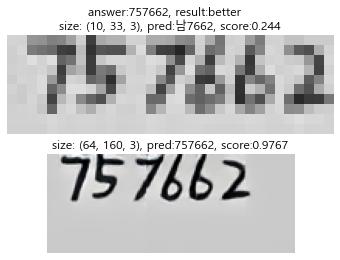

In [7]:
for i in range(len(df)):
    now = df.iloc[i]
    # 두개의 결과가 다르면
    if now['result'] != 'same':
        
        # 초해상화 전 이미지파일
        plt.suptitle(f'answer:{now["answer"]}, result:{now["result"]}')
        plt.subplot(2,1,1)
        original = cv2.imread(f'image/{now["img_name"]}')
        plt.imshow(original[:, :, ::-1])
        plt.title(f'size: {original.shape}, pred:{now["pred"]}, score:{now["pred_score"]}')
        plt.axis('off')
        
        #초해상화 후 이미지파일
        plt.subplot(2,1,2)
        original_4x = cv2.imread(f'result_image/{now["img_name"].split(".")[0]}.png')[:, :, ::-1]
        plt.imshow(original_4x)
        plt.title(f'size: {original_4x.shape}, pred:{now["4x_pred"]}, score:{now["4x_pred_score"]}')
        plt.axis('off')
        
        # save
        plt.savefig(f'{now["result"]}/{now["img_name"].split(".")[0]}.png')

### 모델 텍스트 검출 내역 plt

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7832\264110952.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30,10))


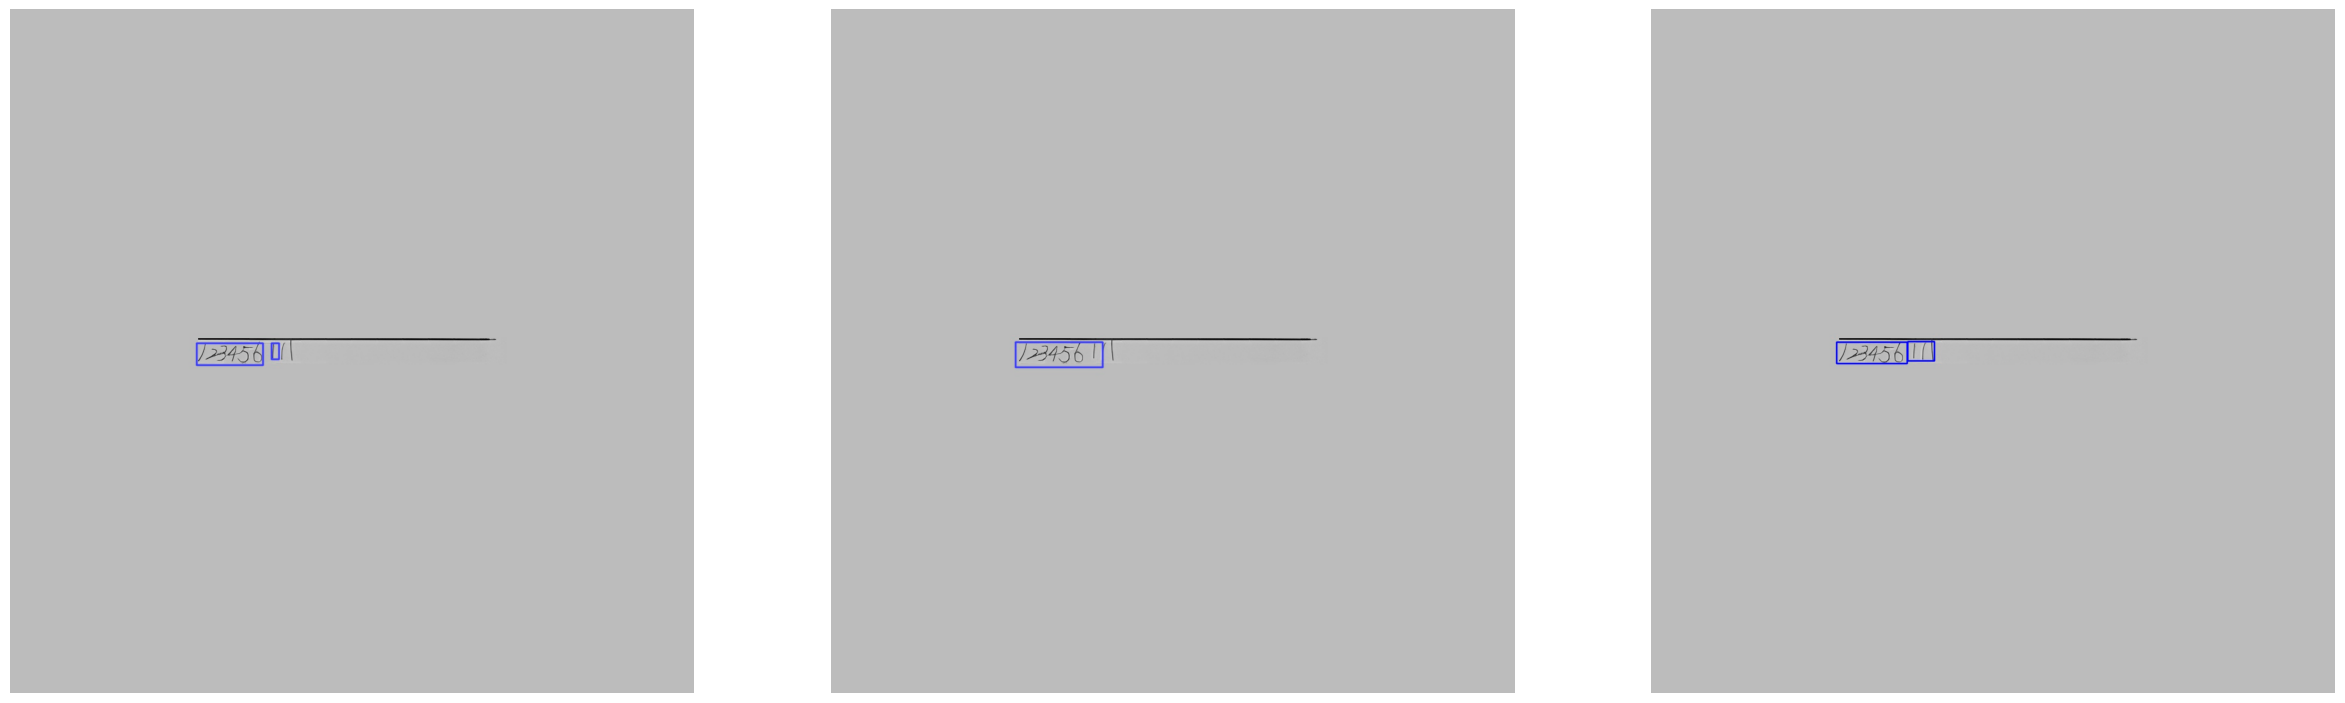

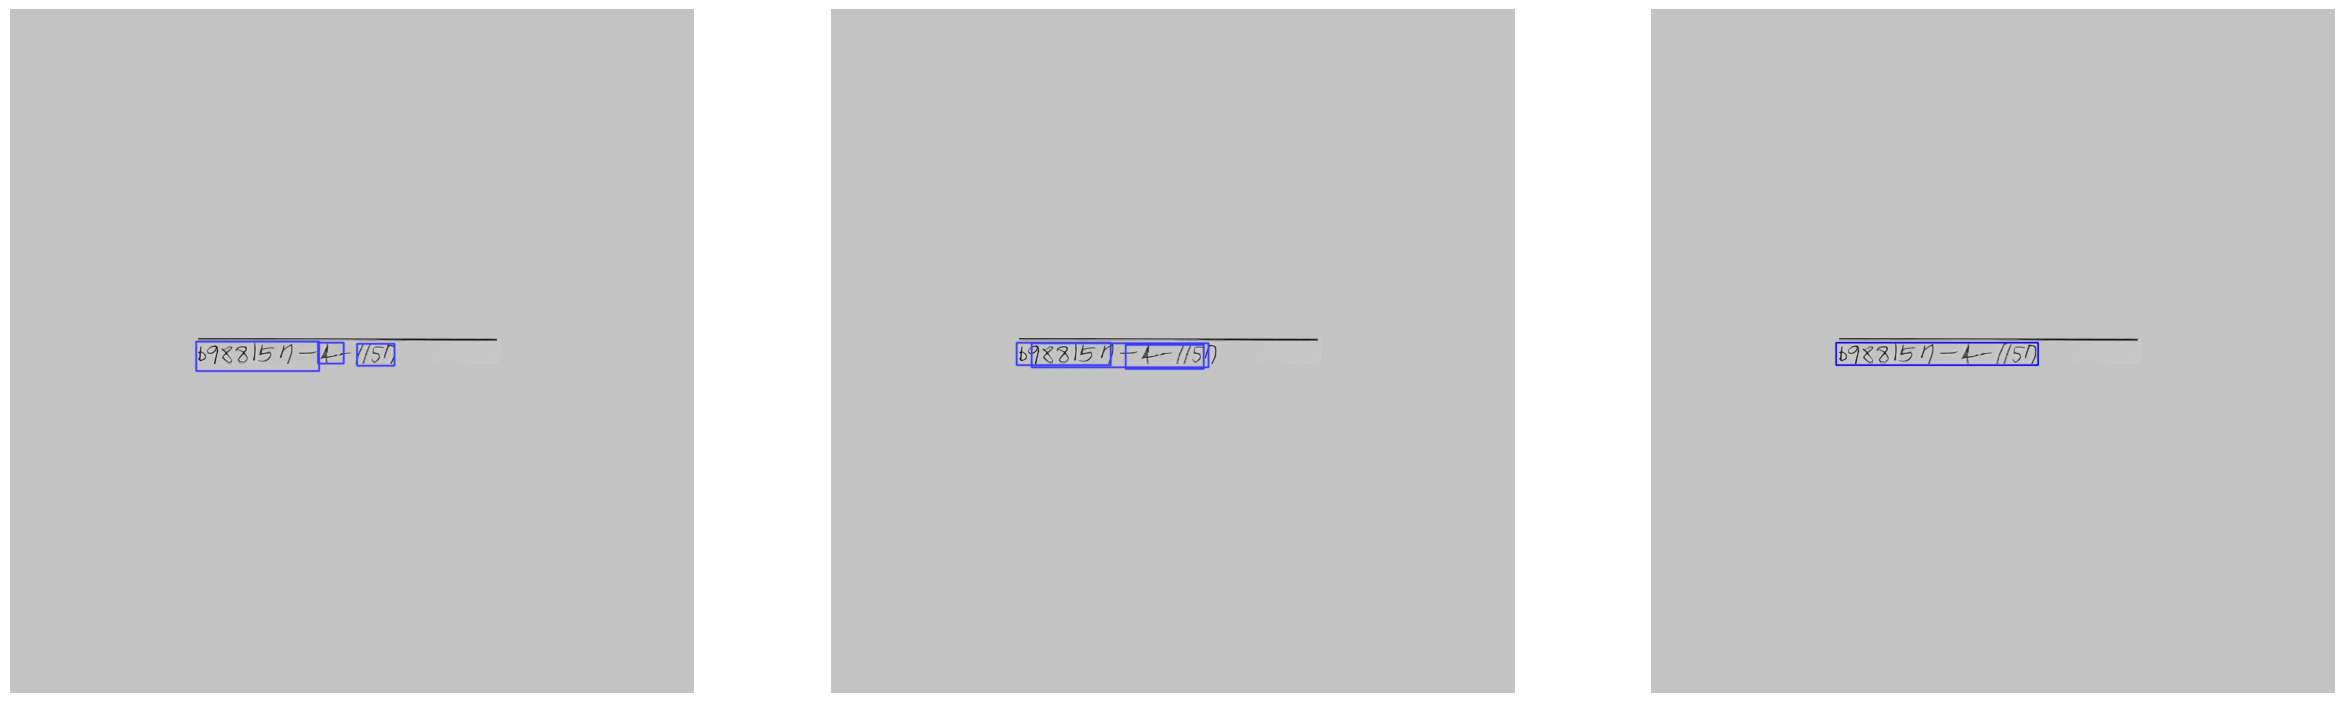

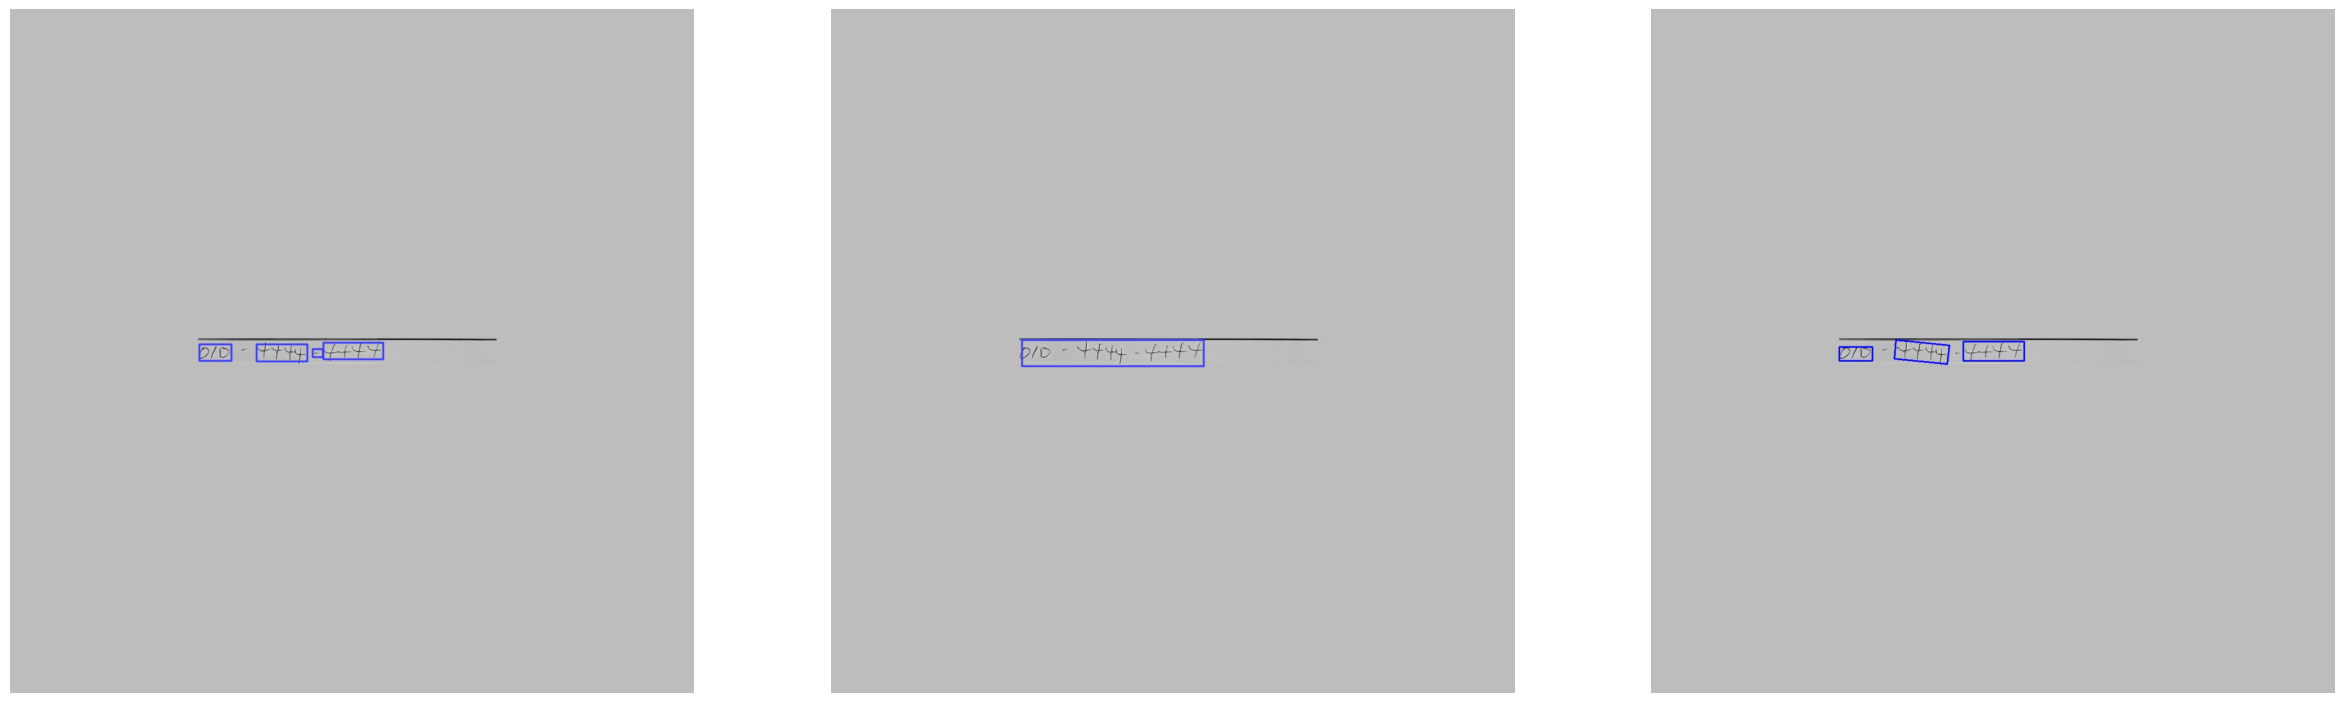

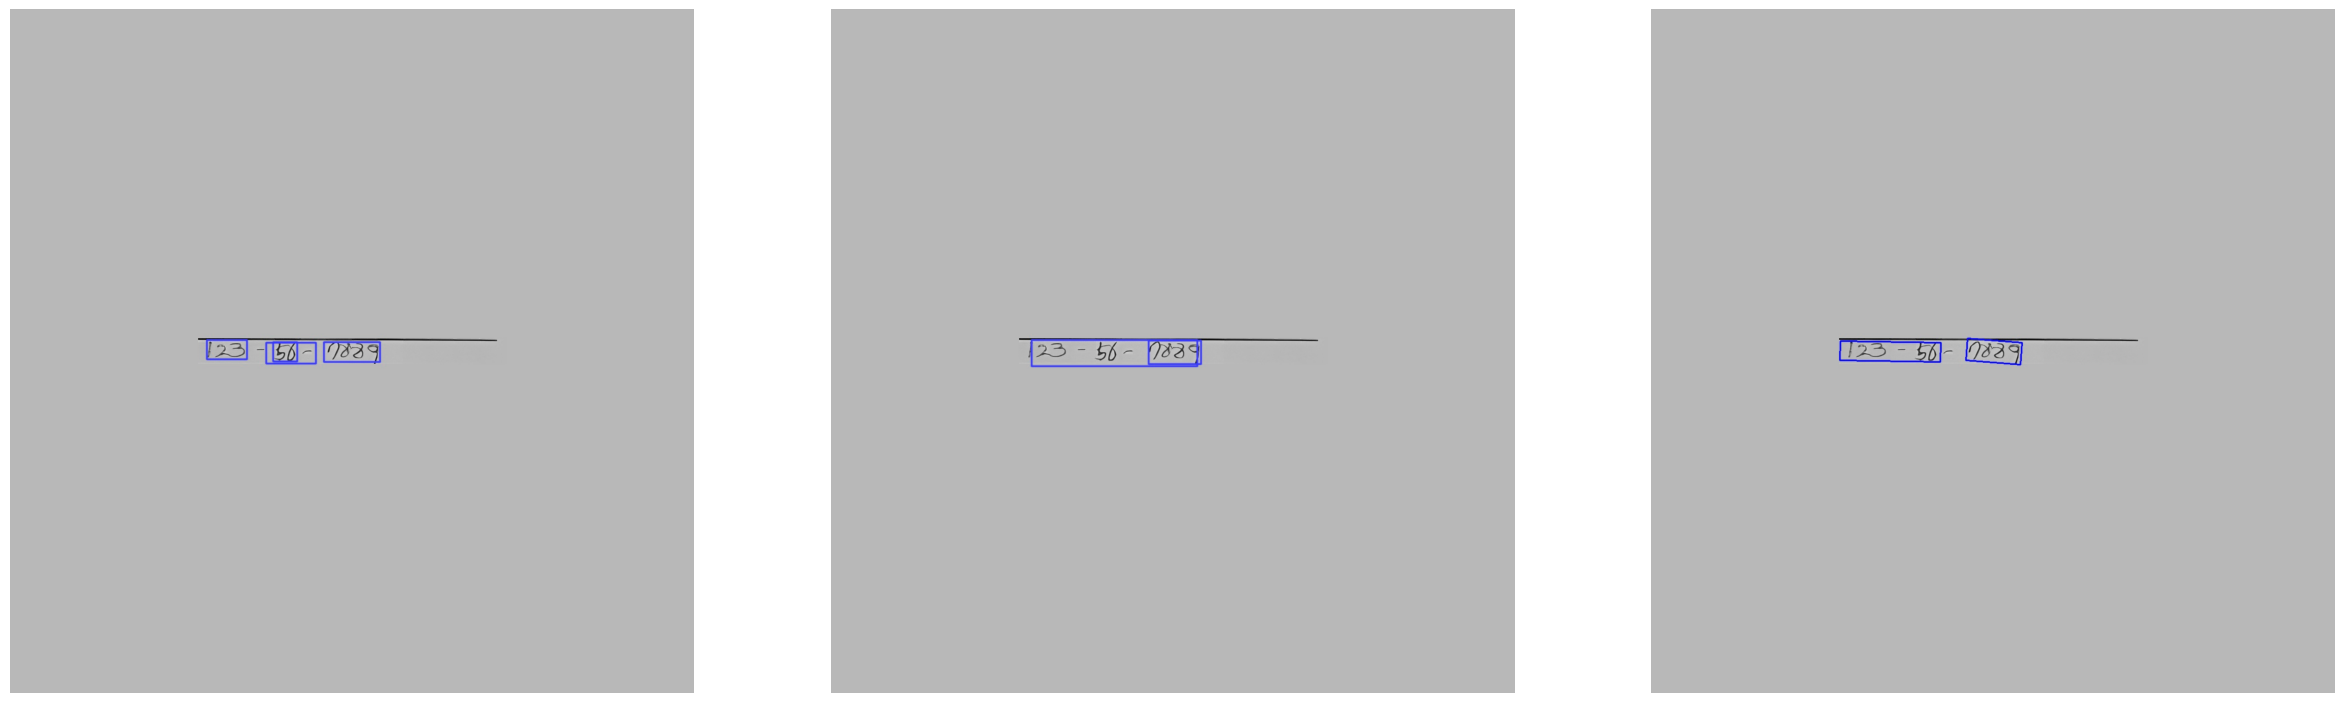

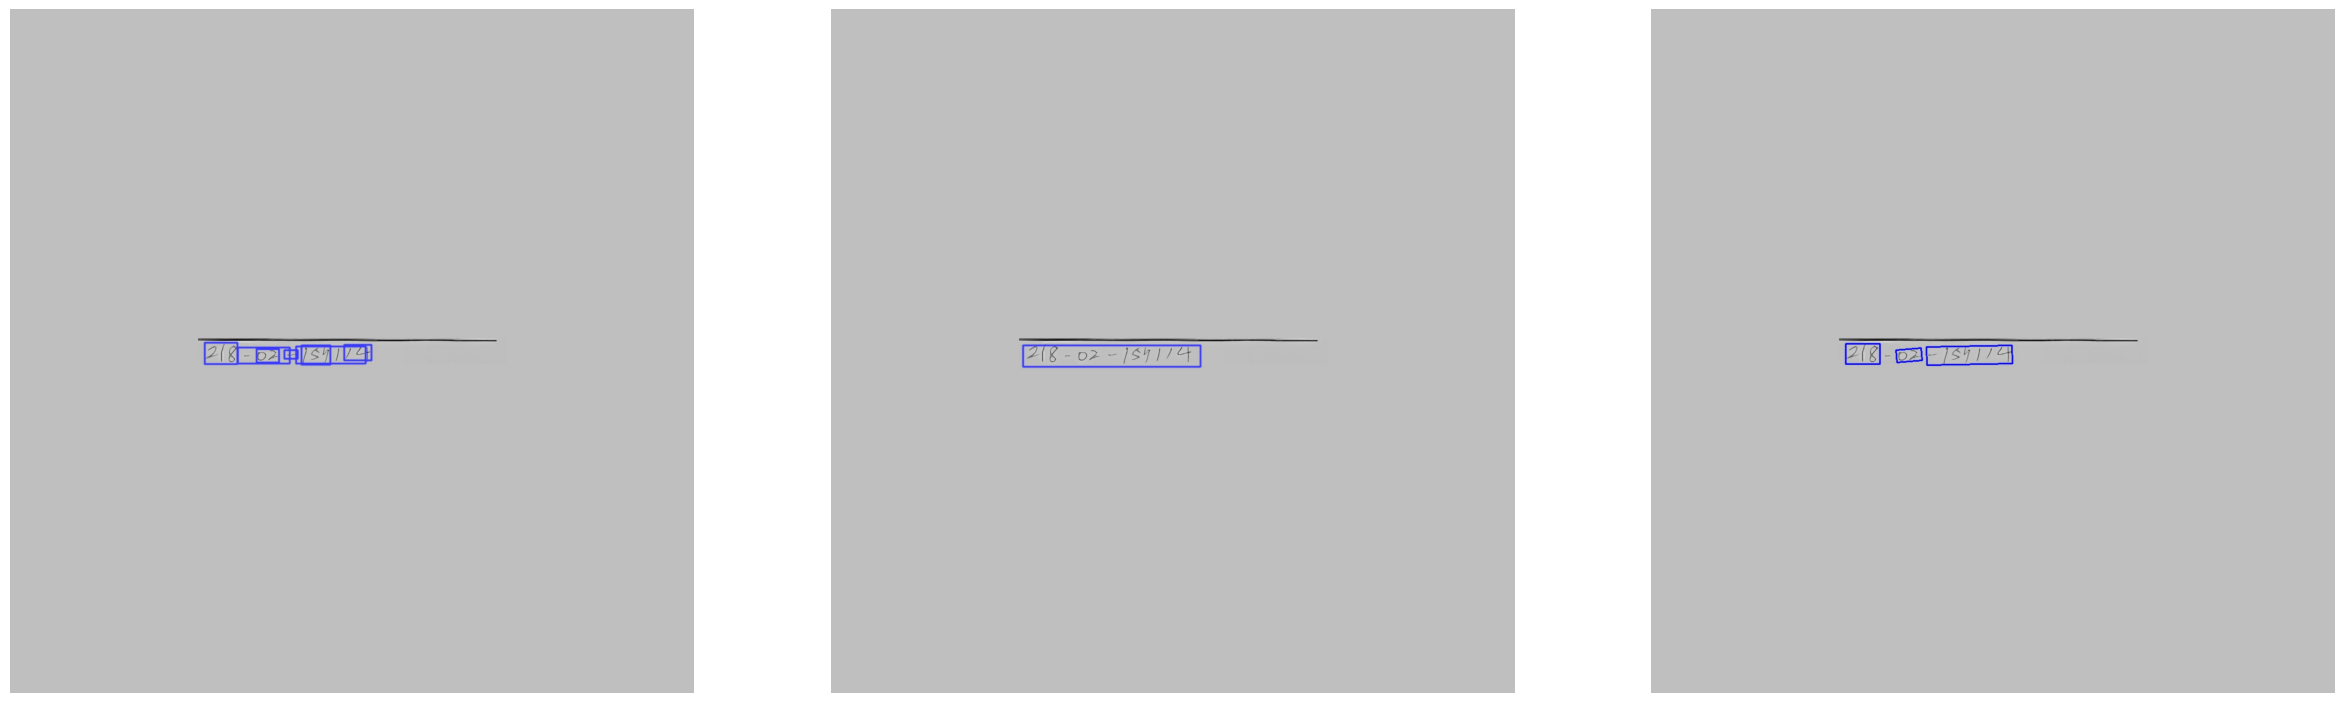

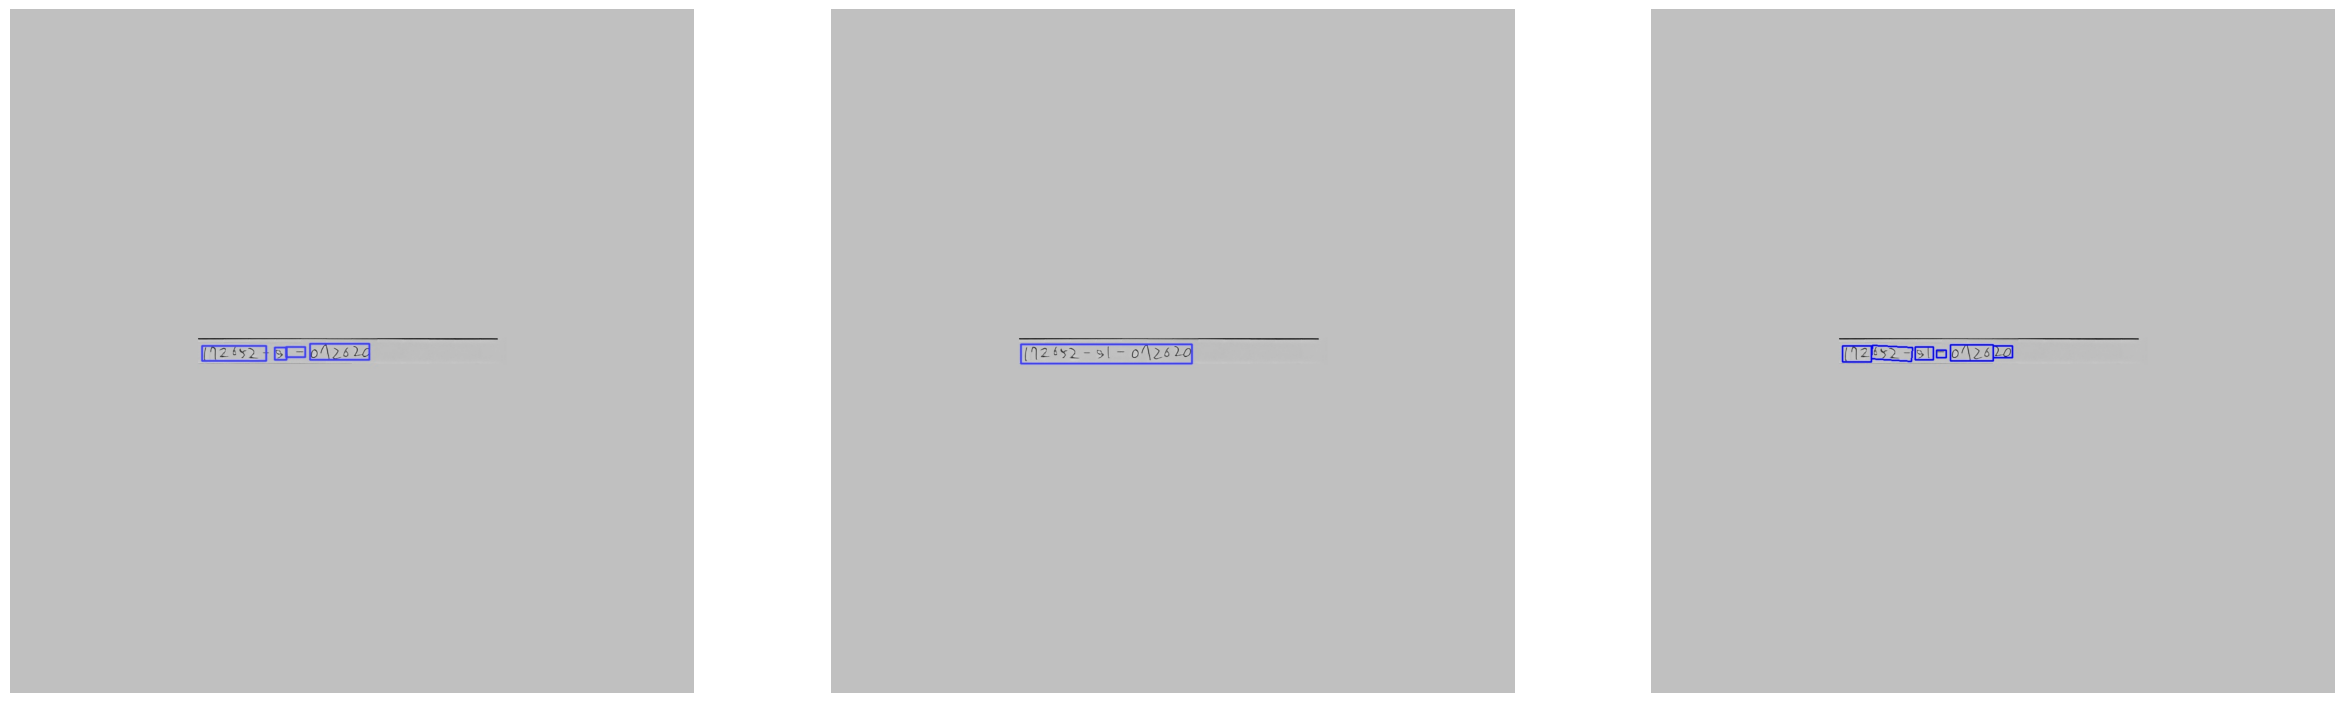

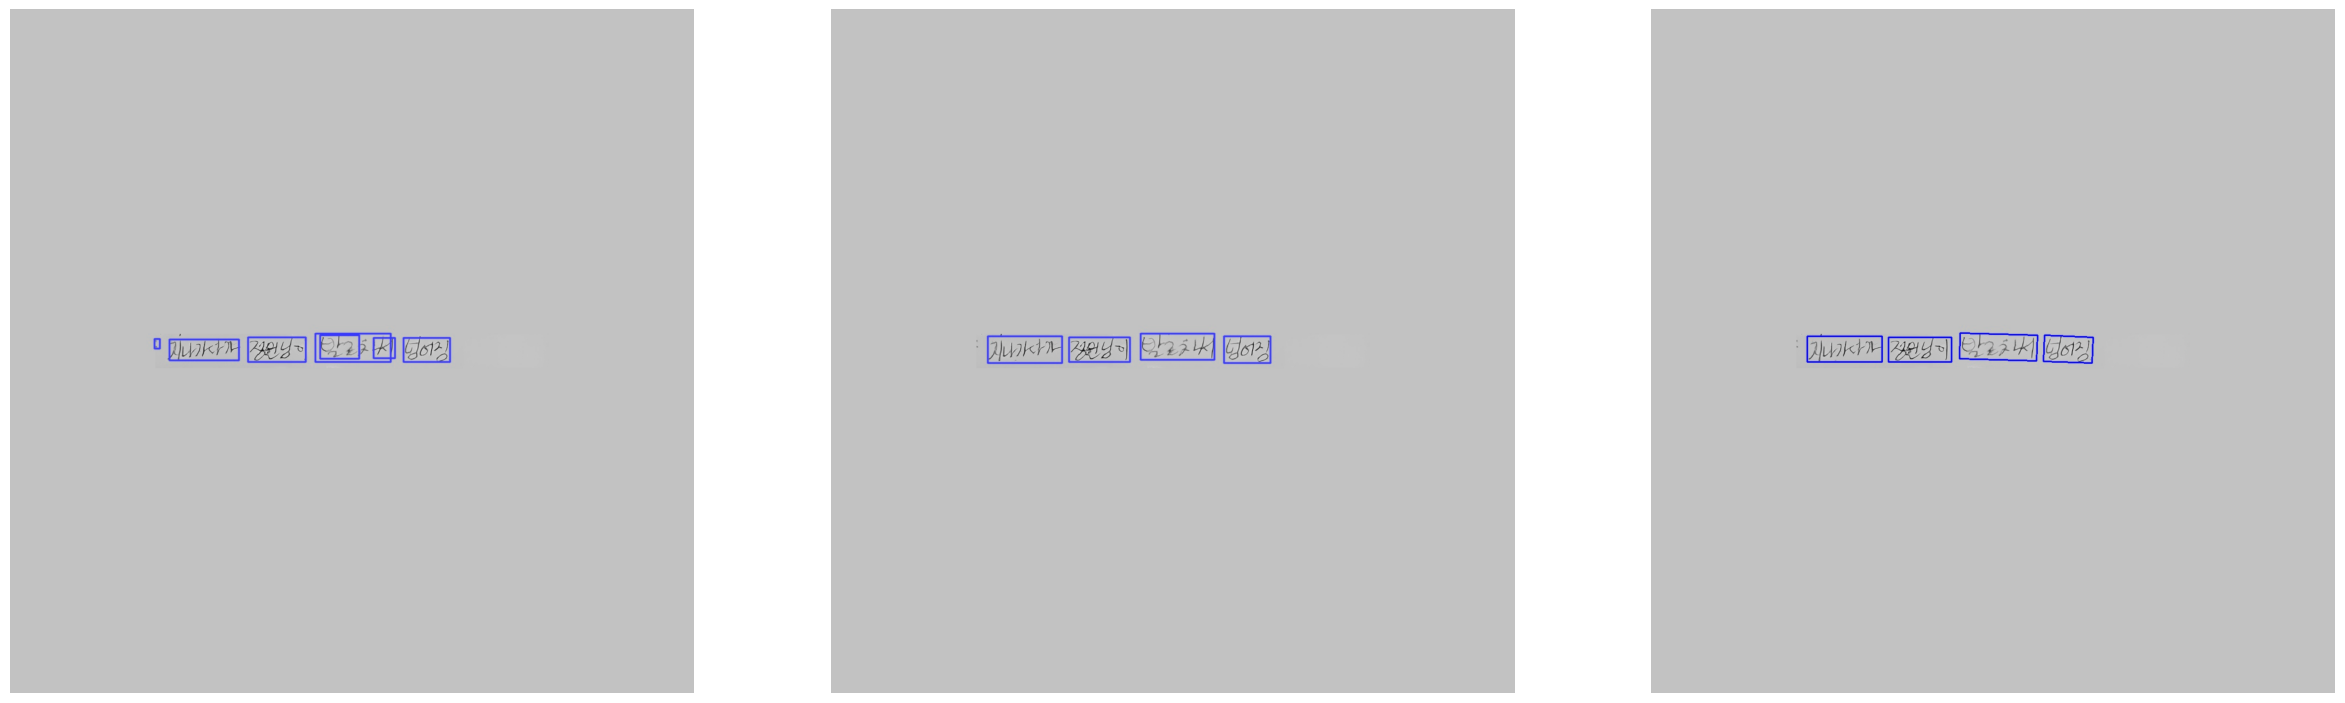

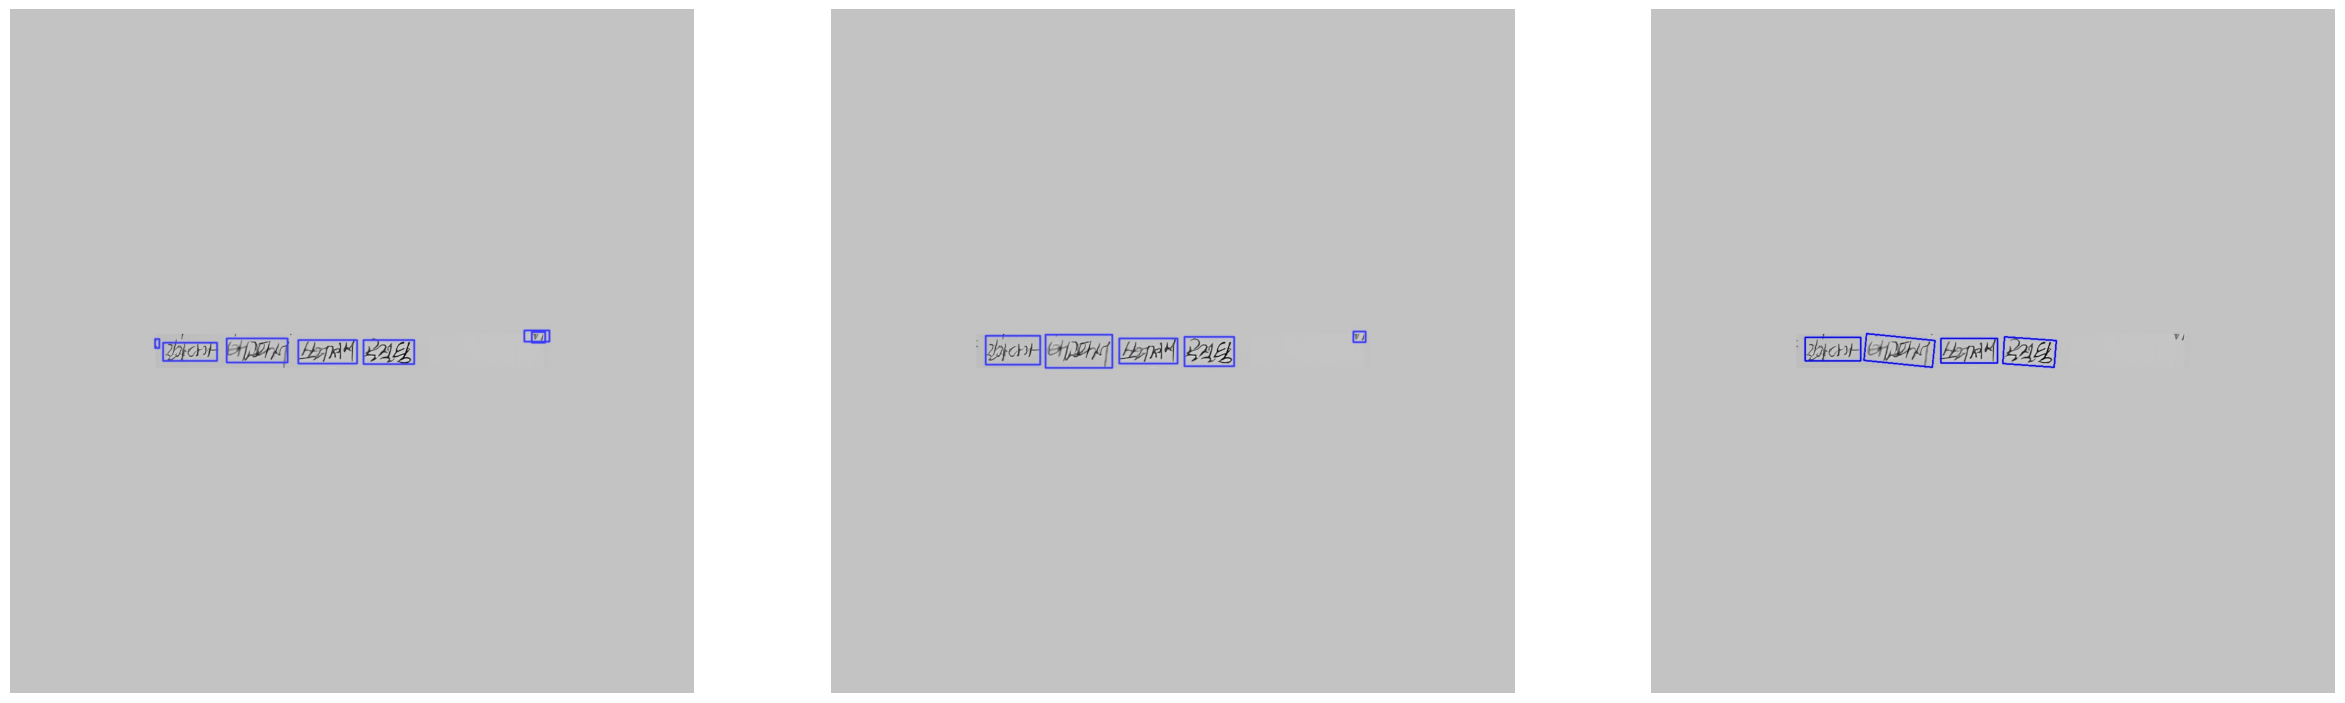

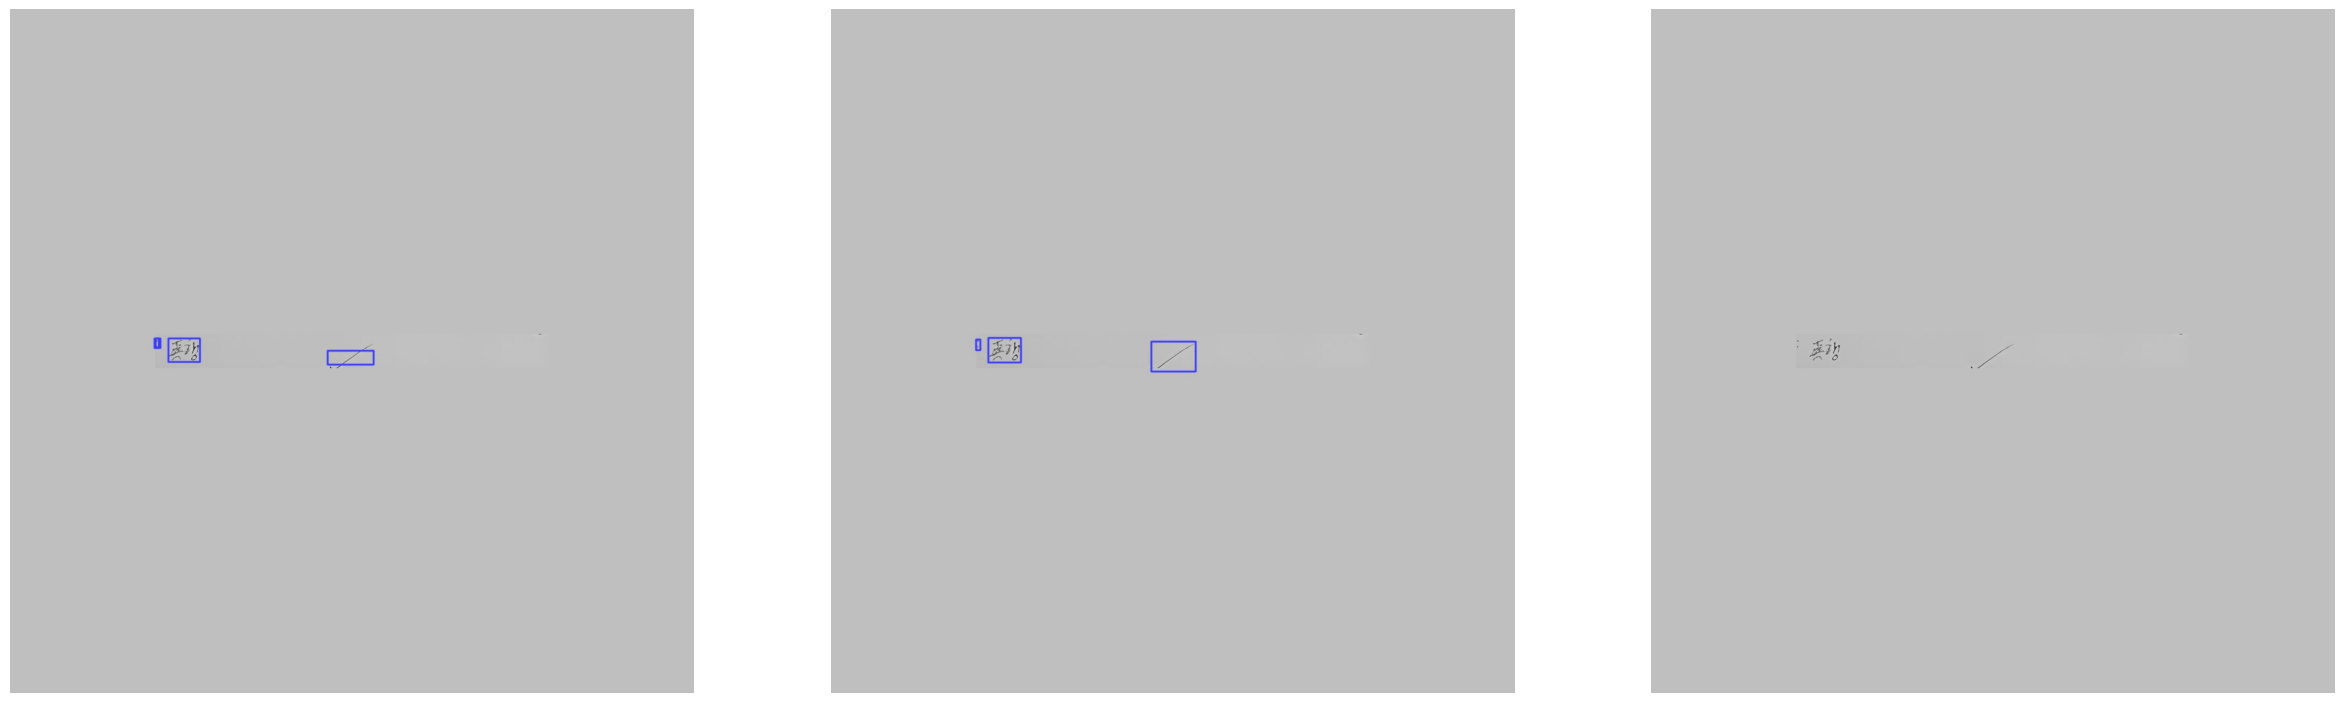

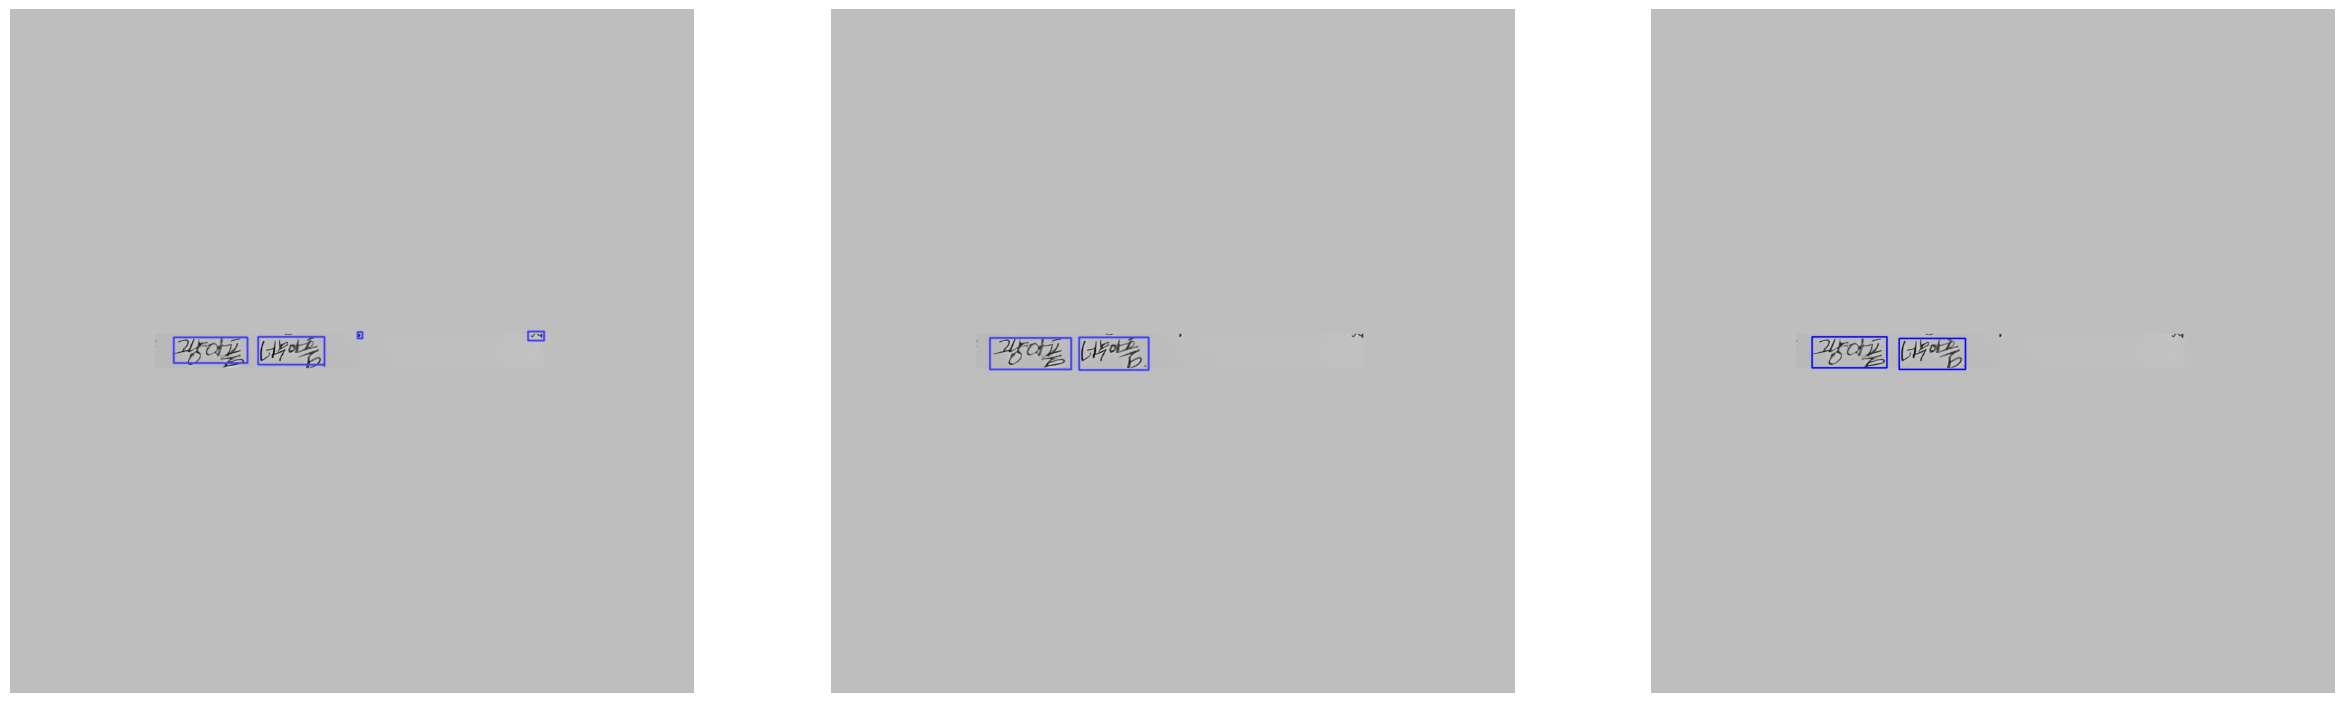

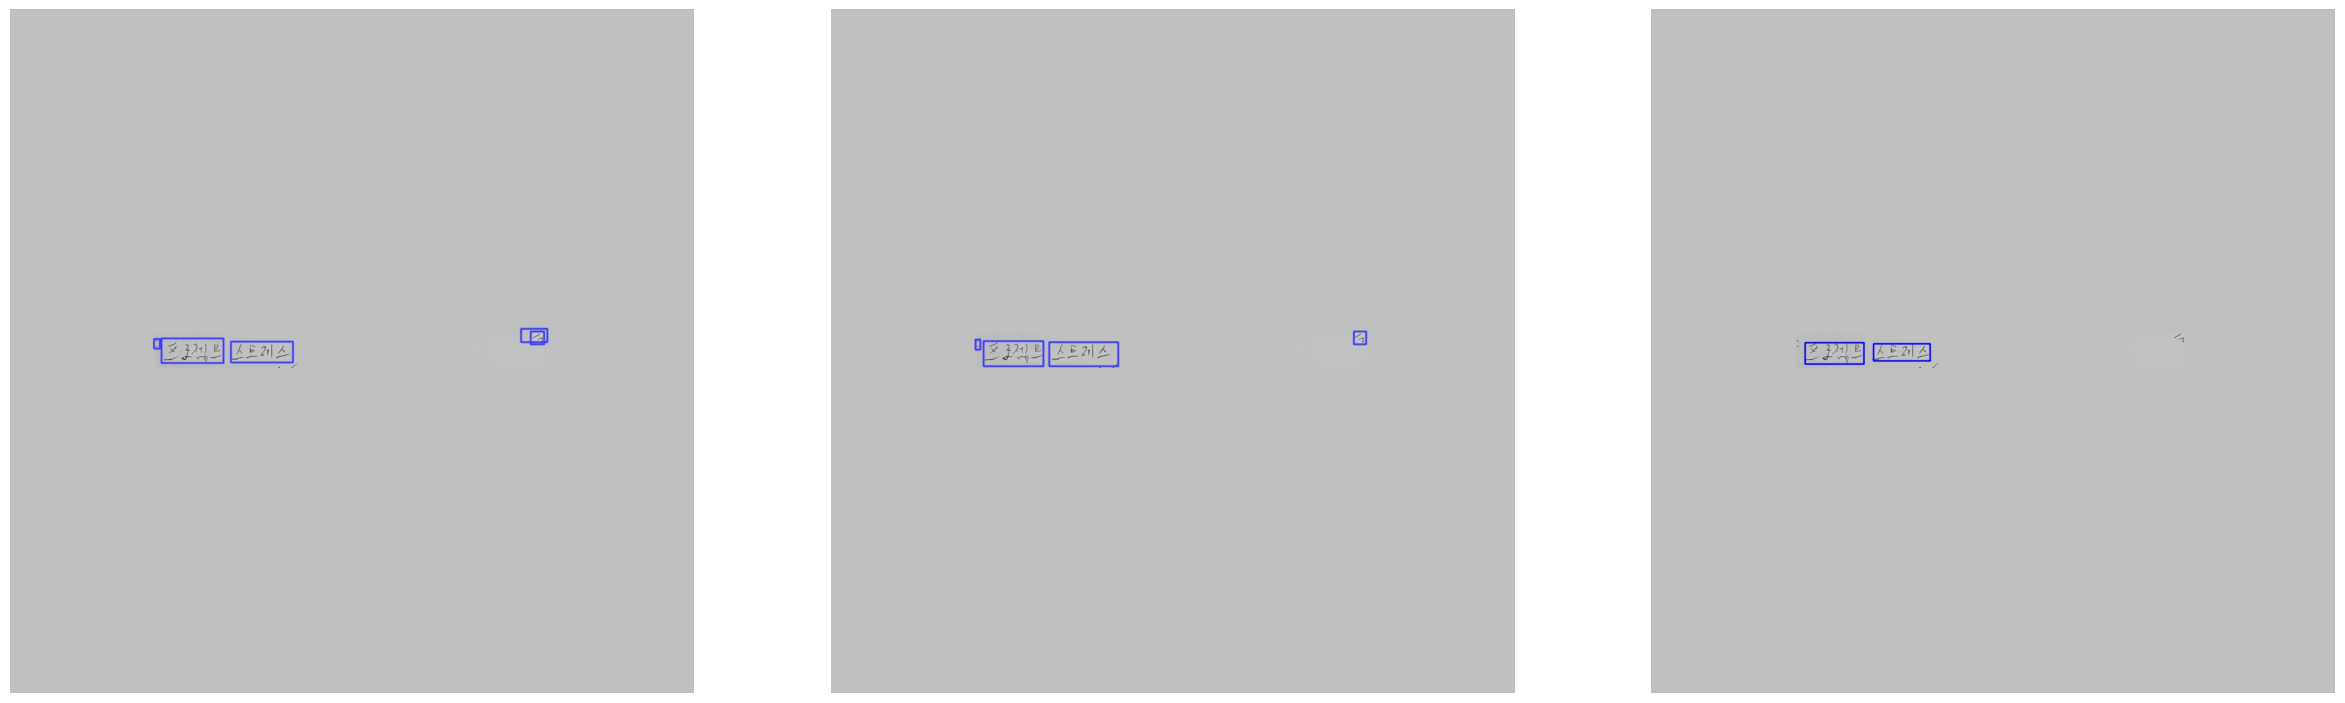

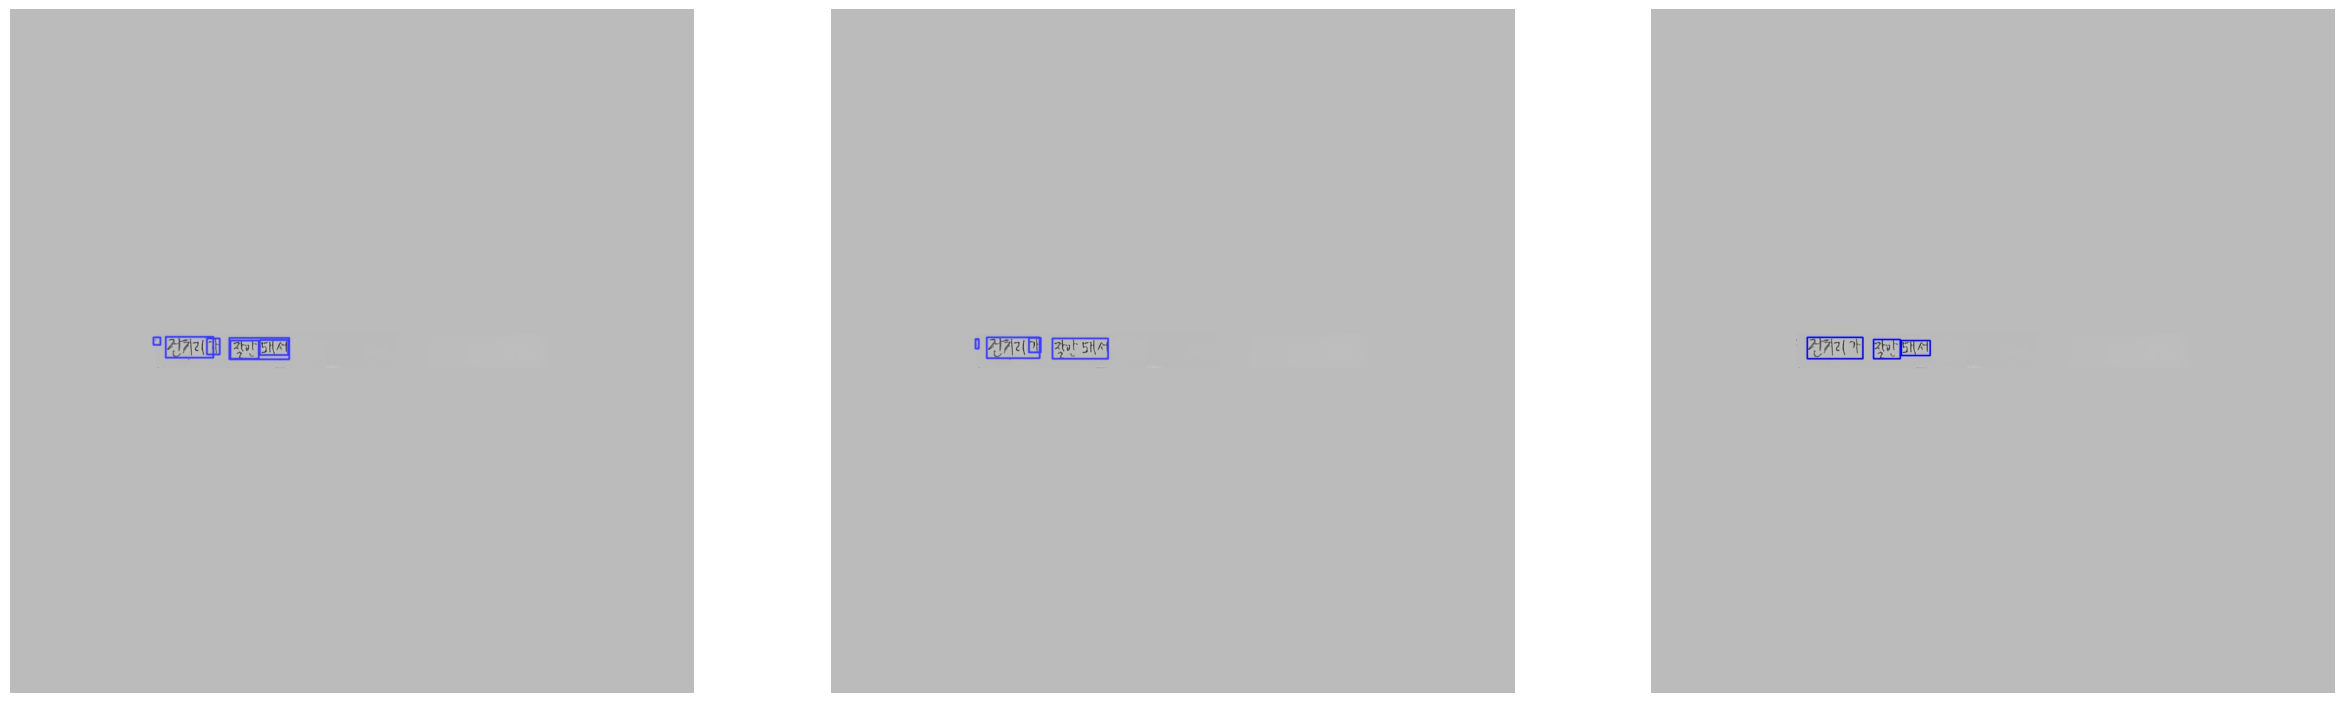

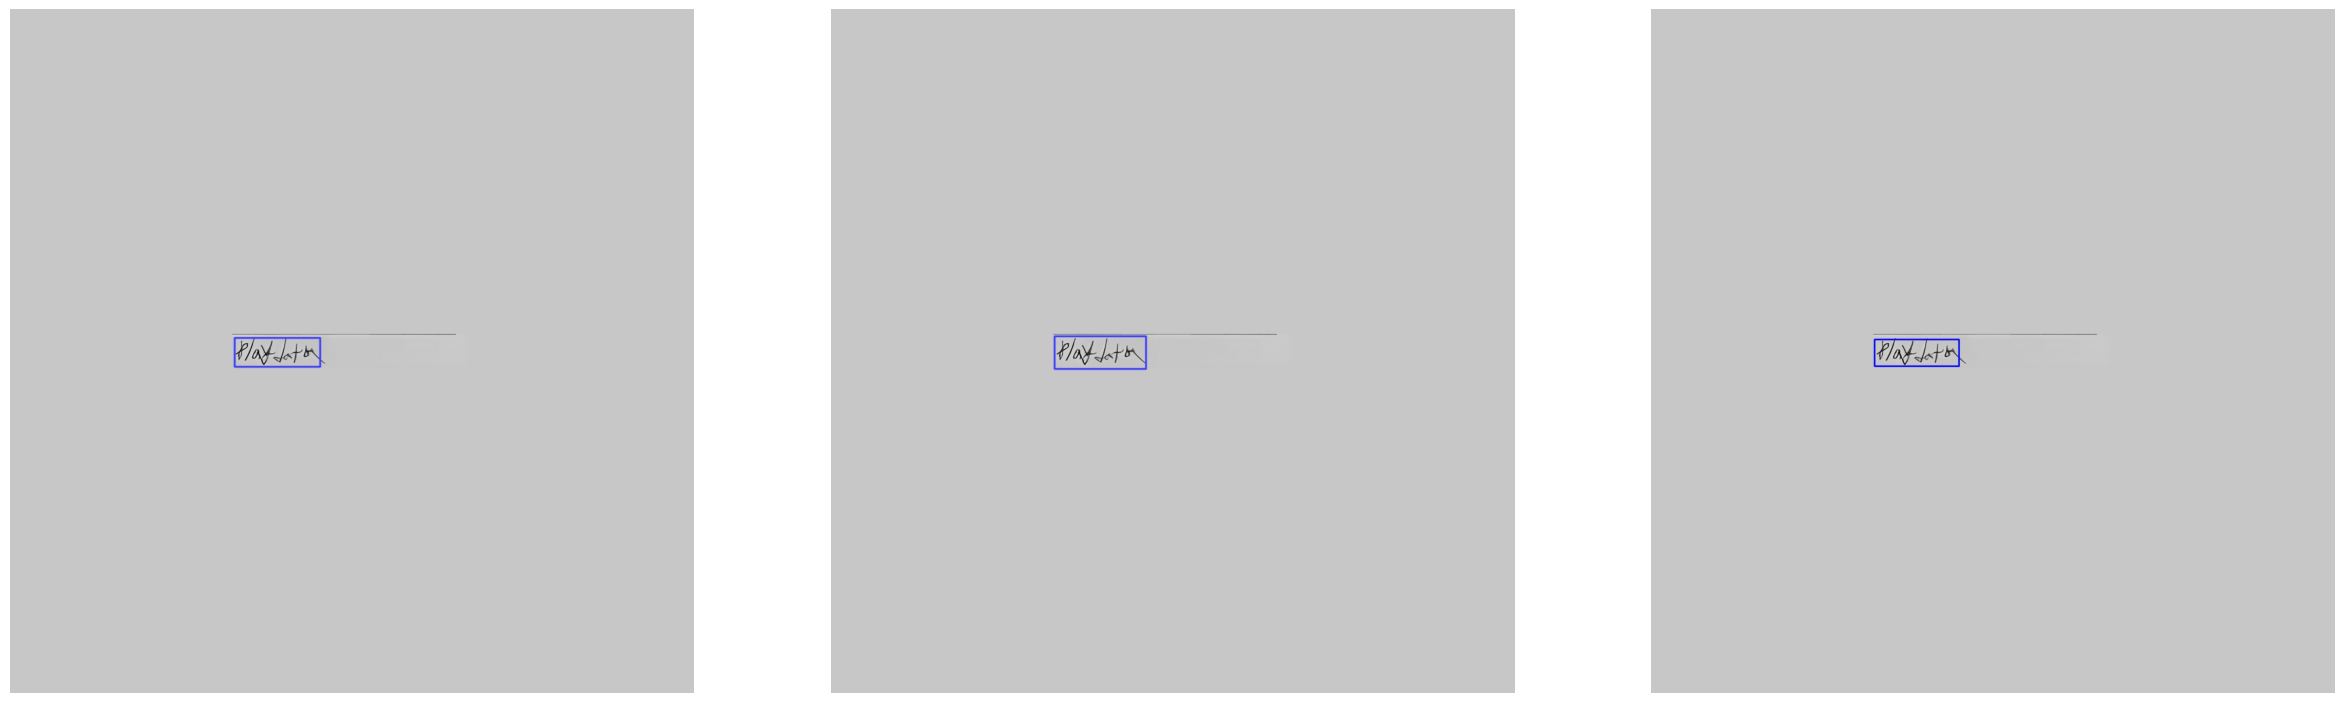

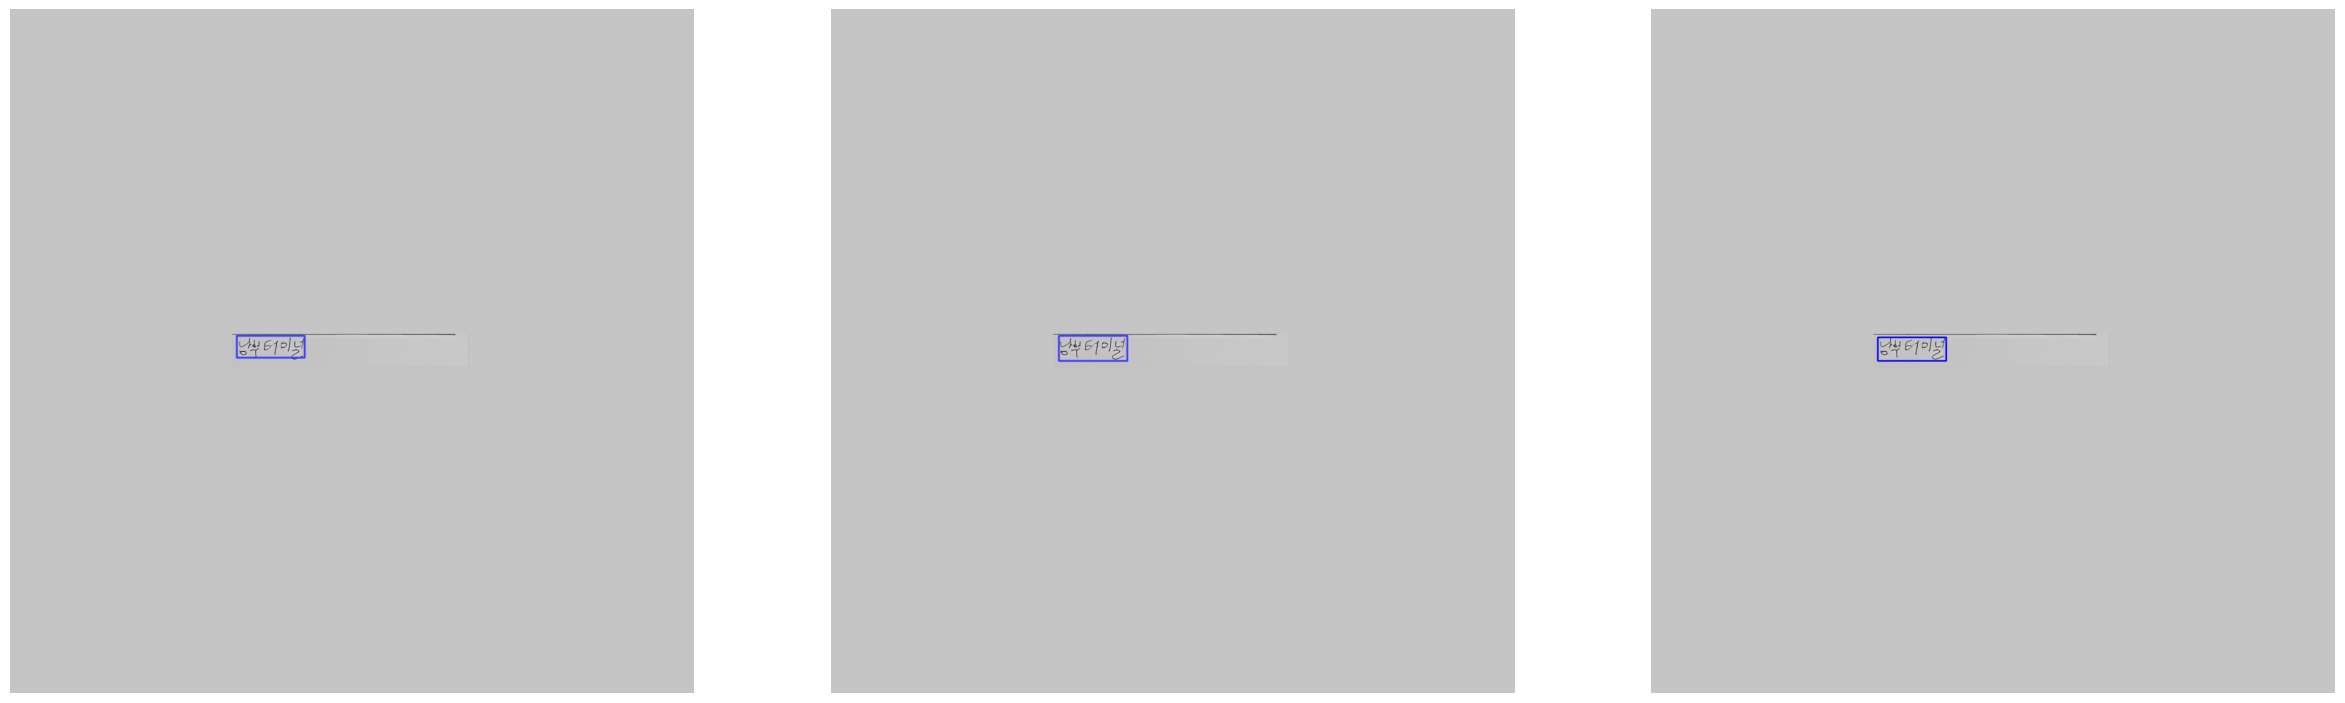

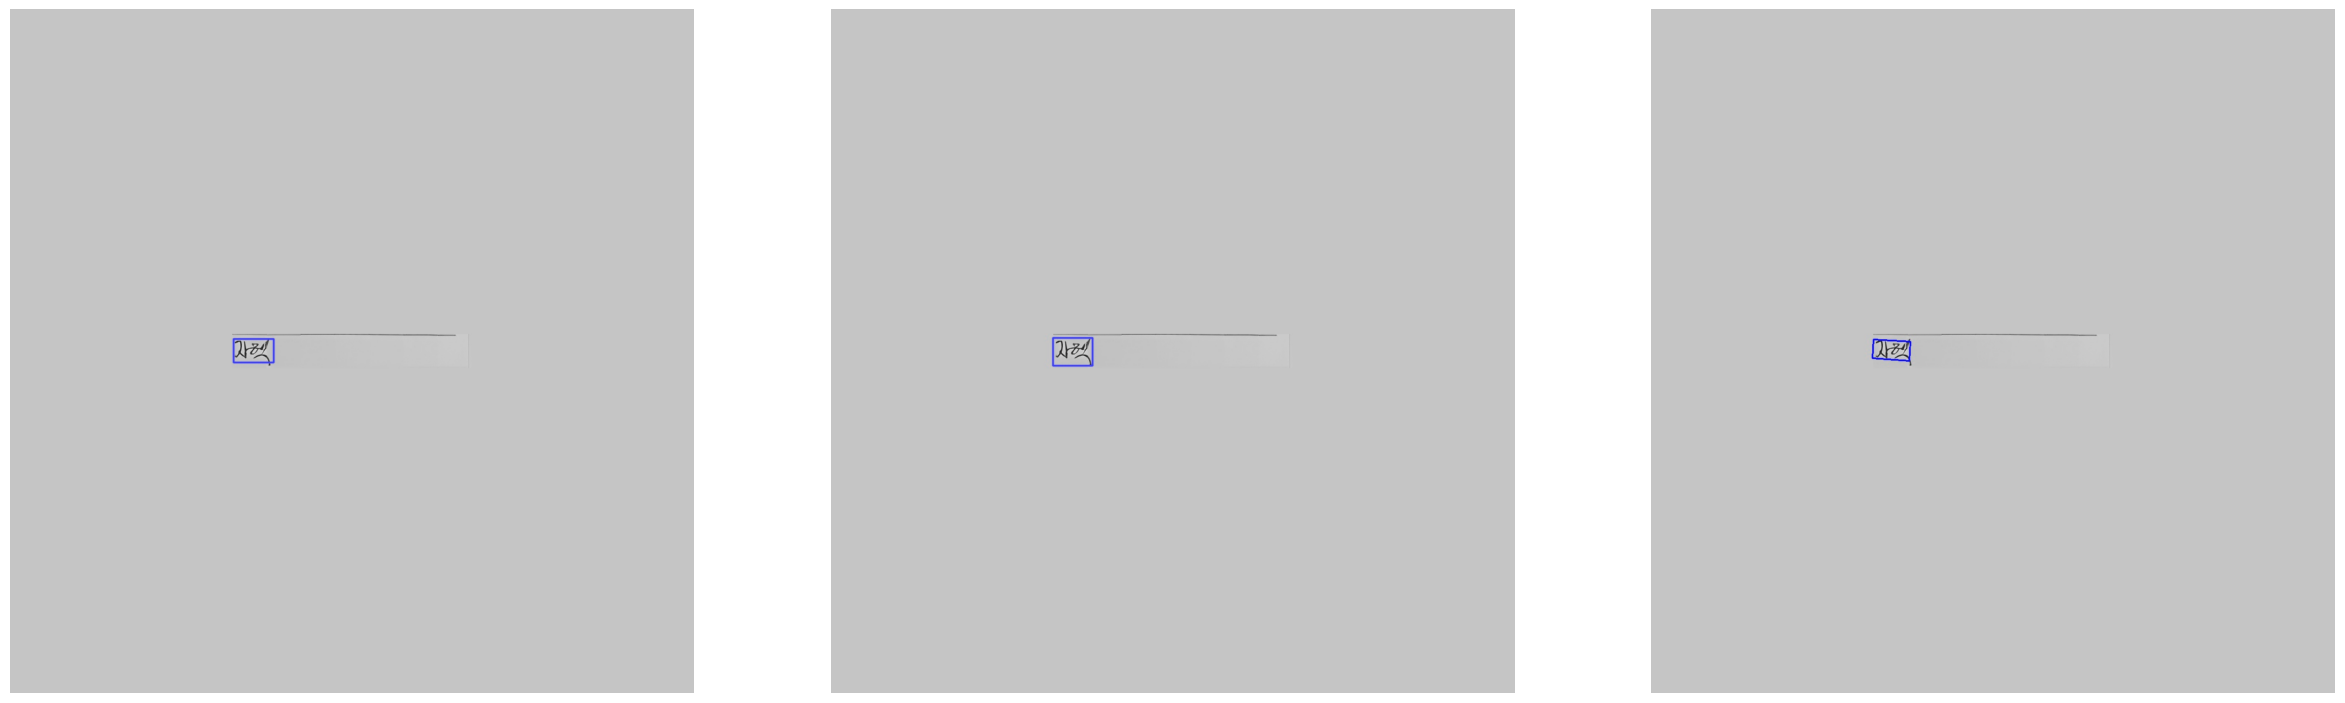

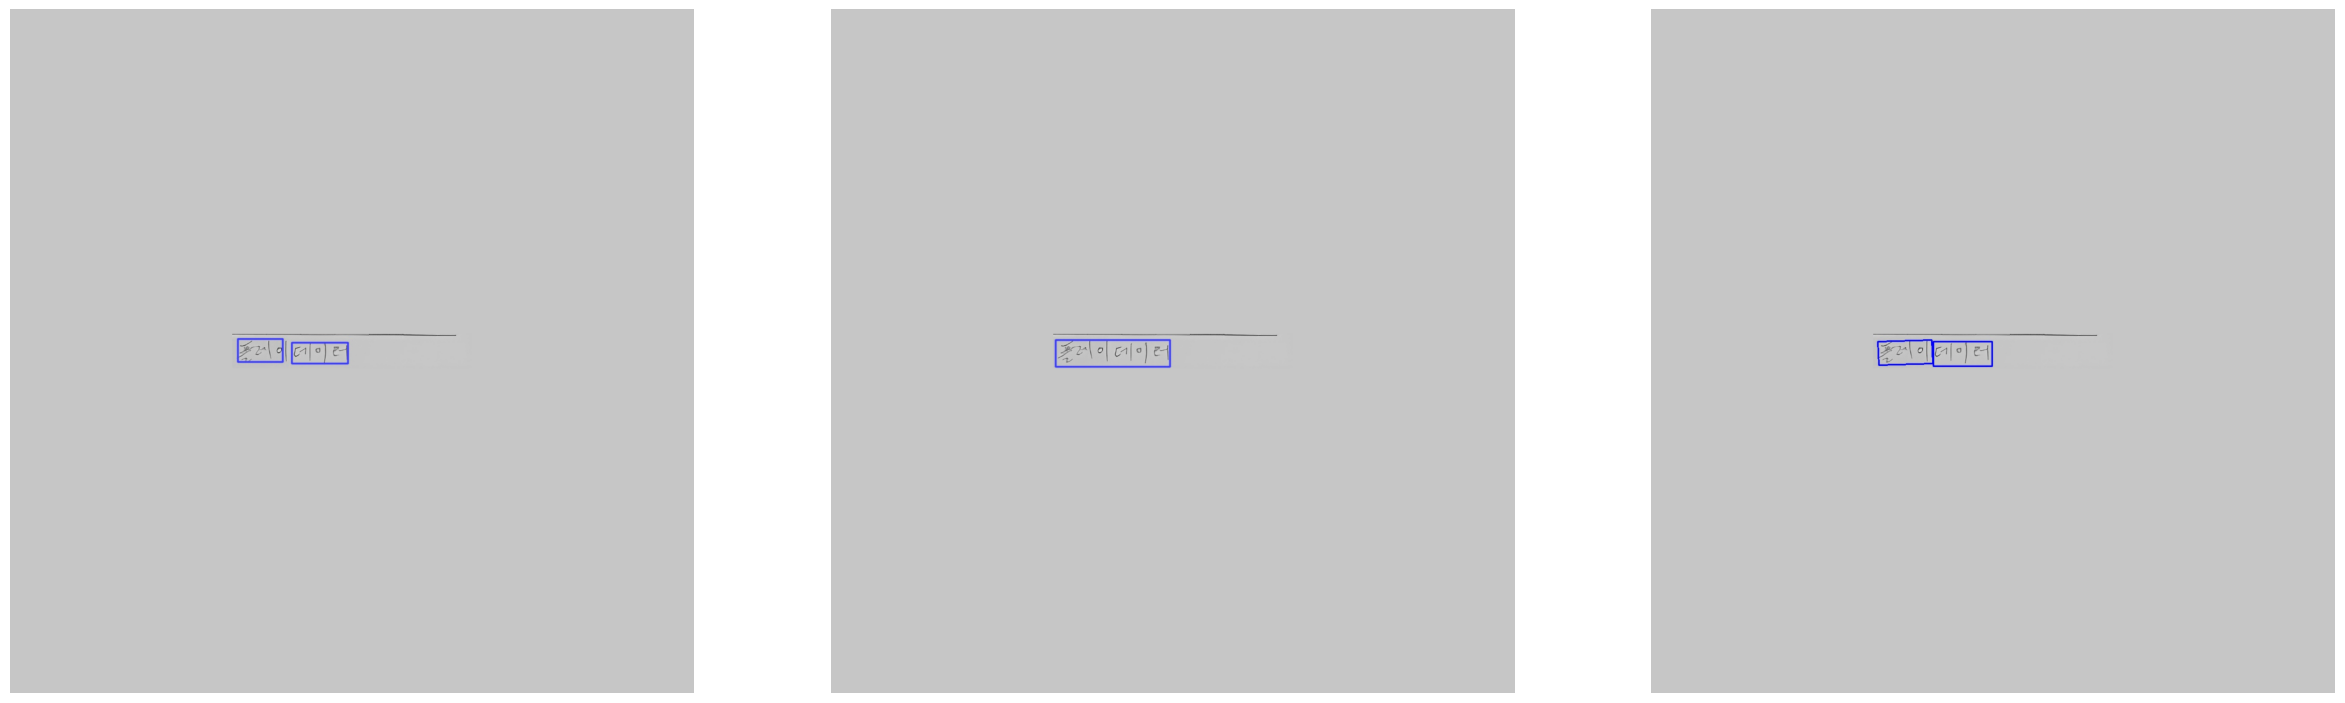

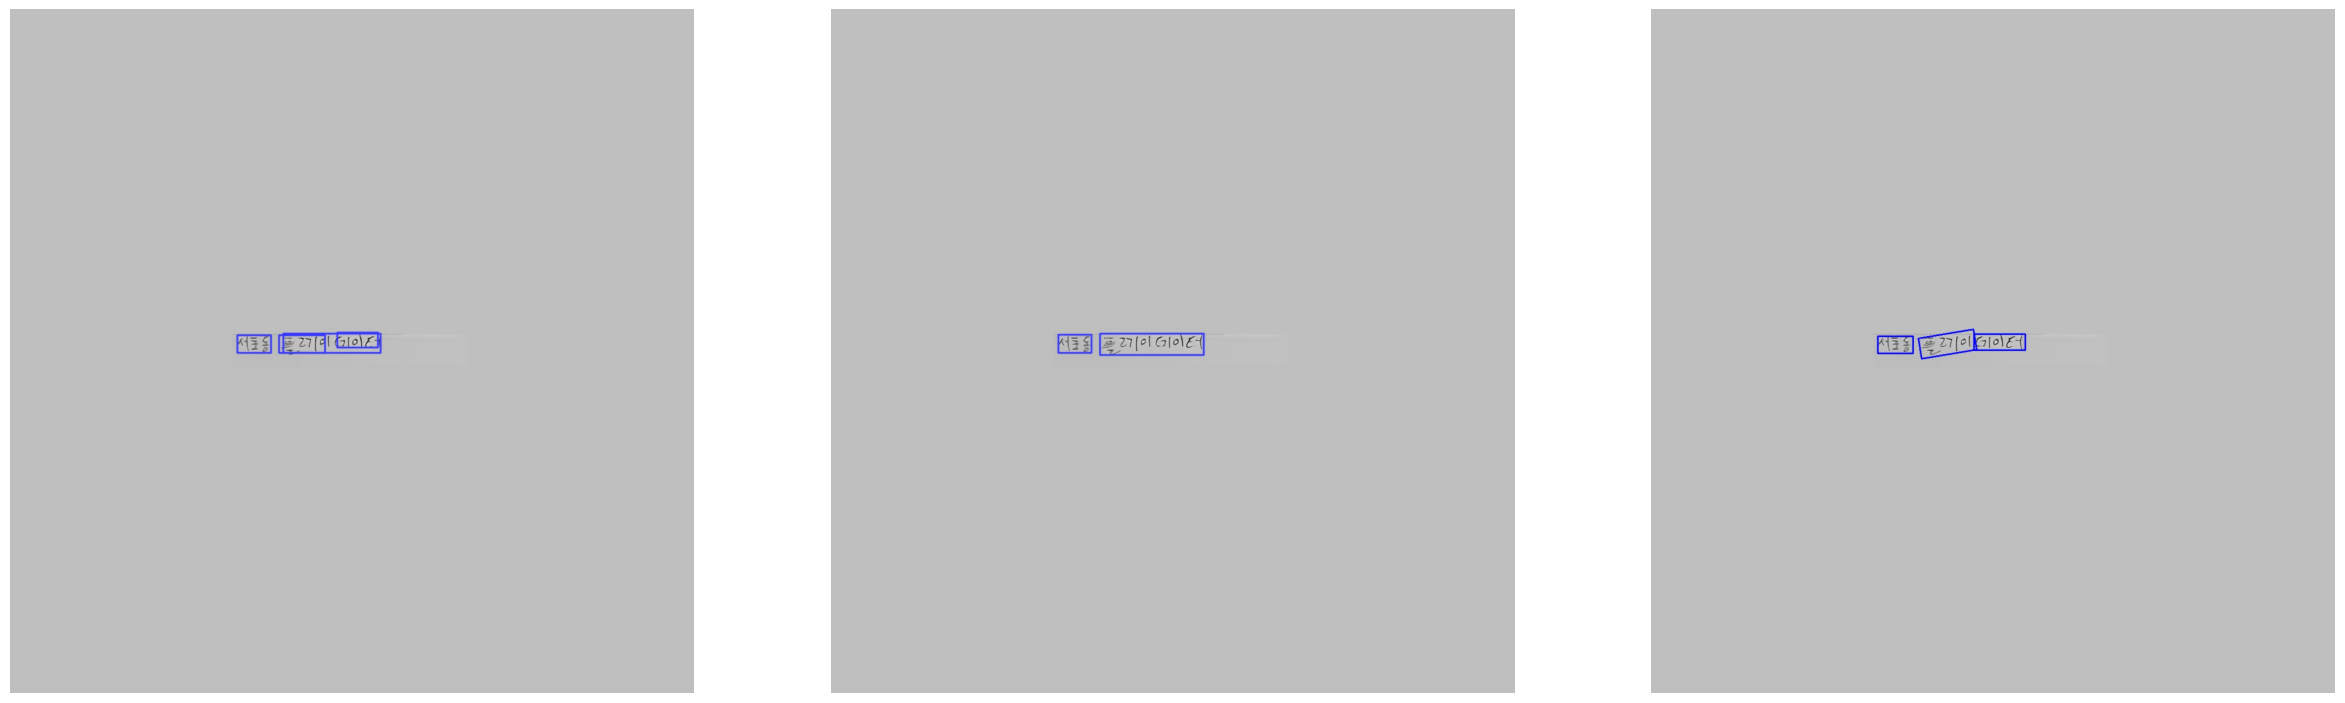

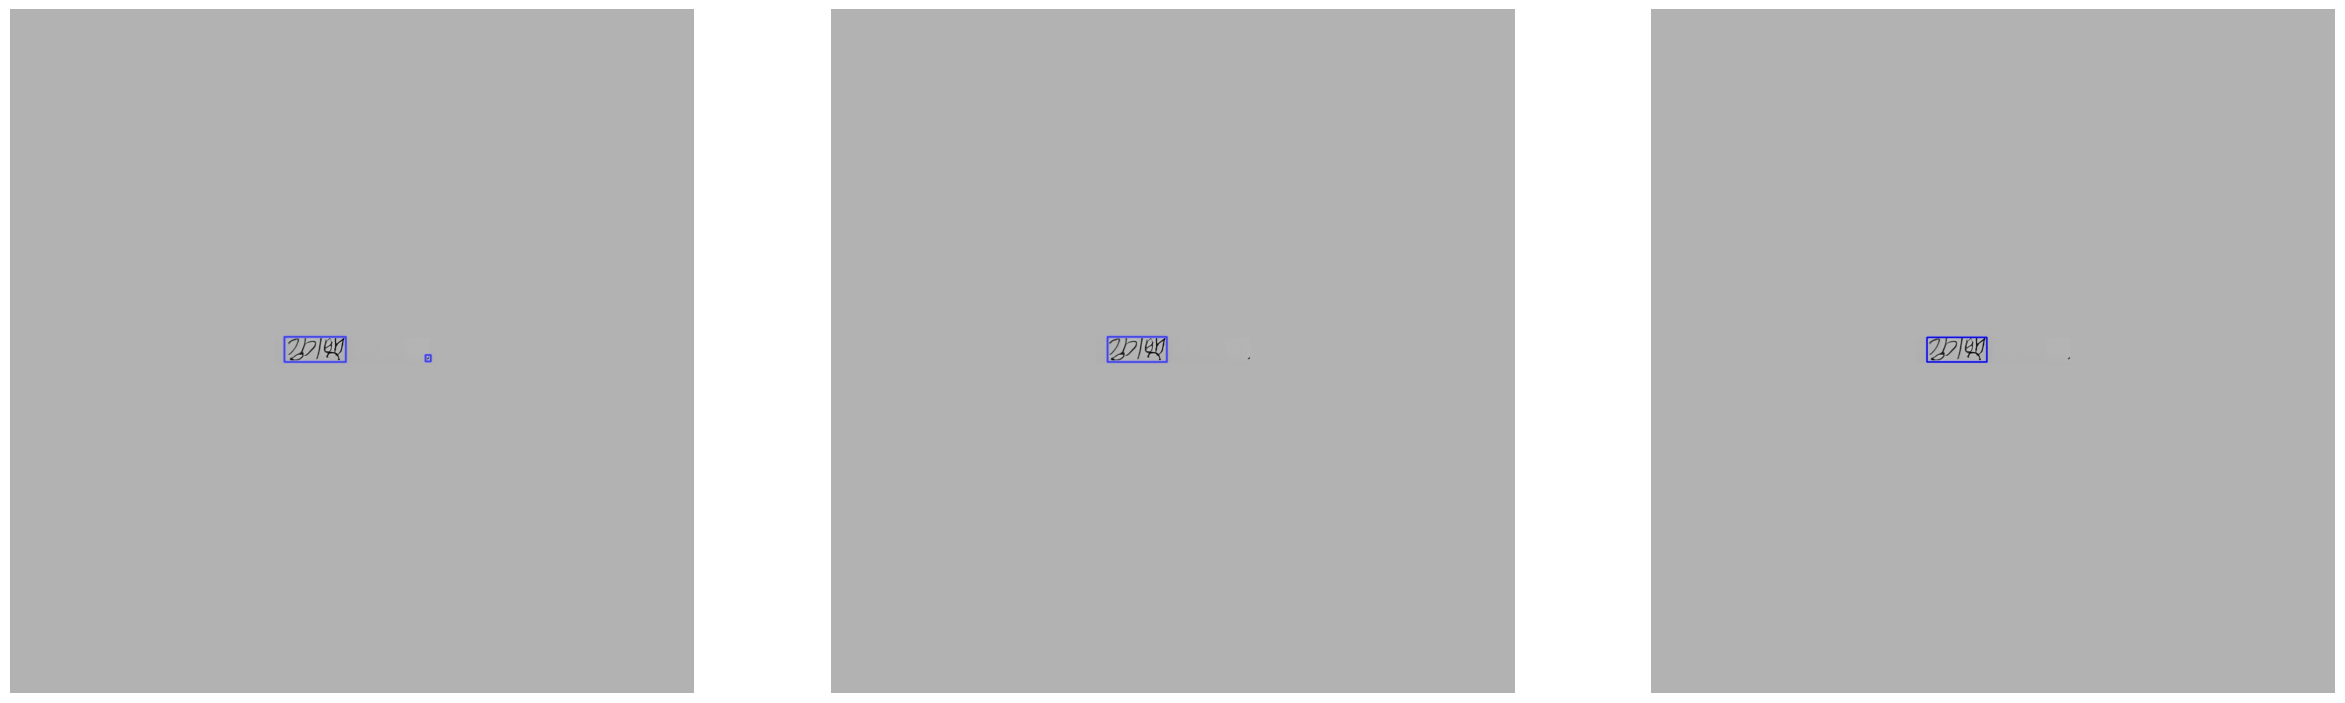

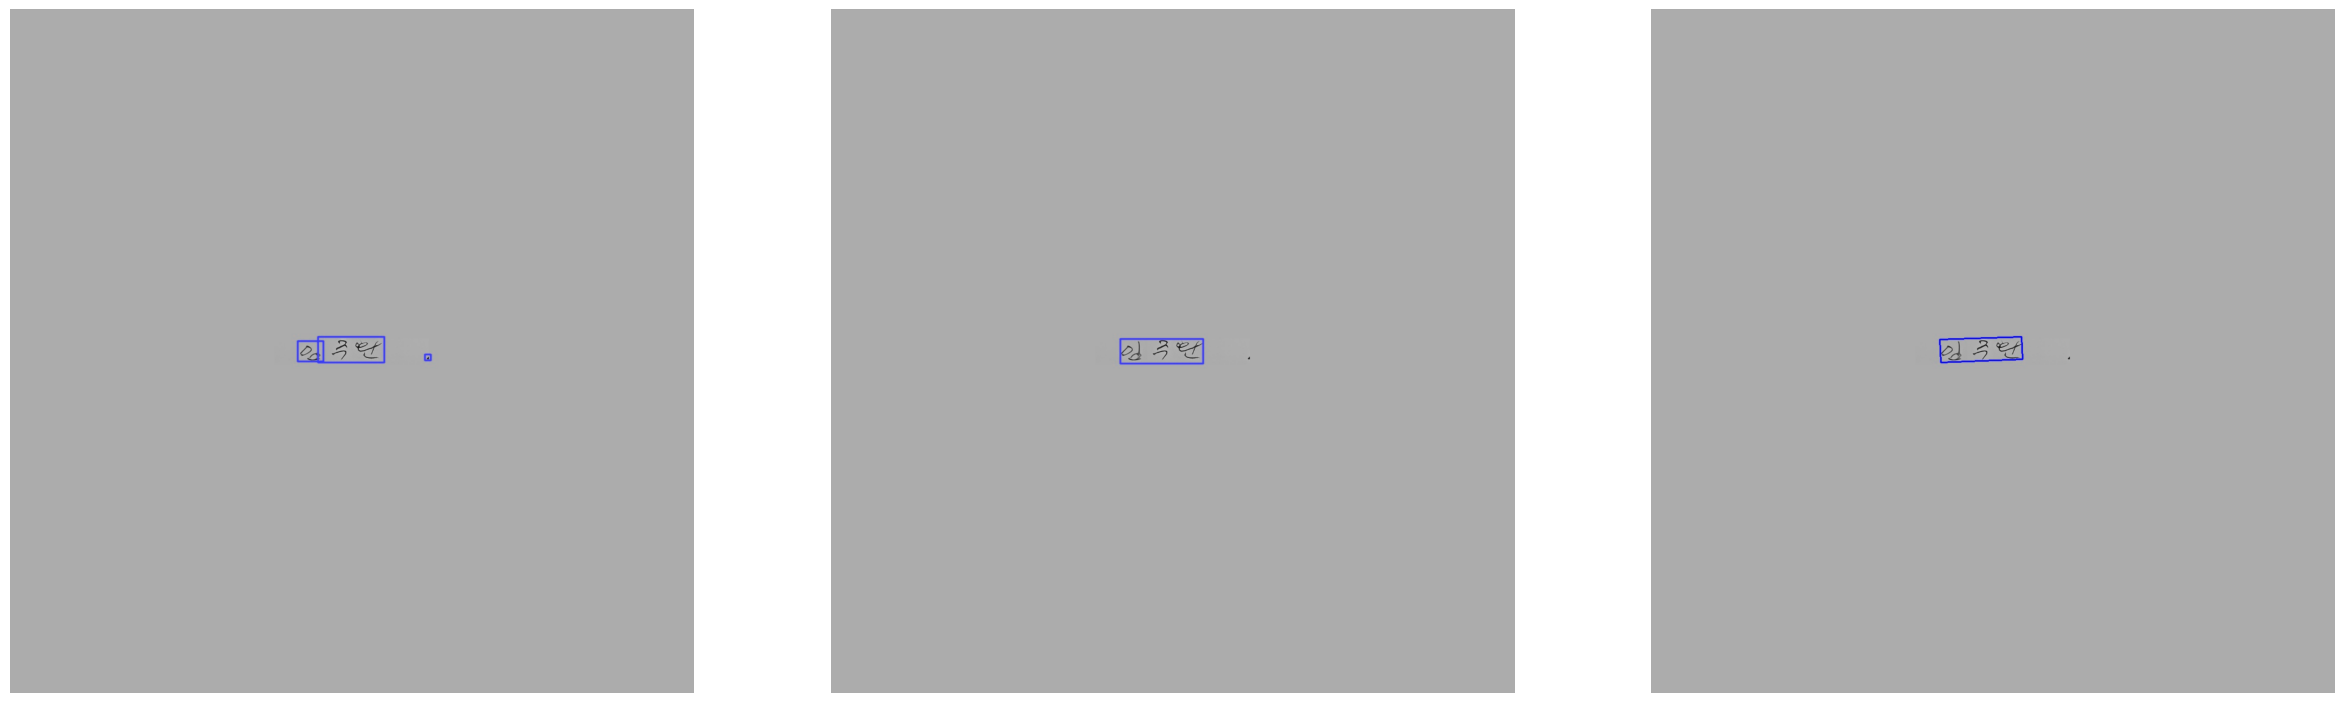

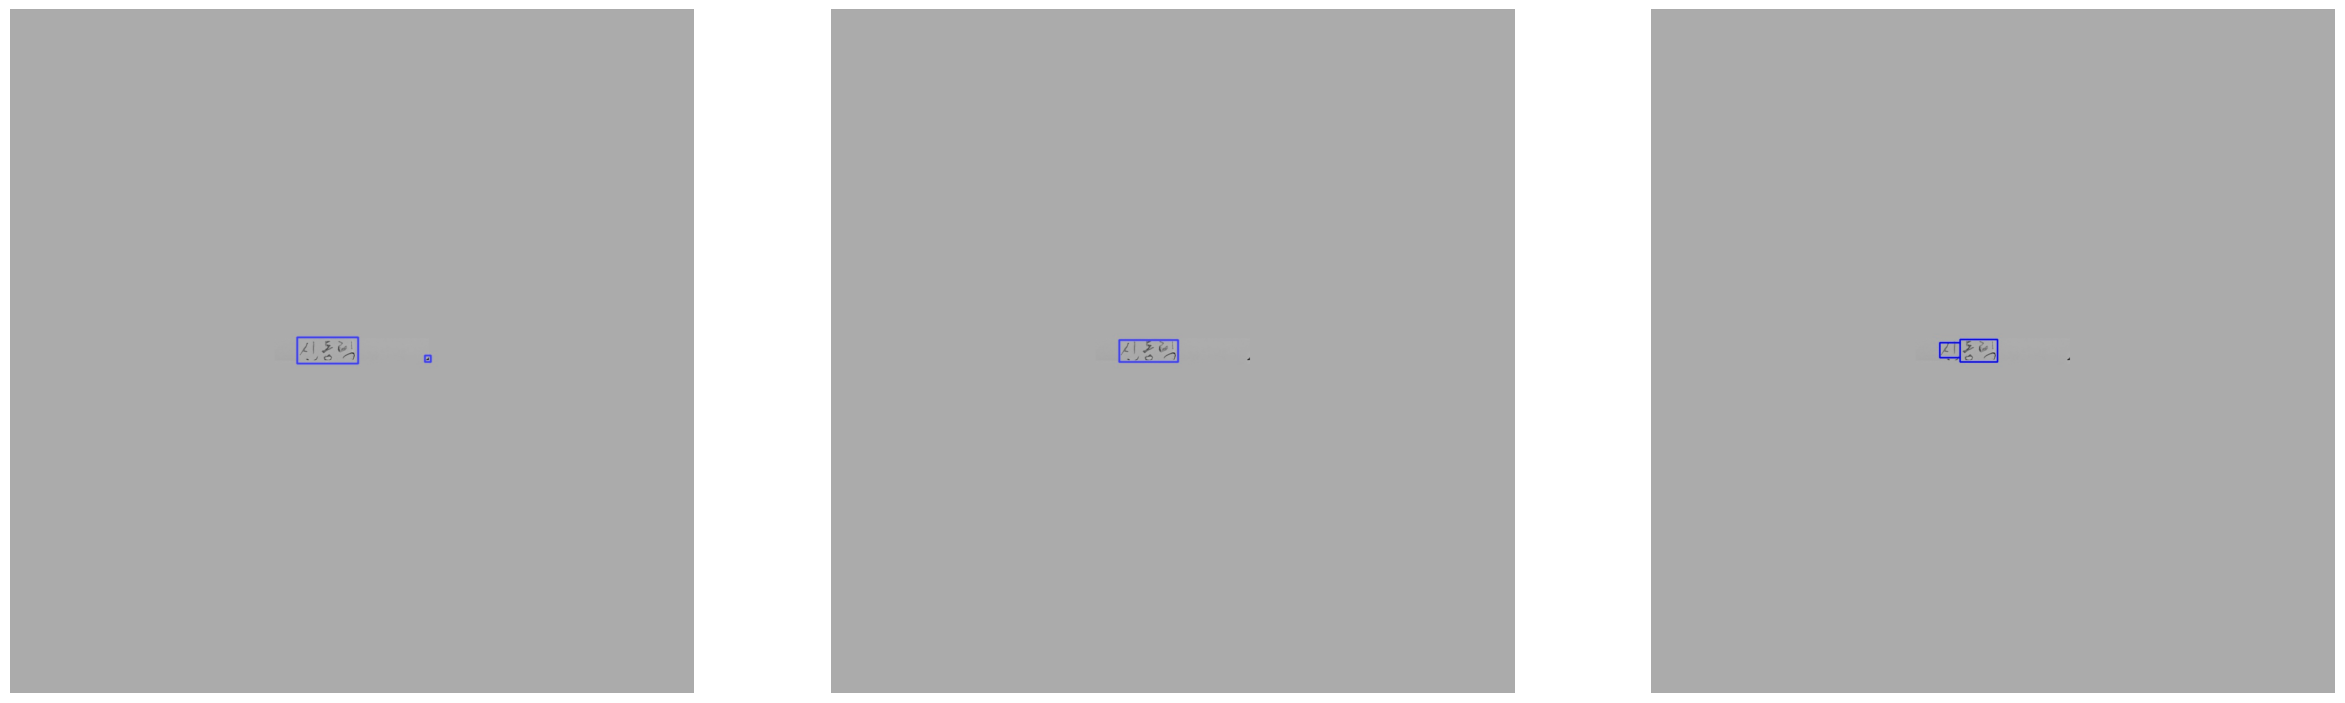

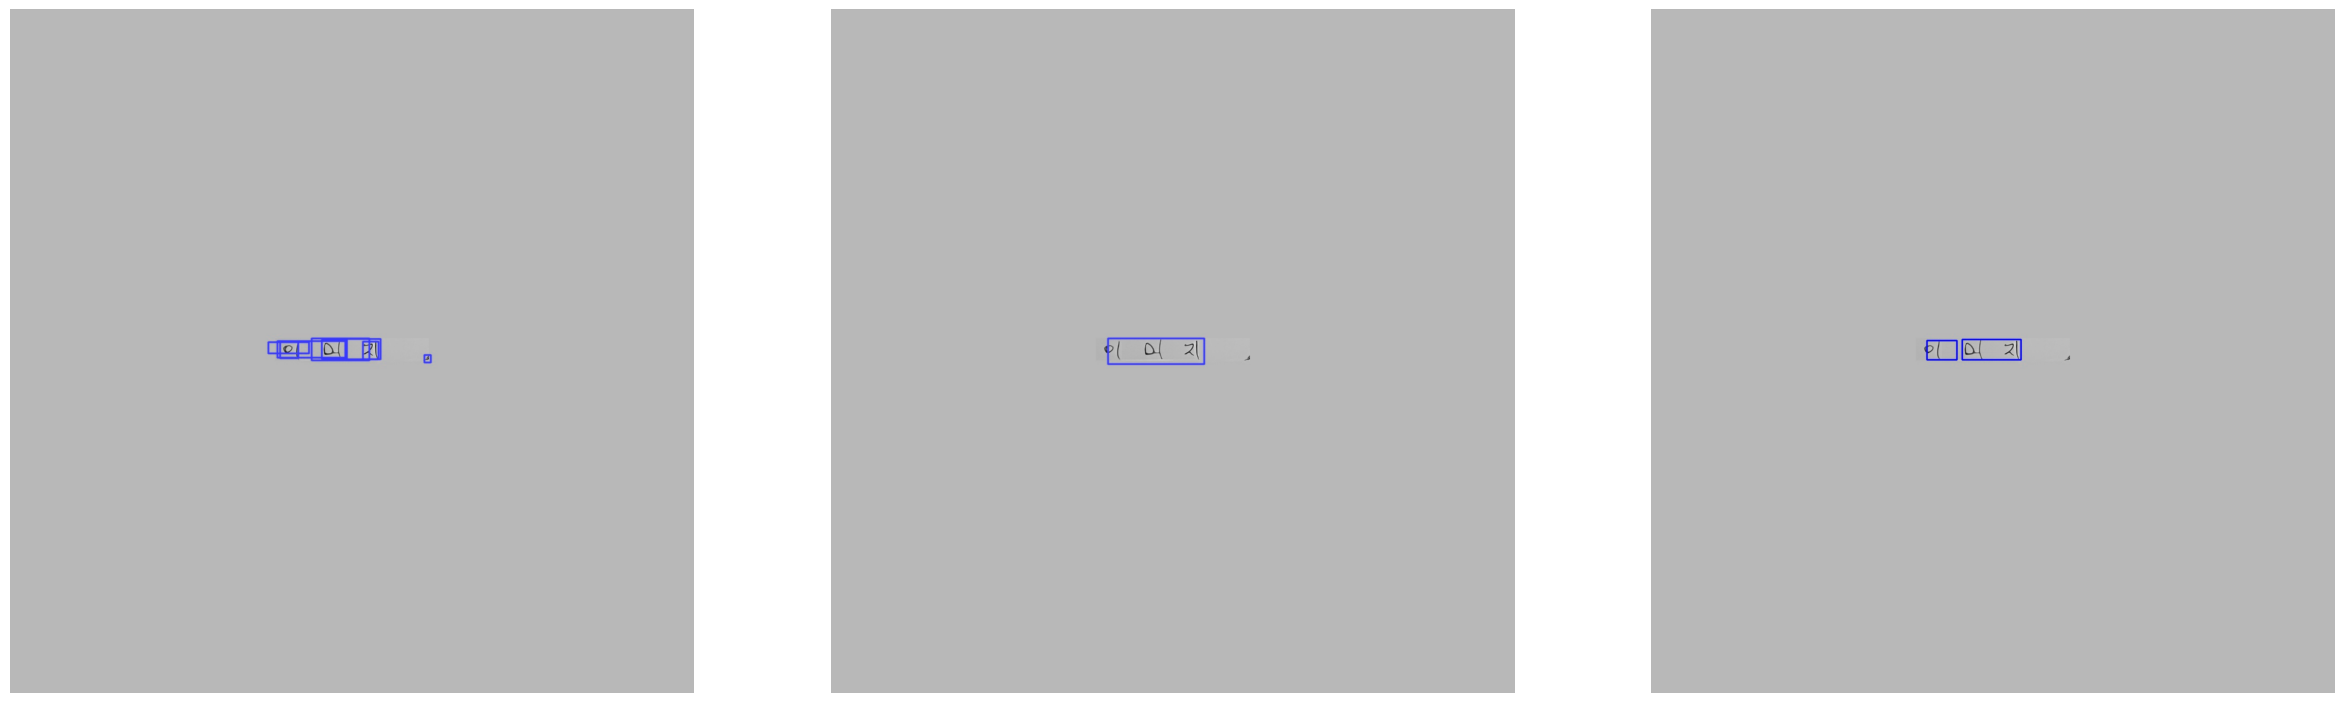

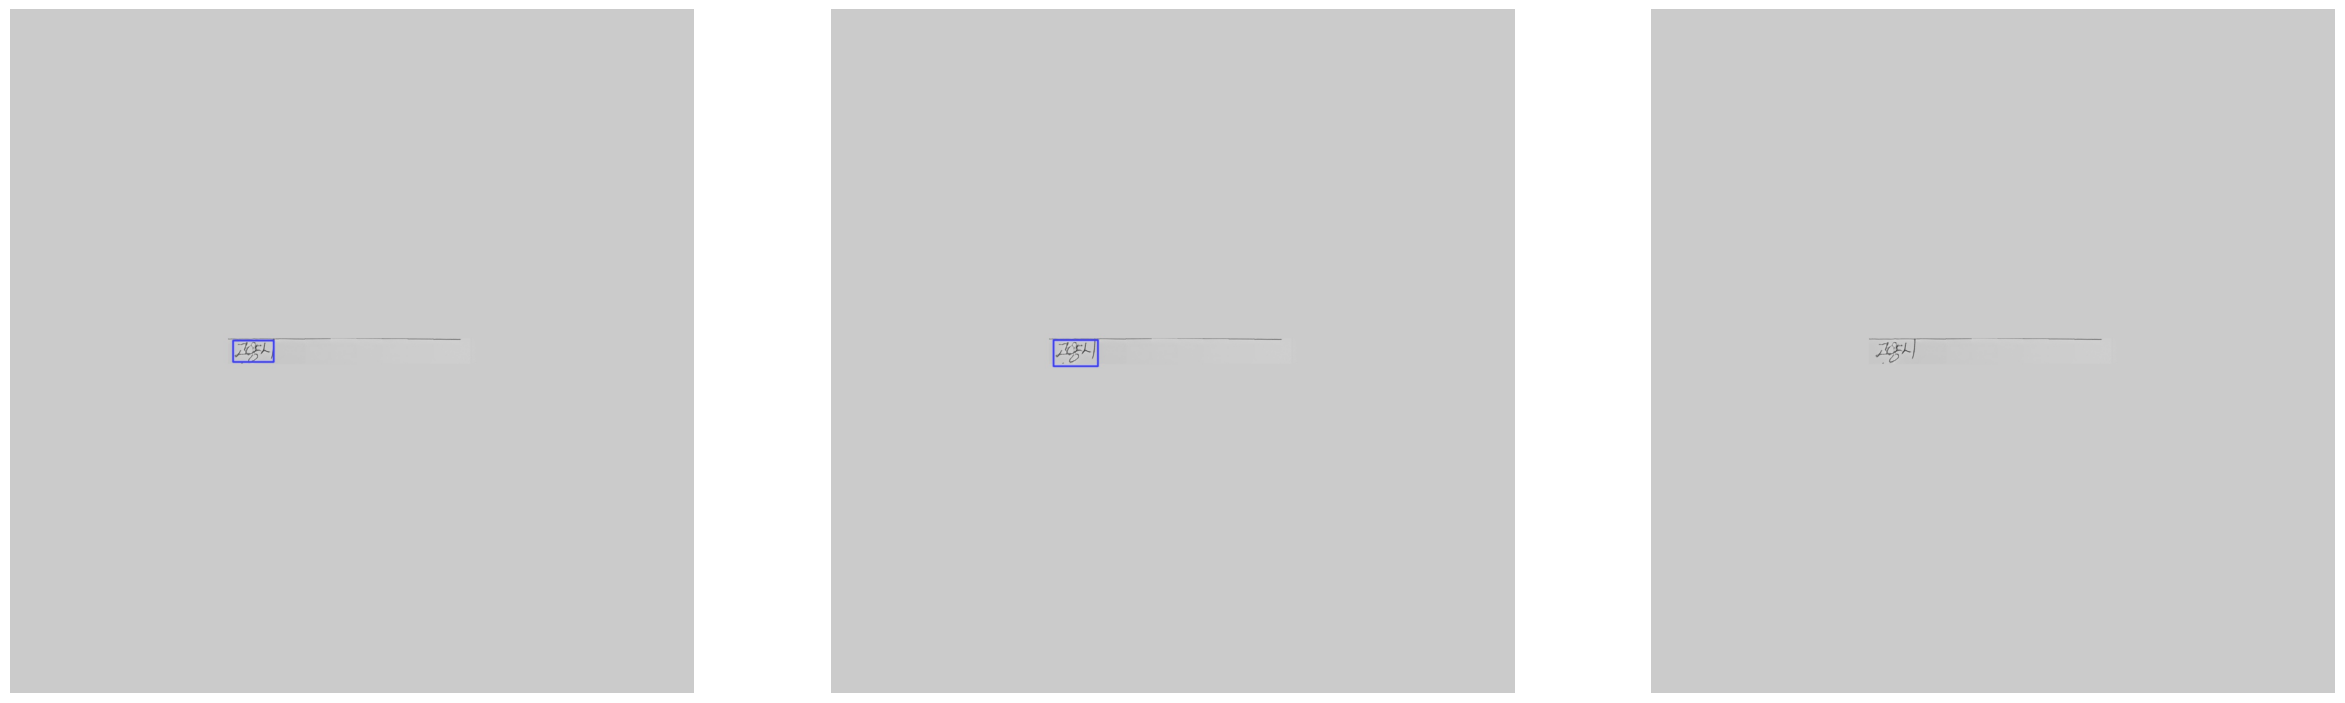

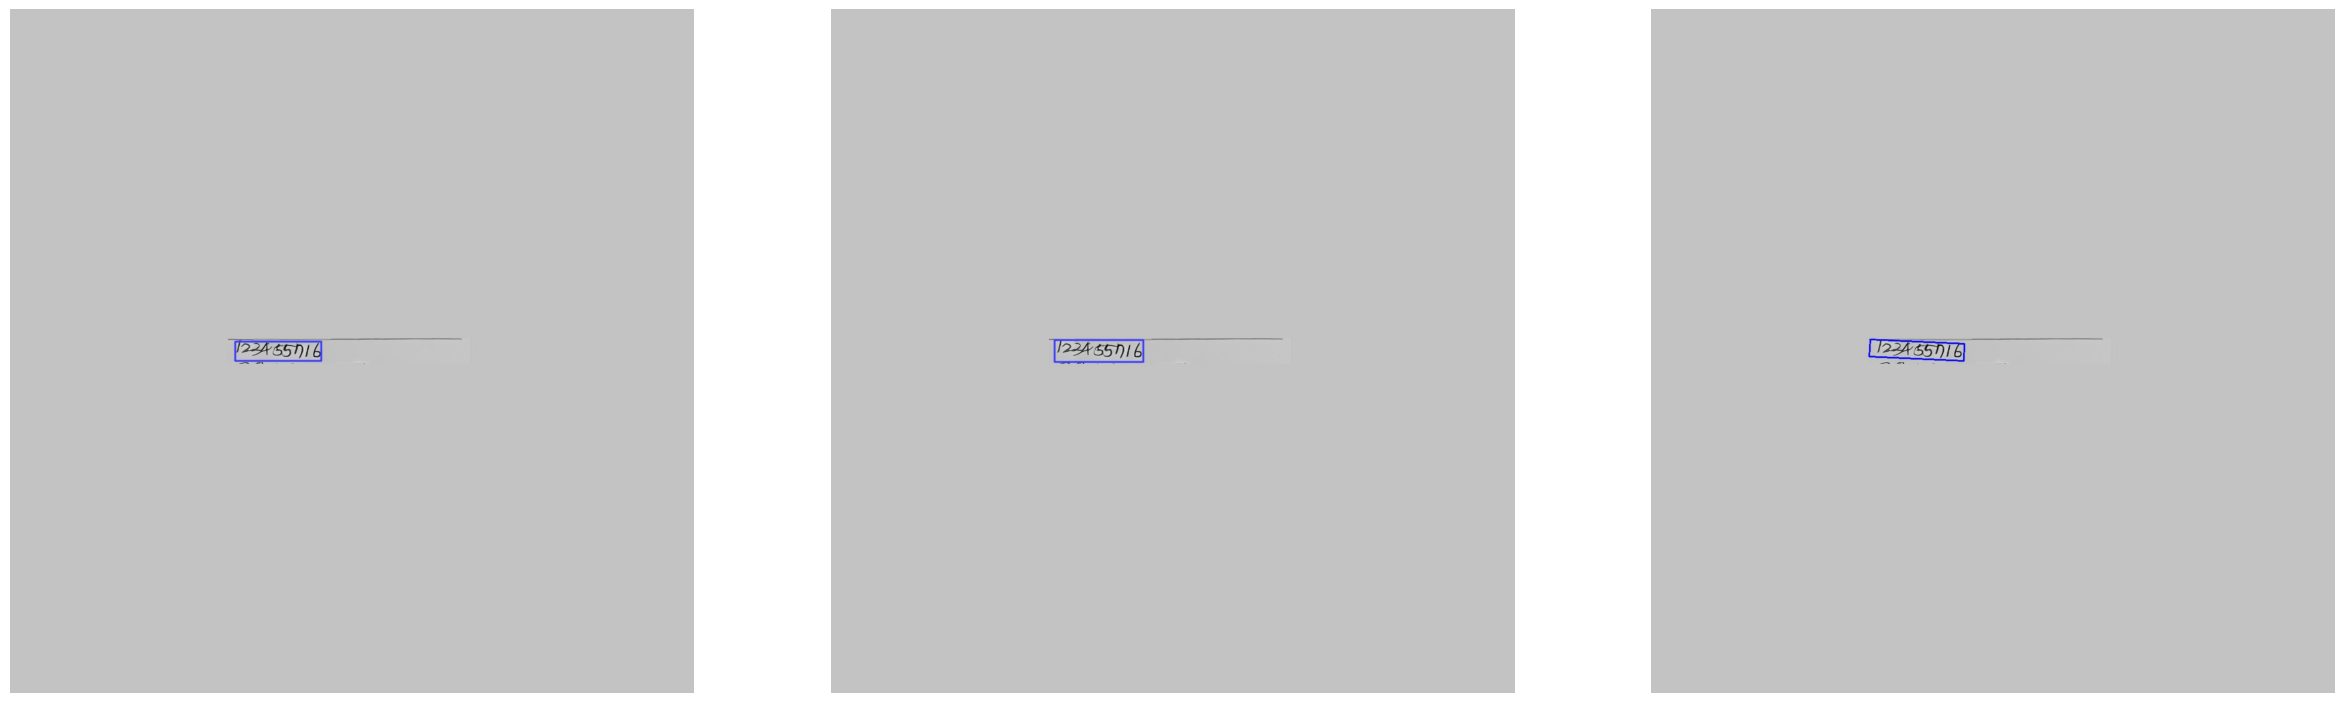

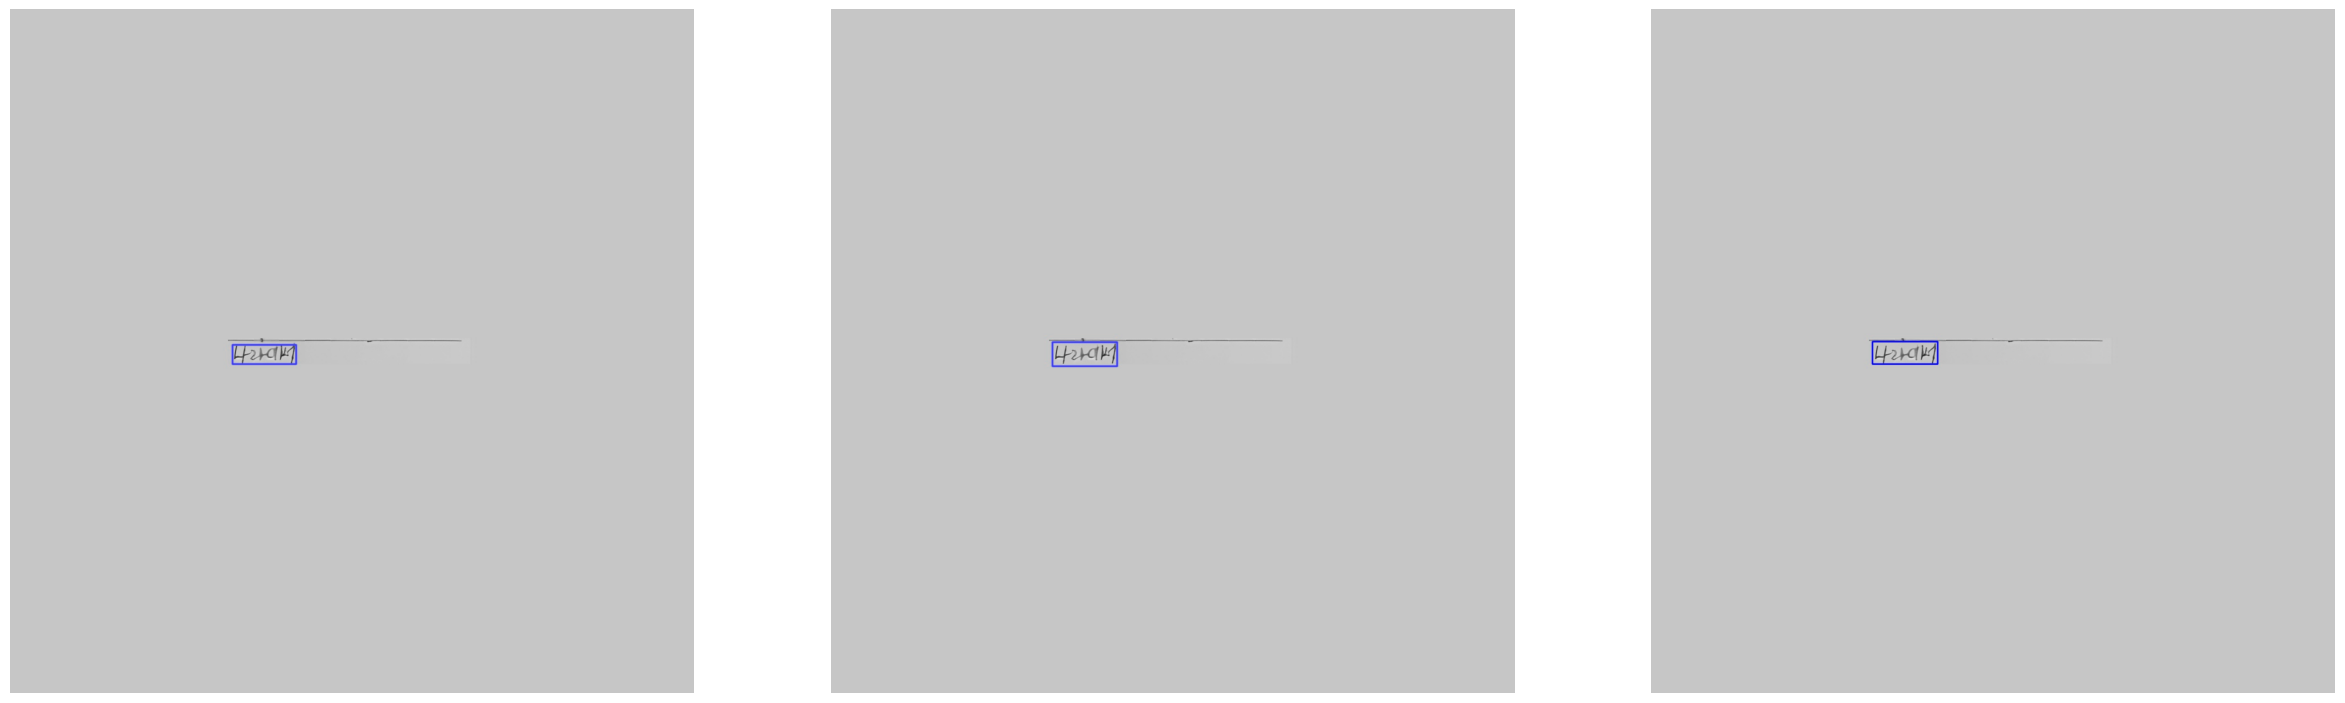

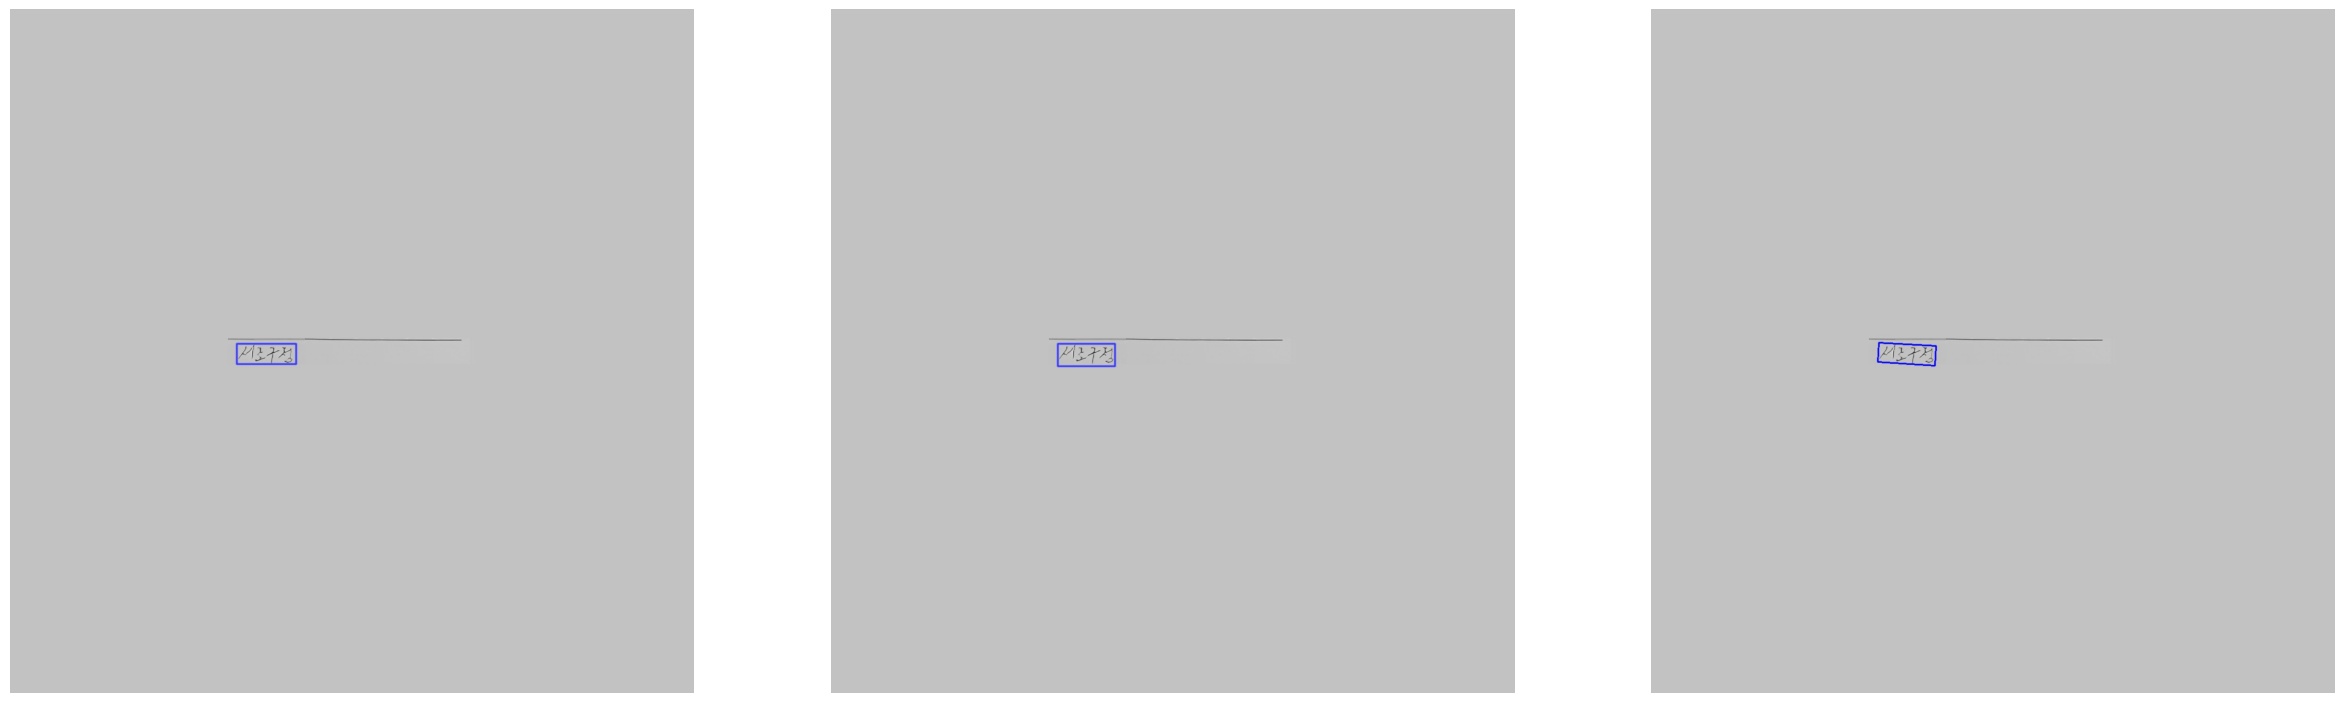

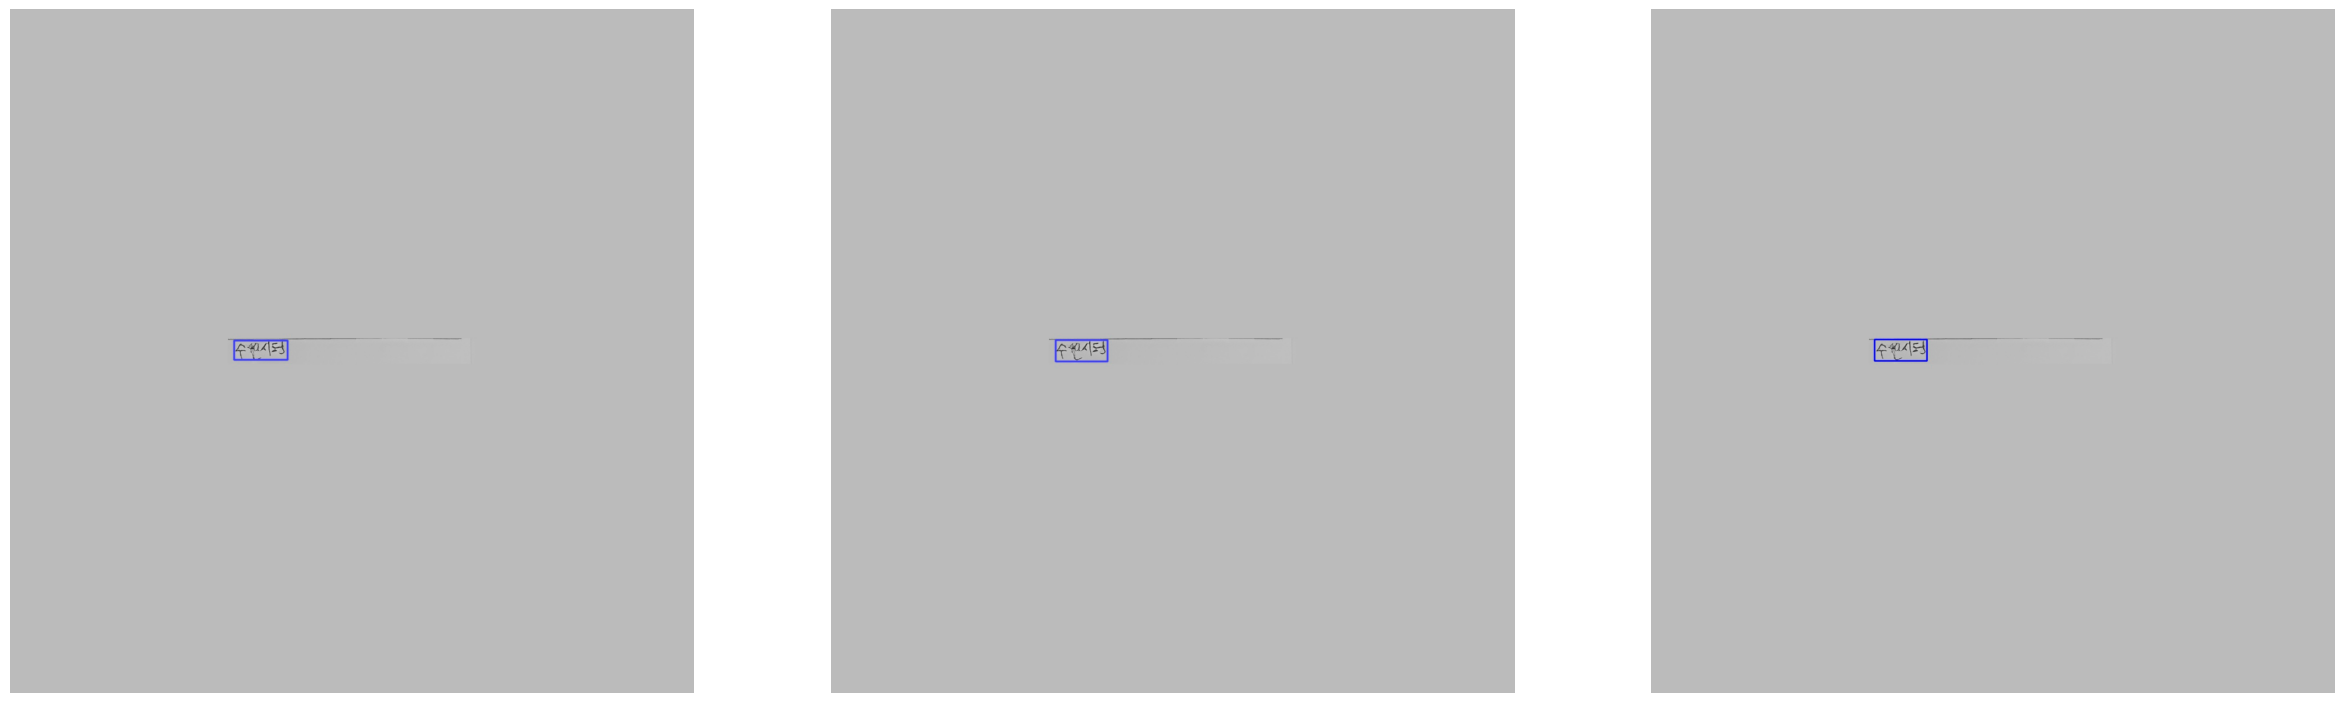

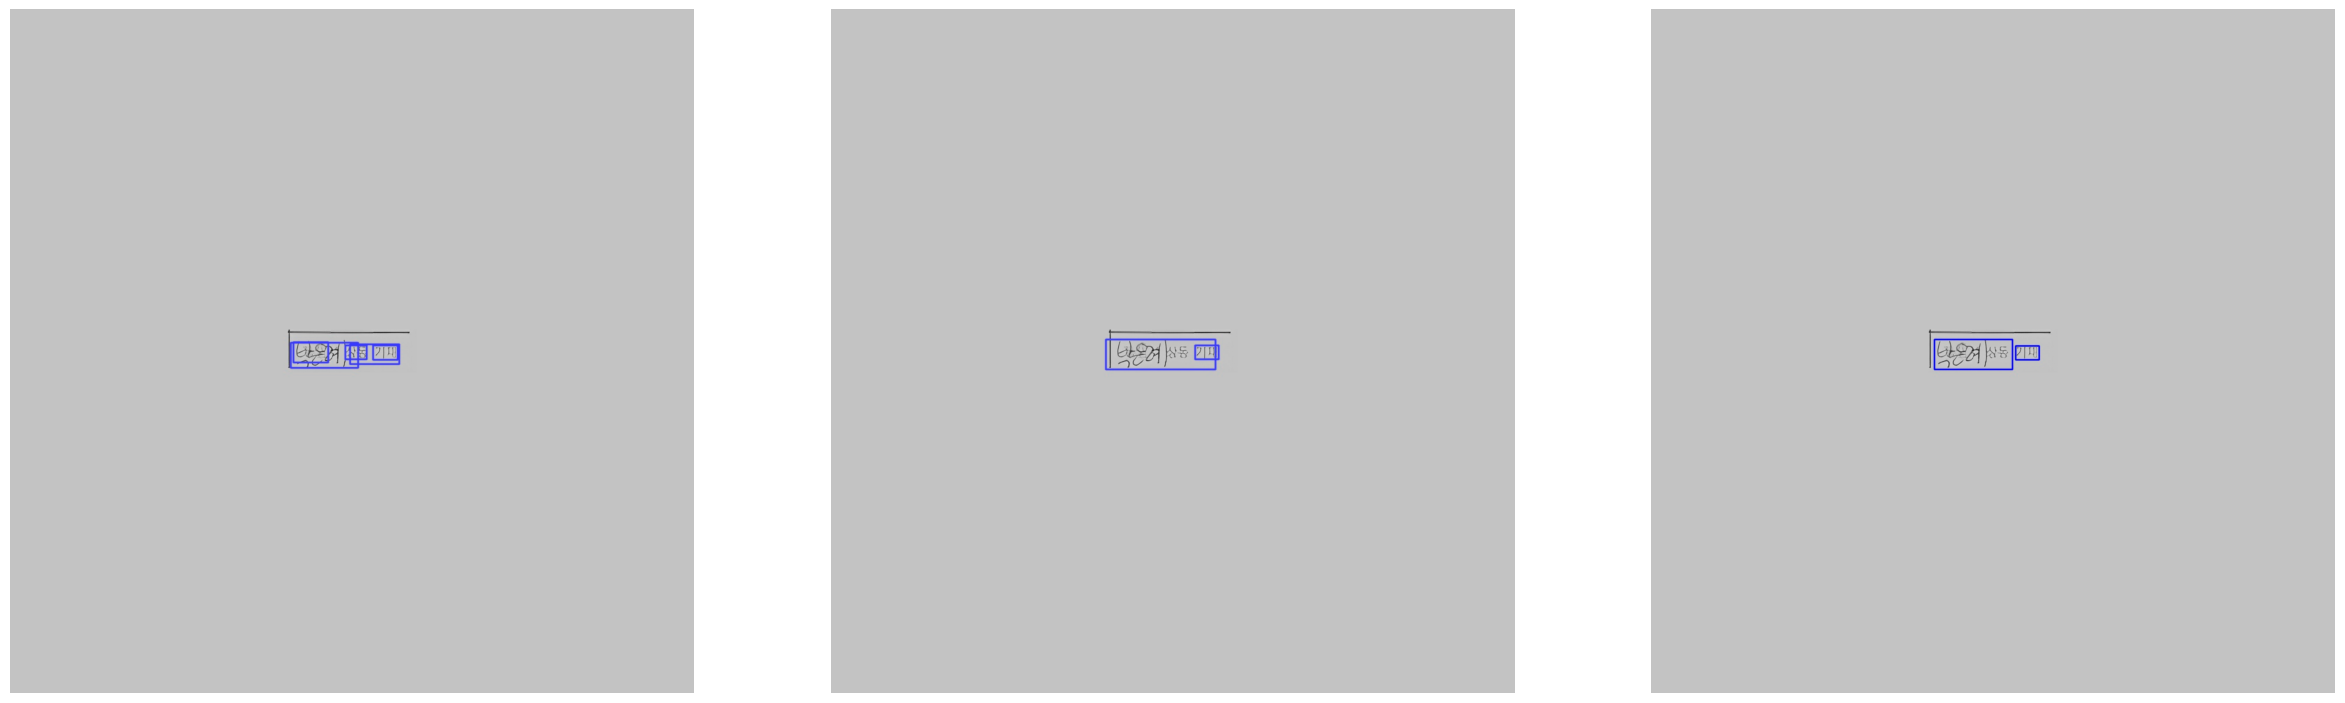

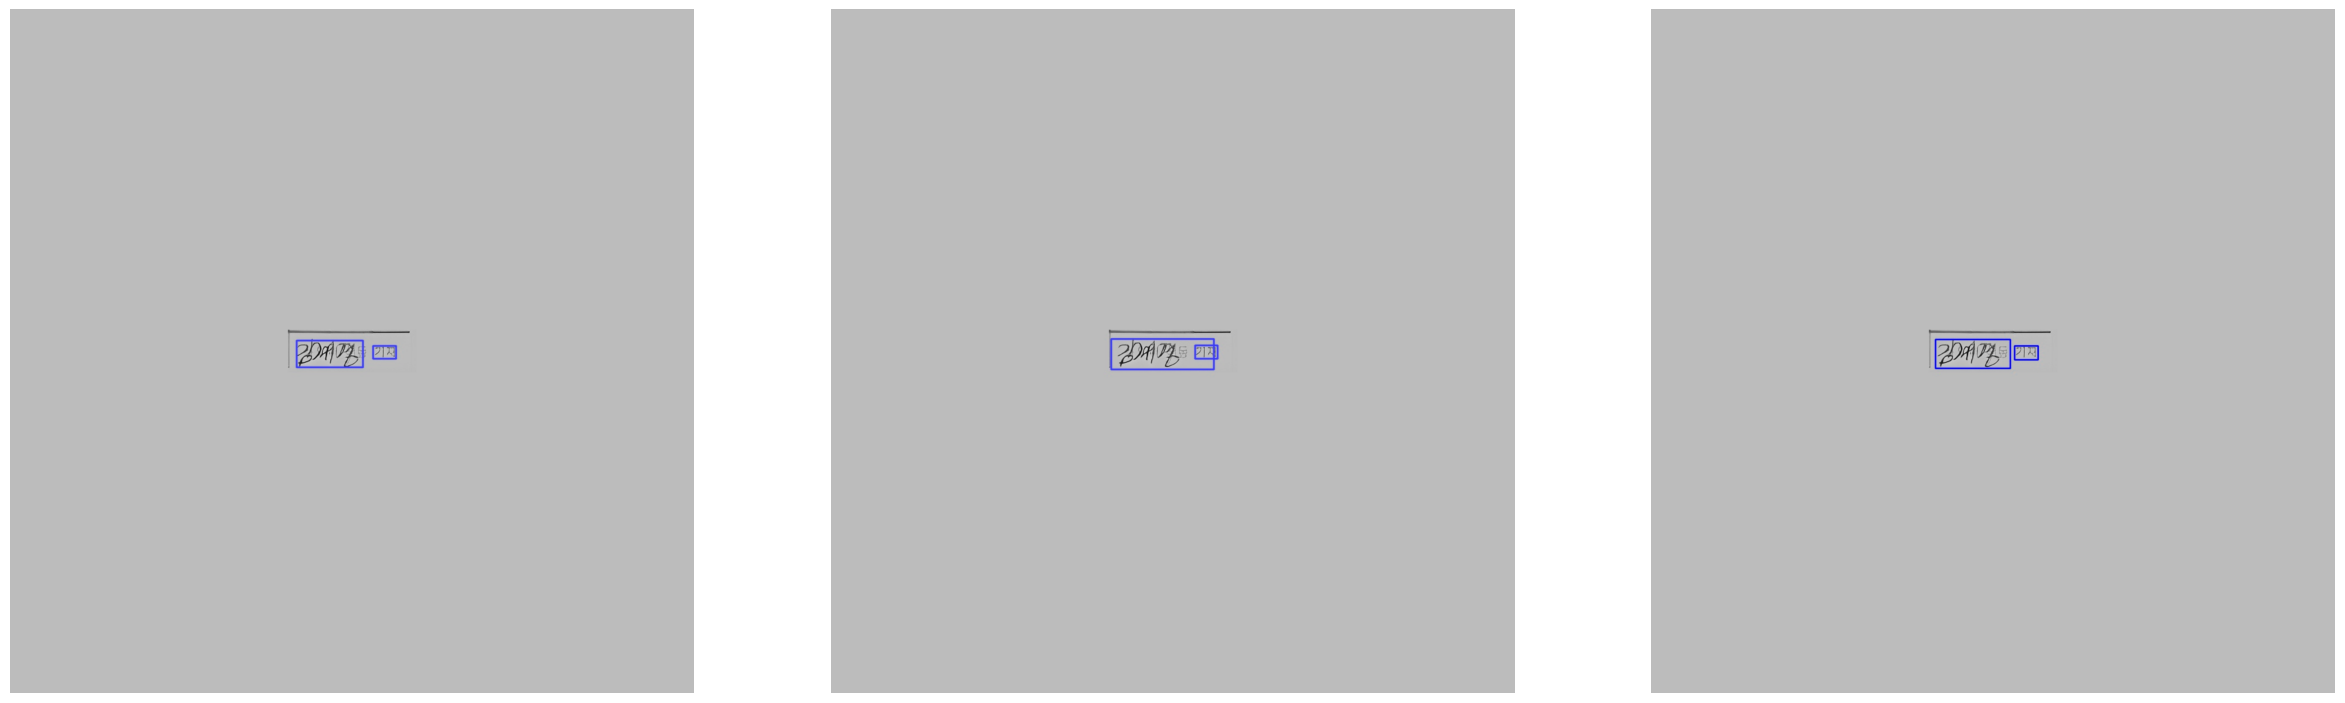

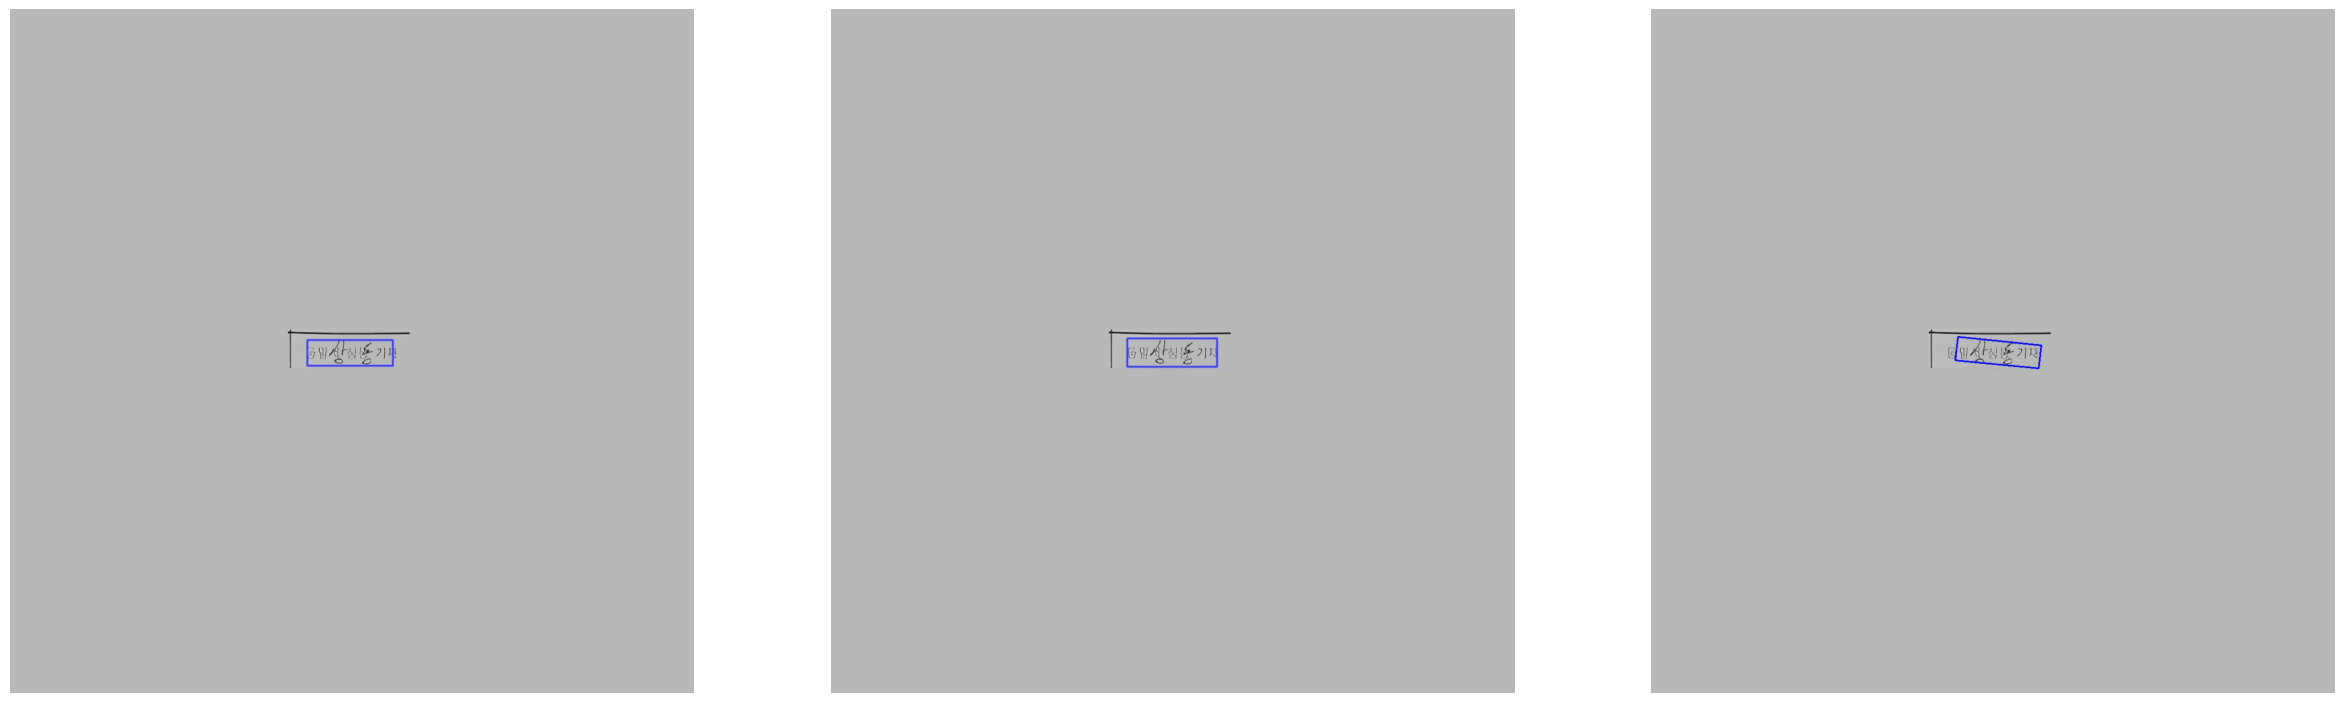

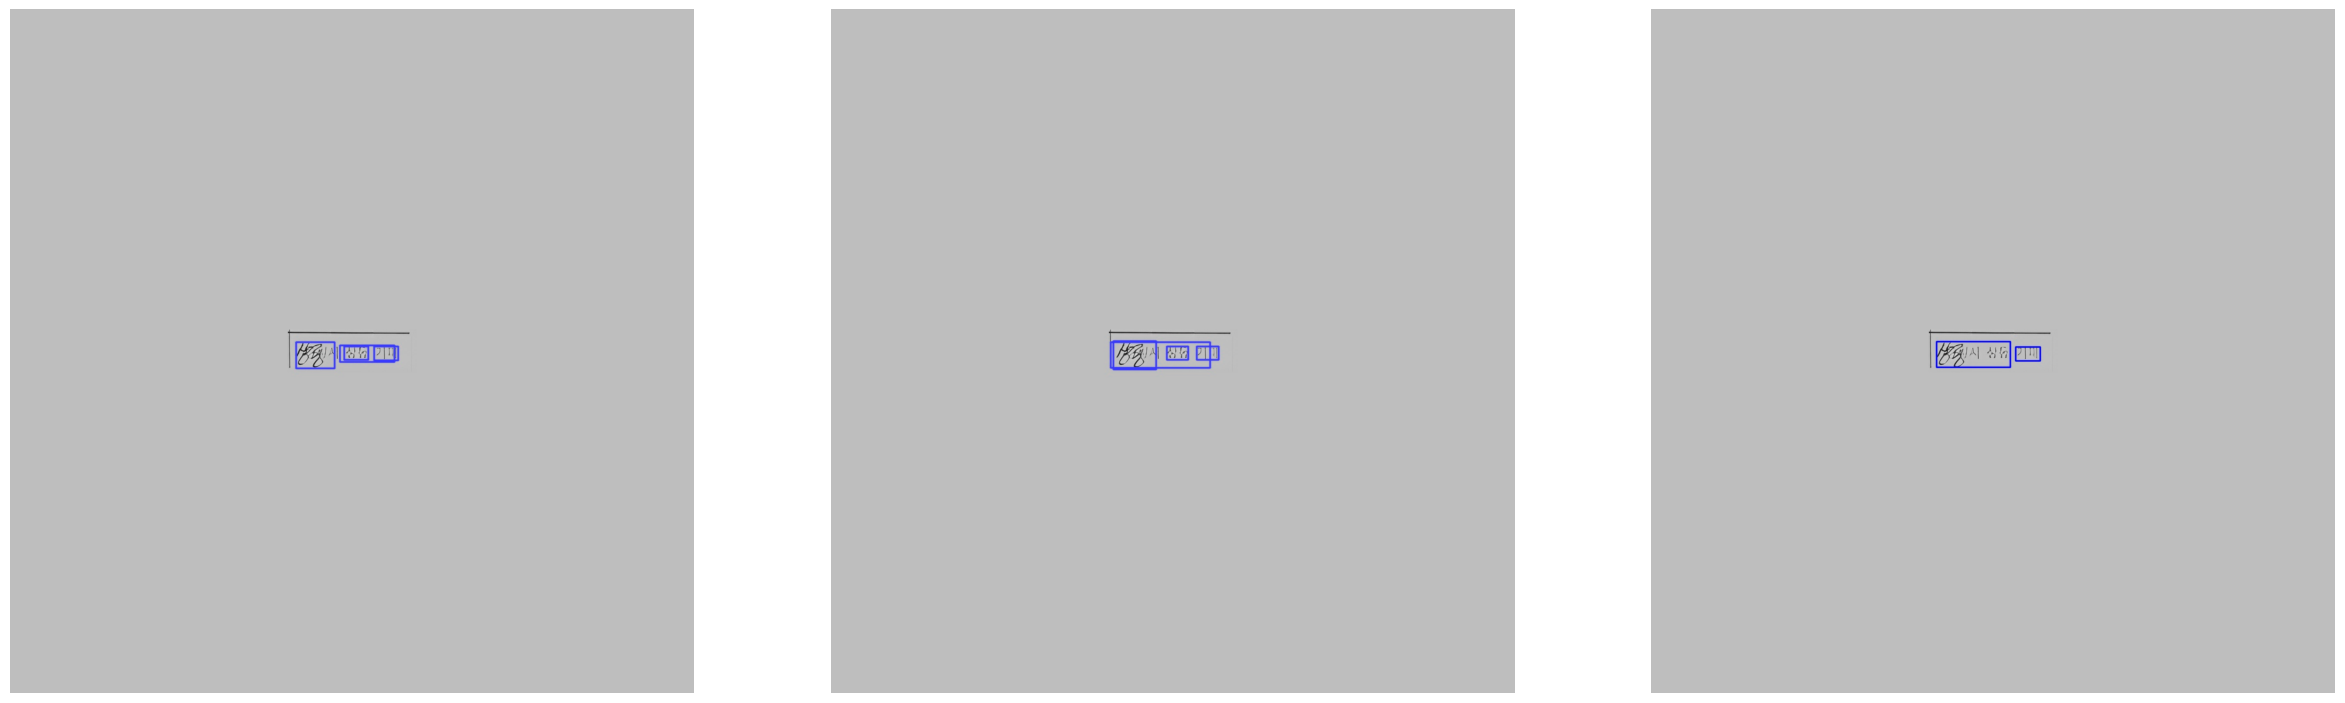

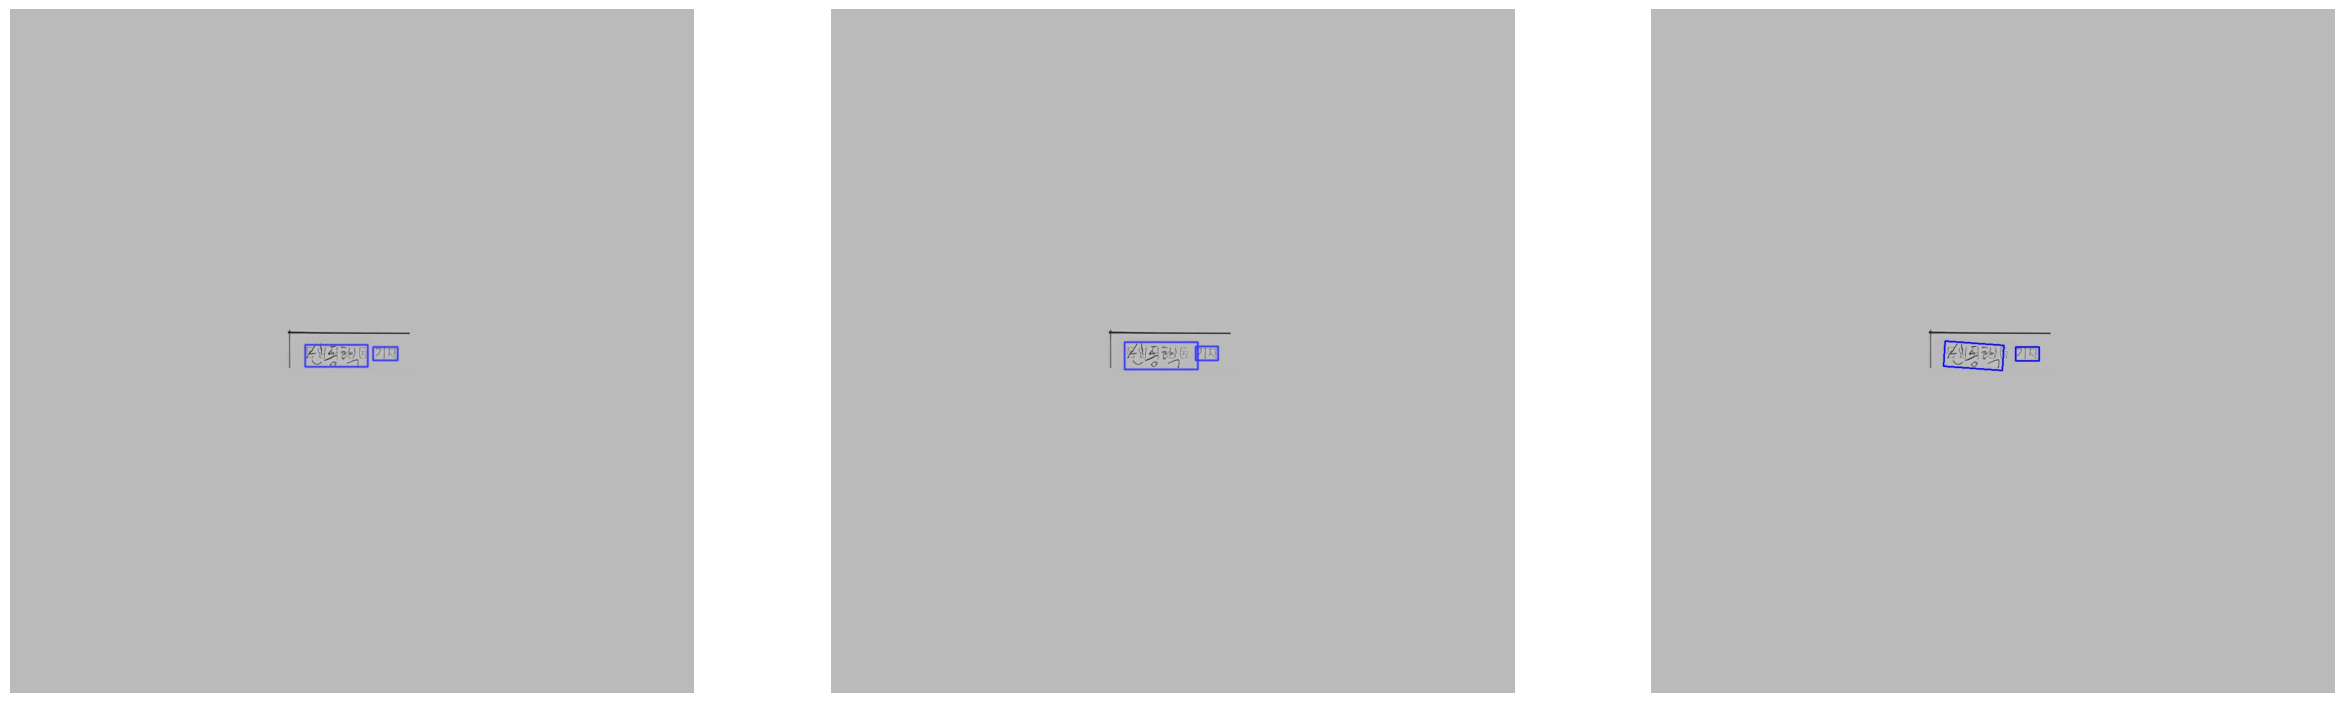

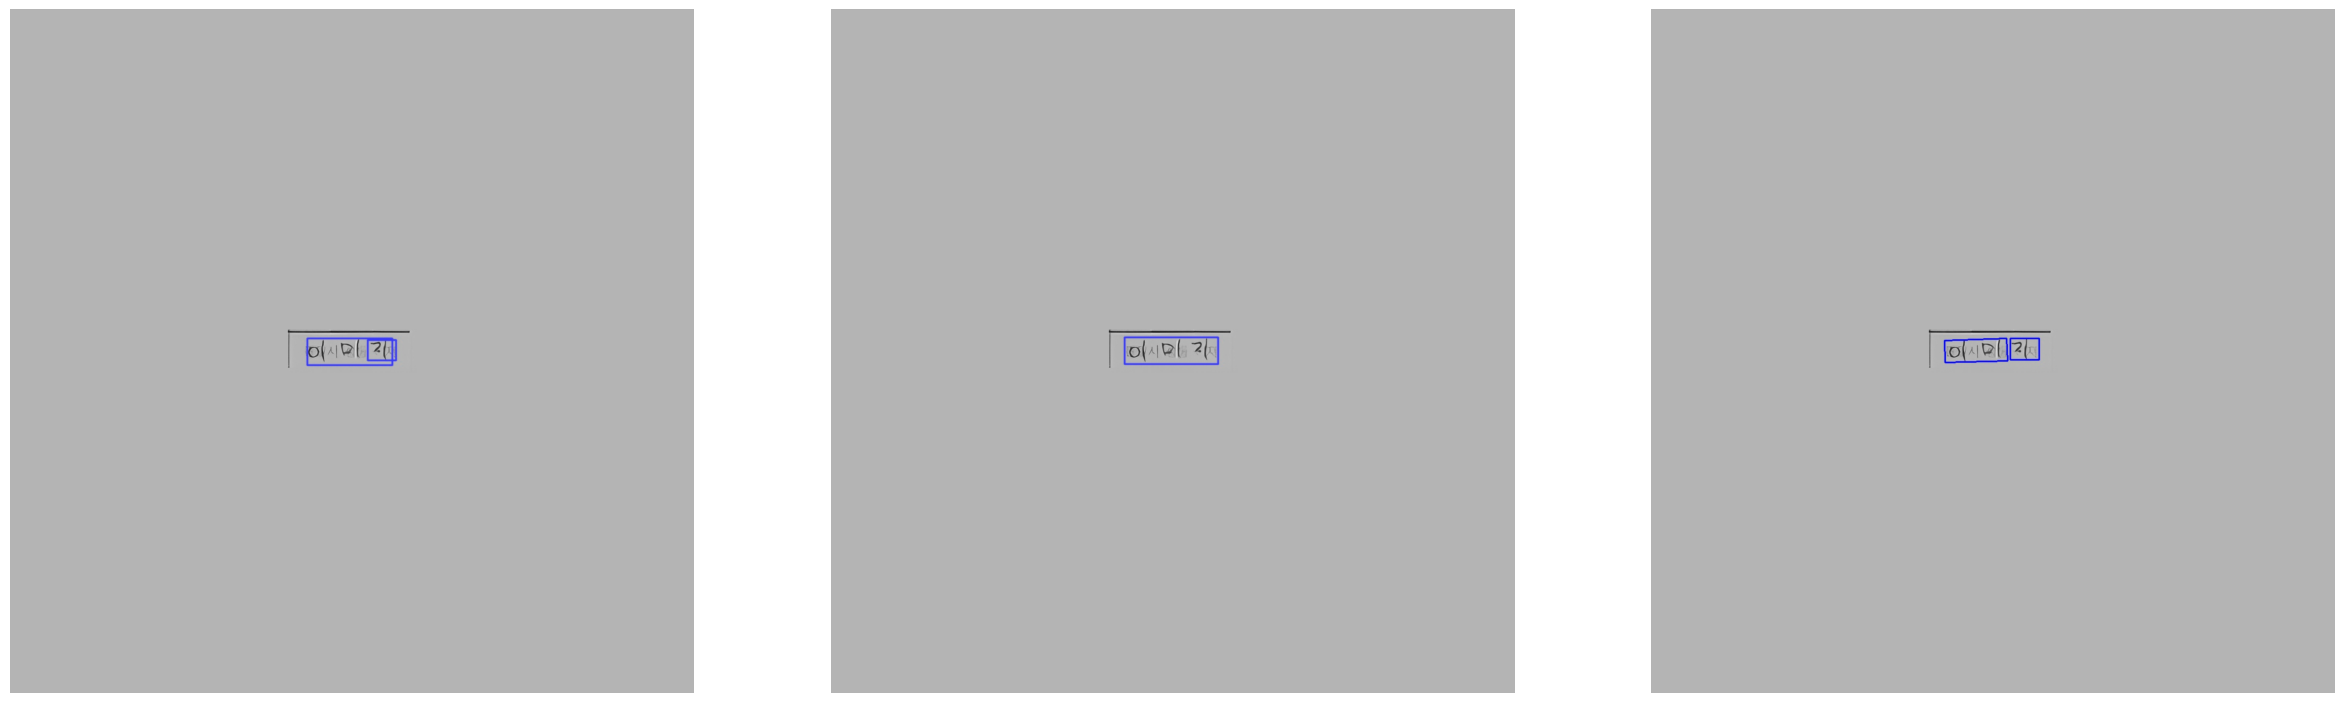

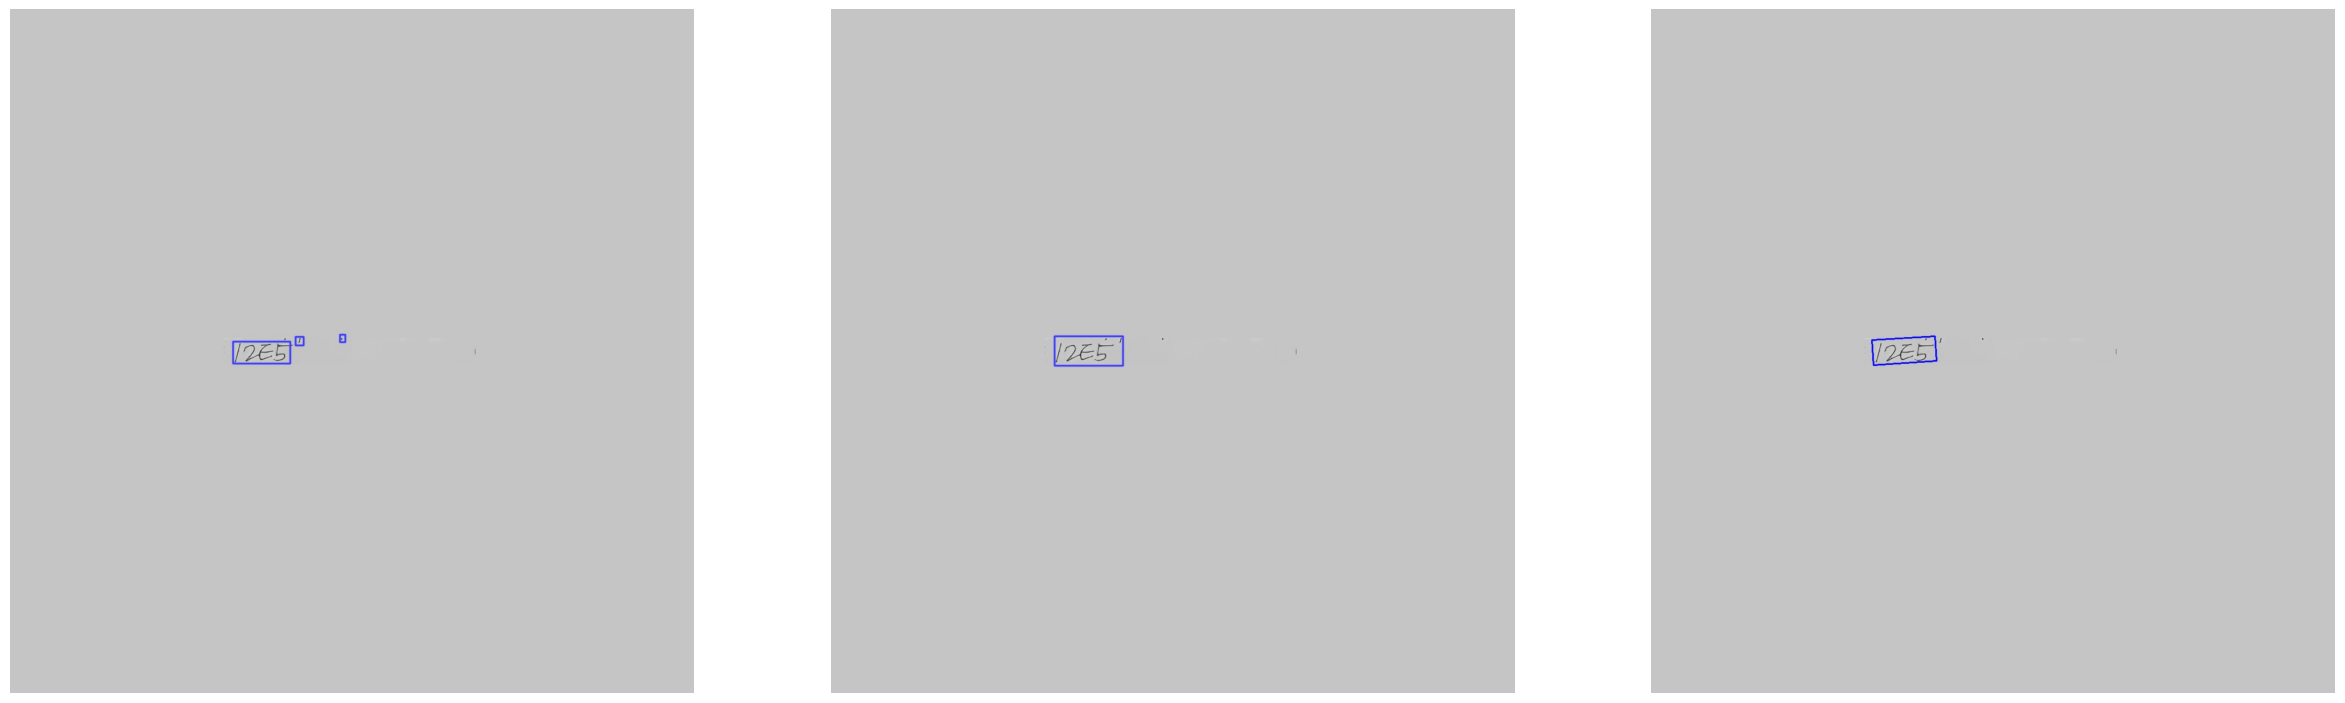

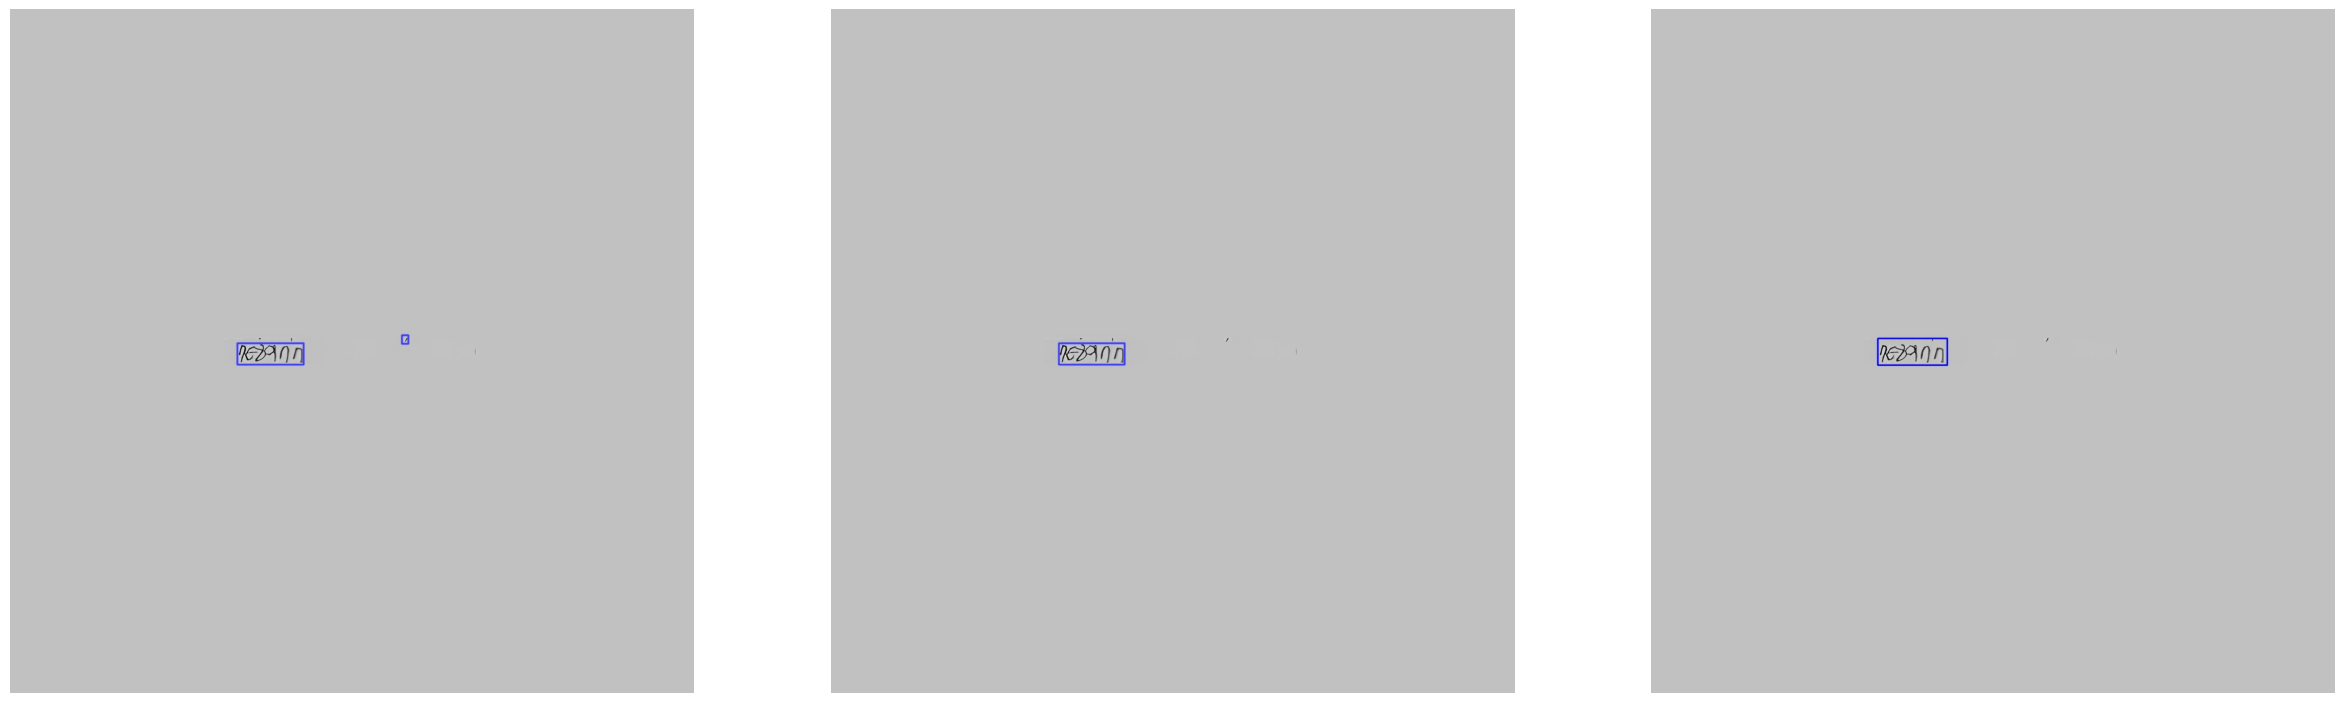

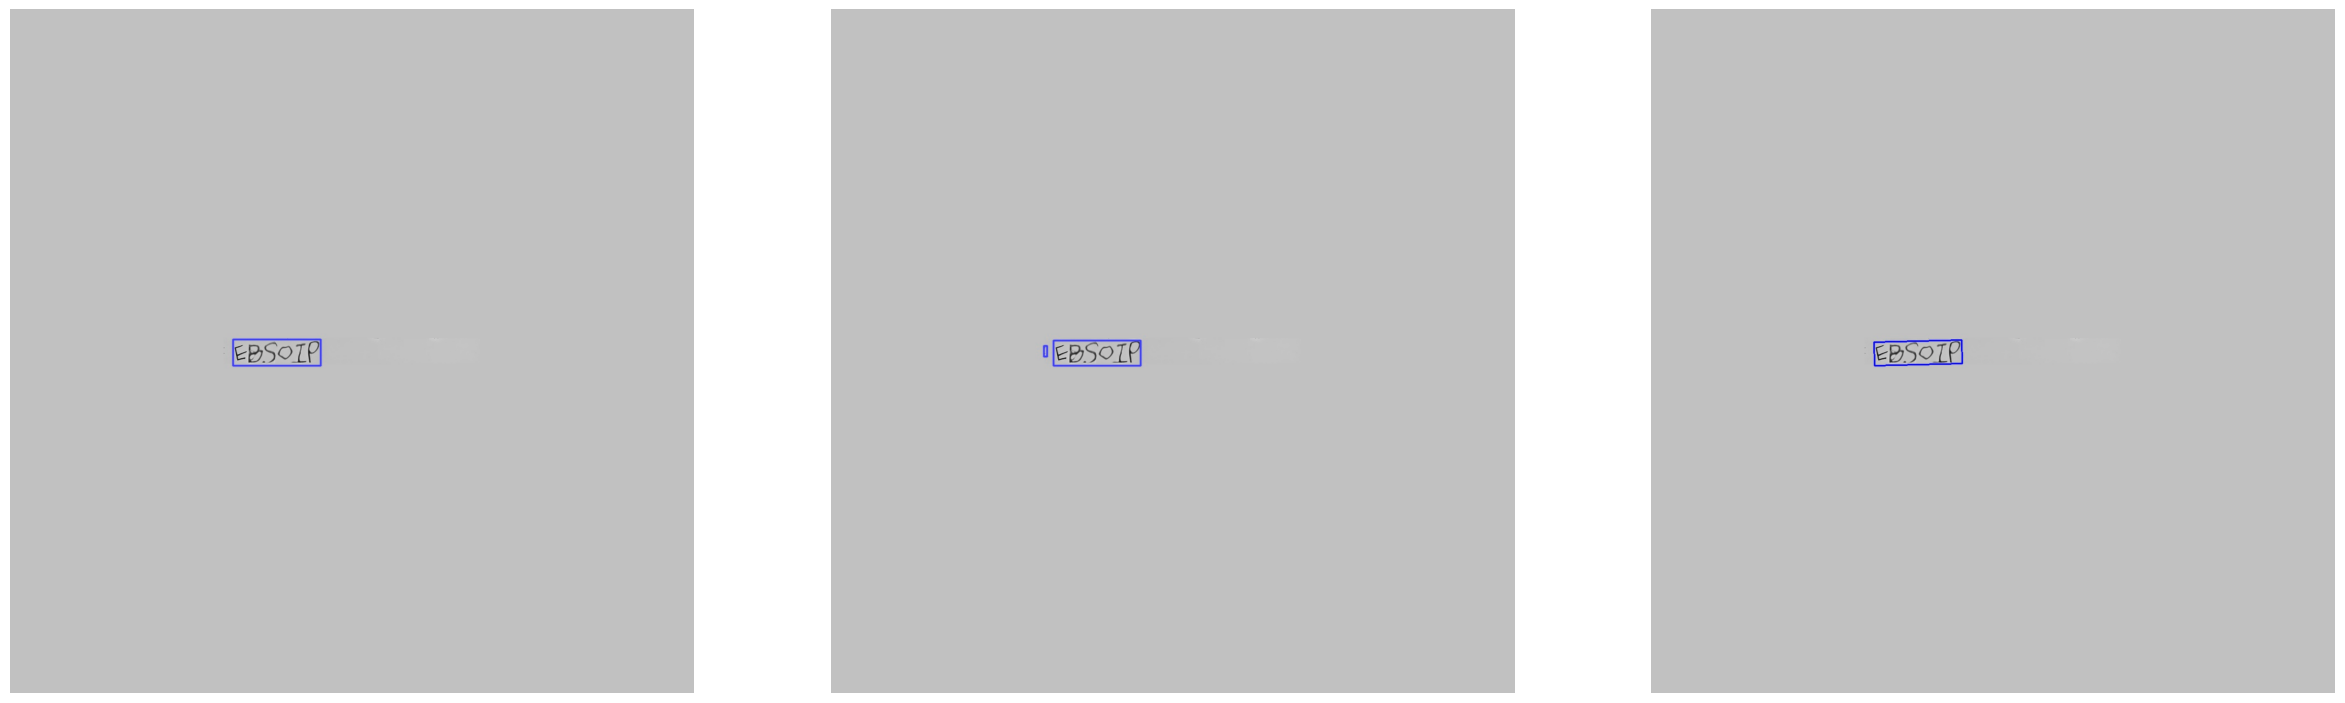

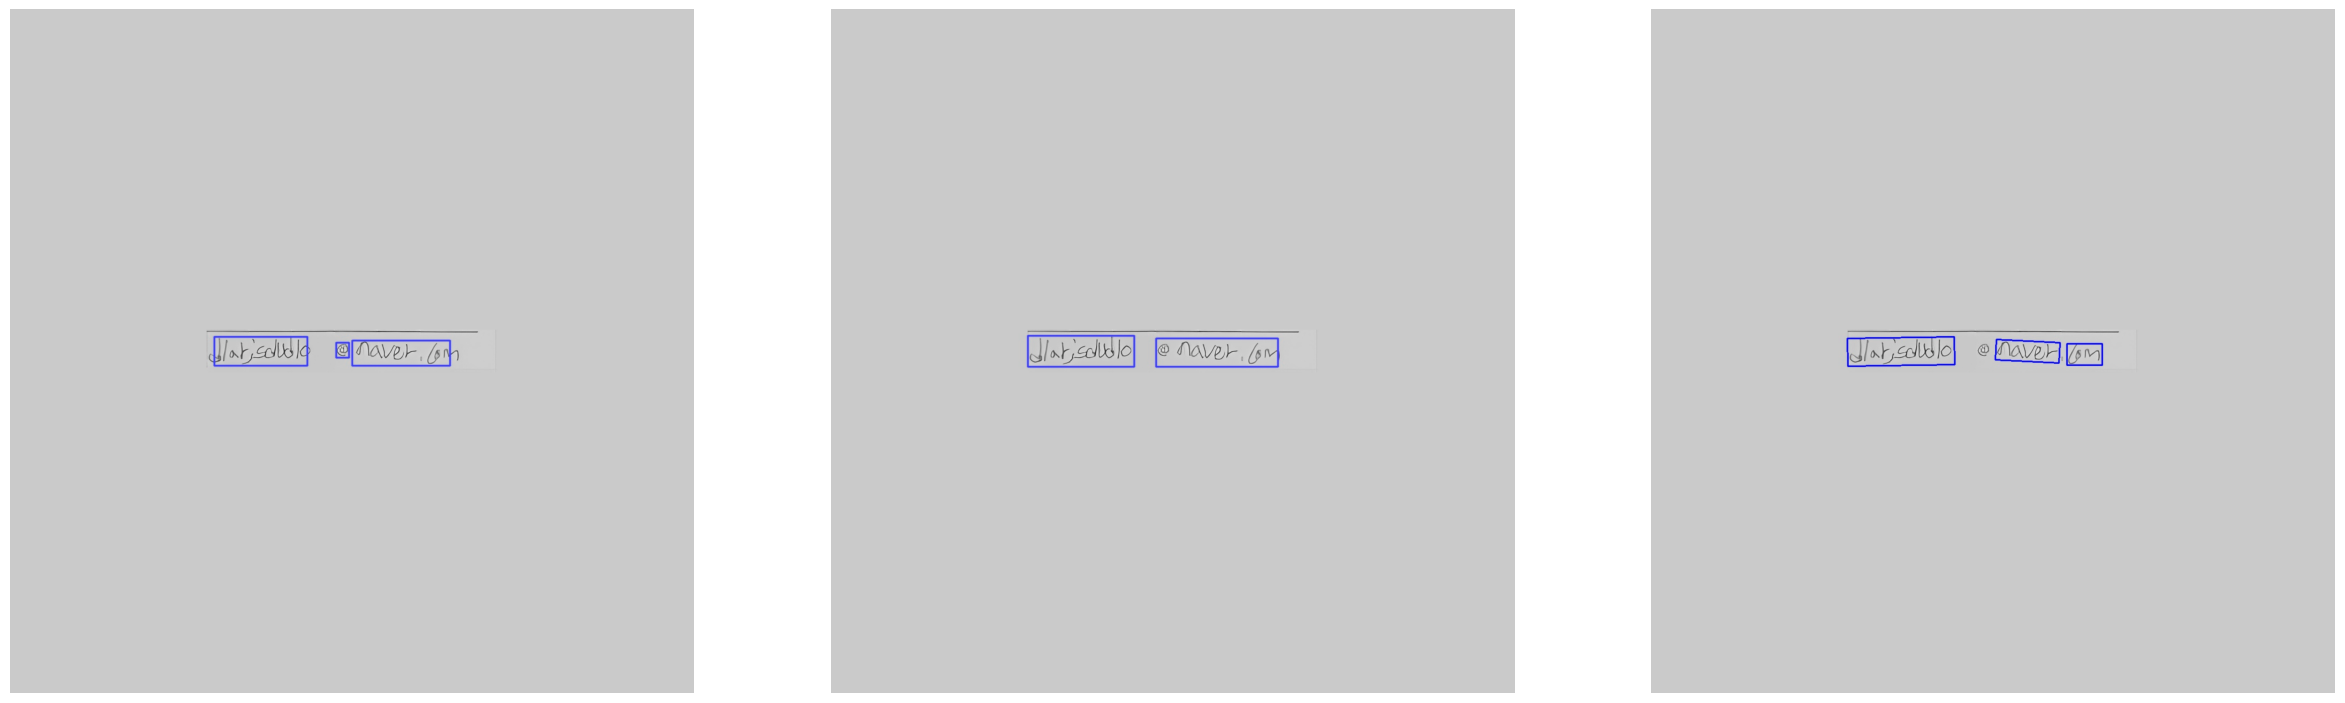

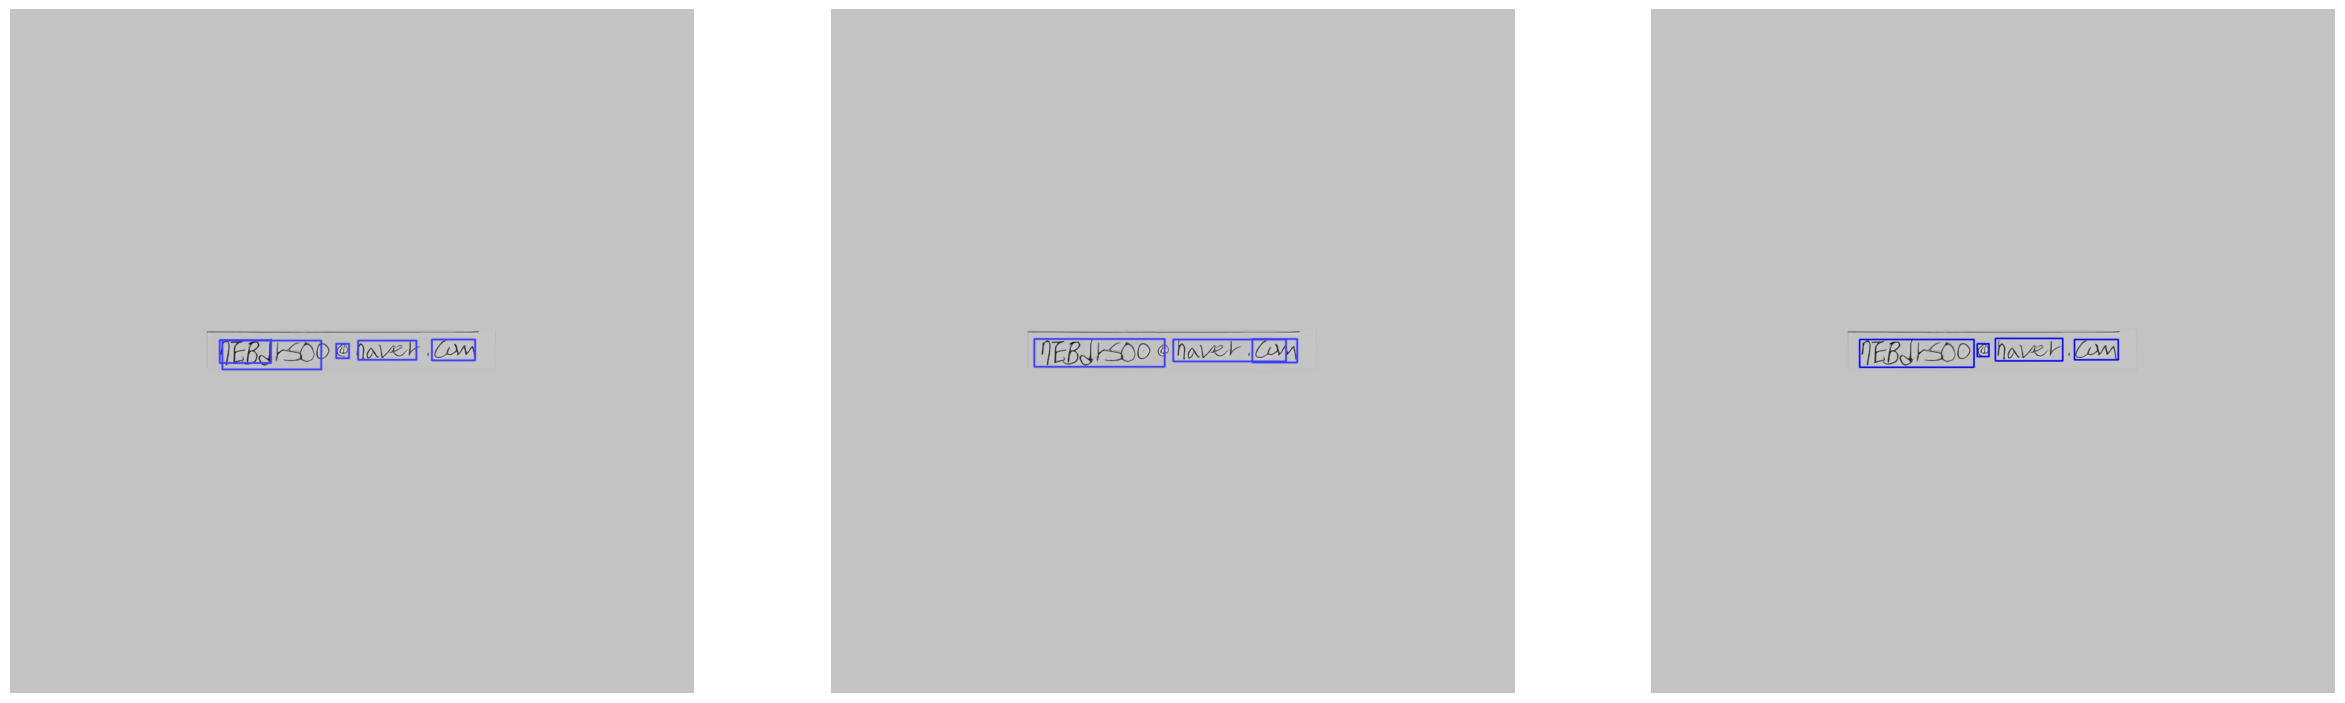

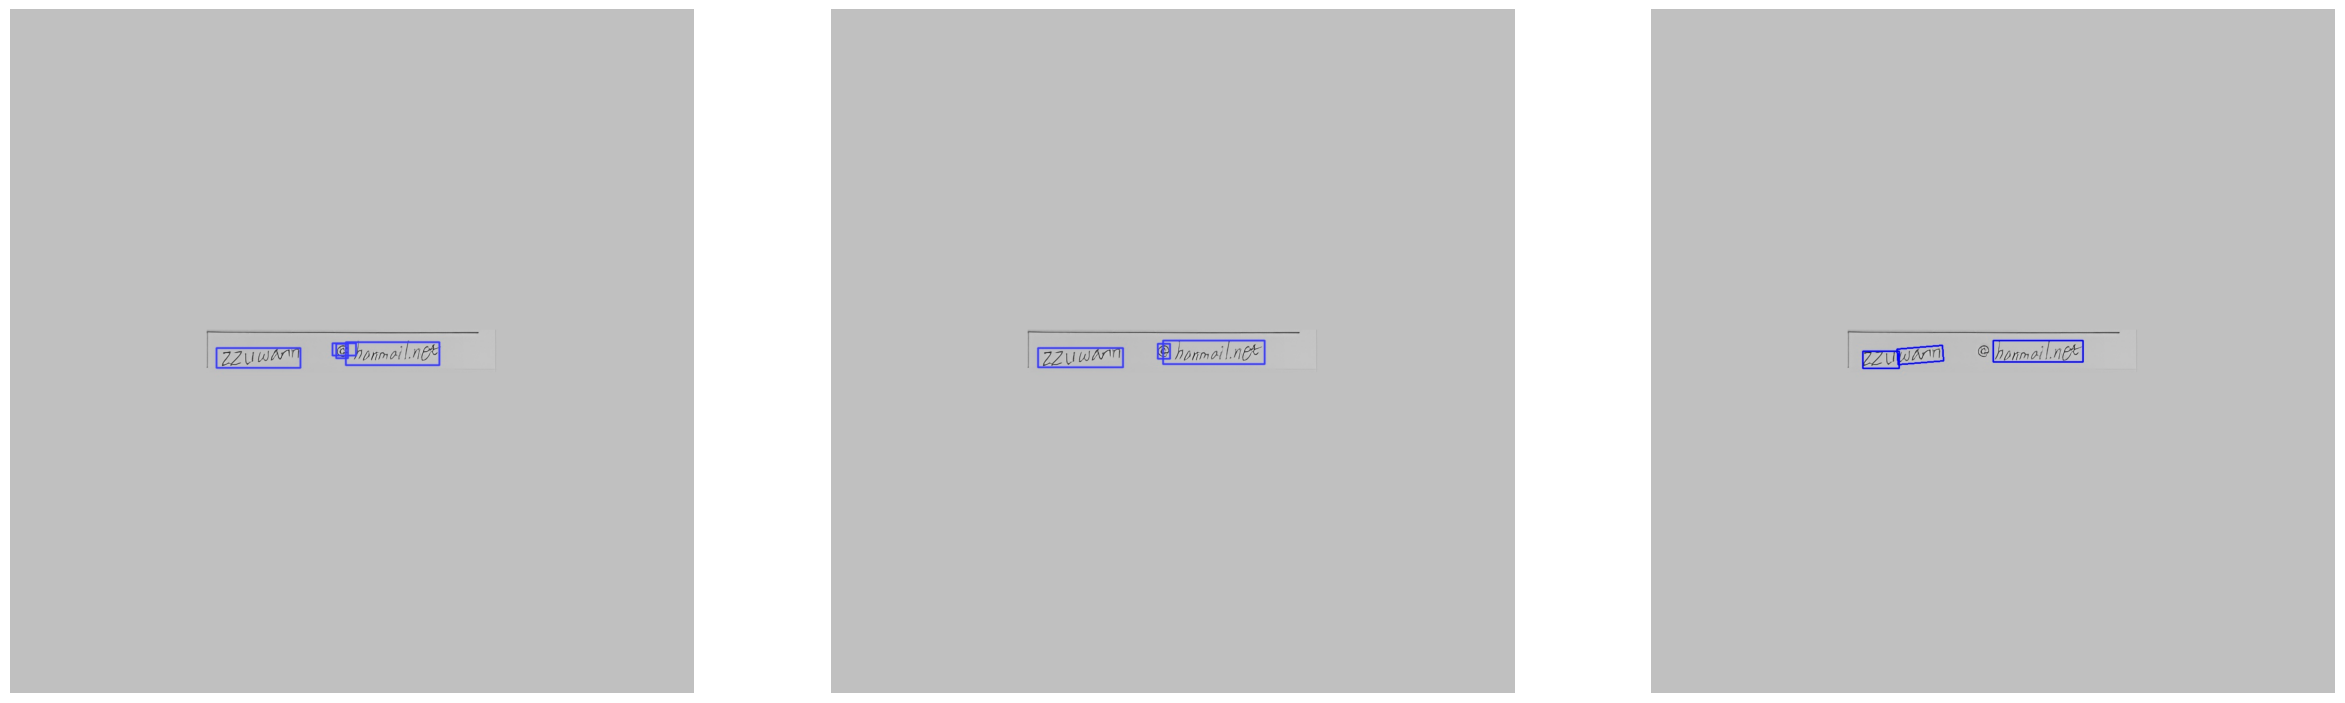

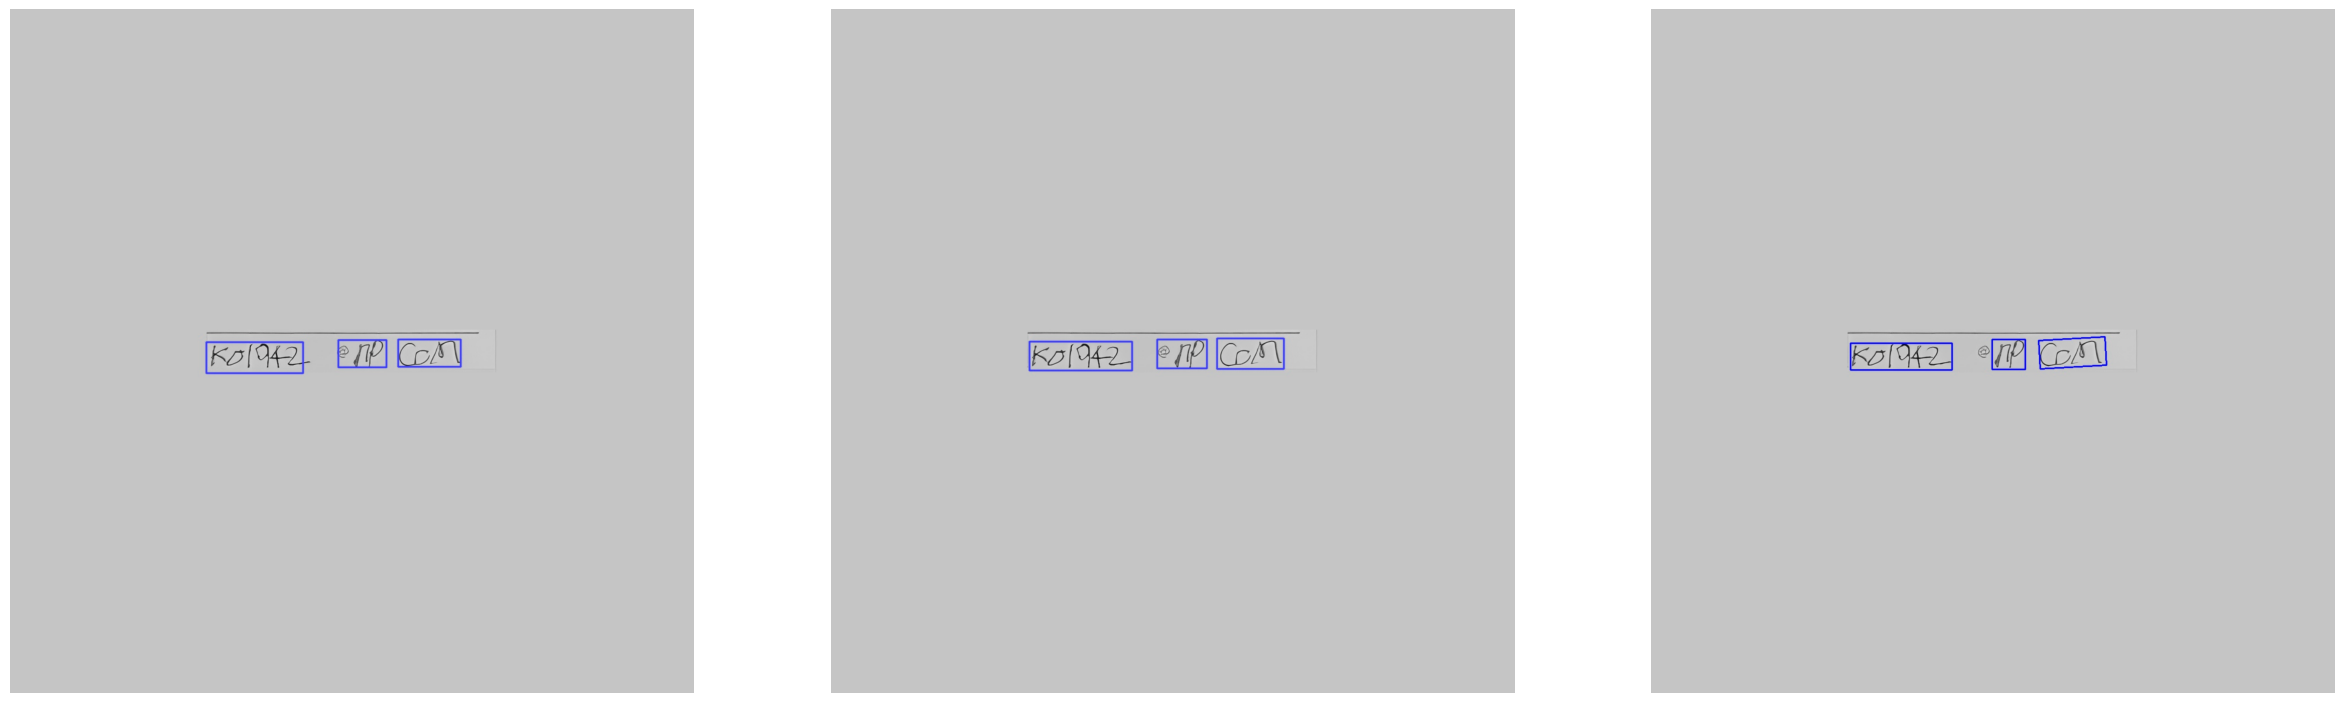

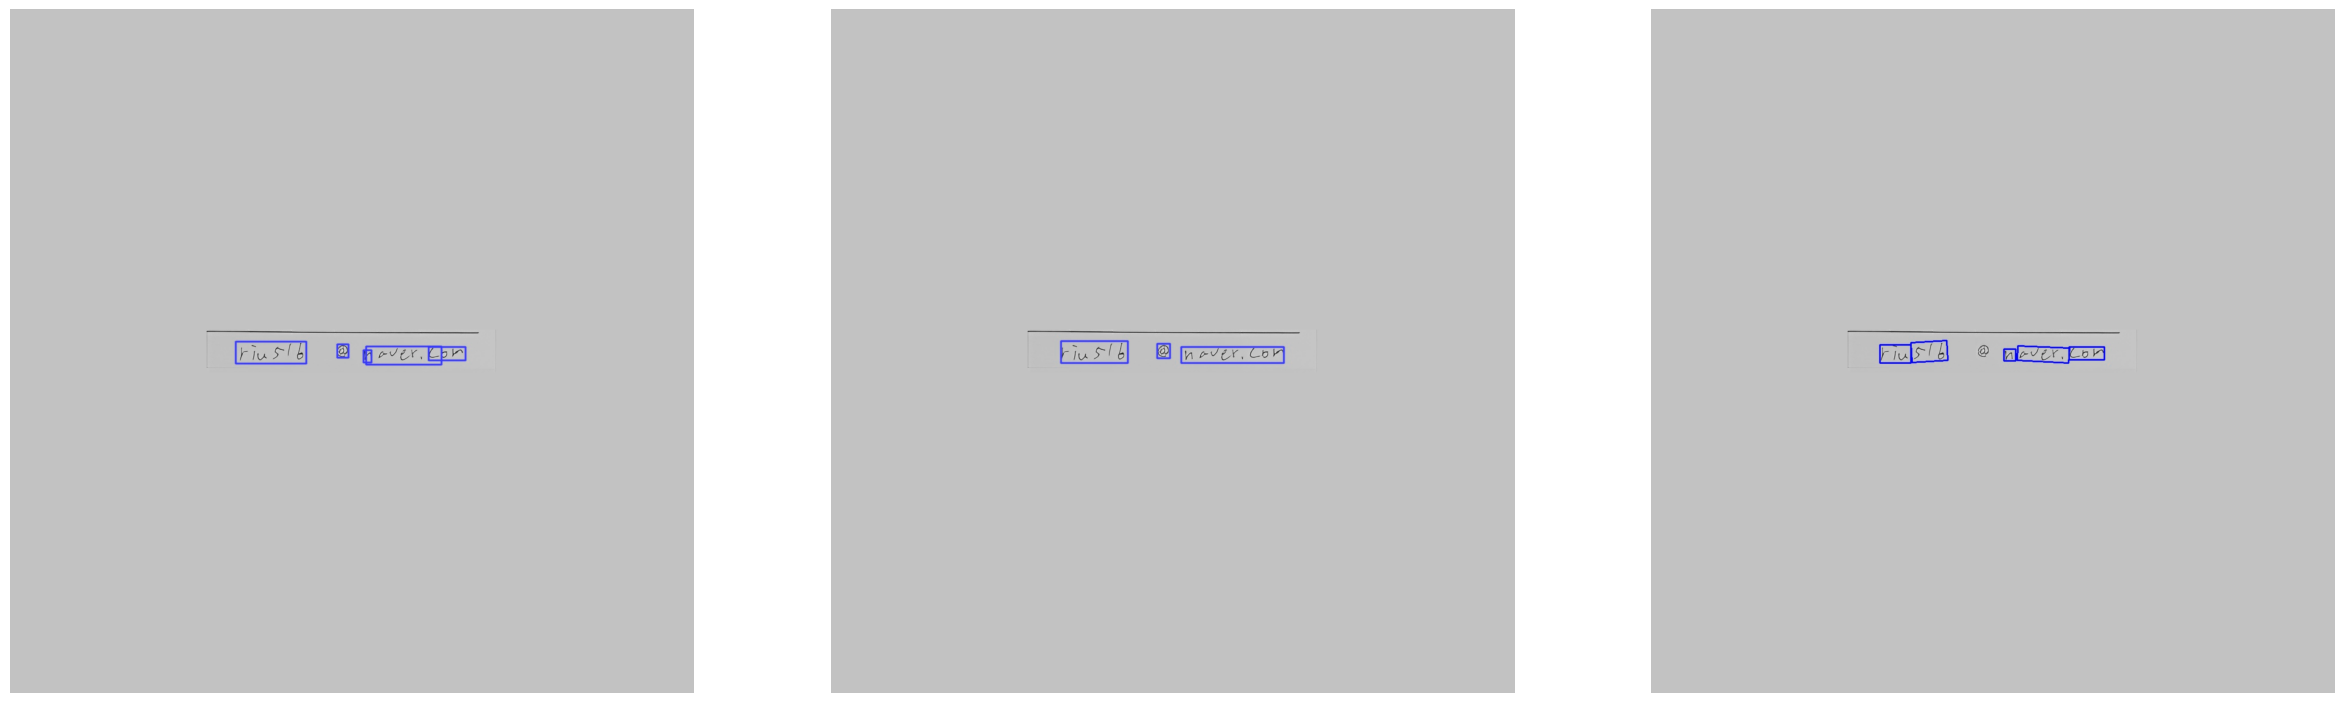

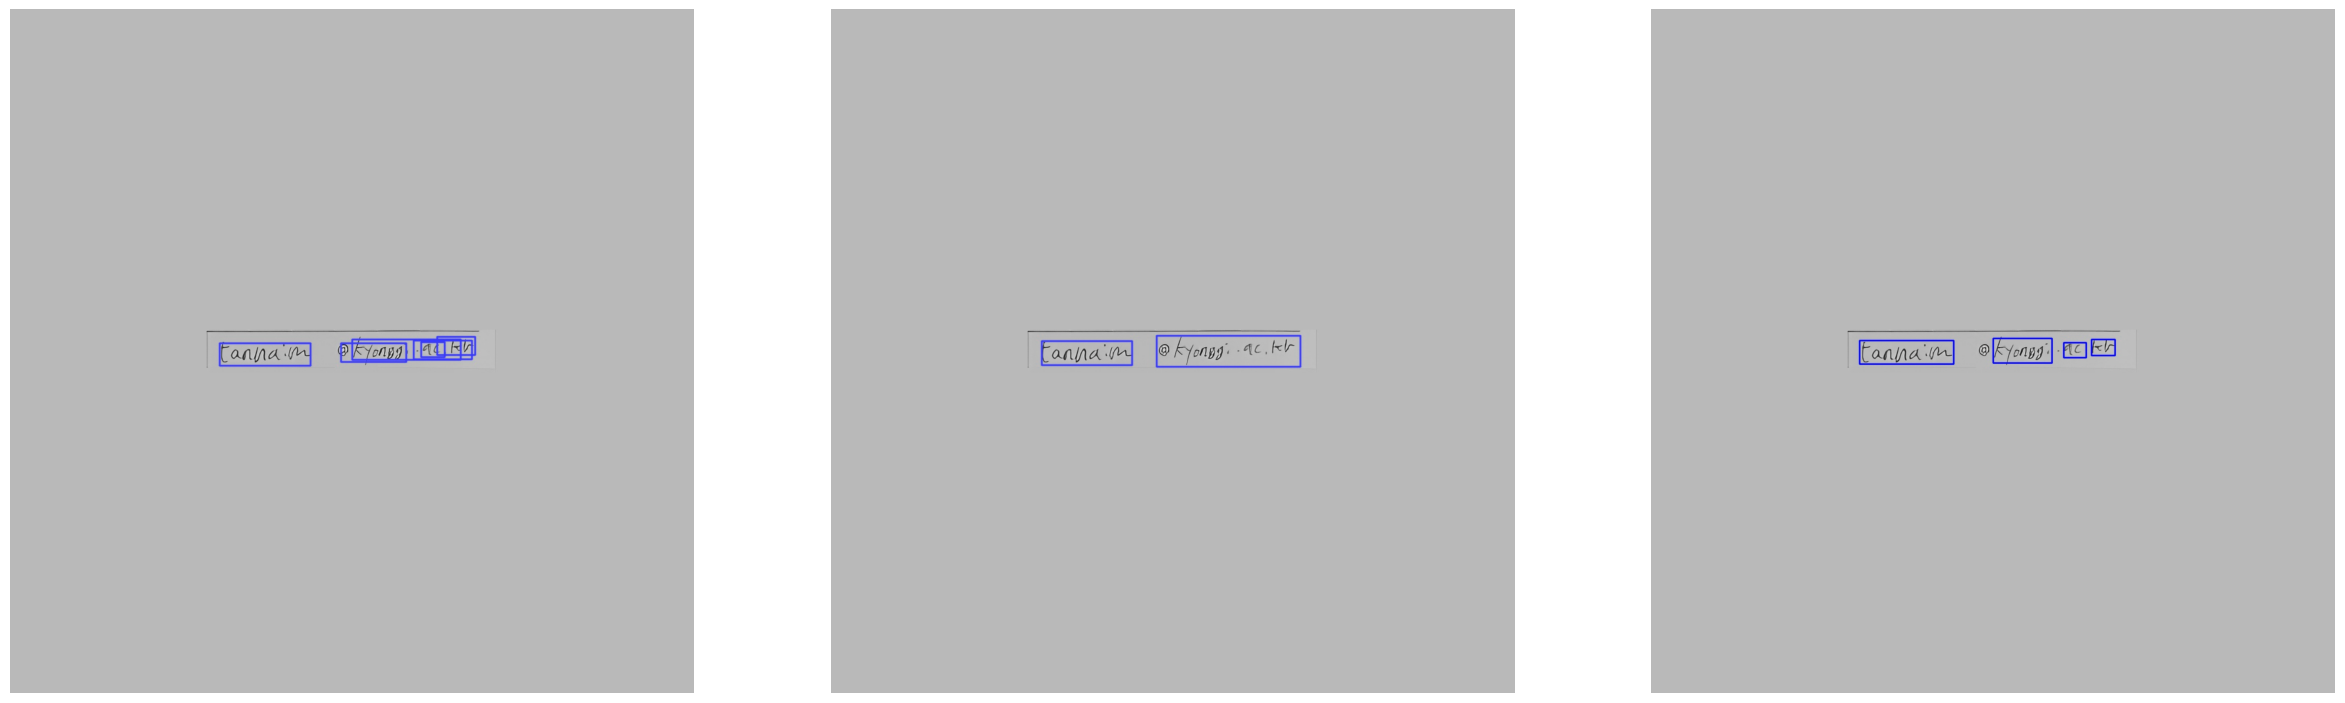

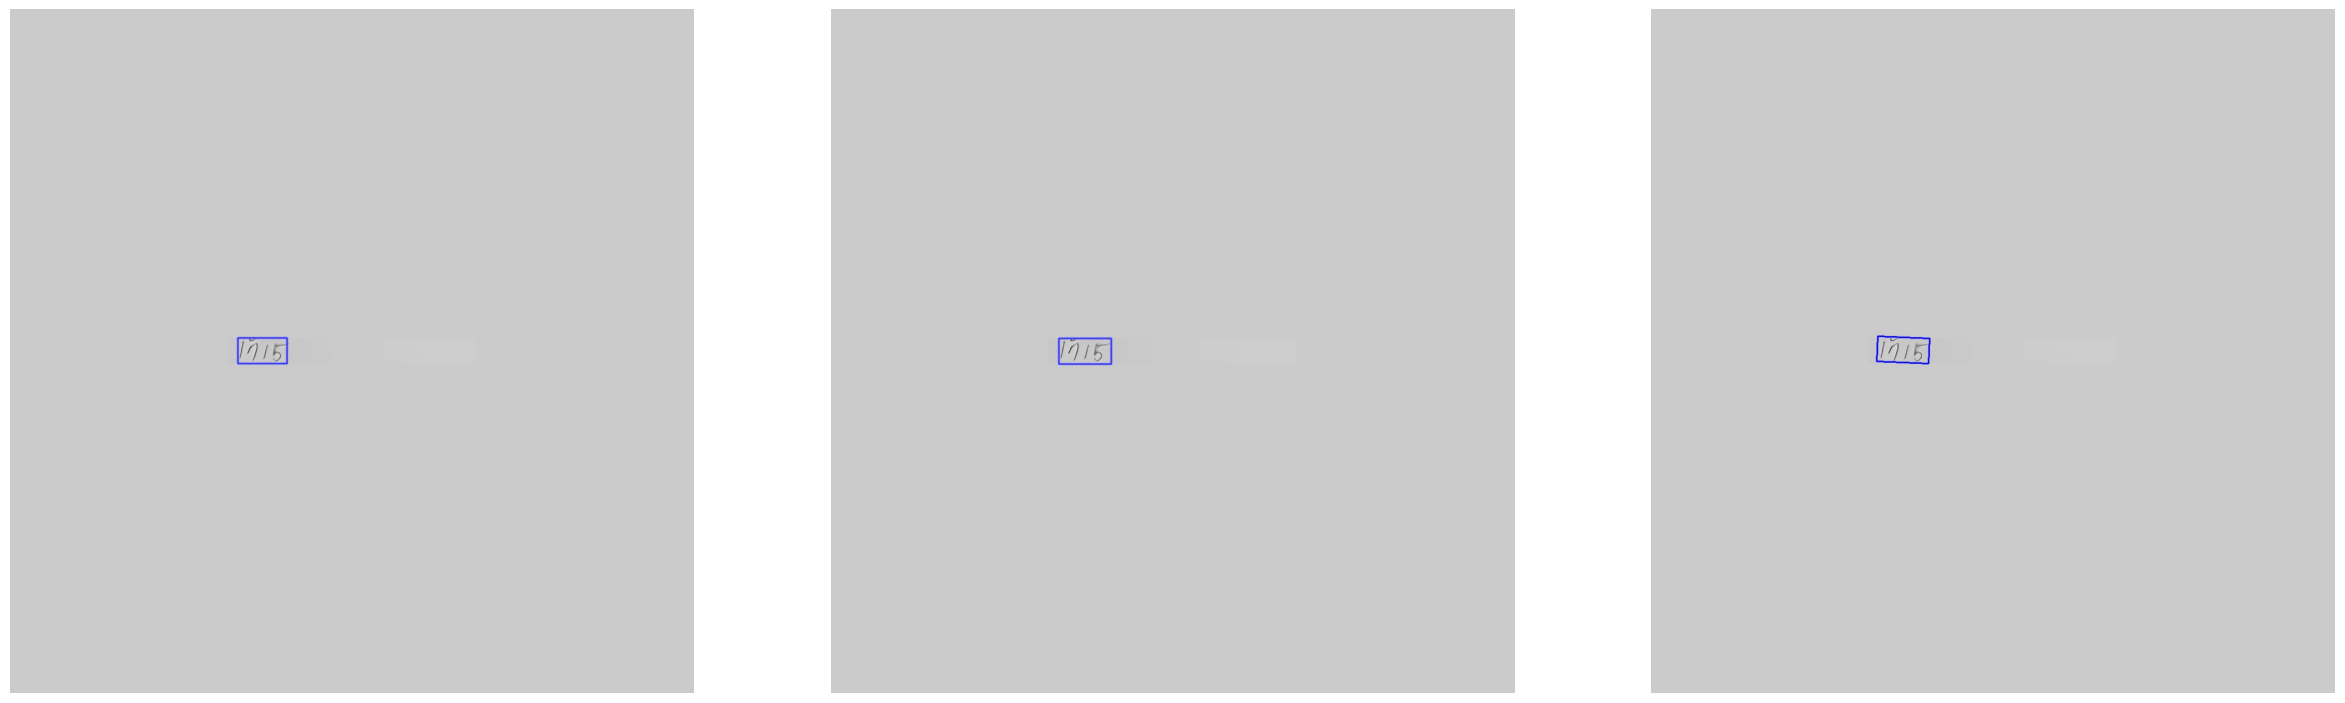

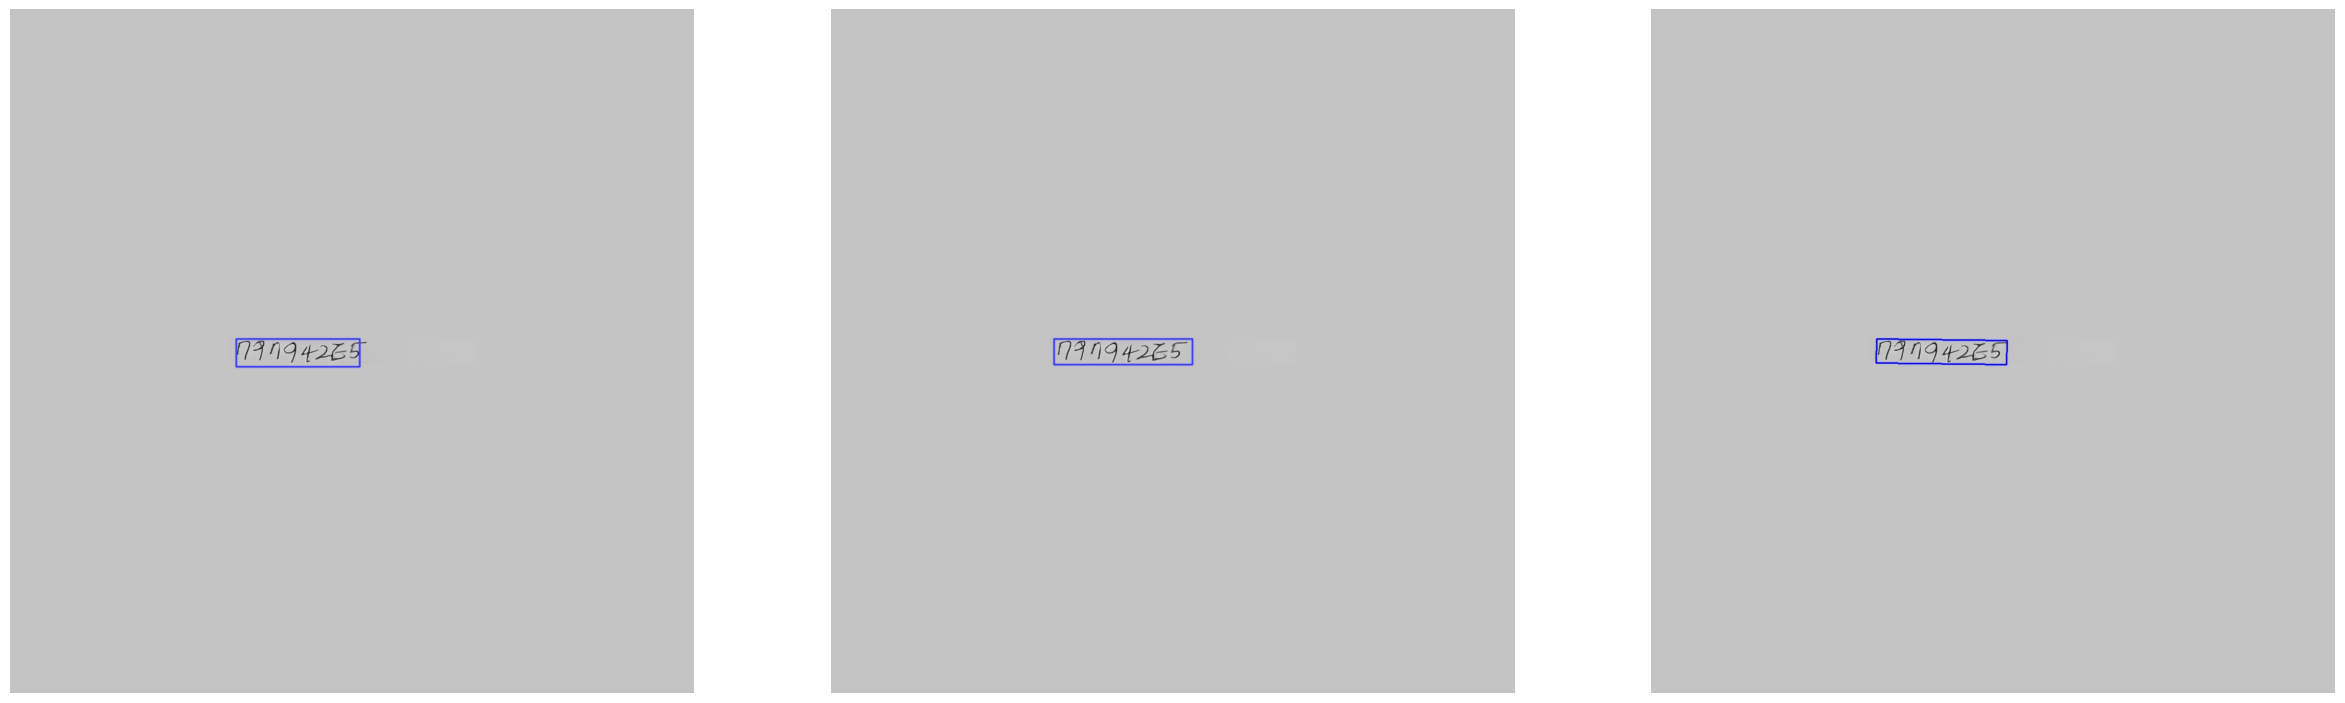

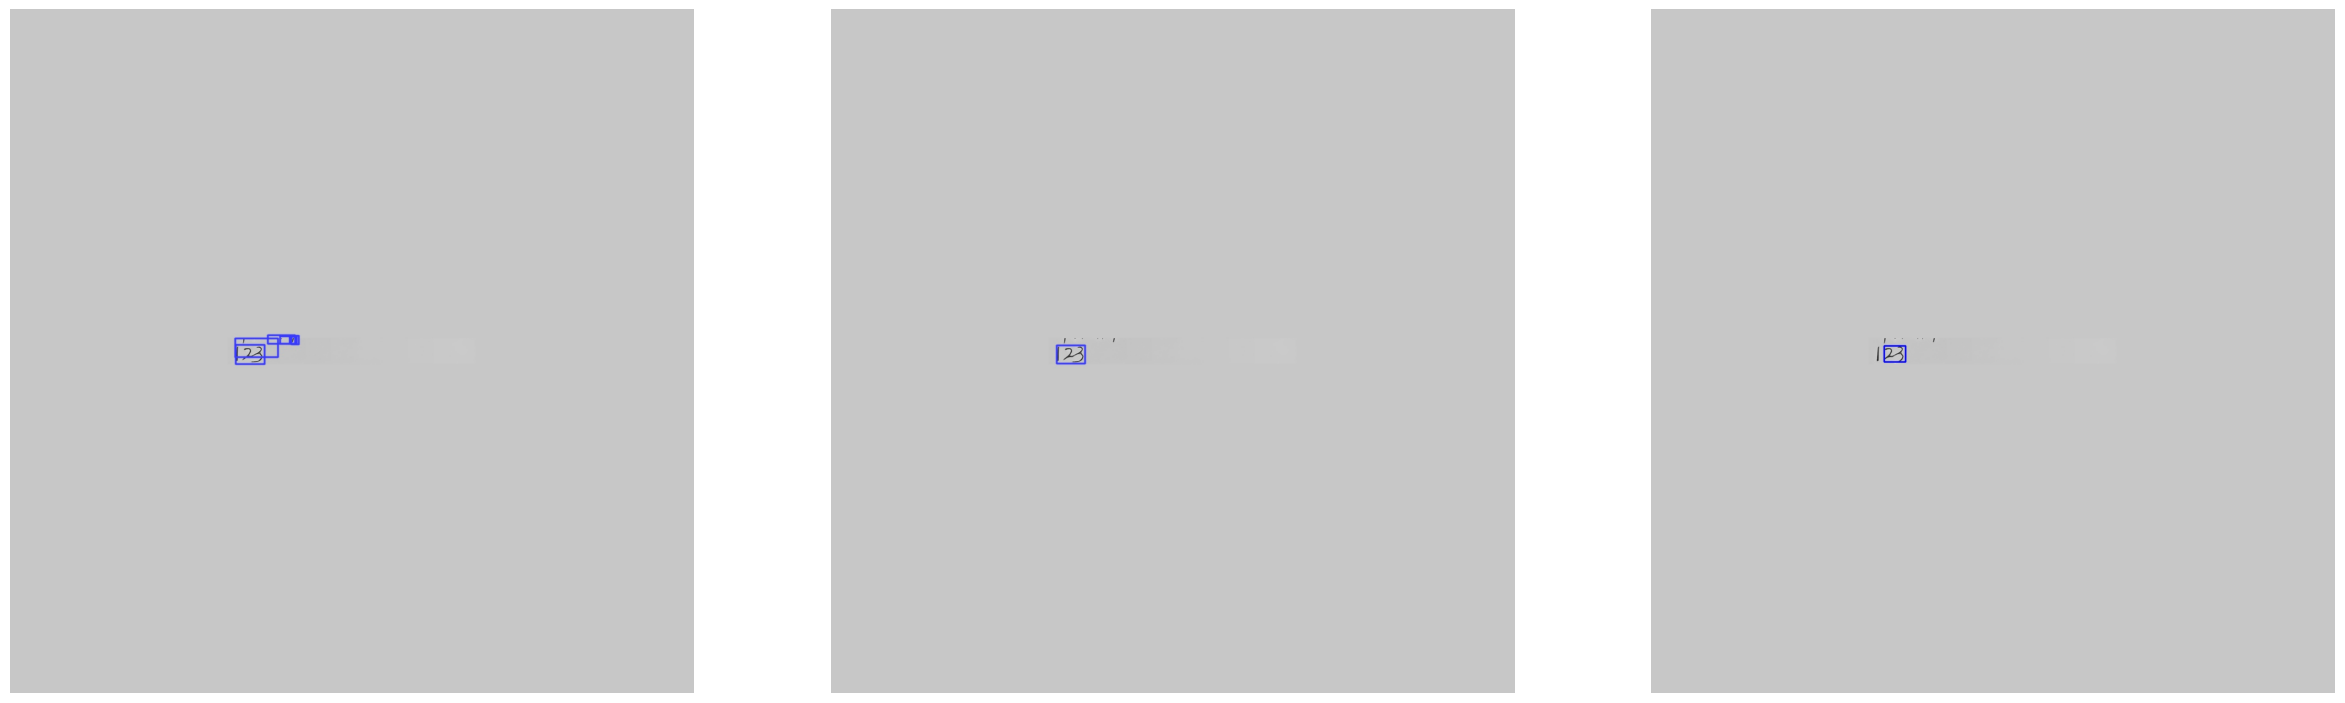

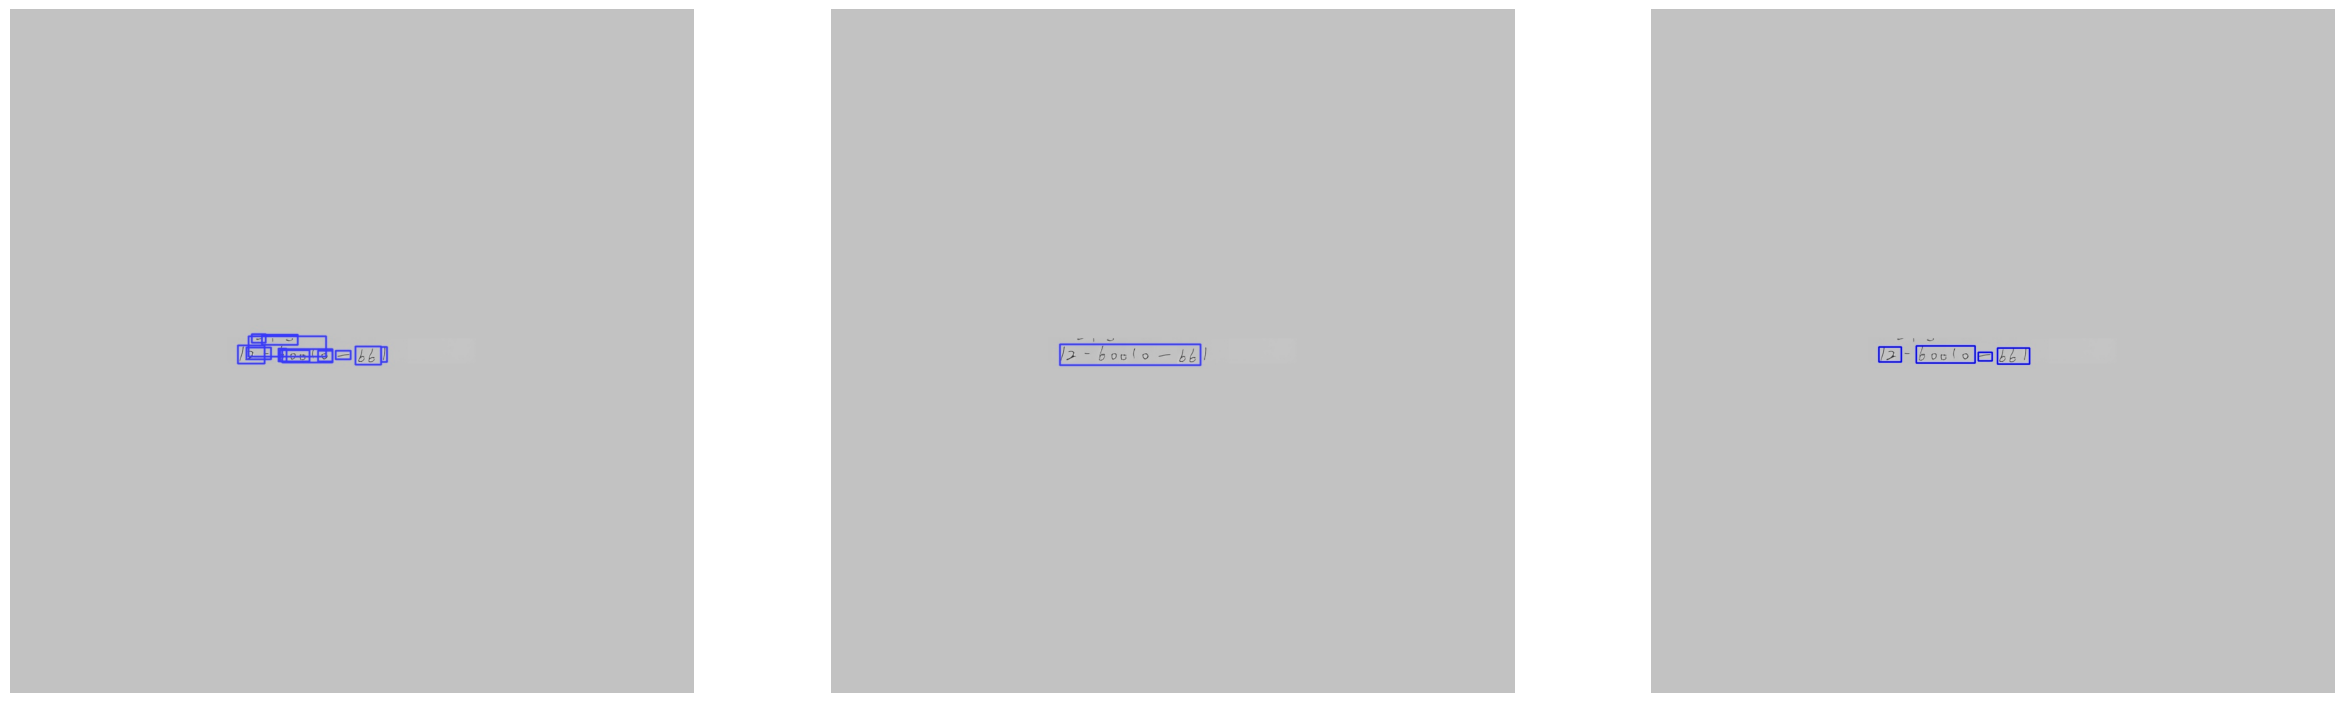

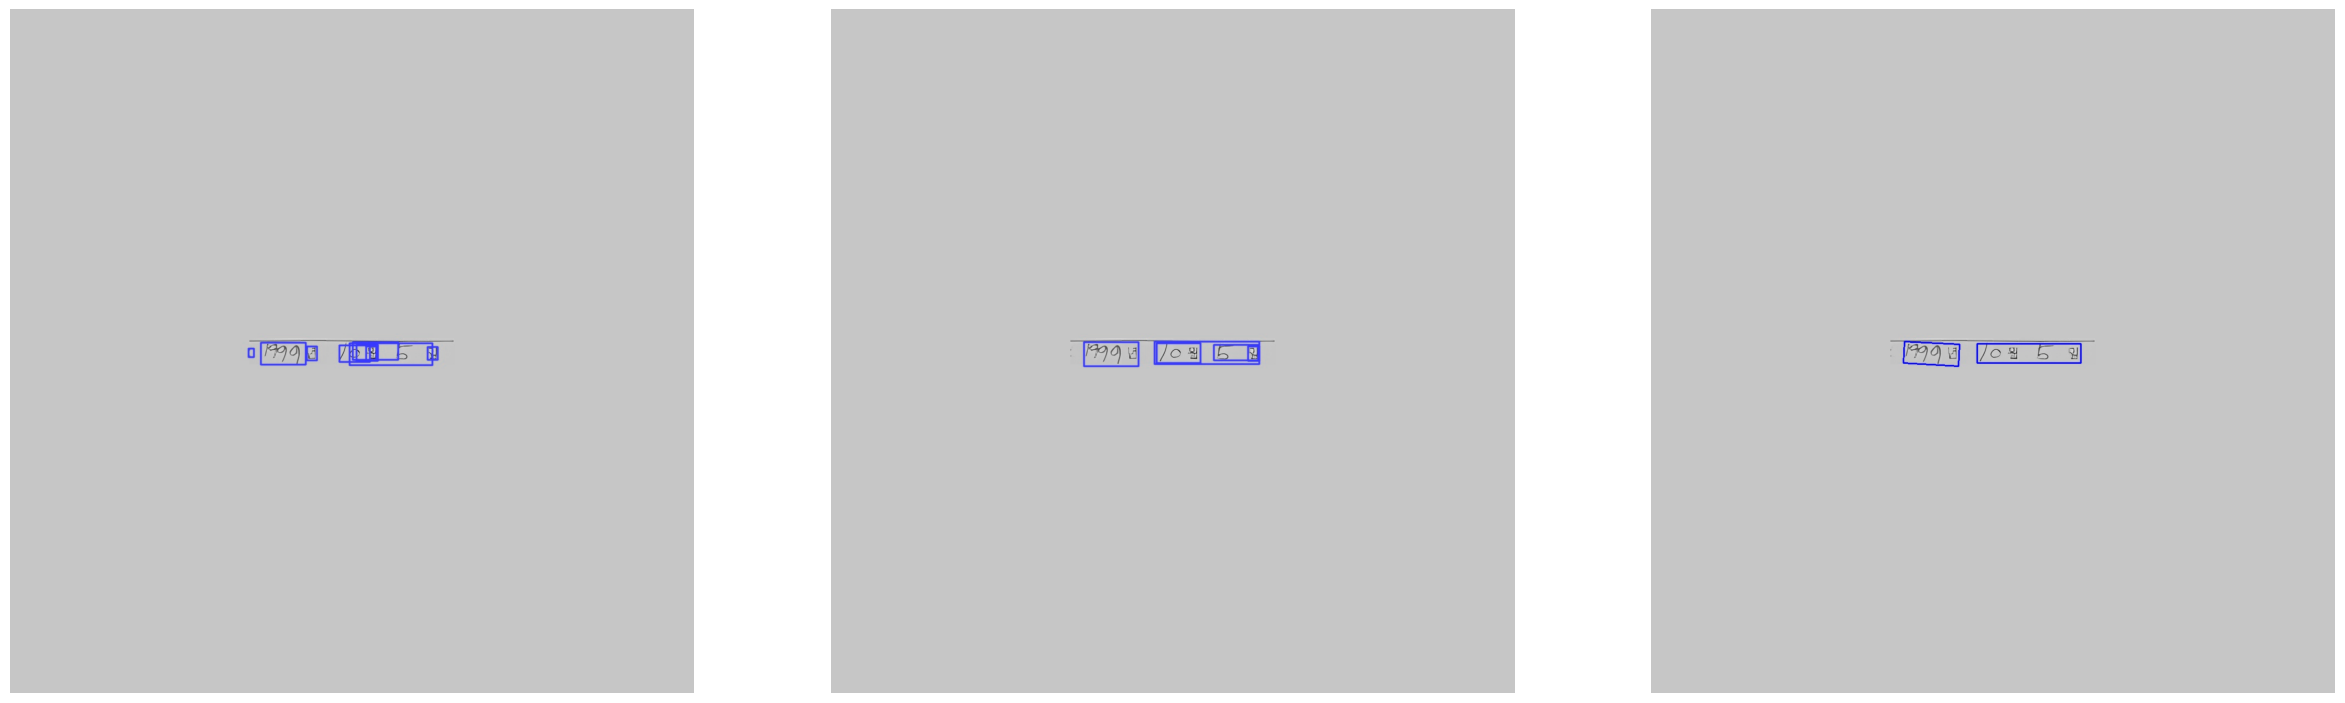

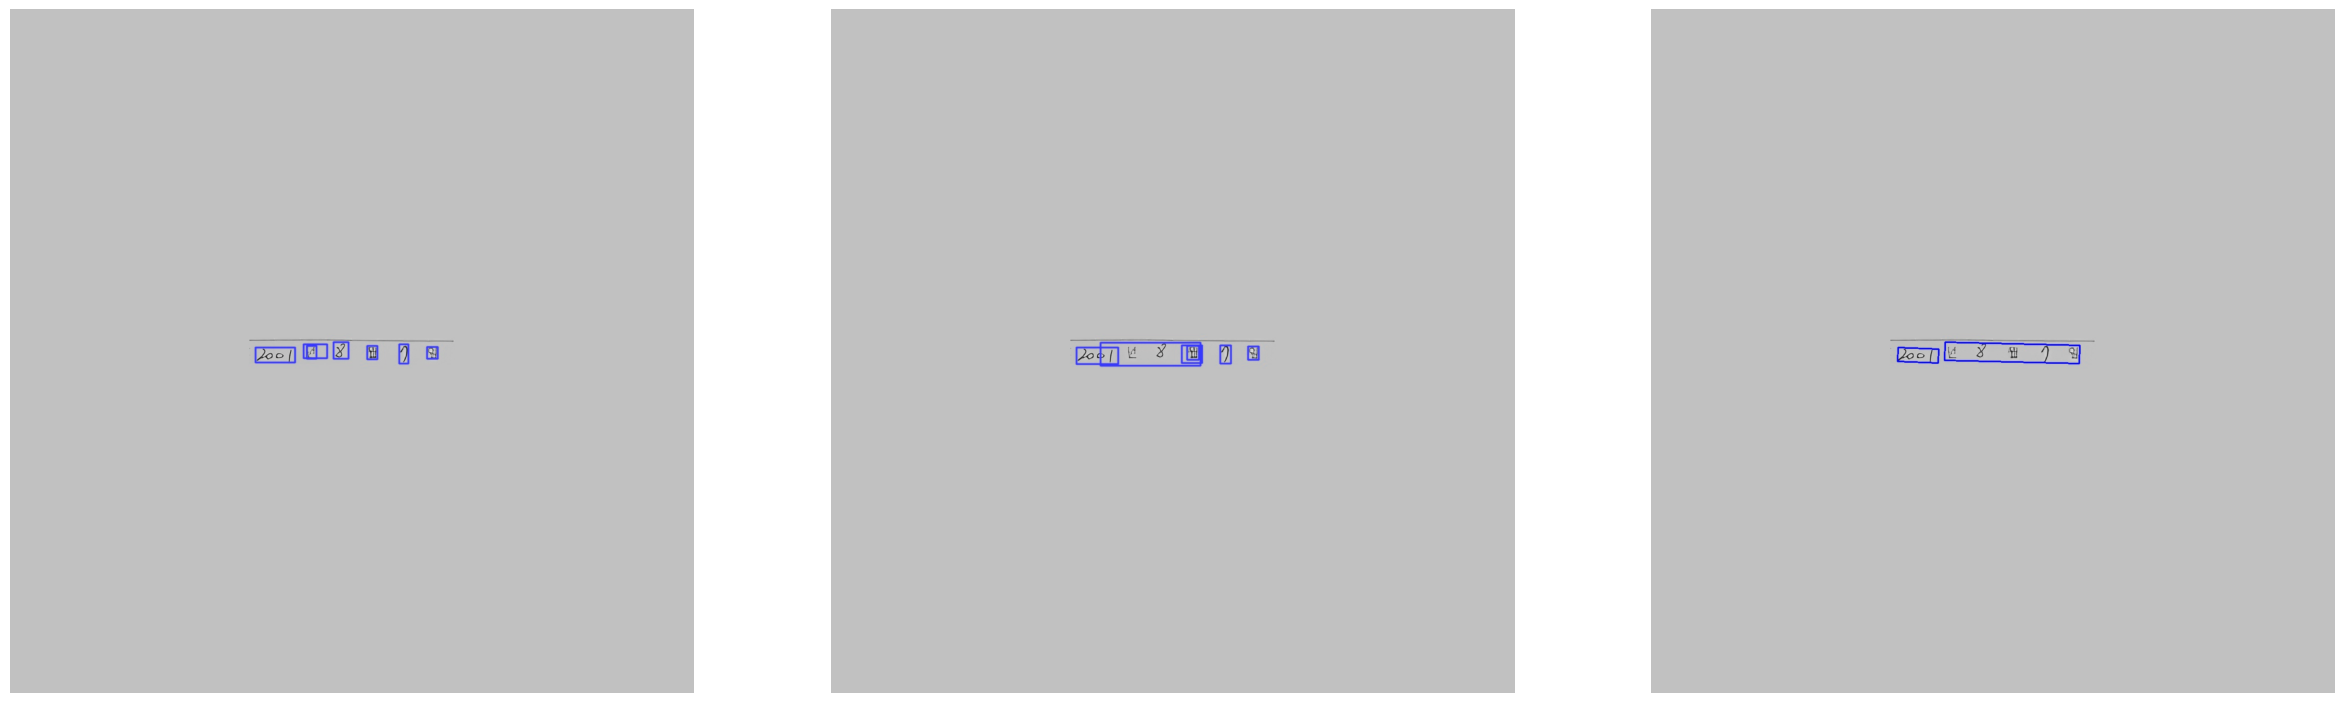

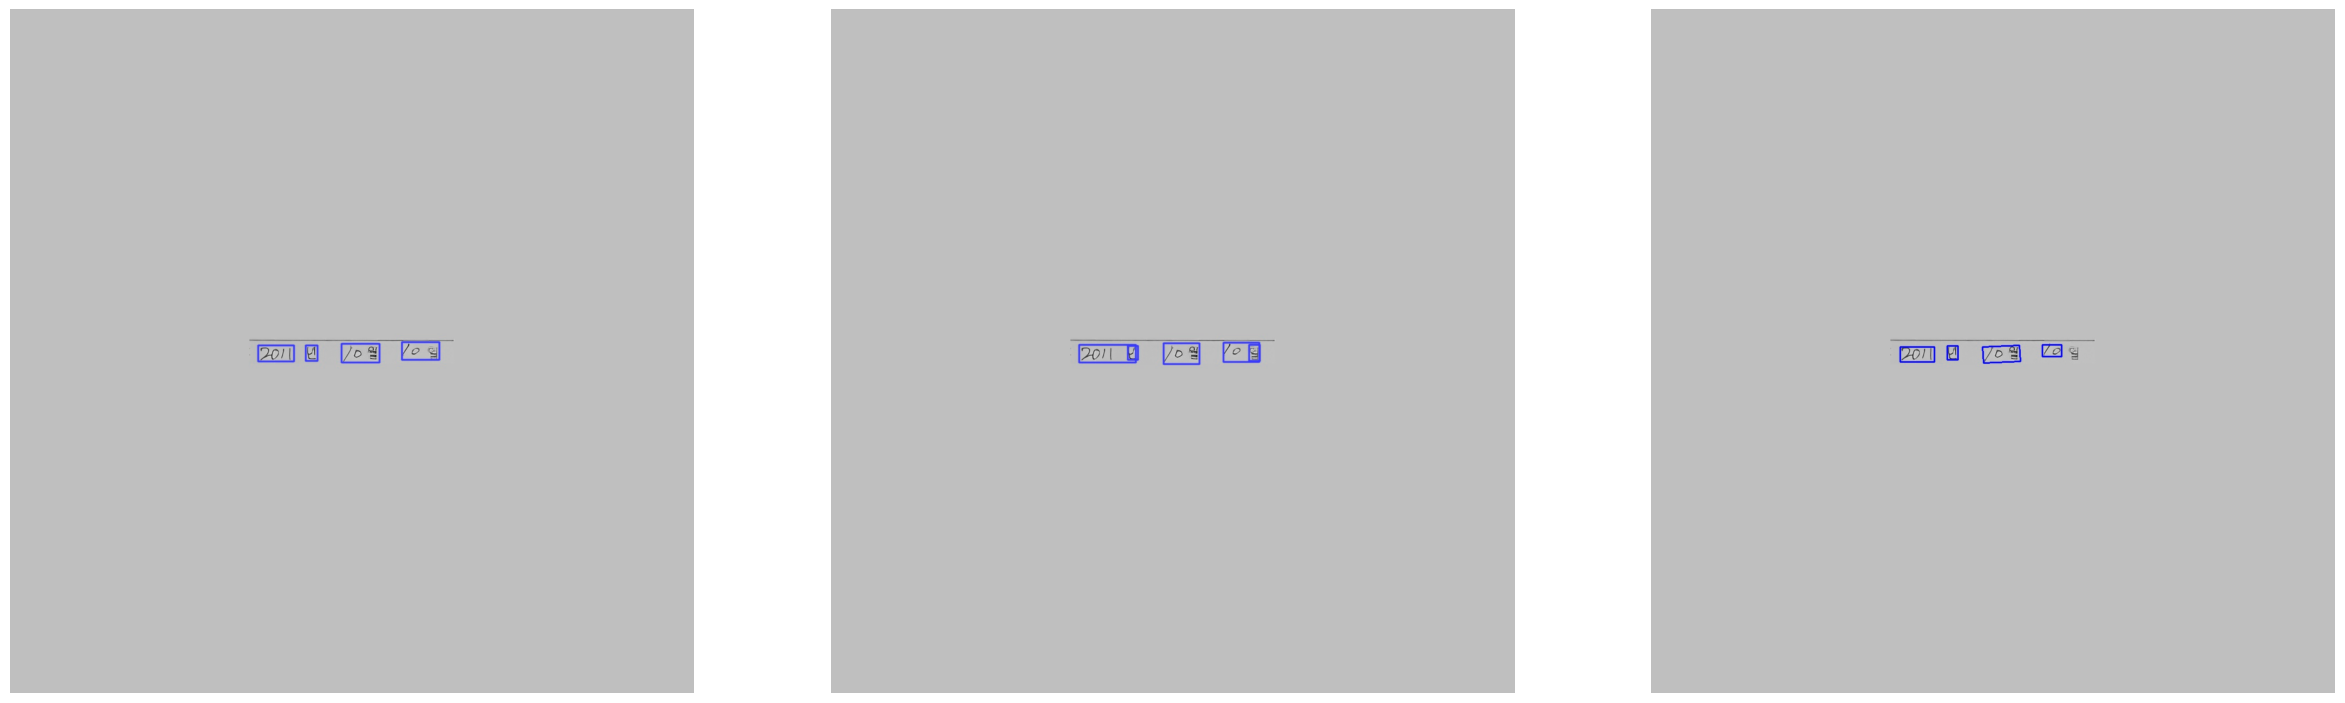

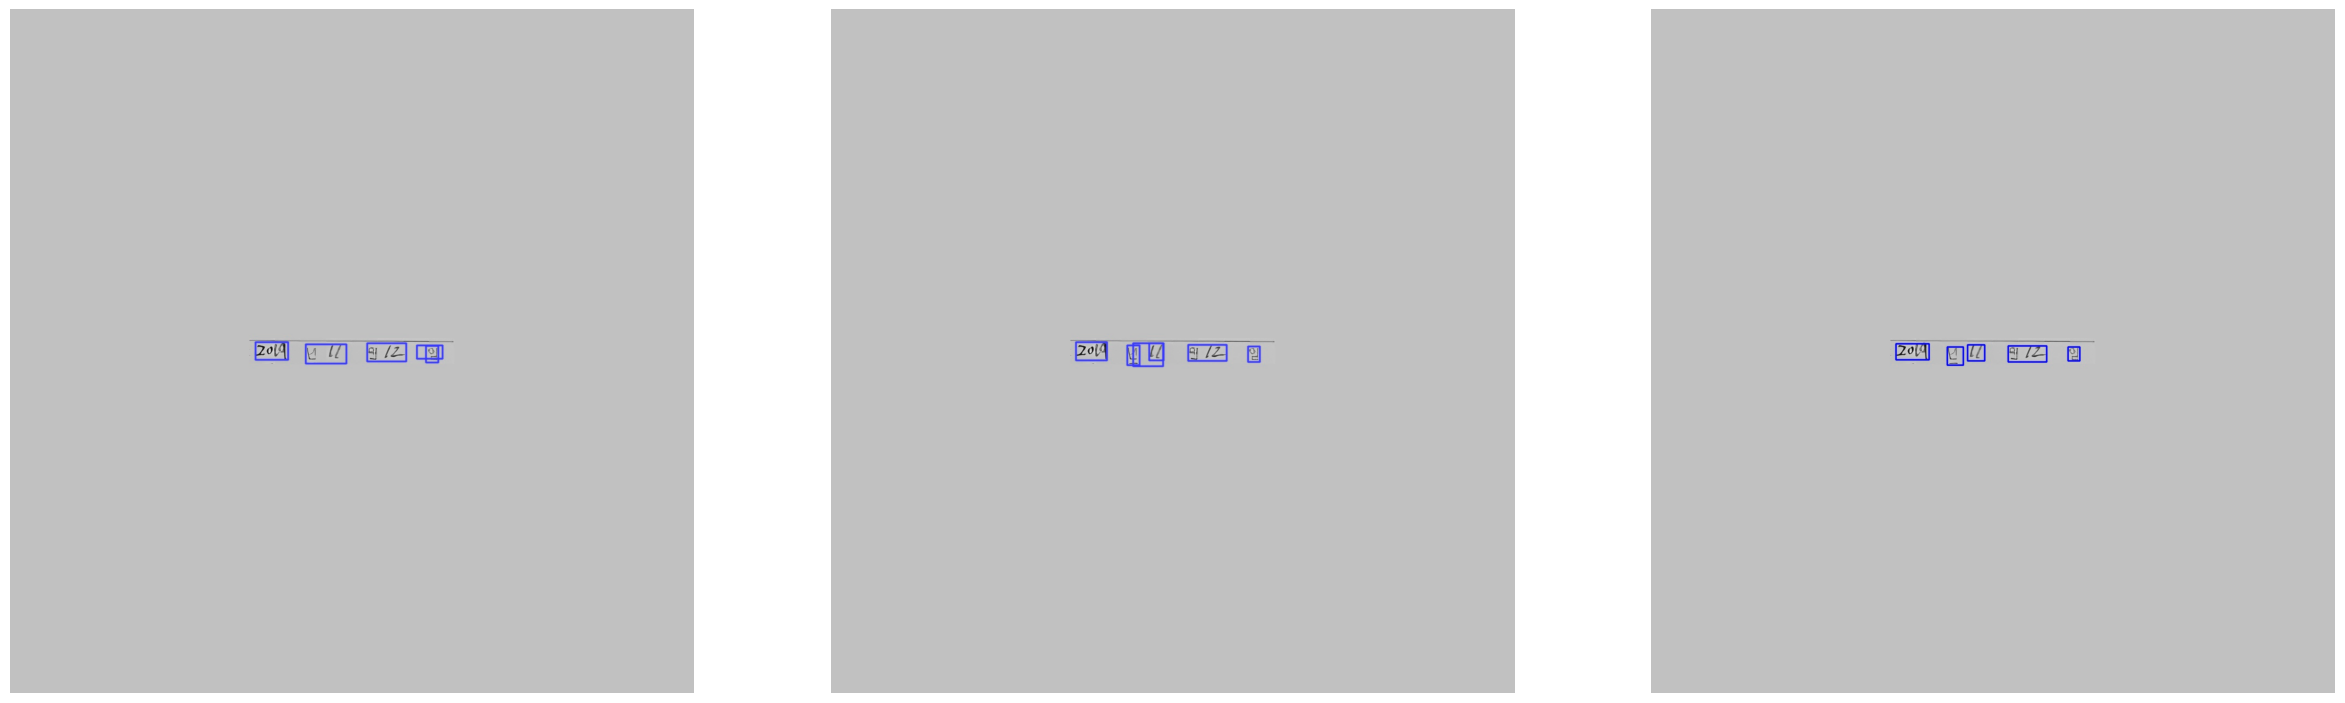

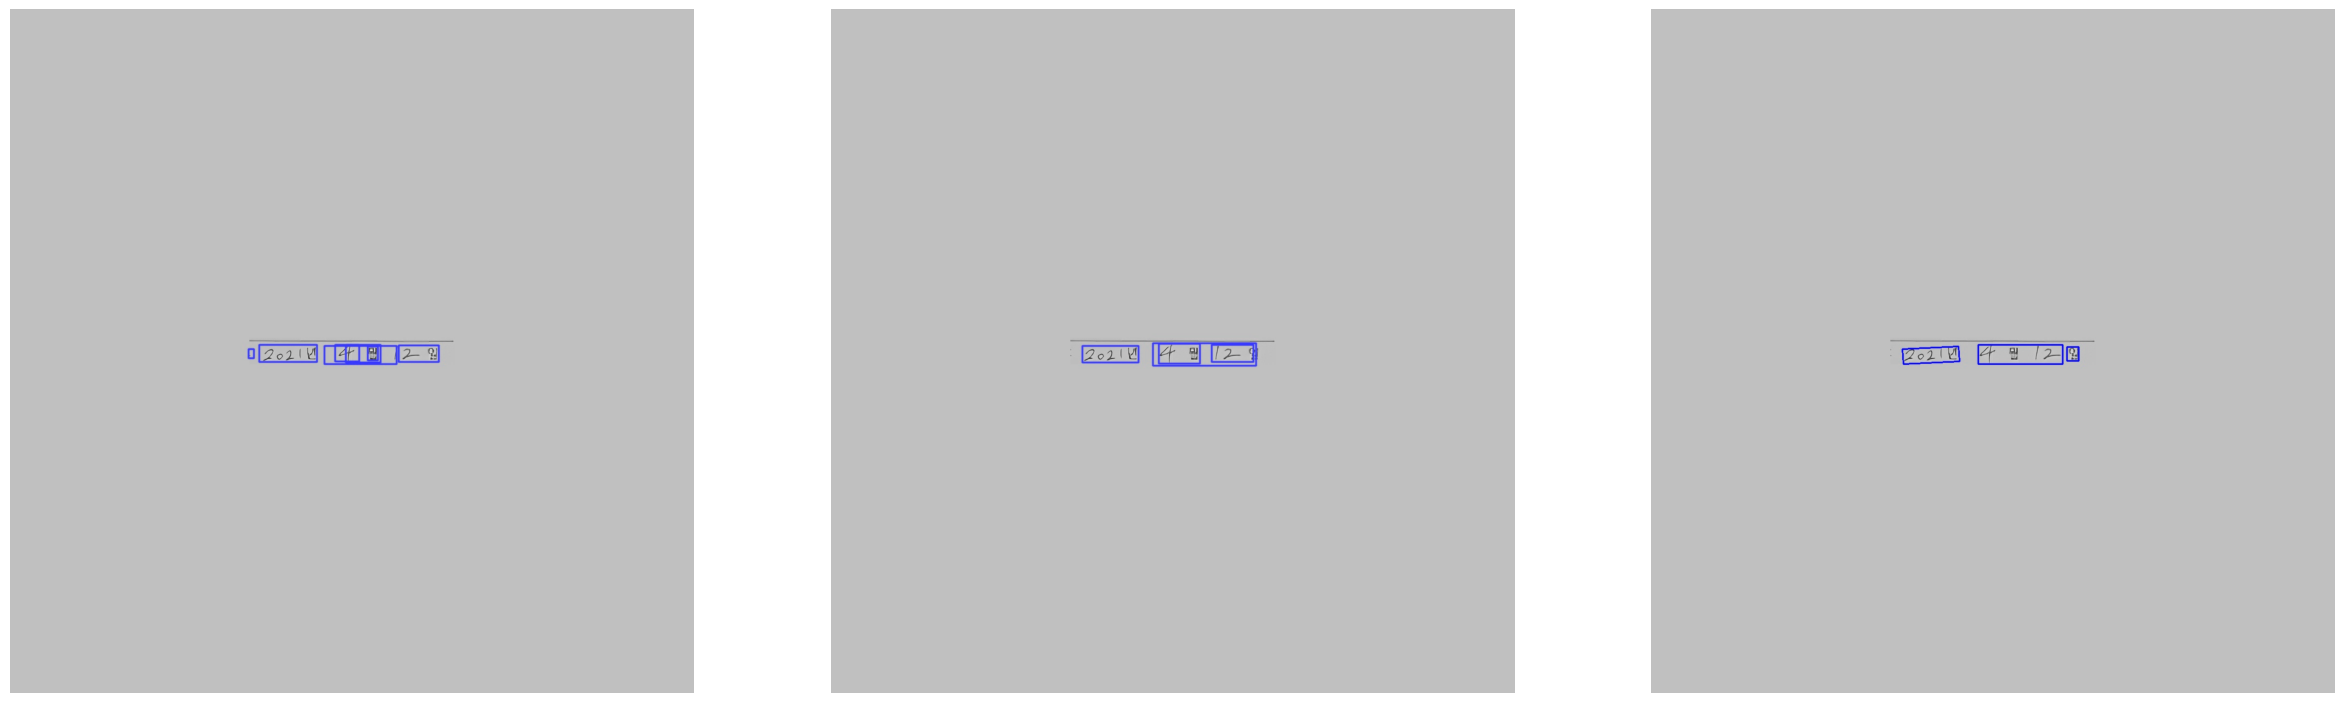

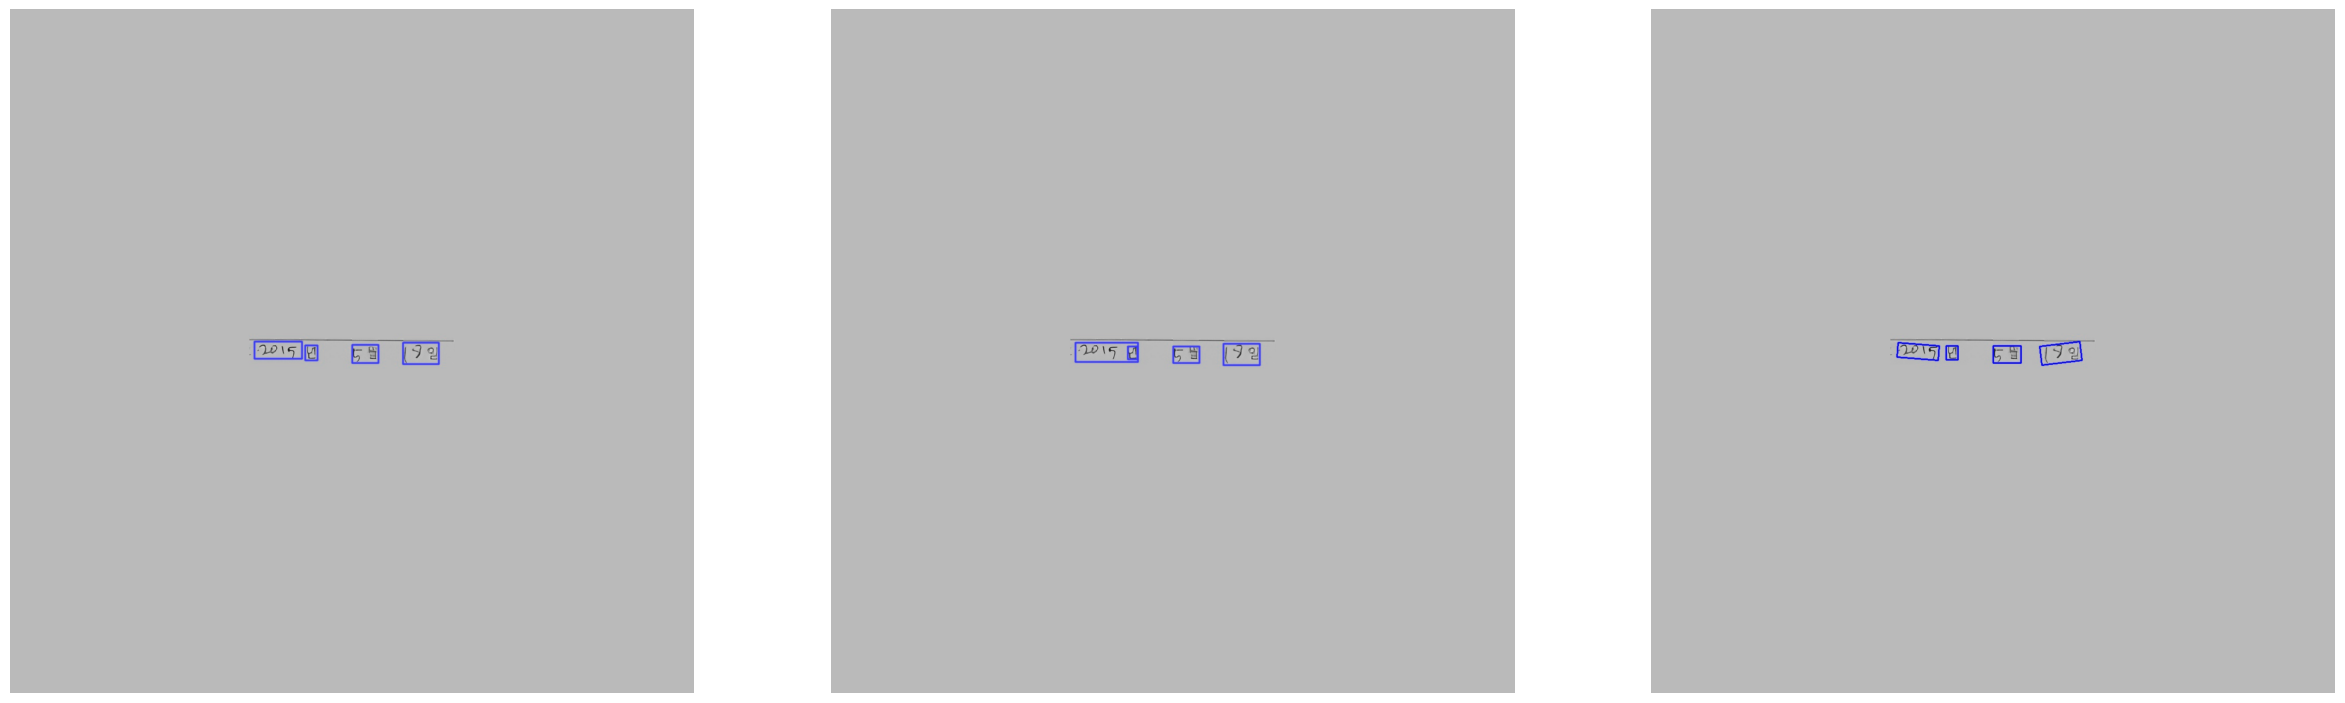

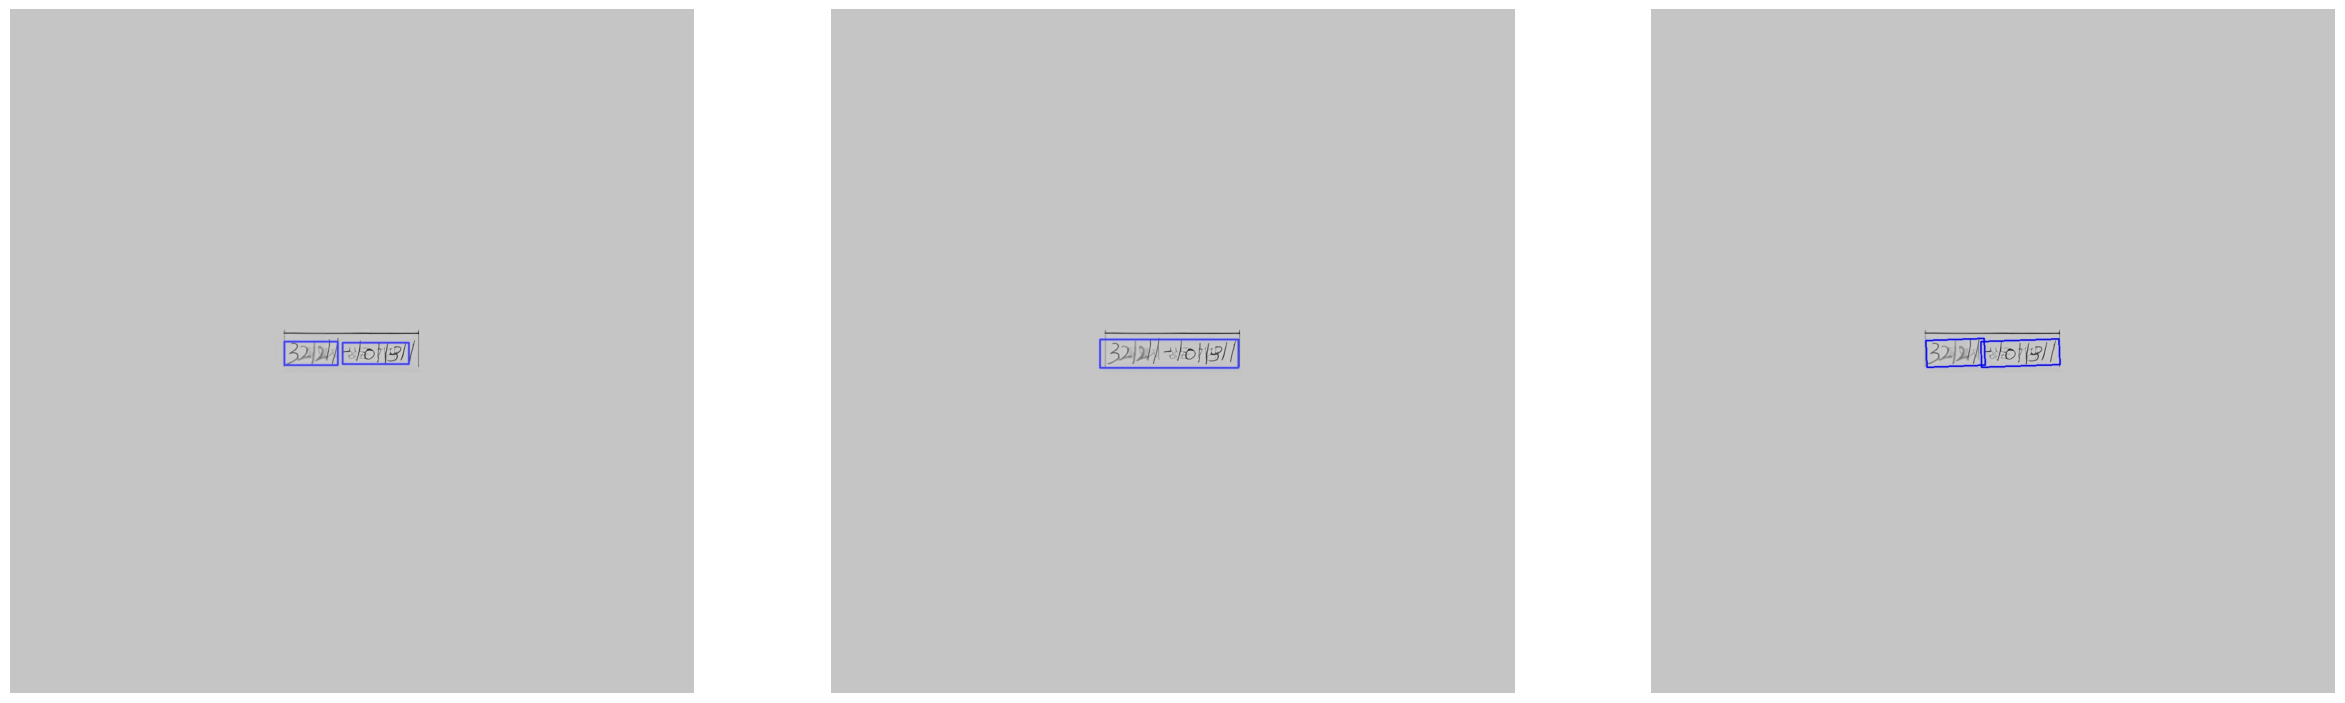

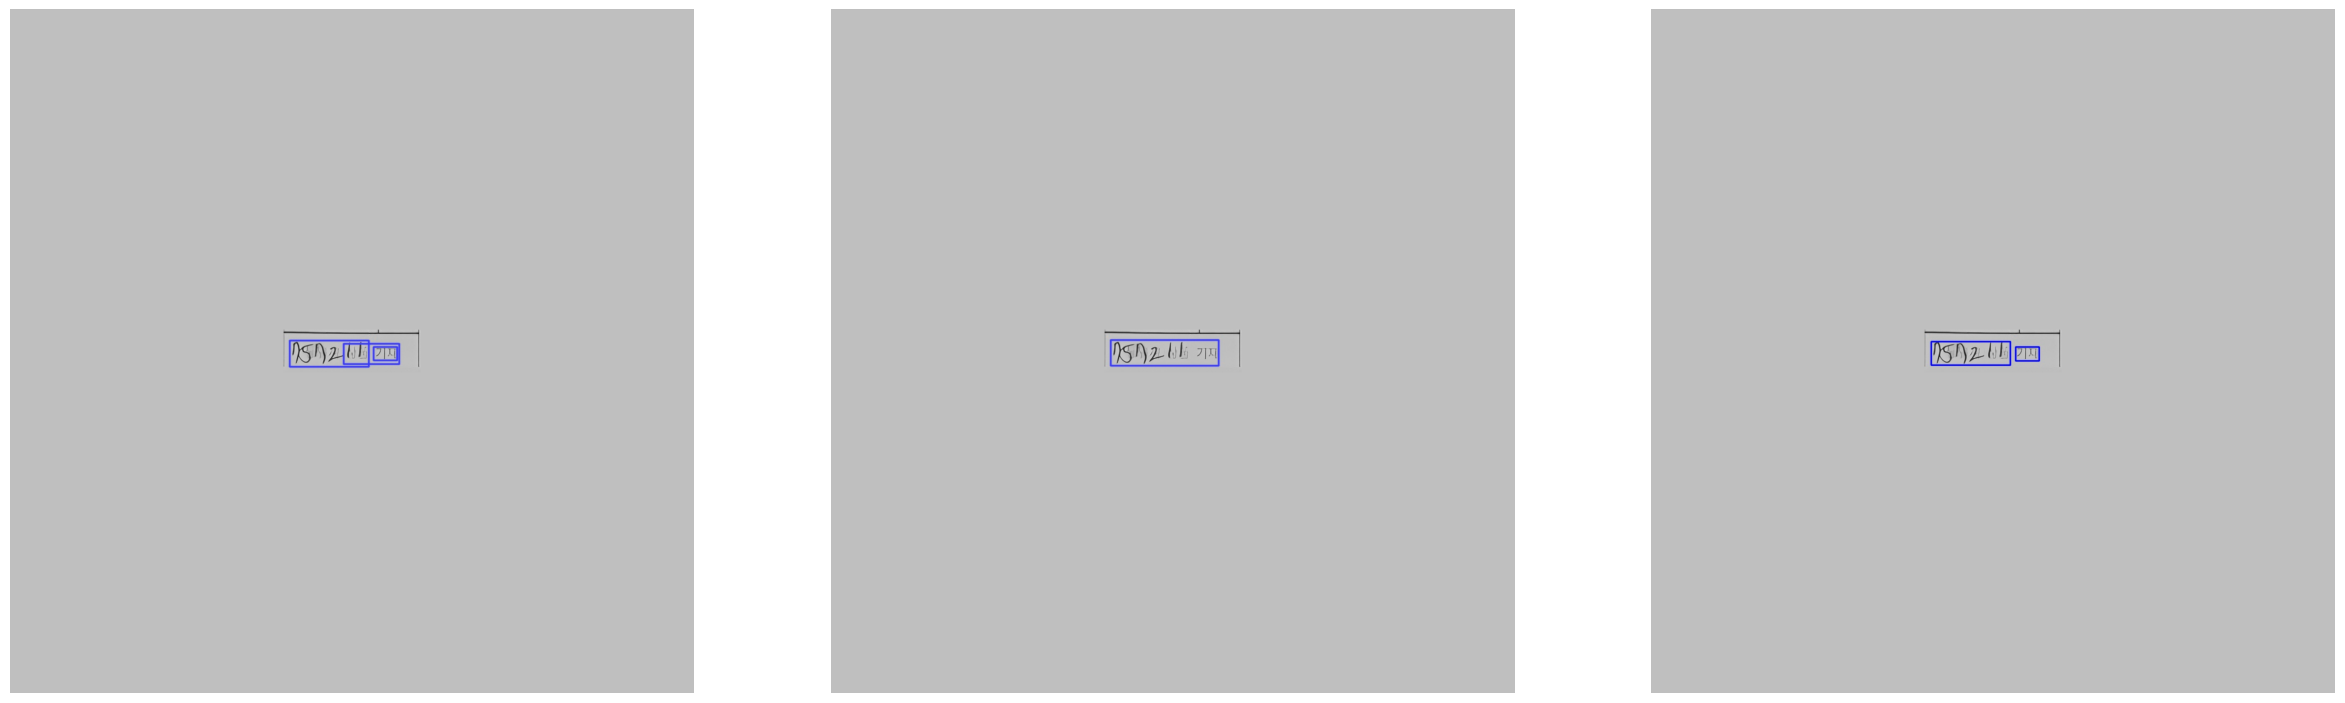

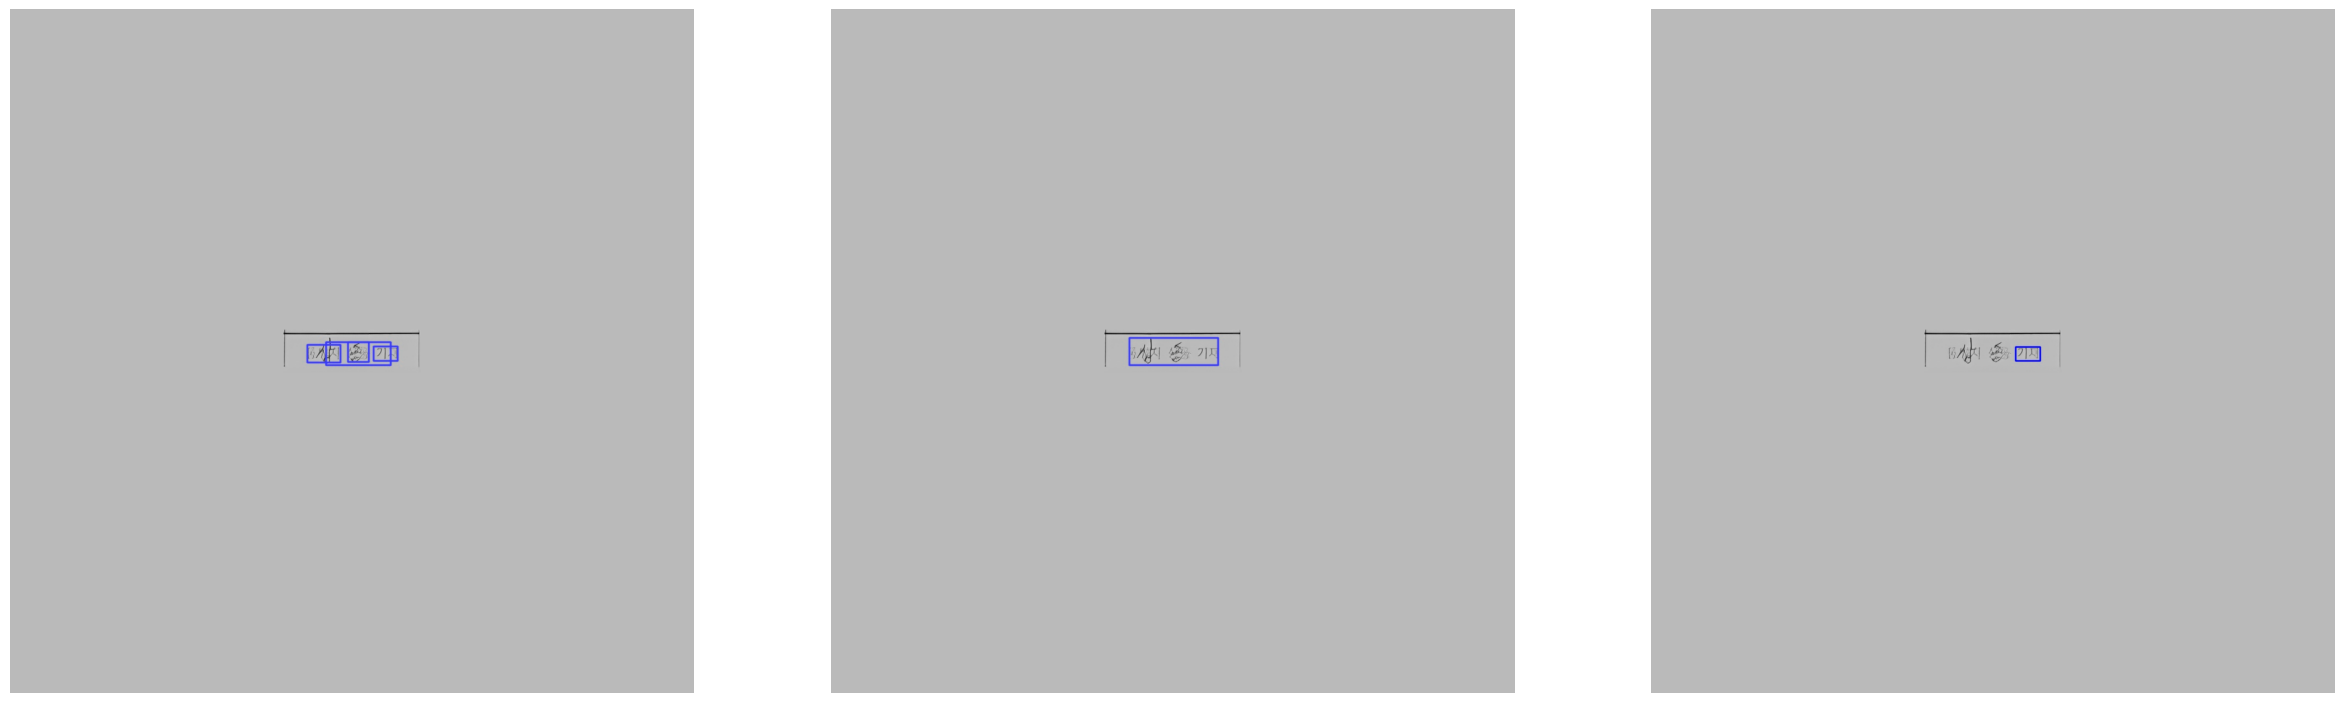

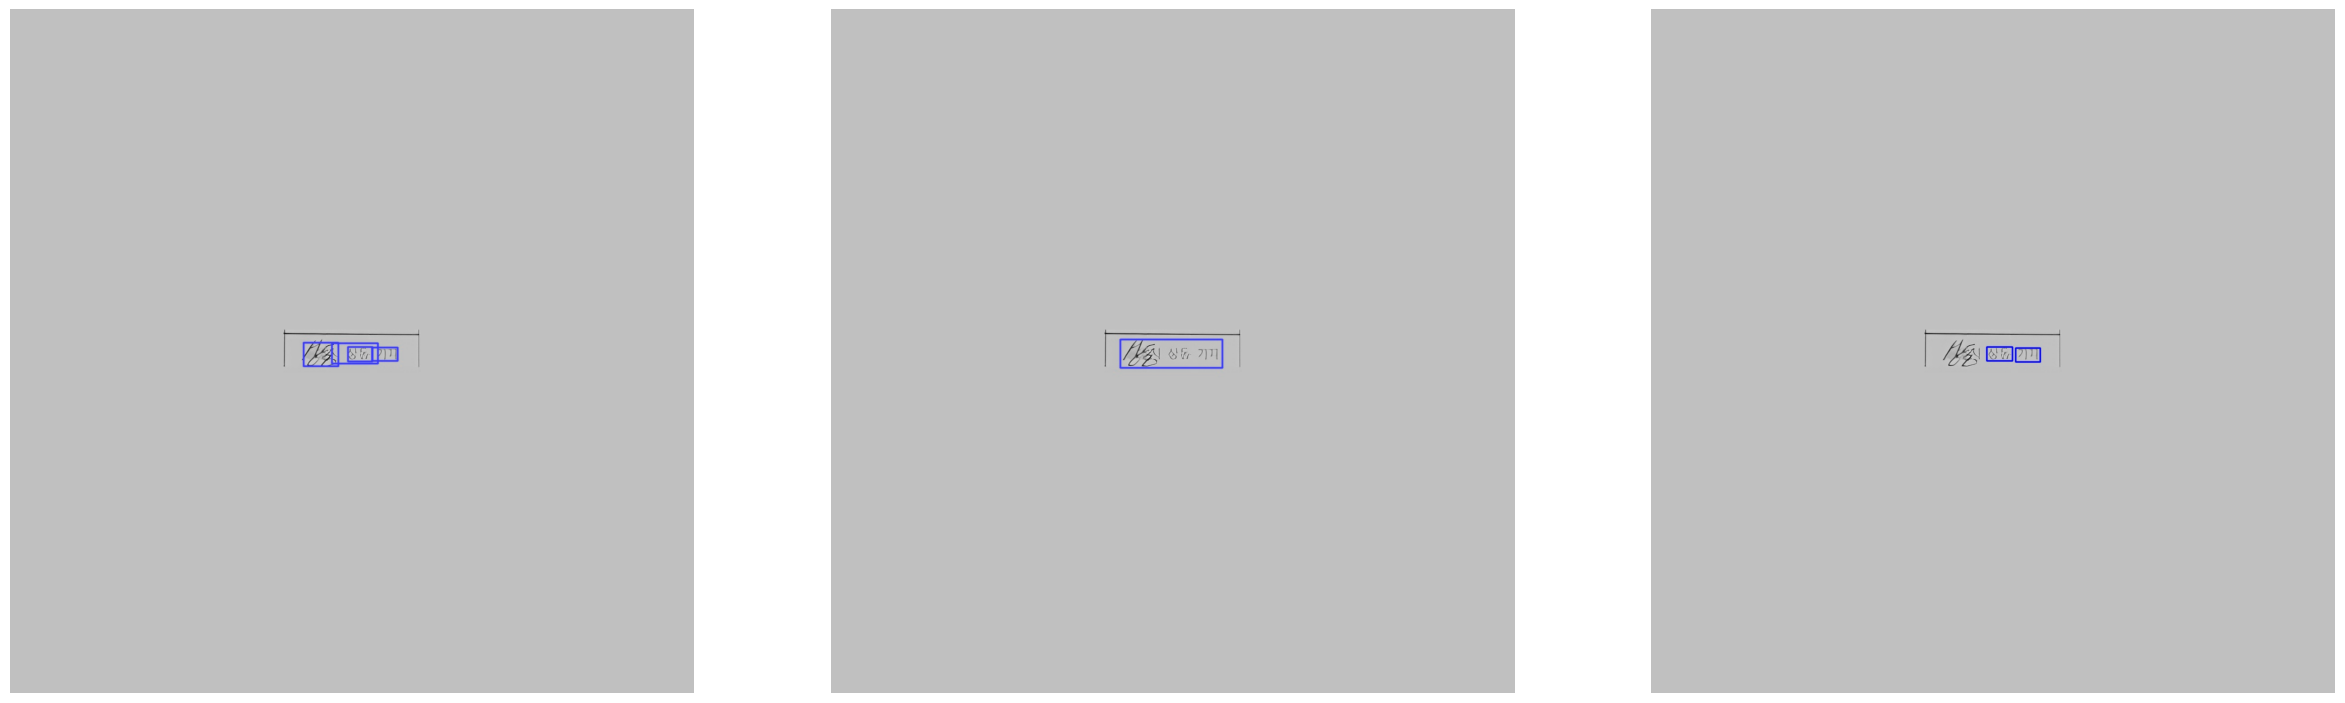

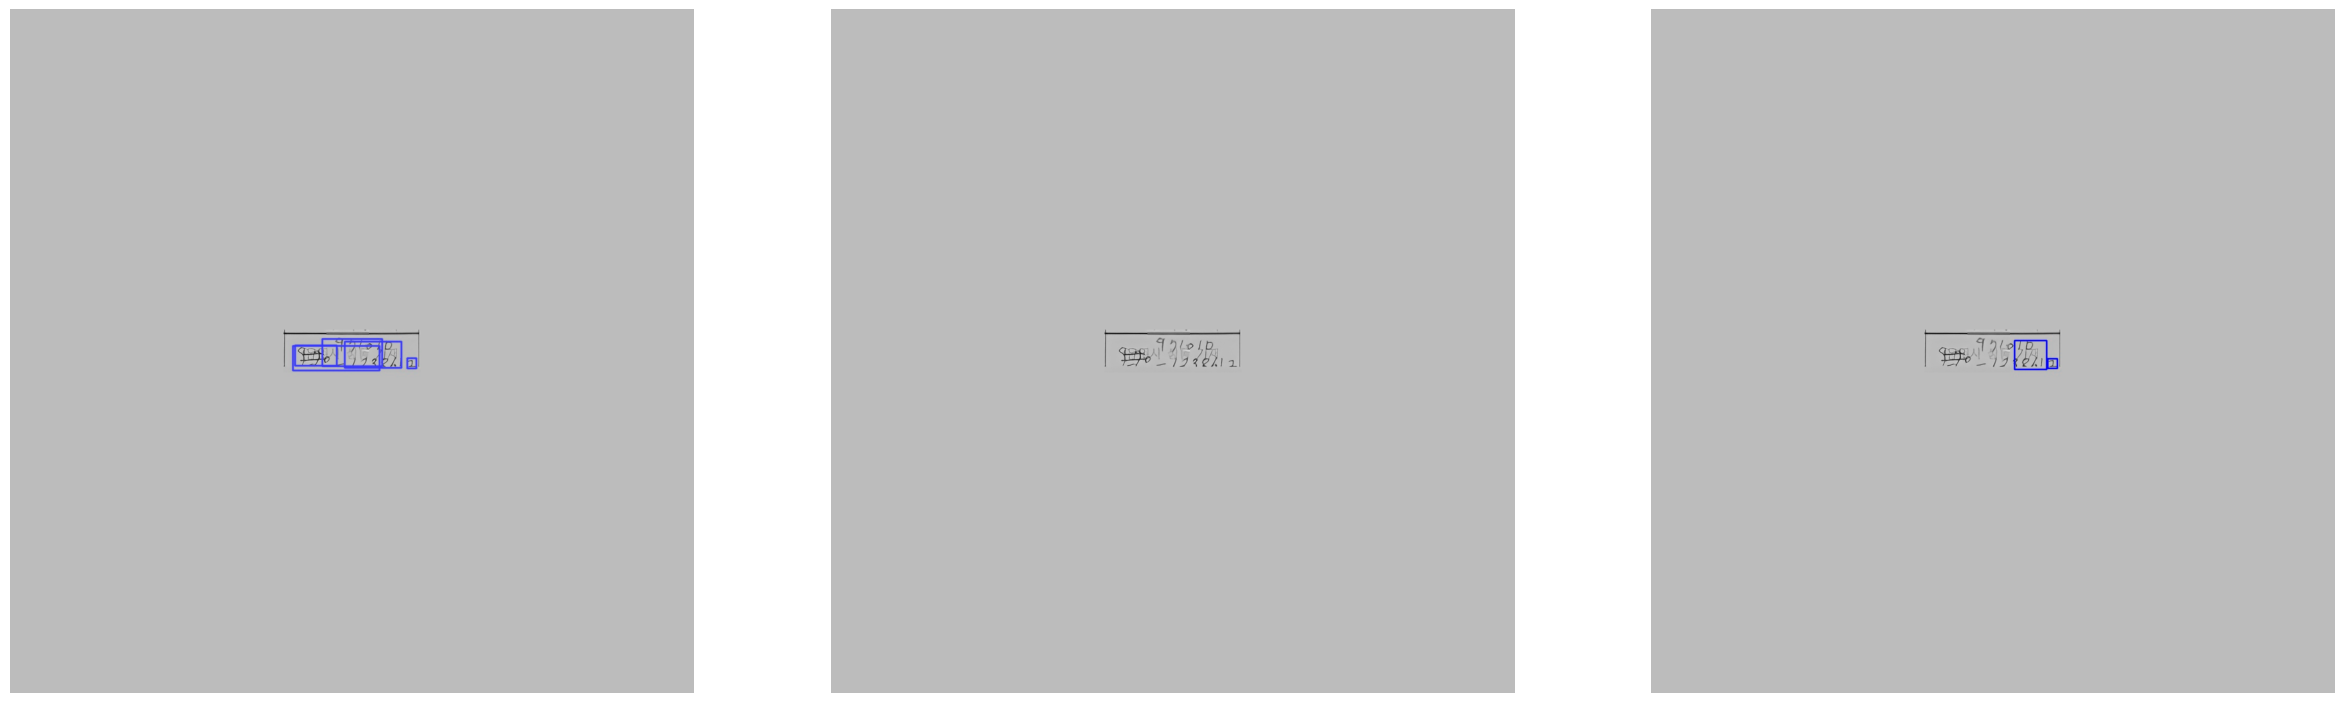

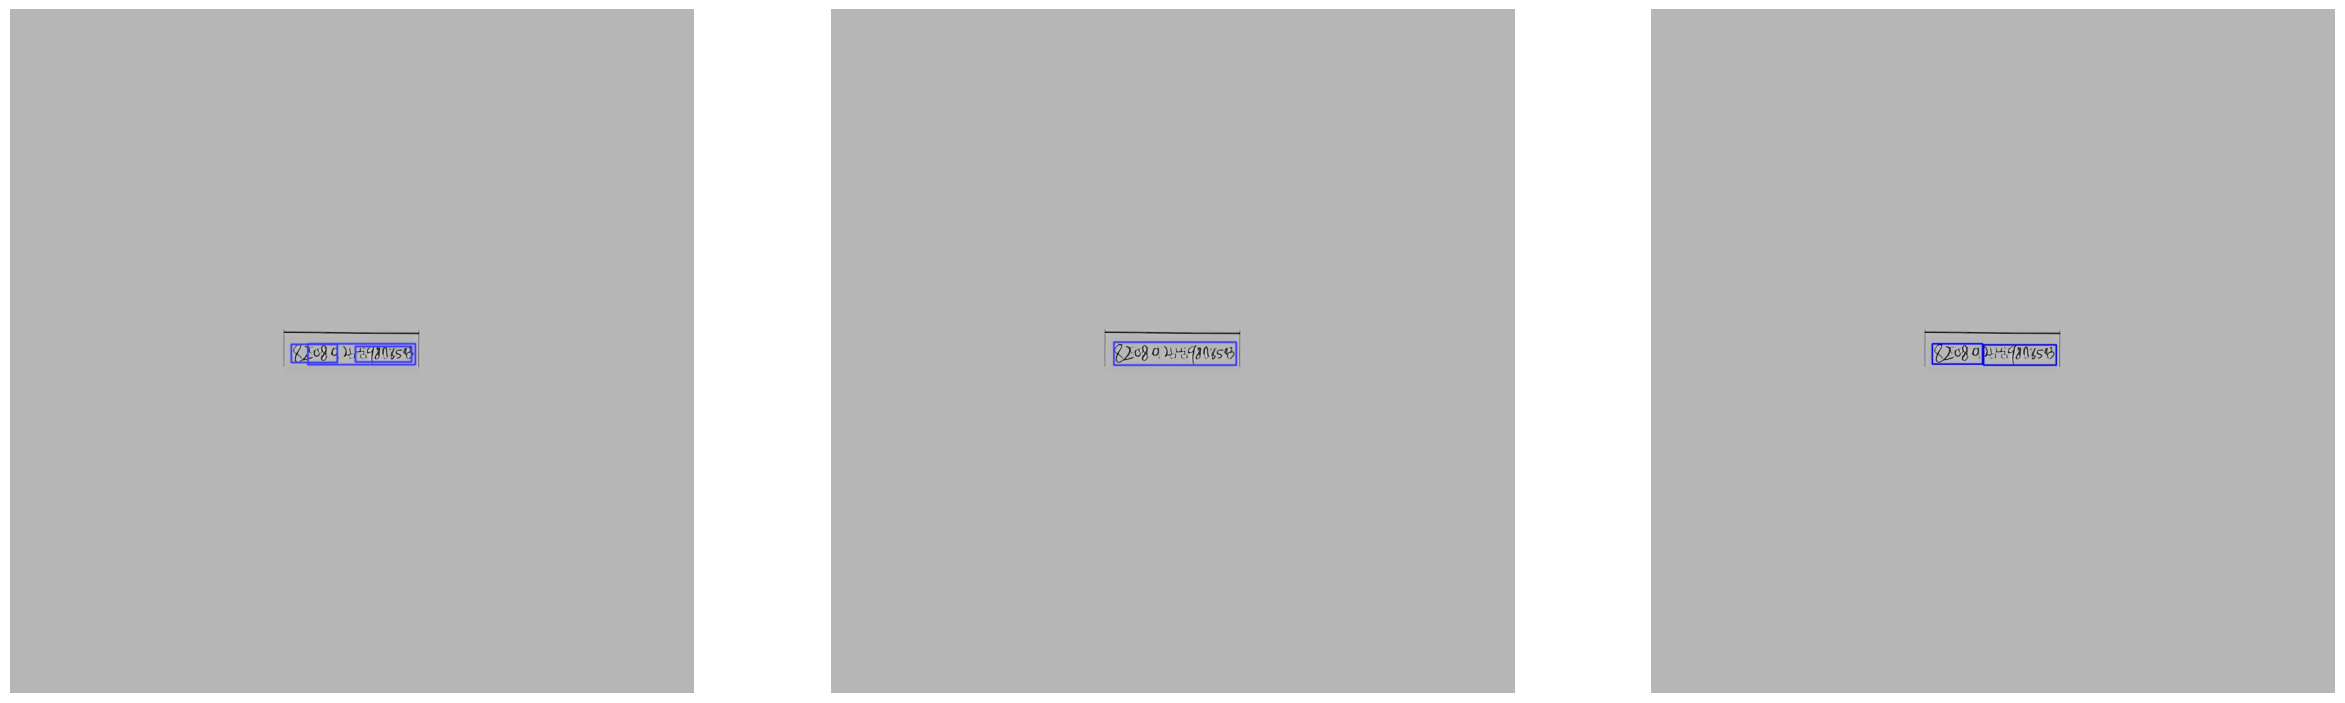

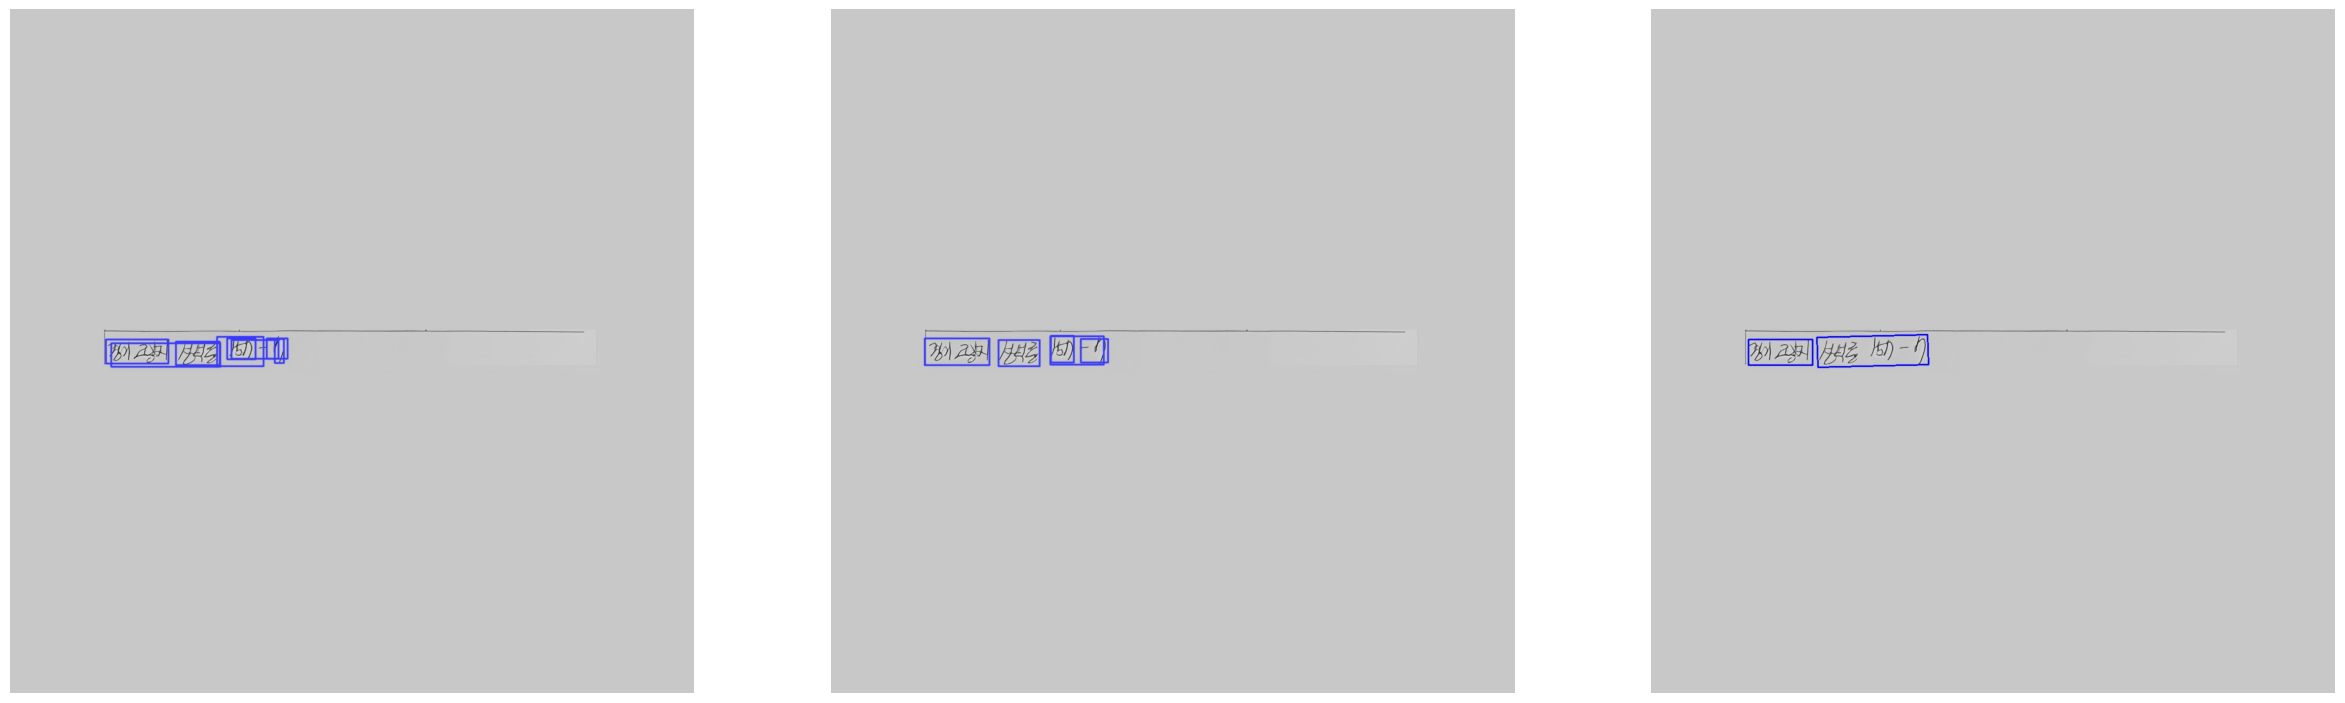

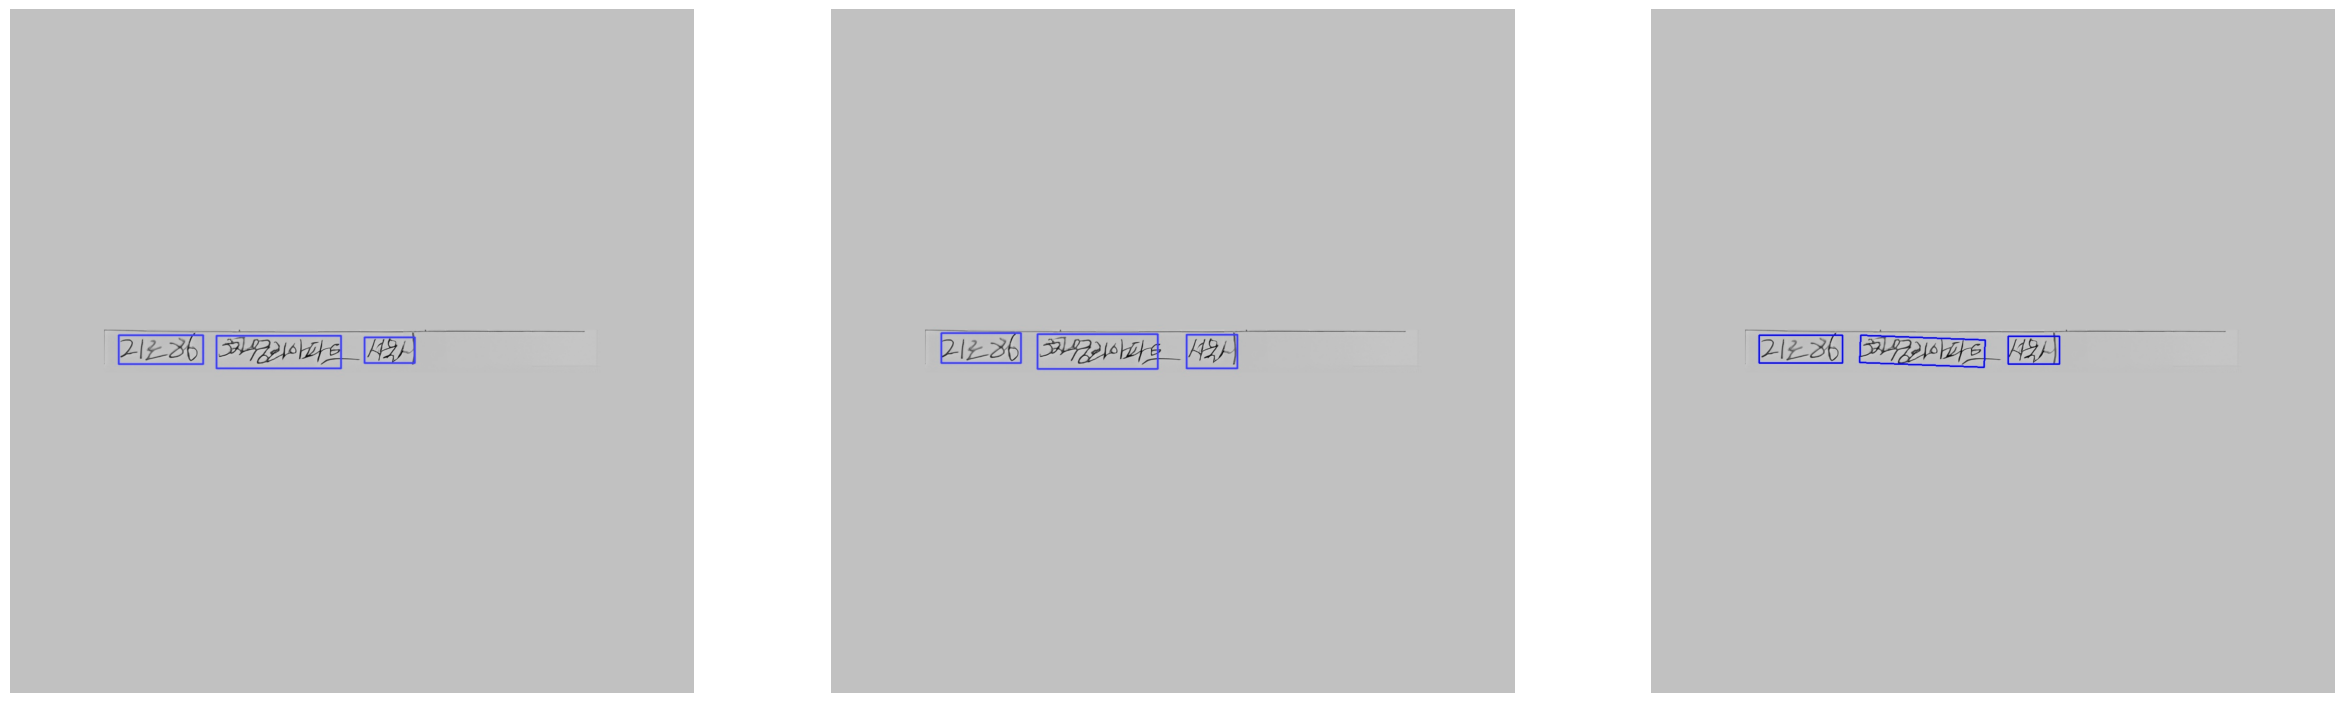

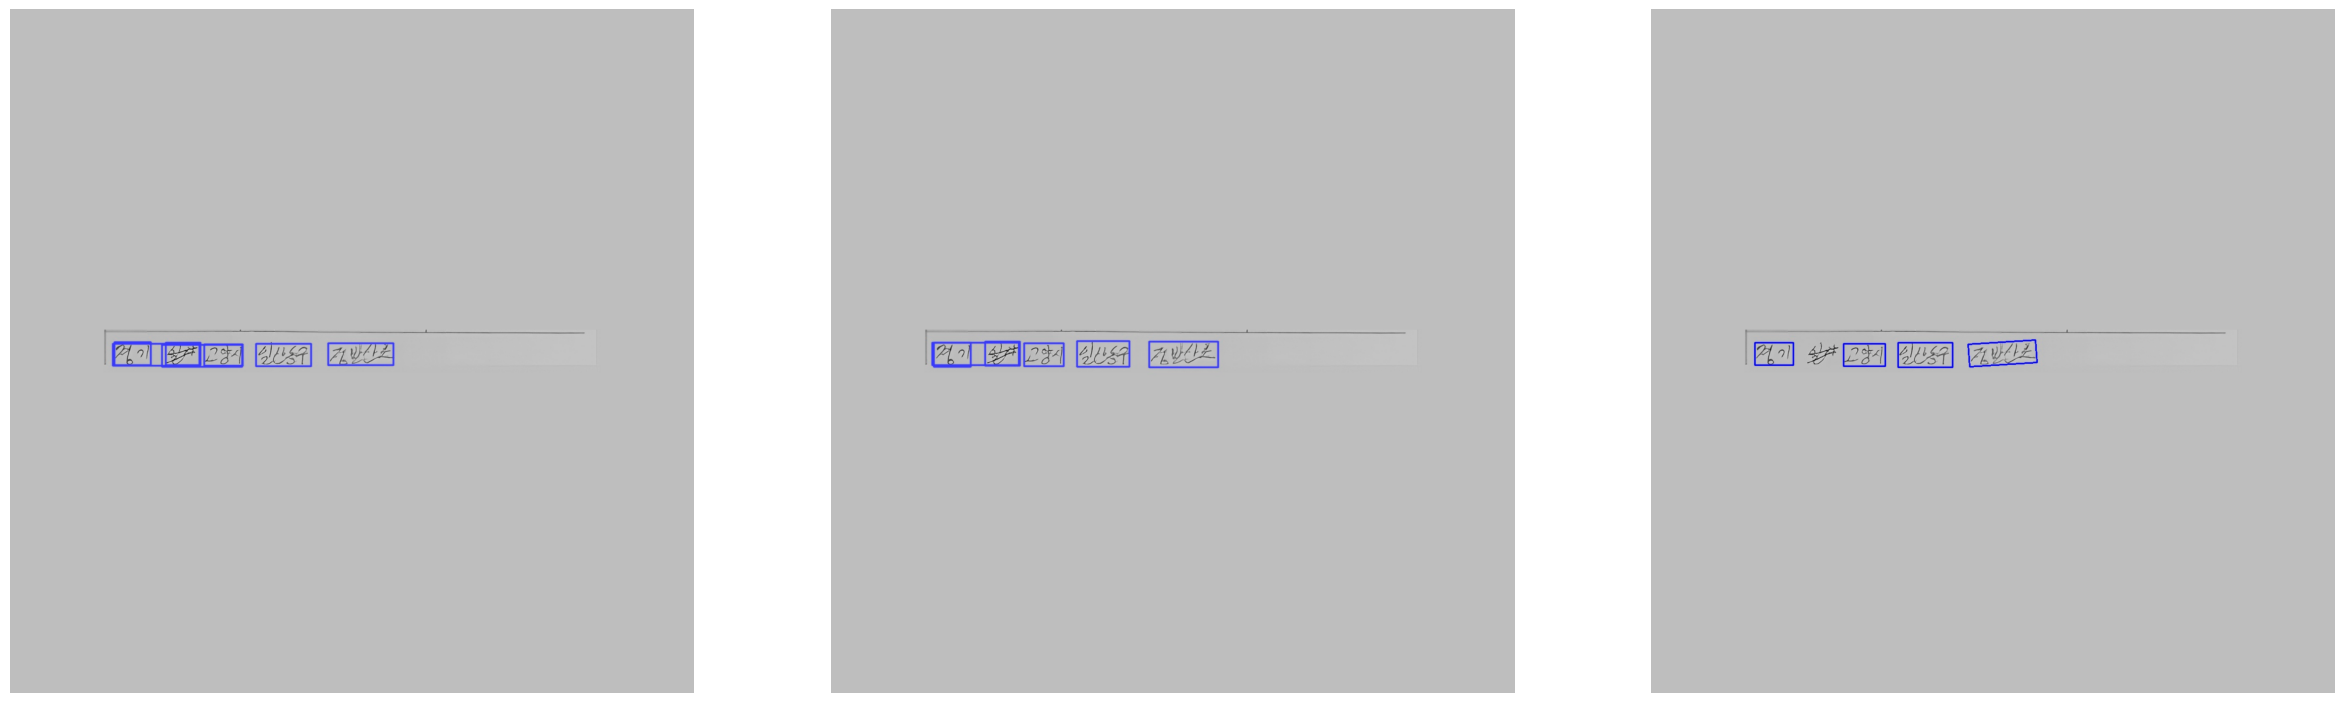

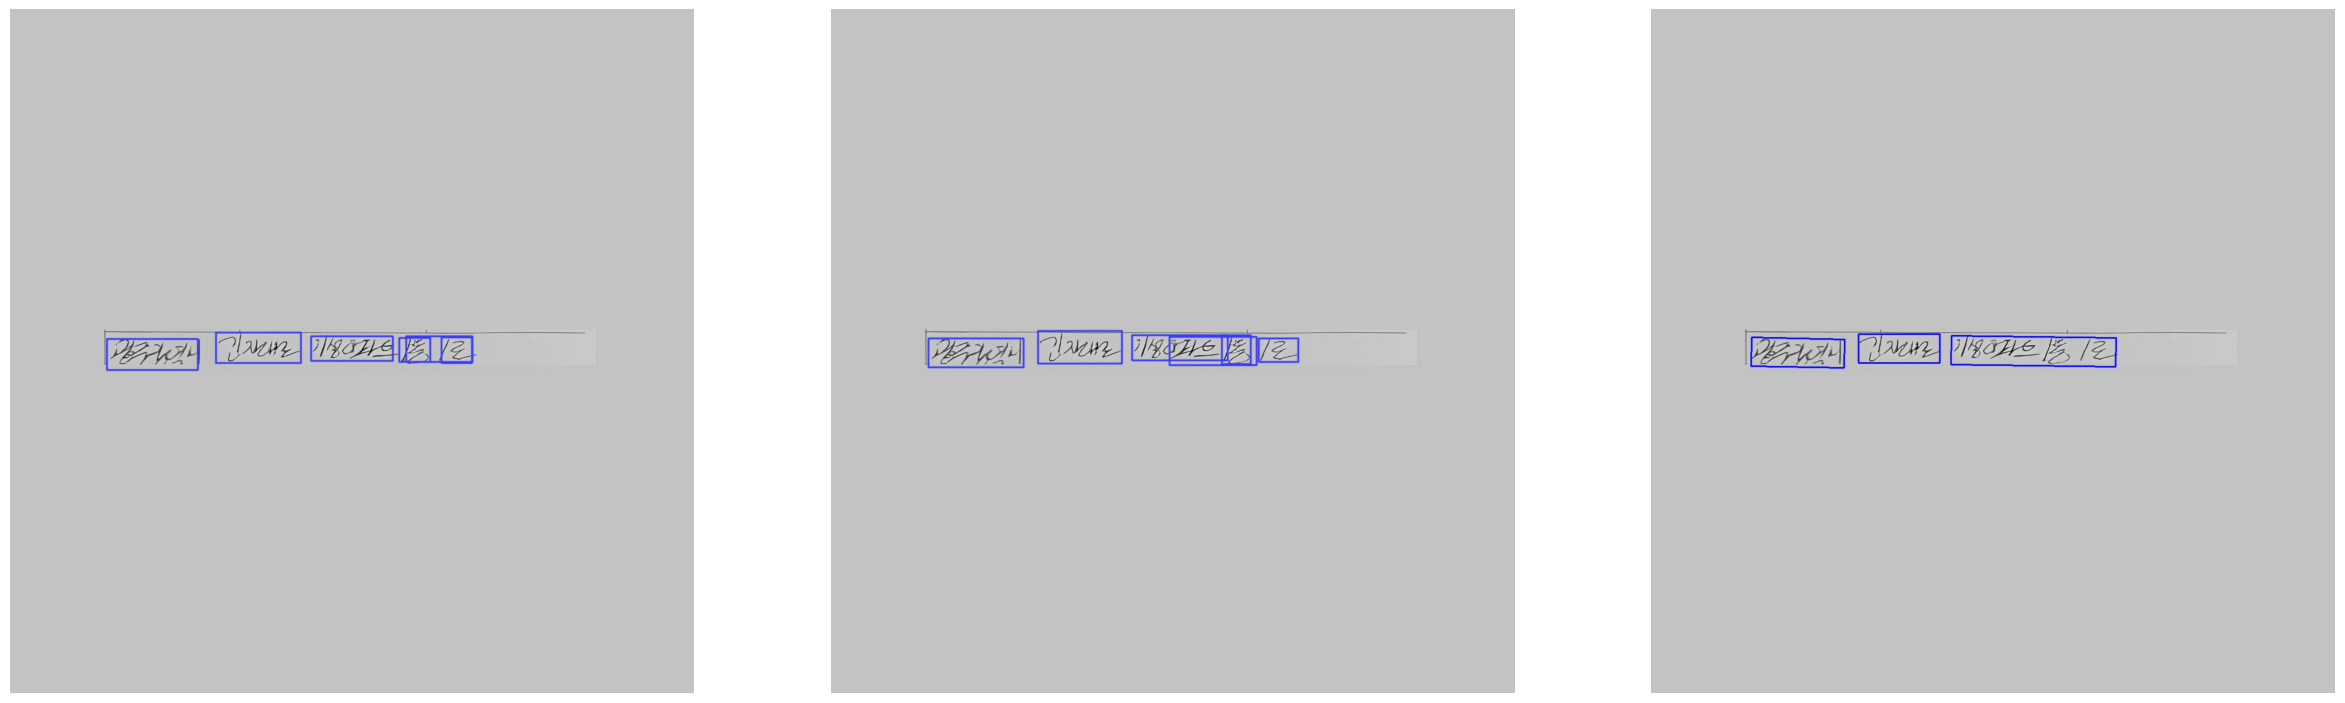

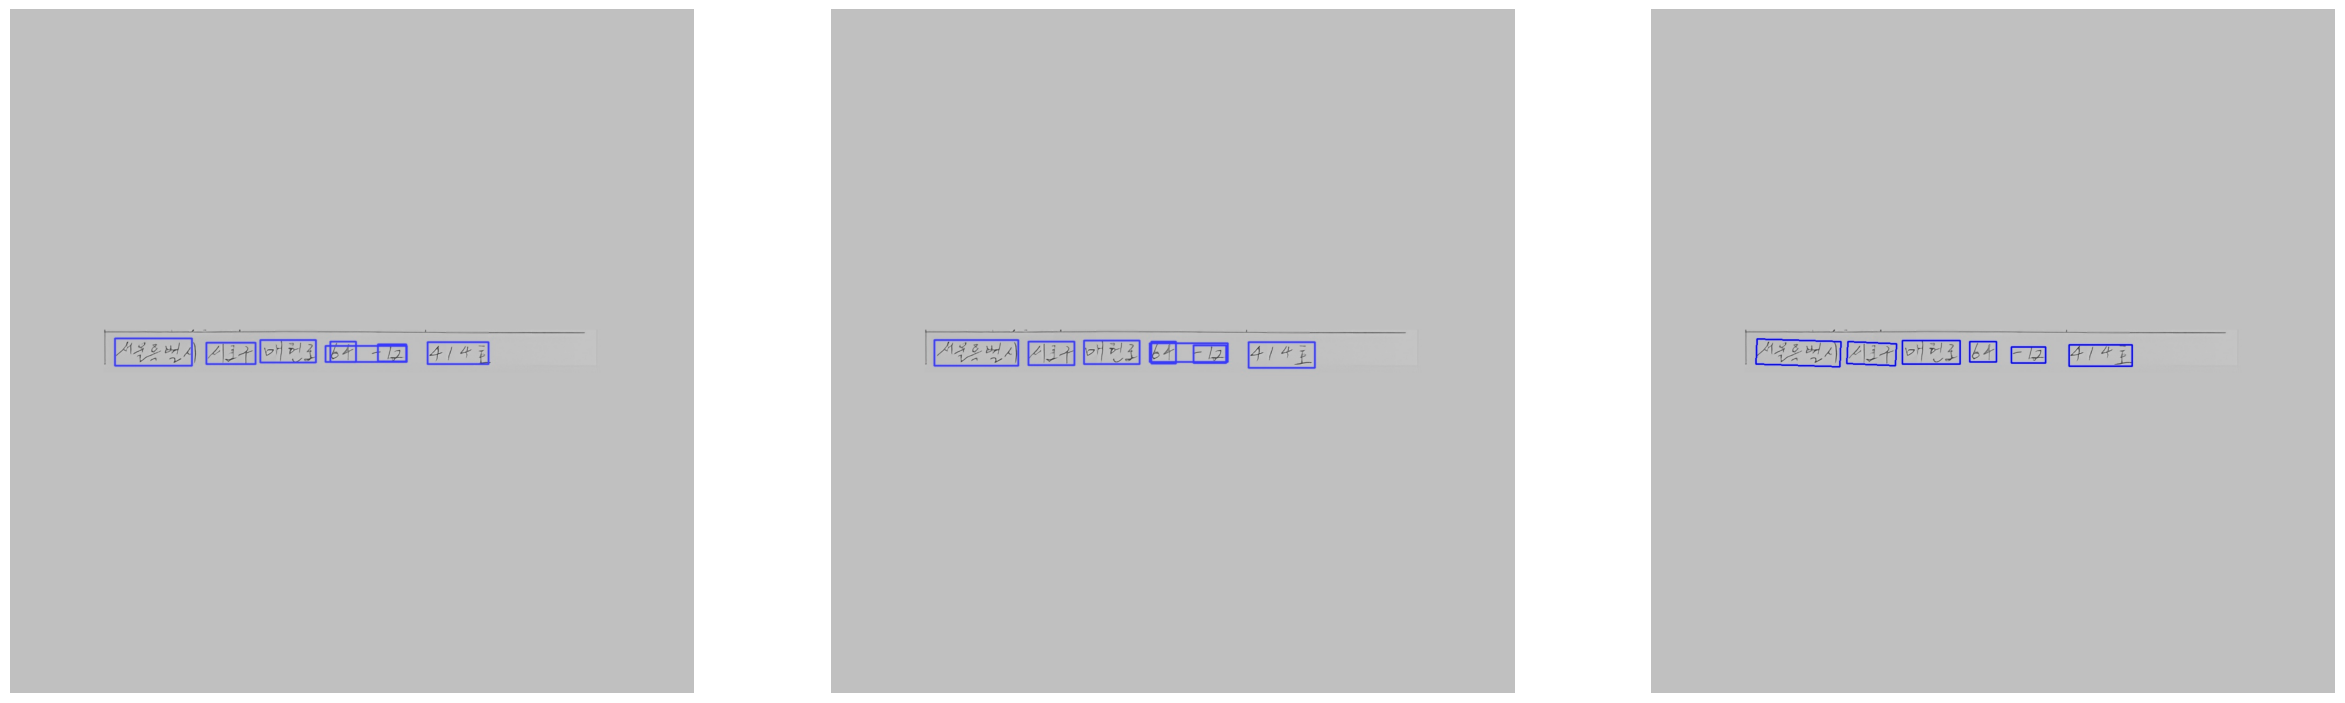

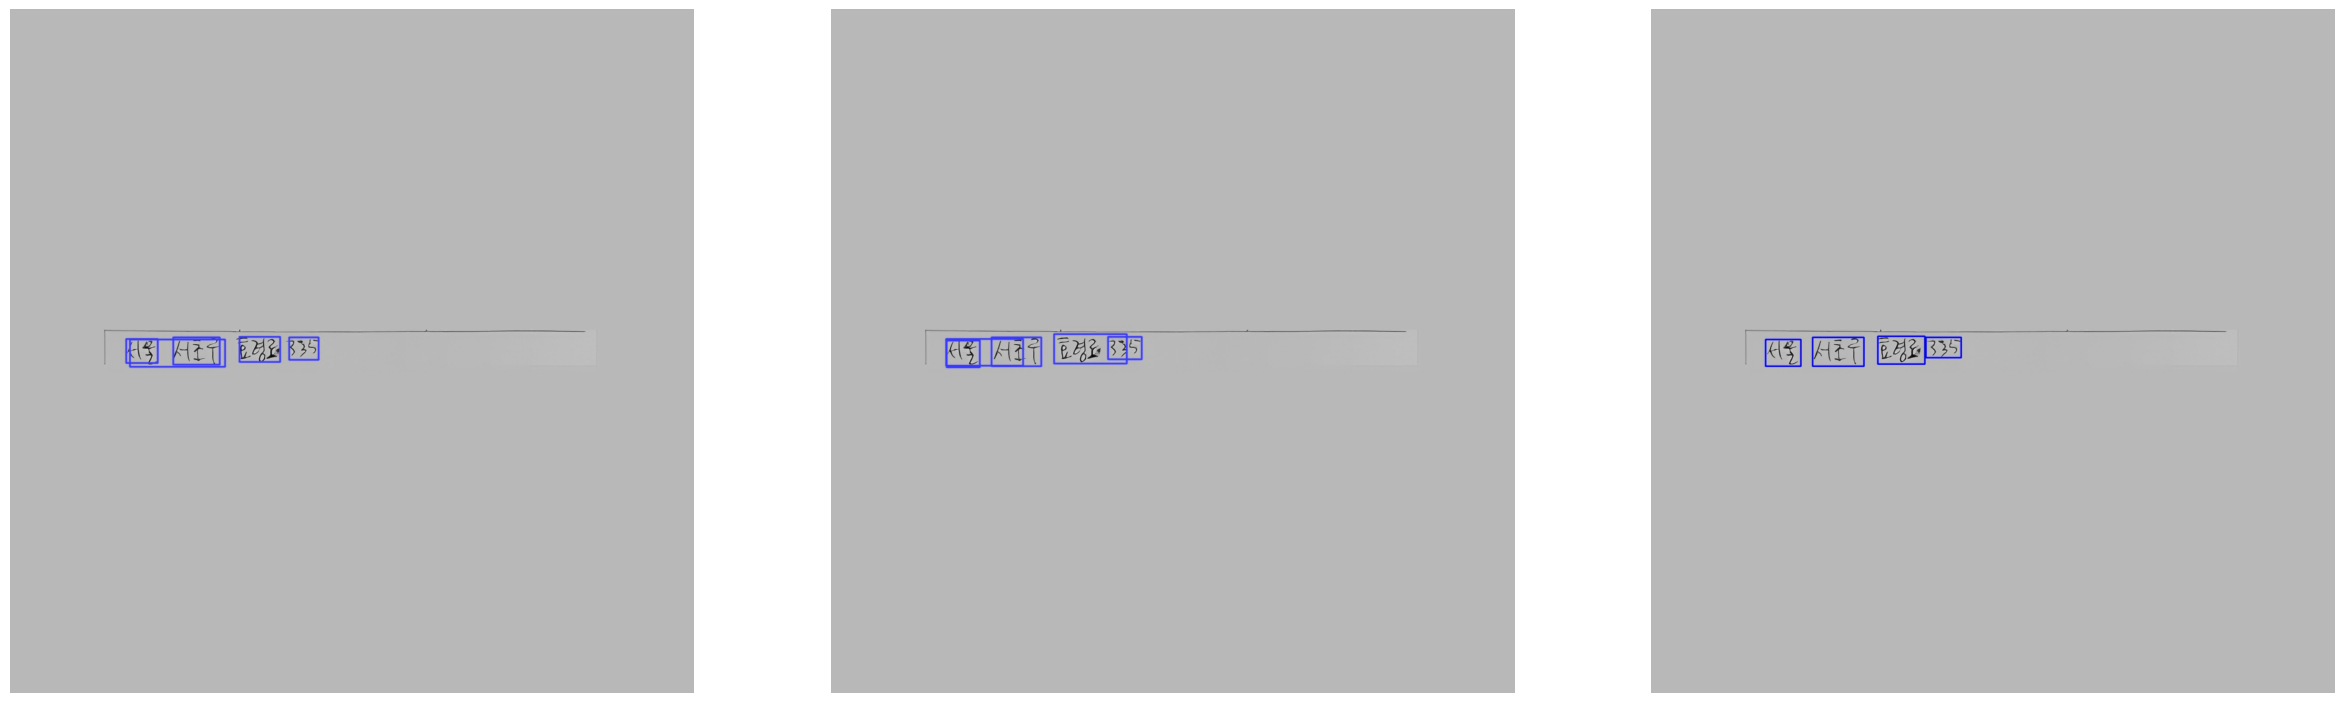

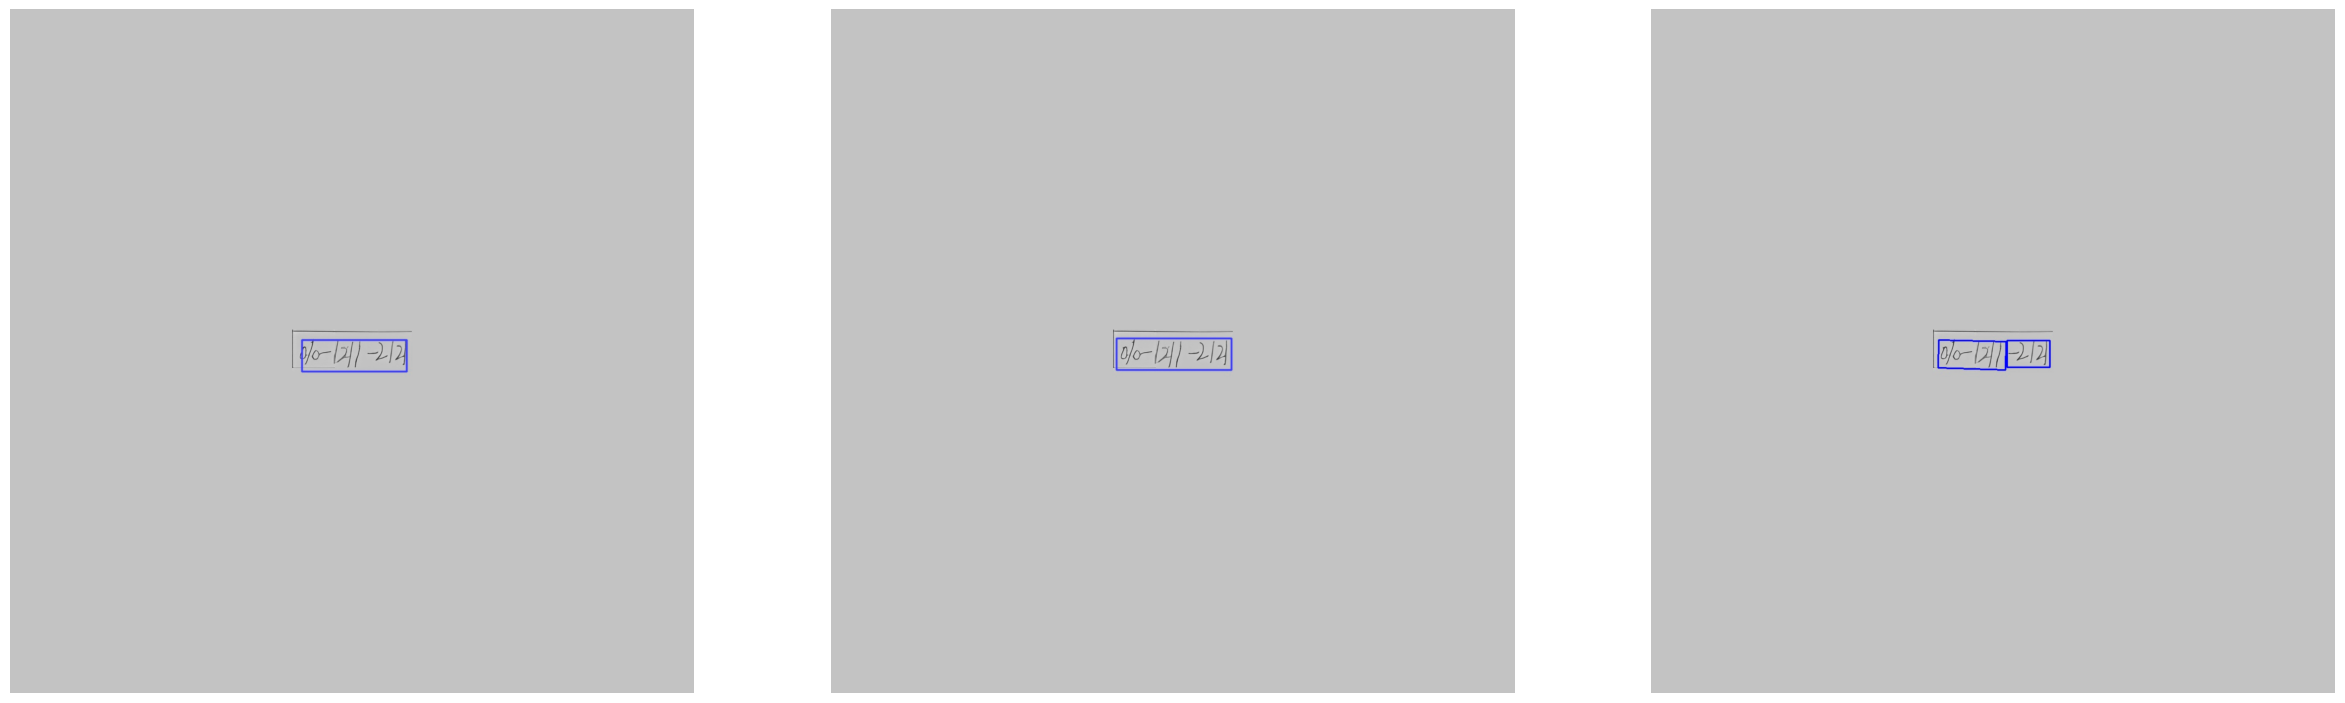

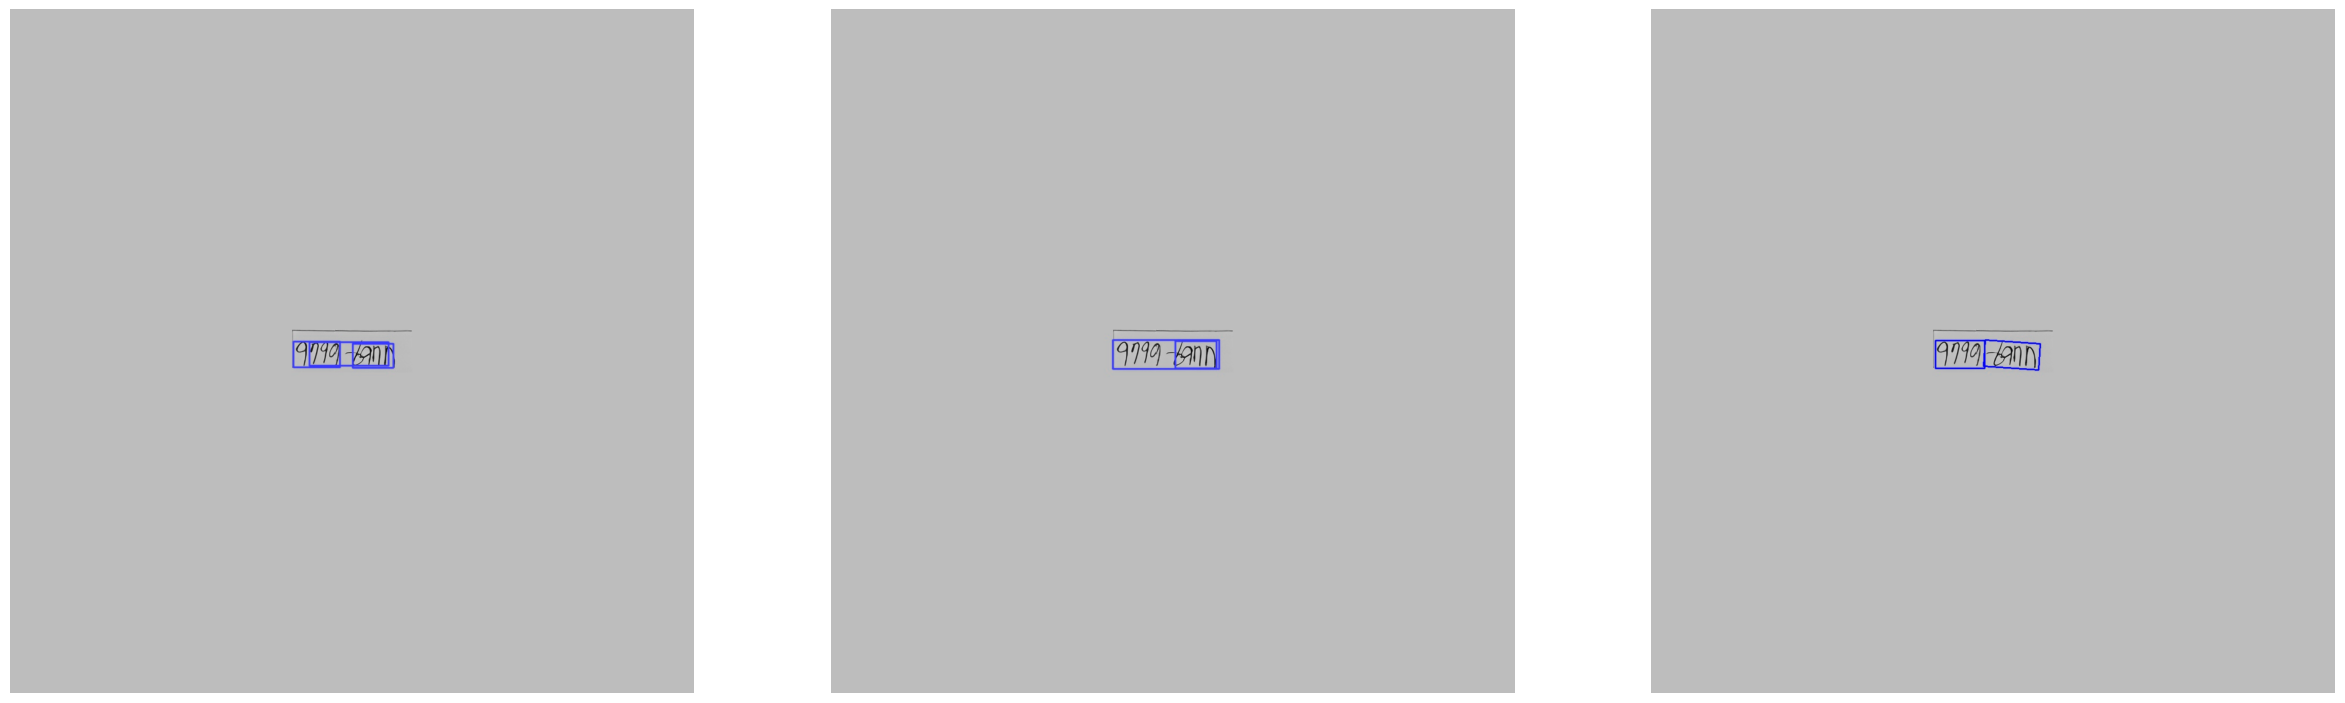

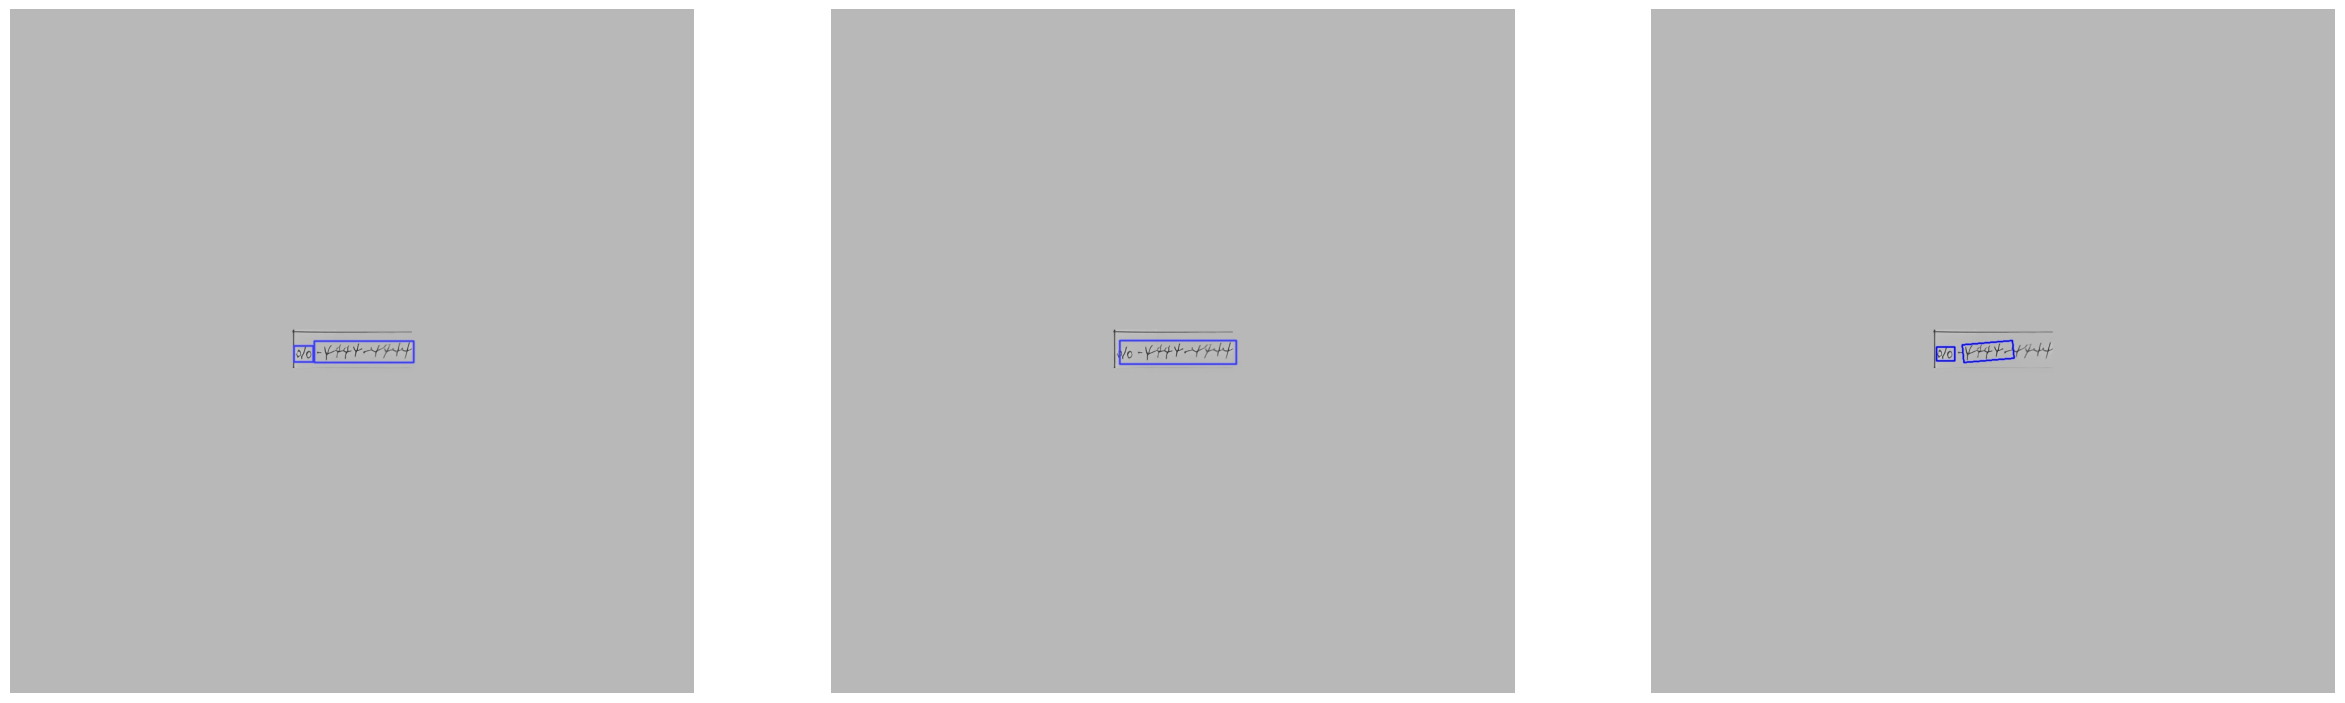

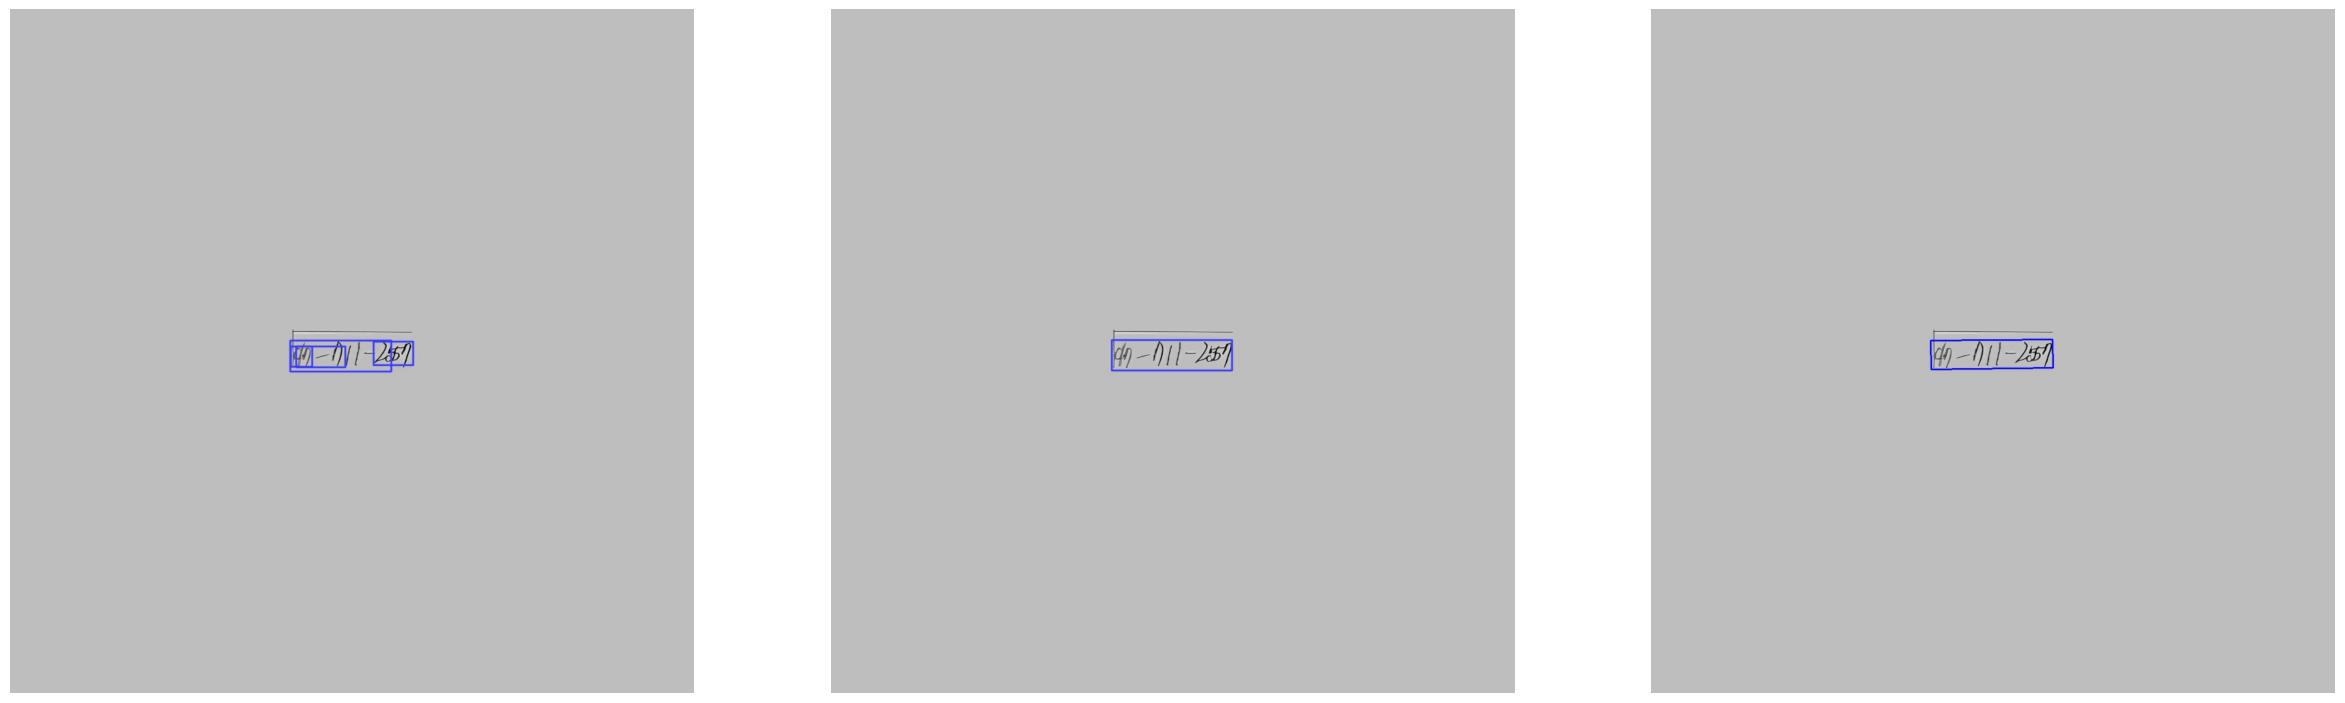

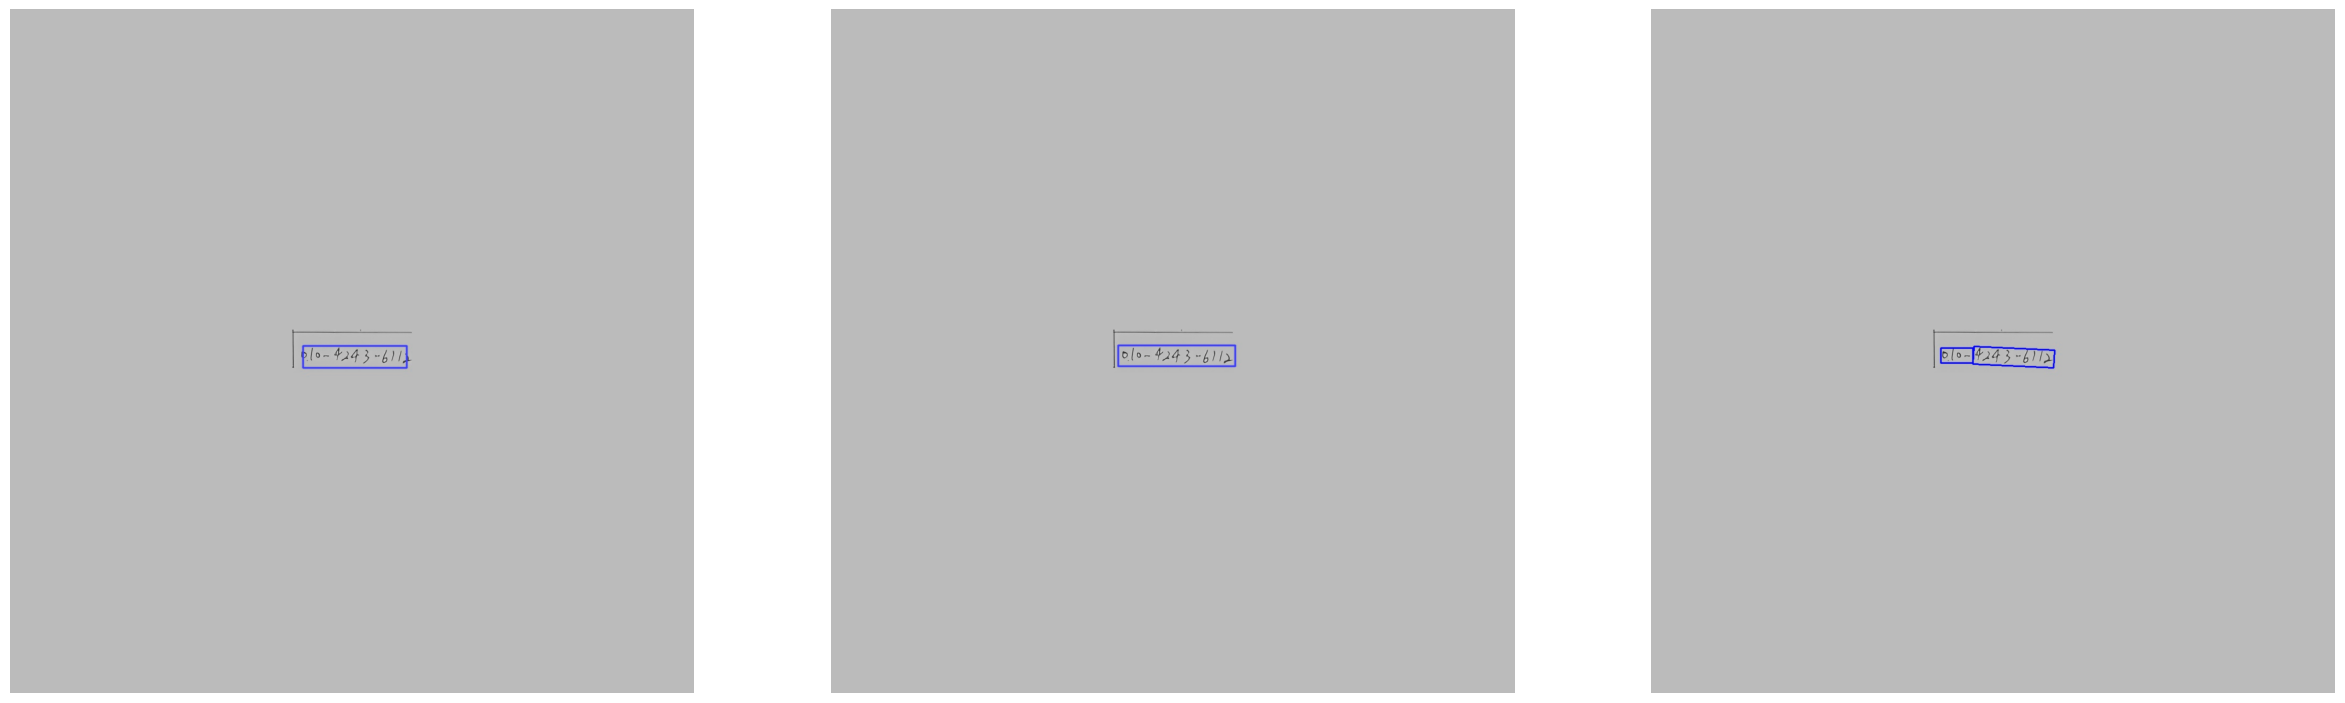

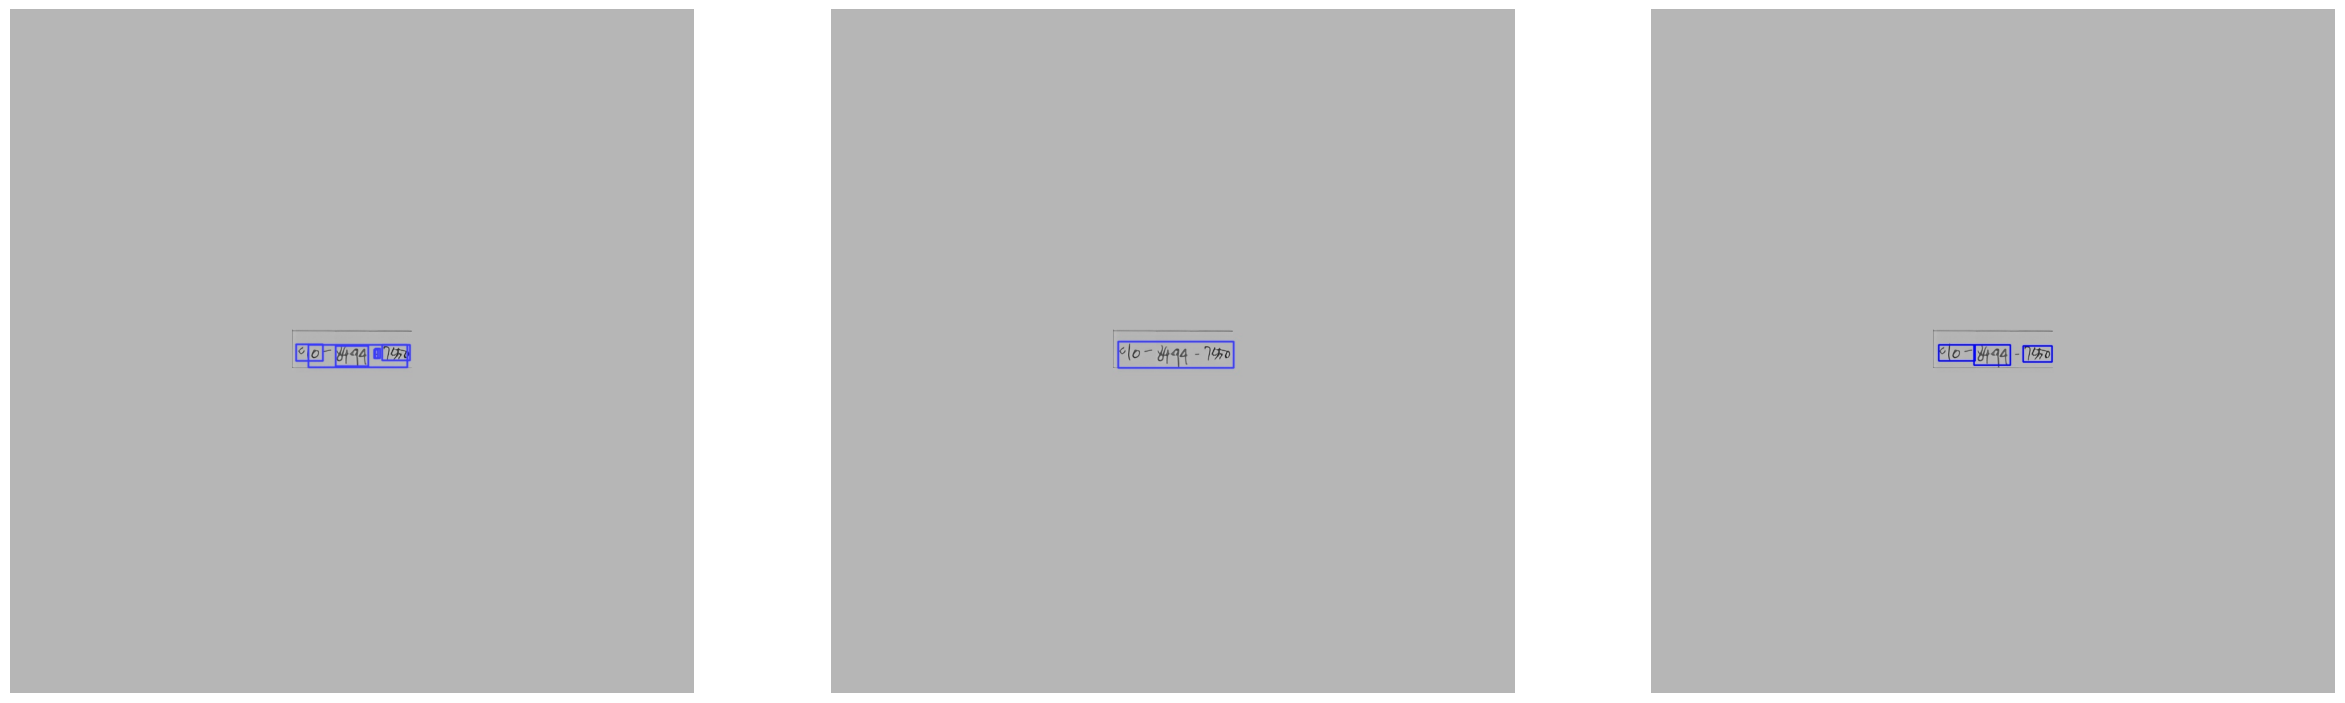

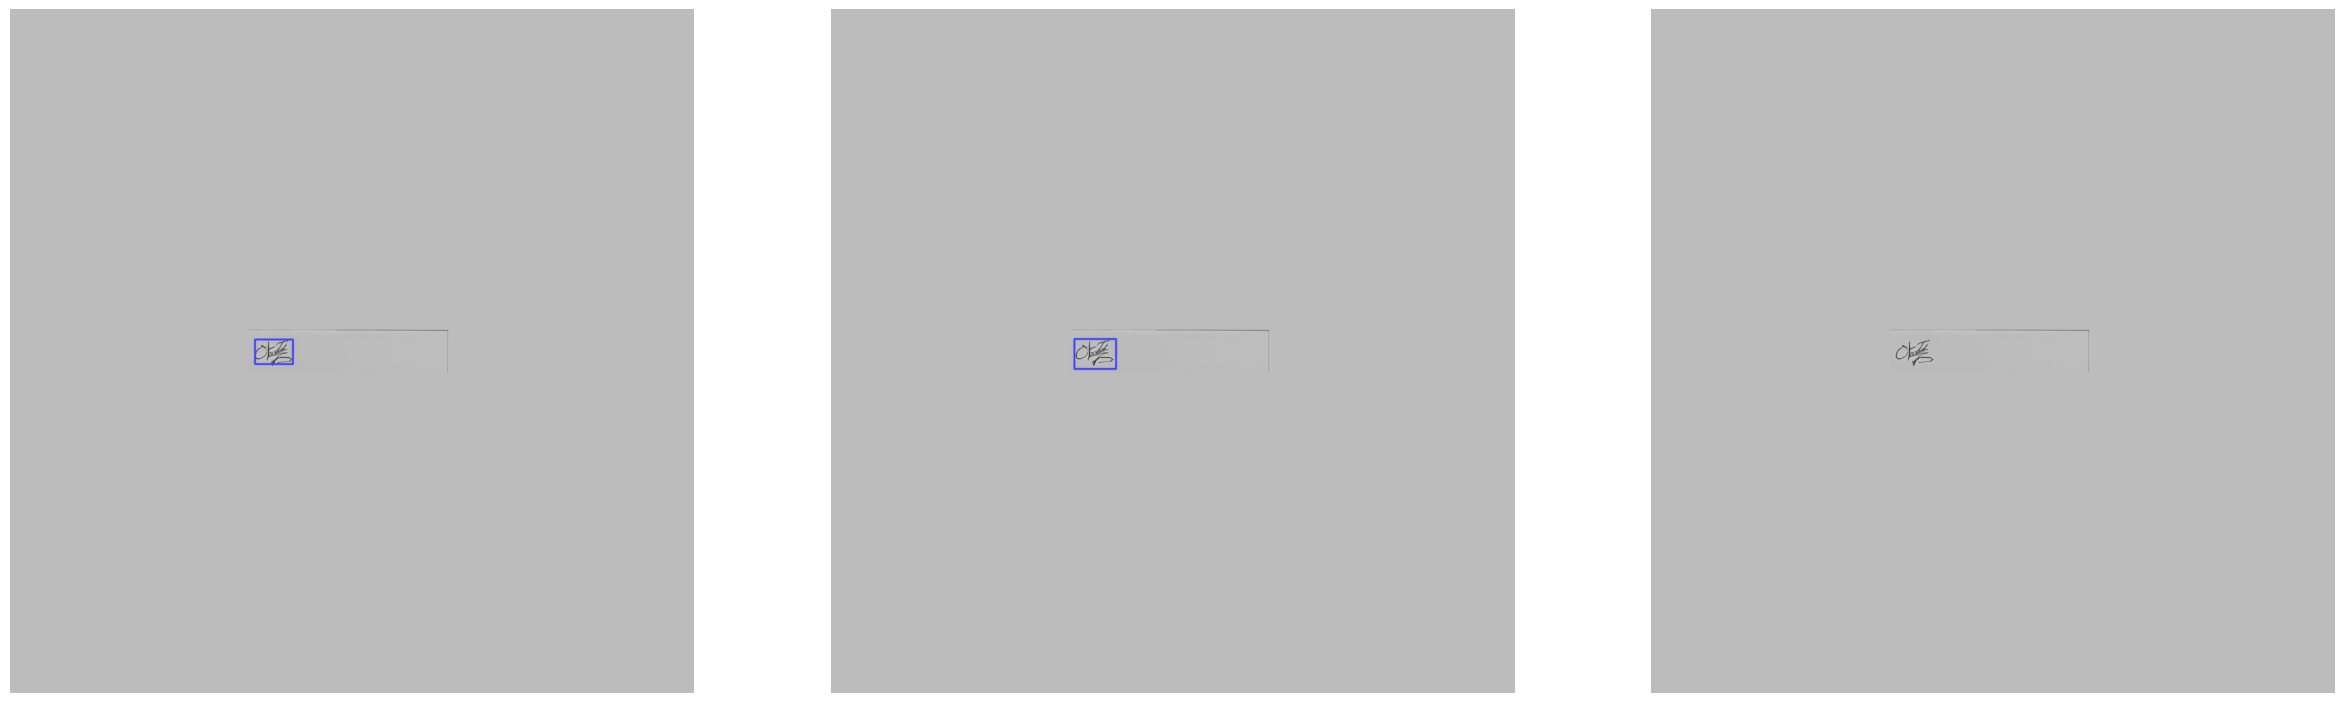

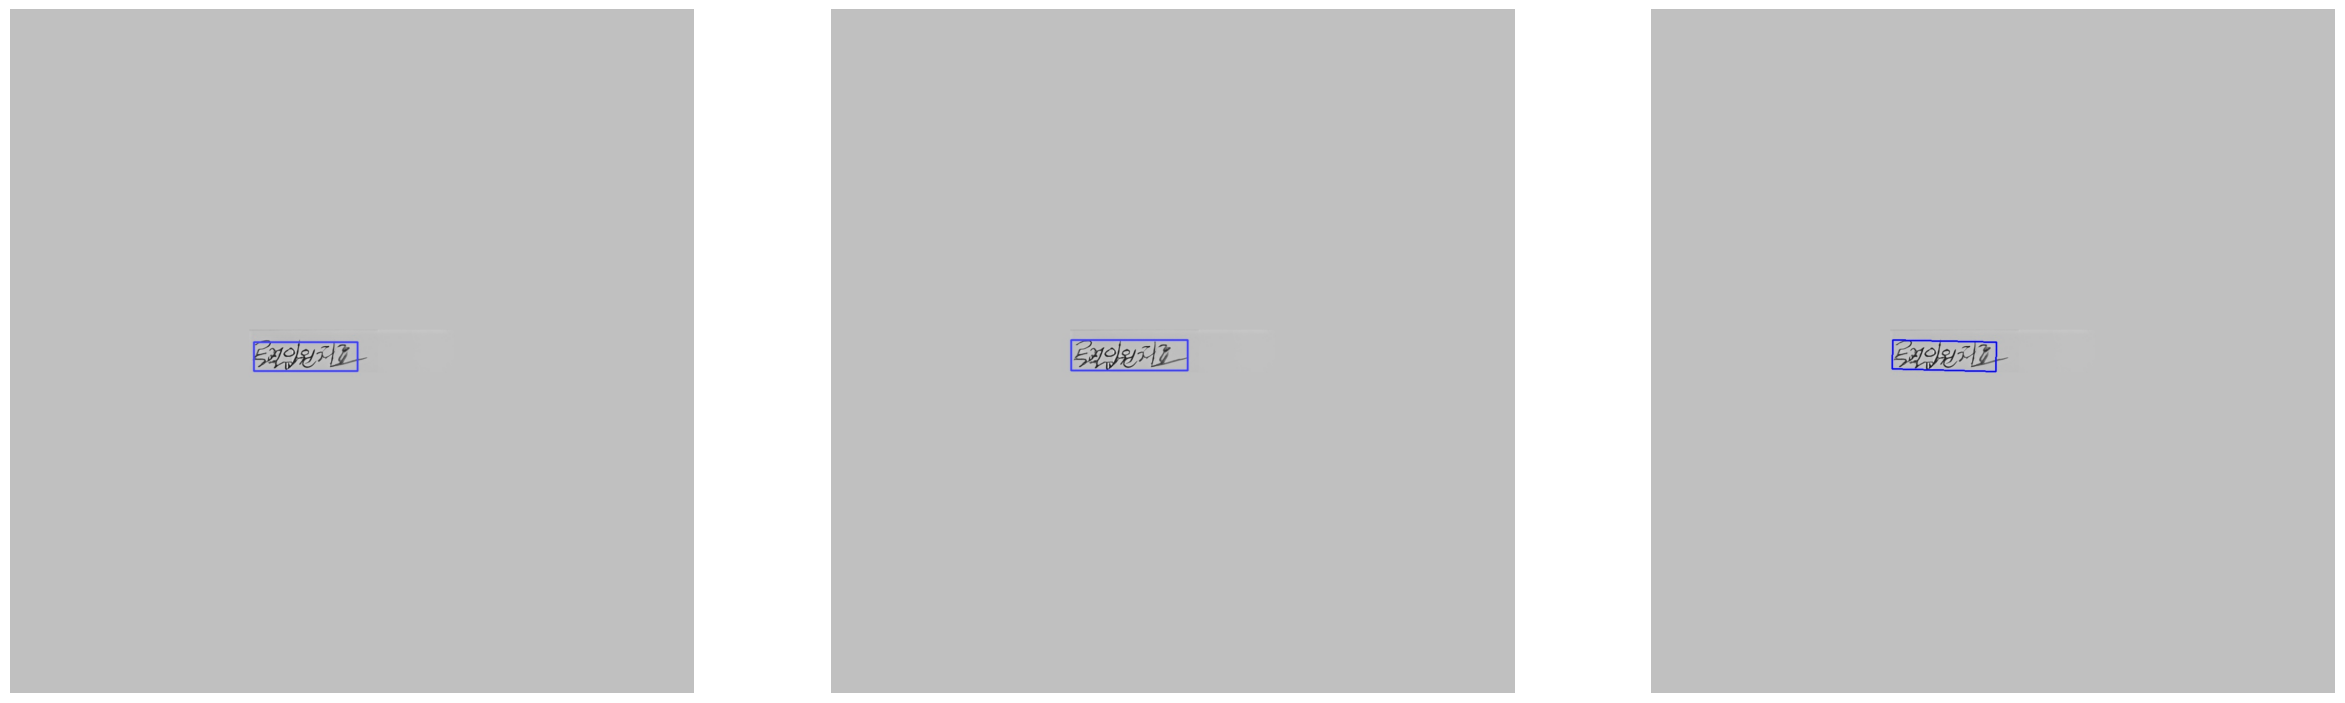

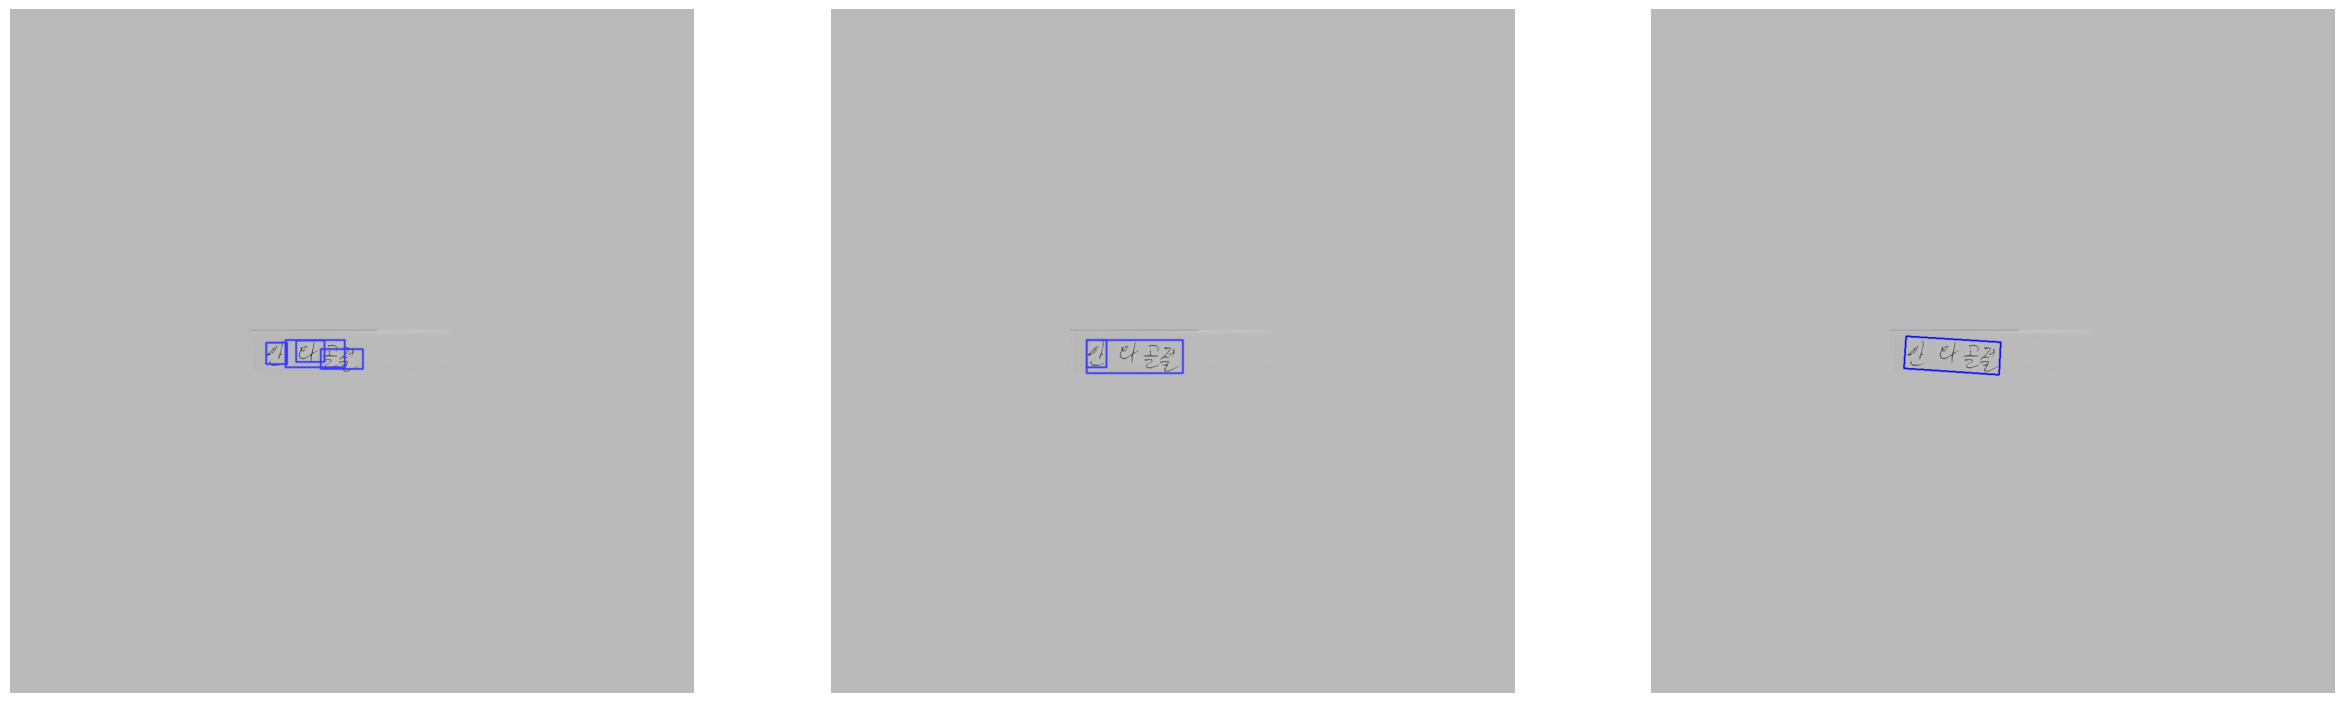

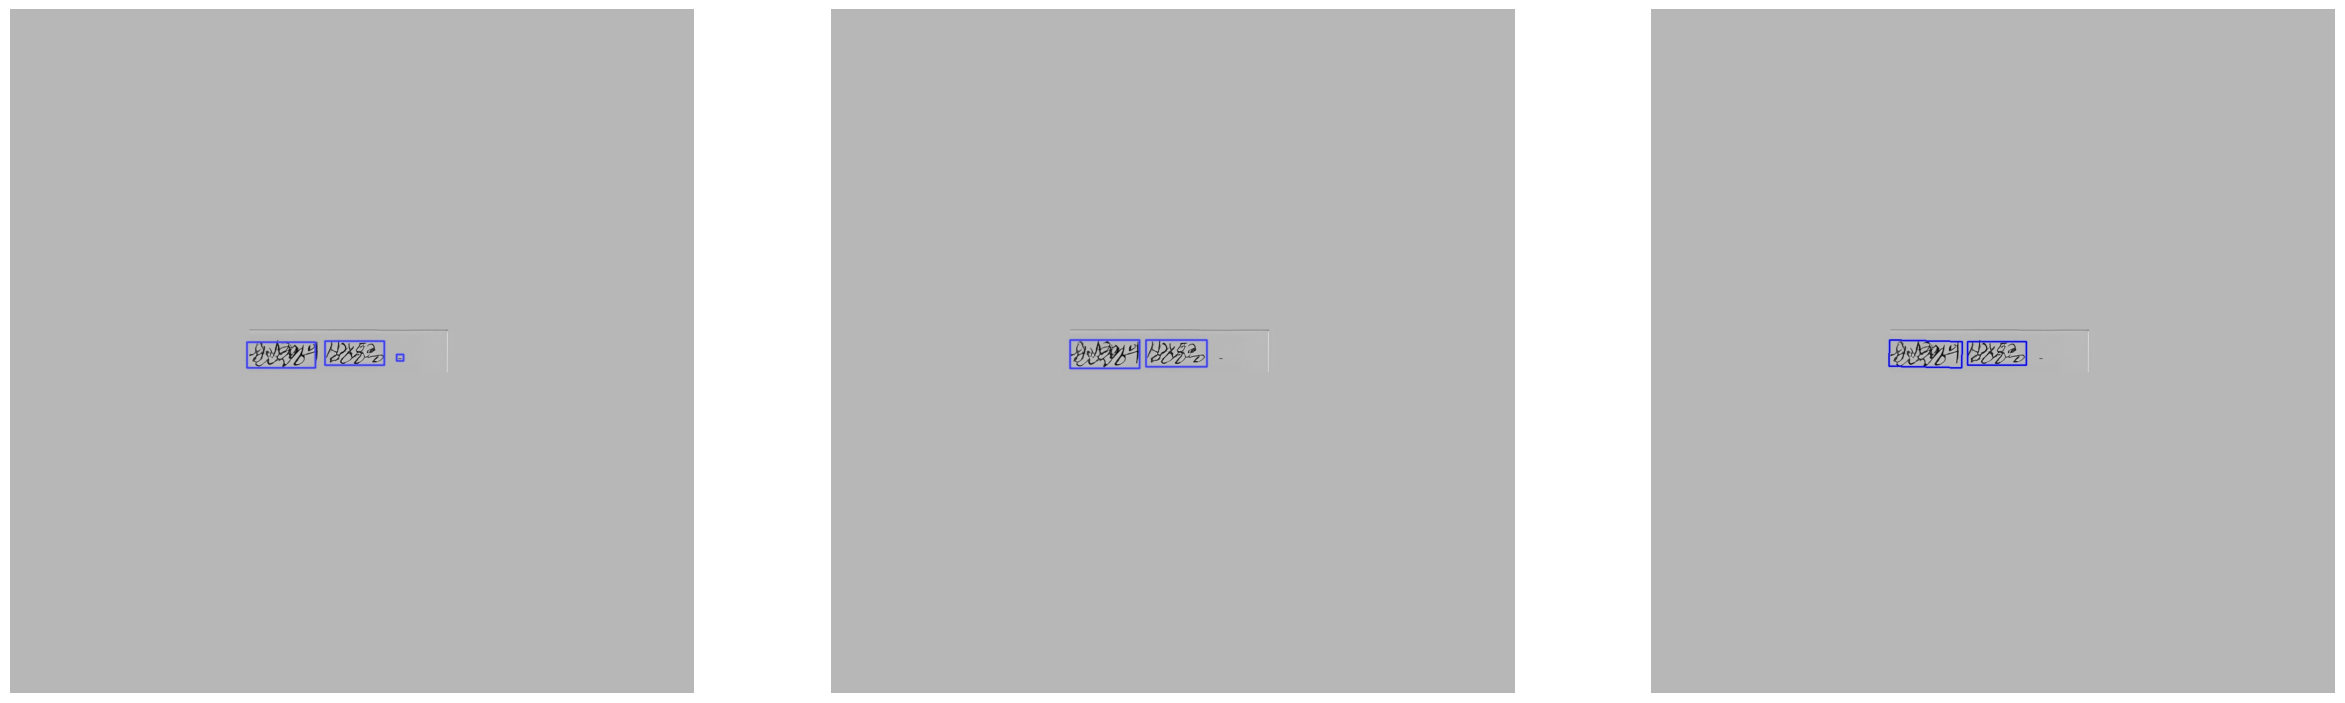

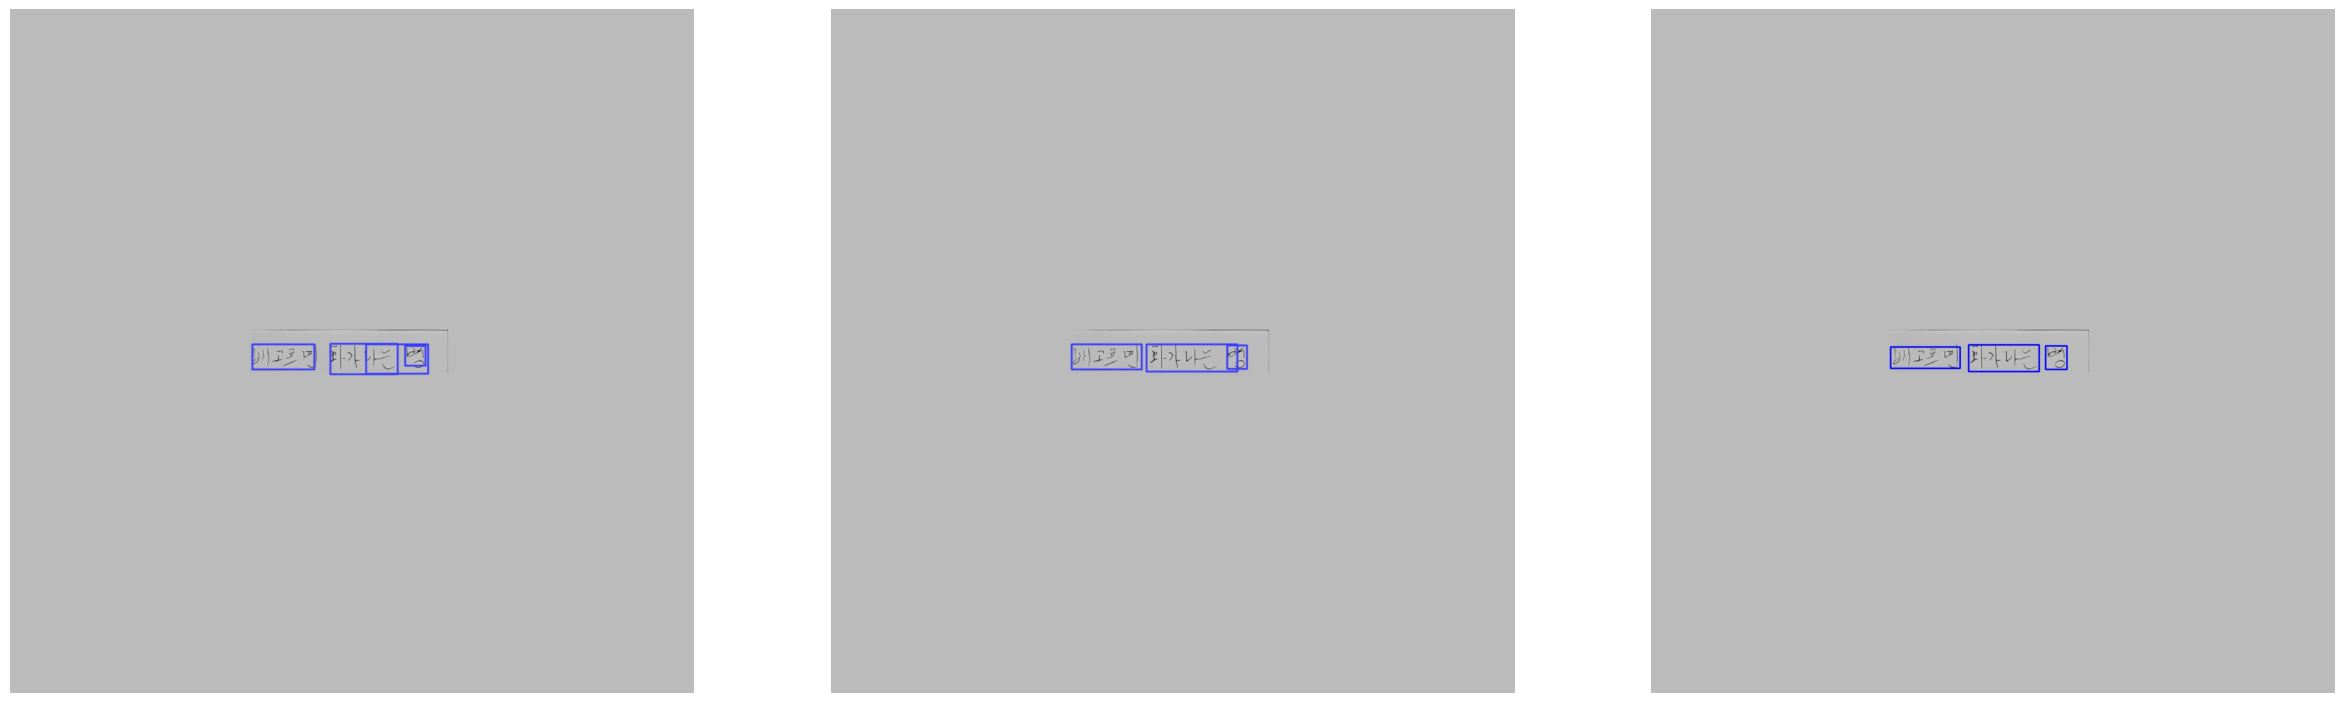

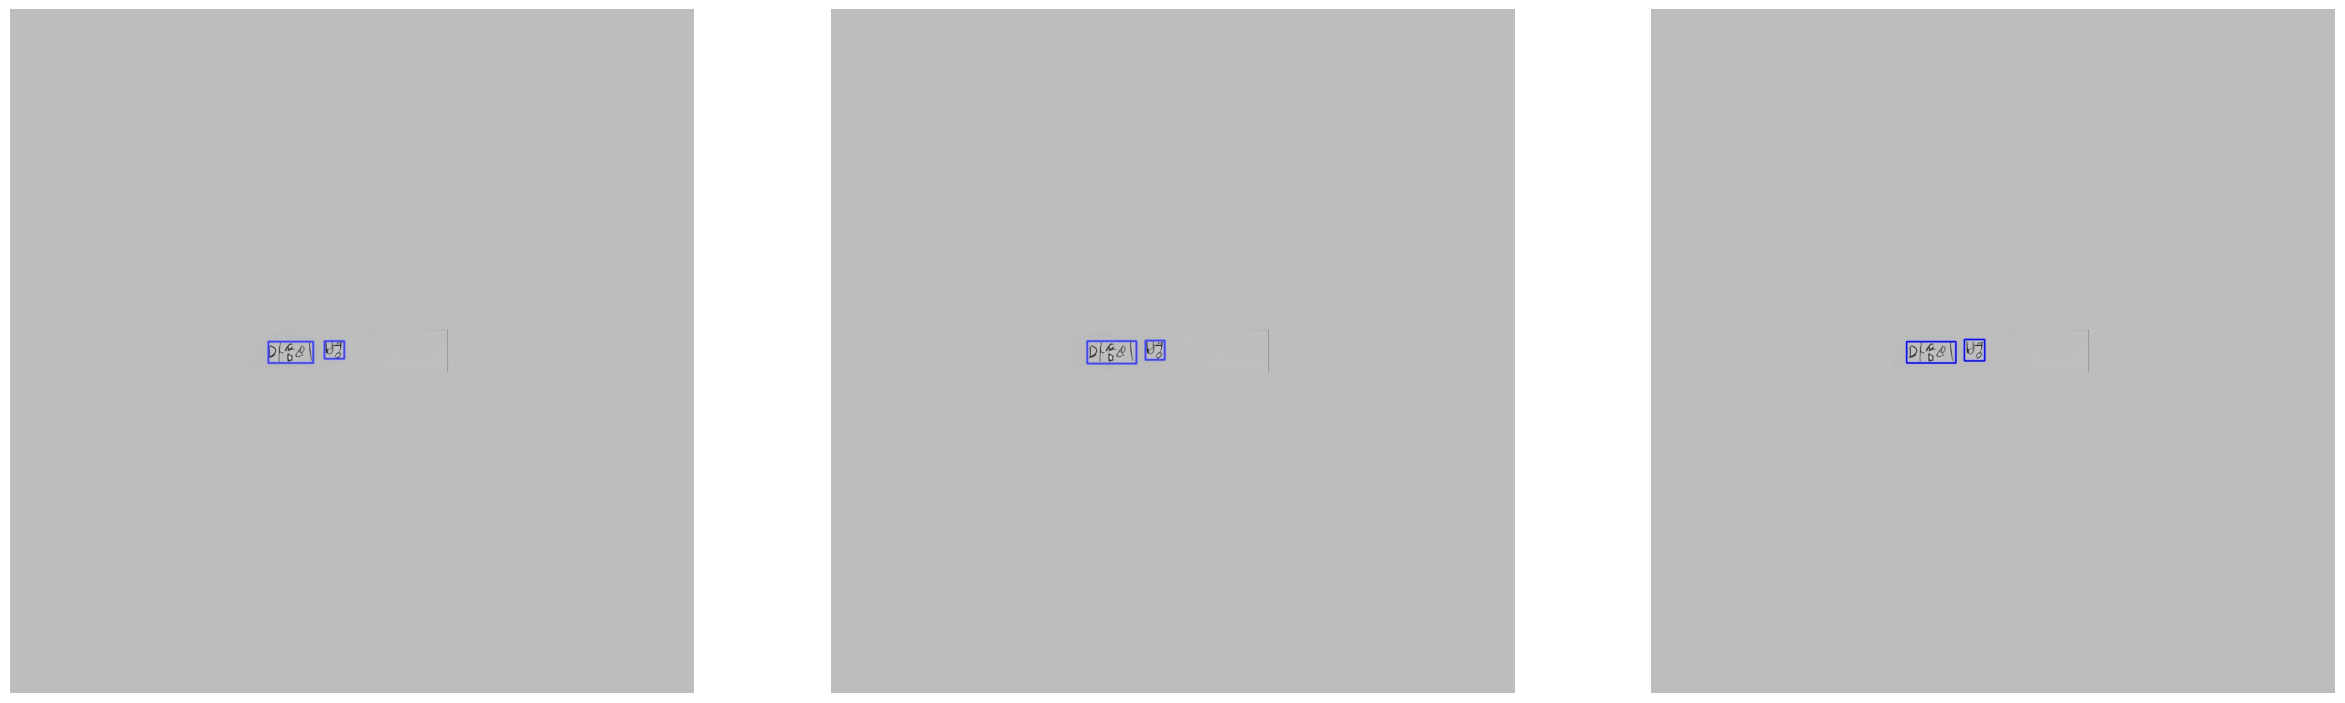

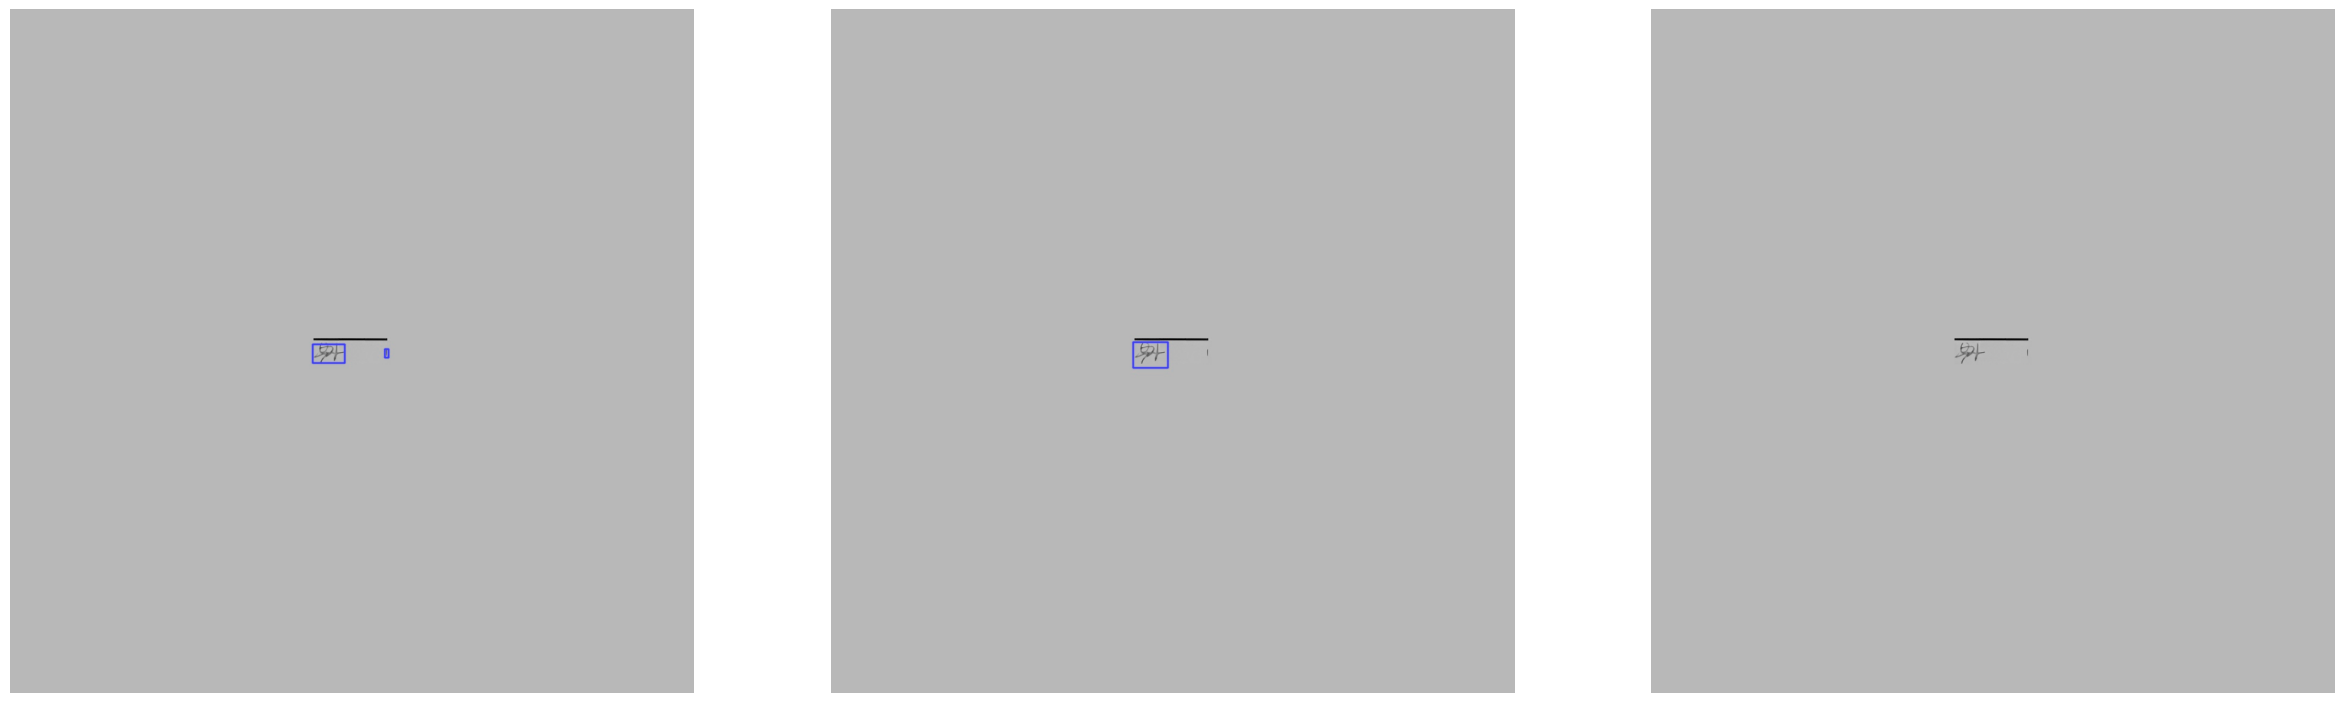

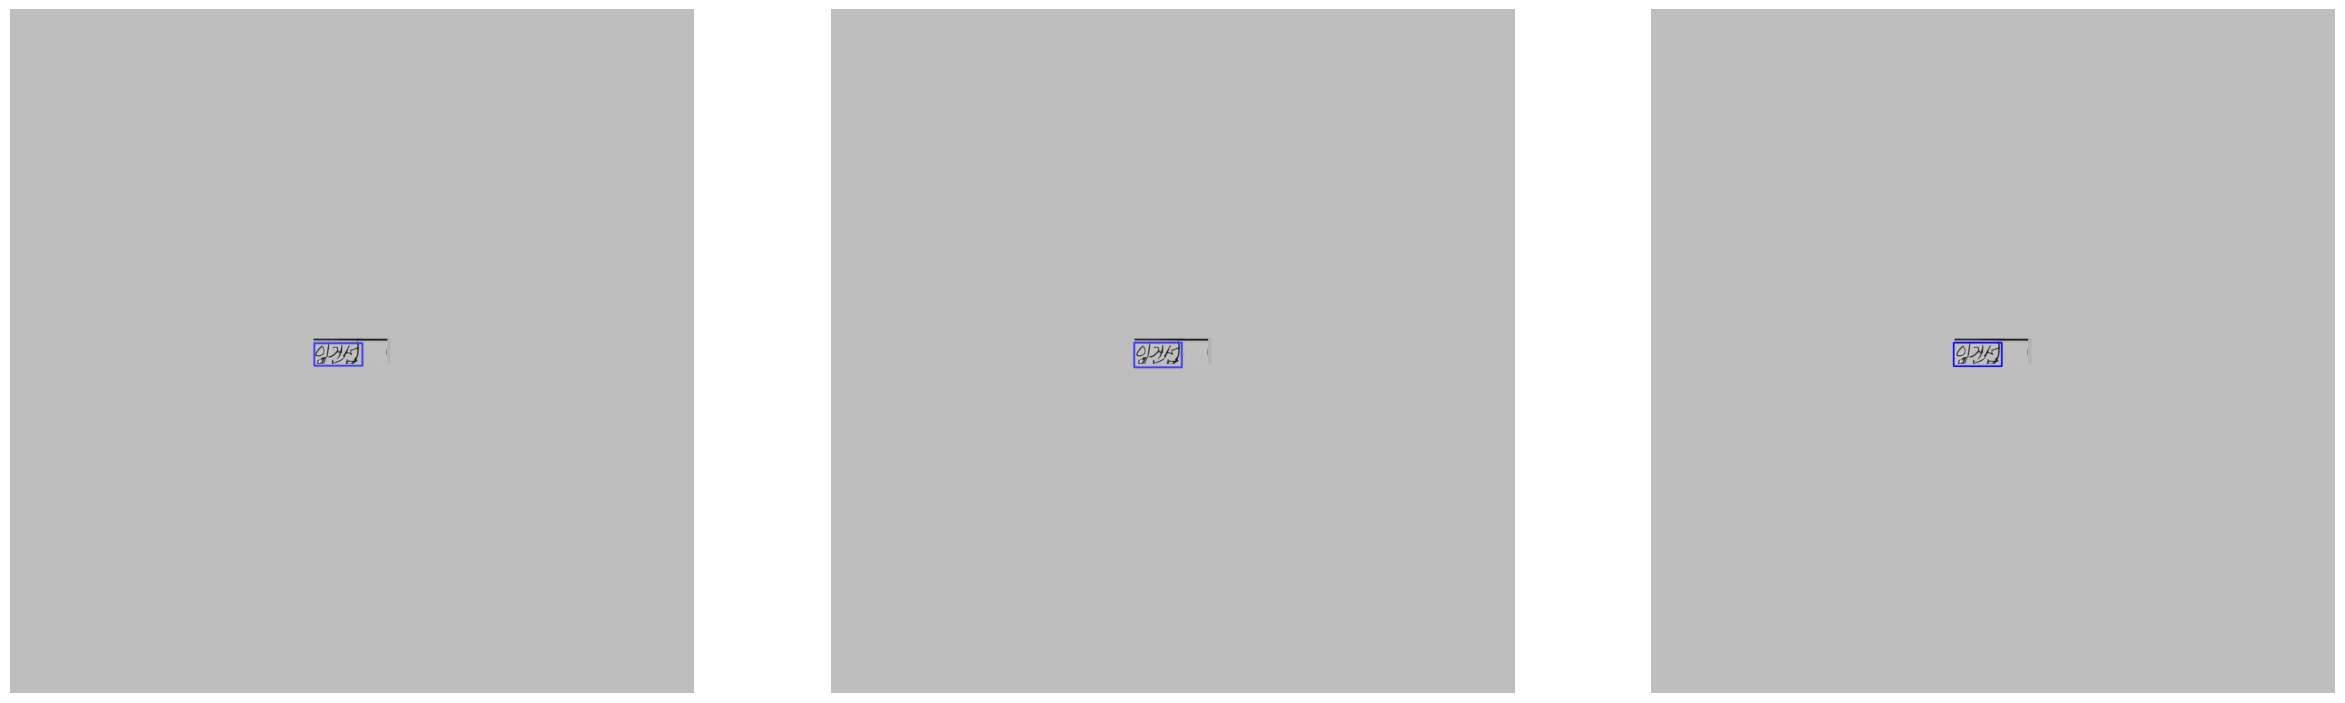

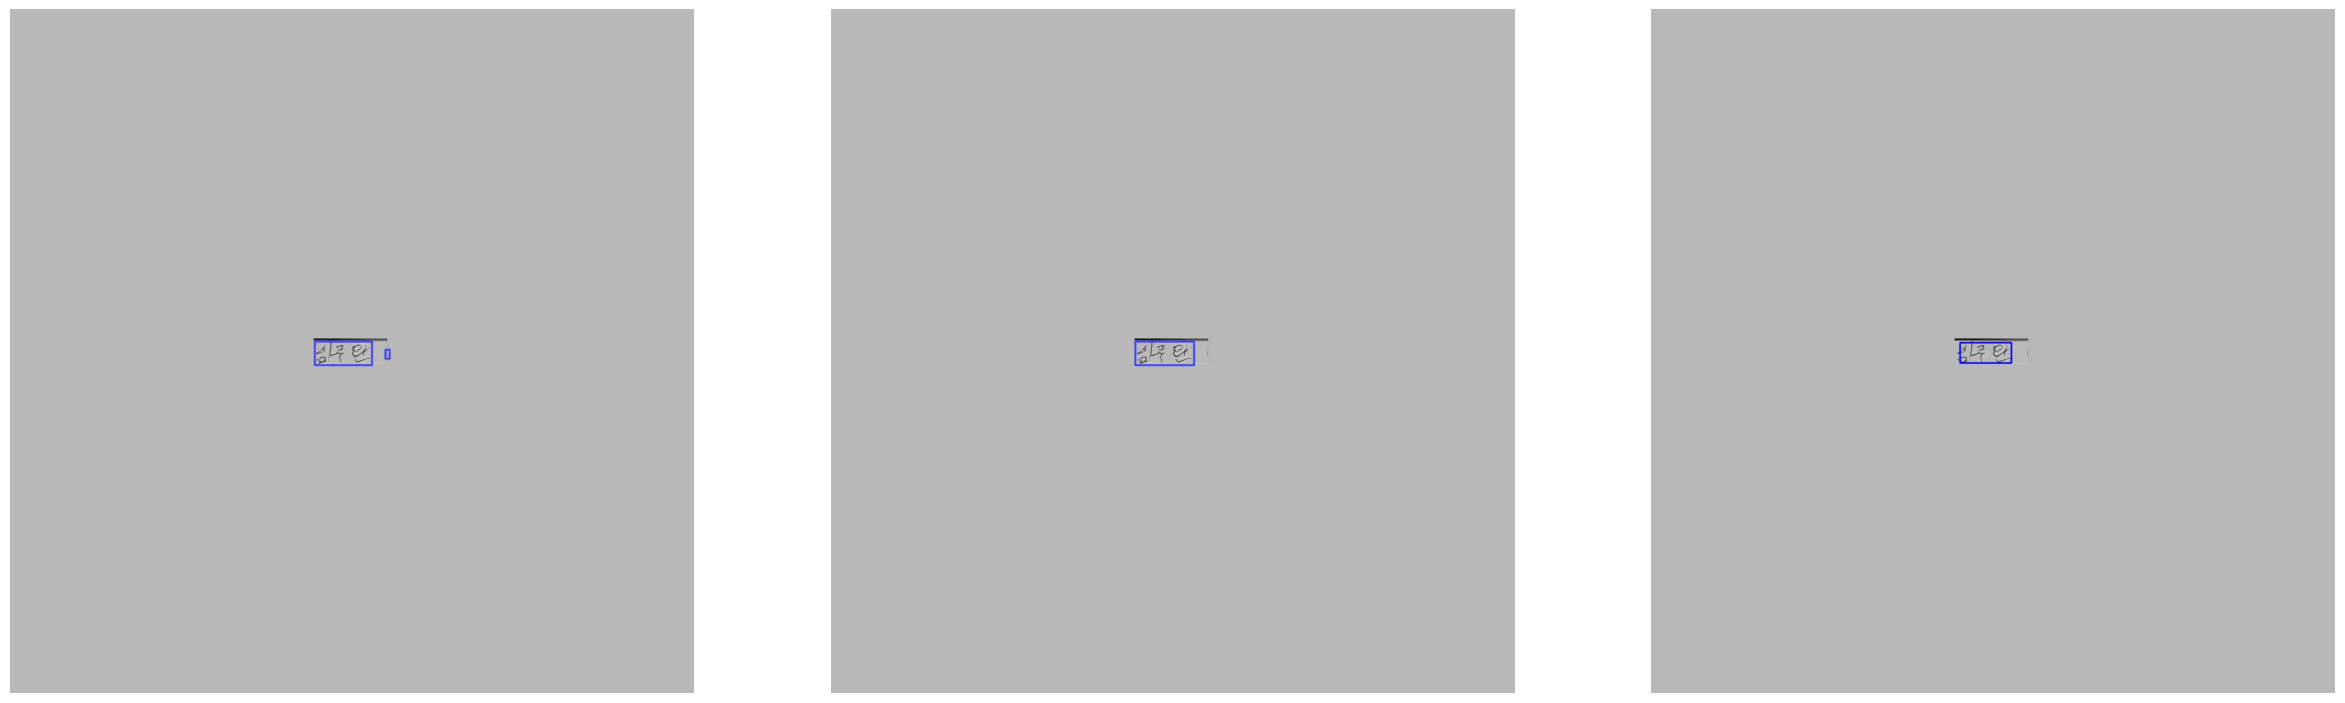

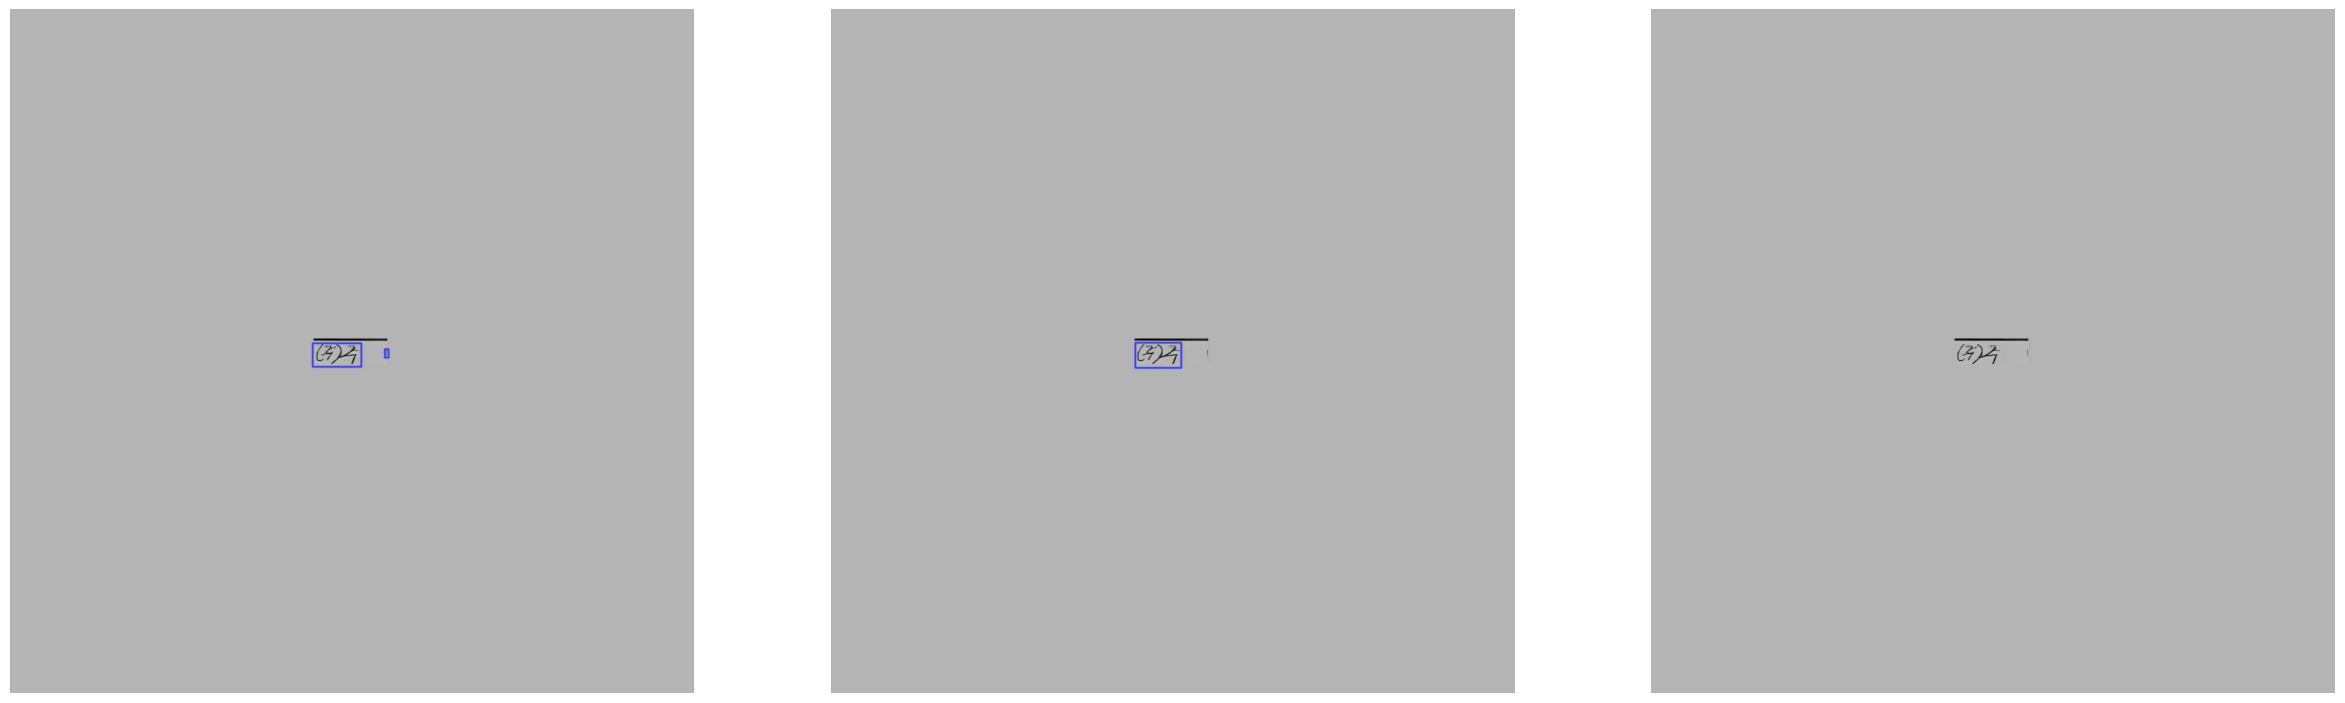

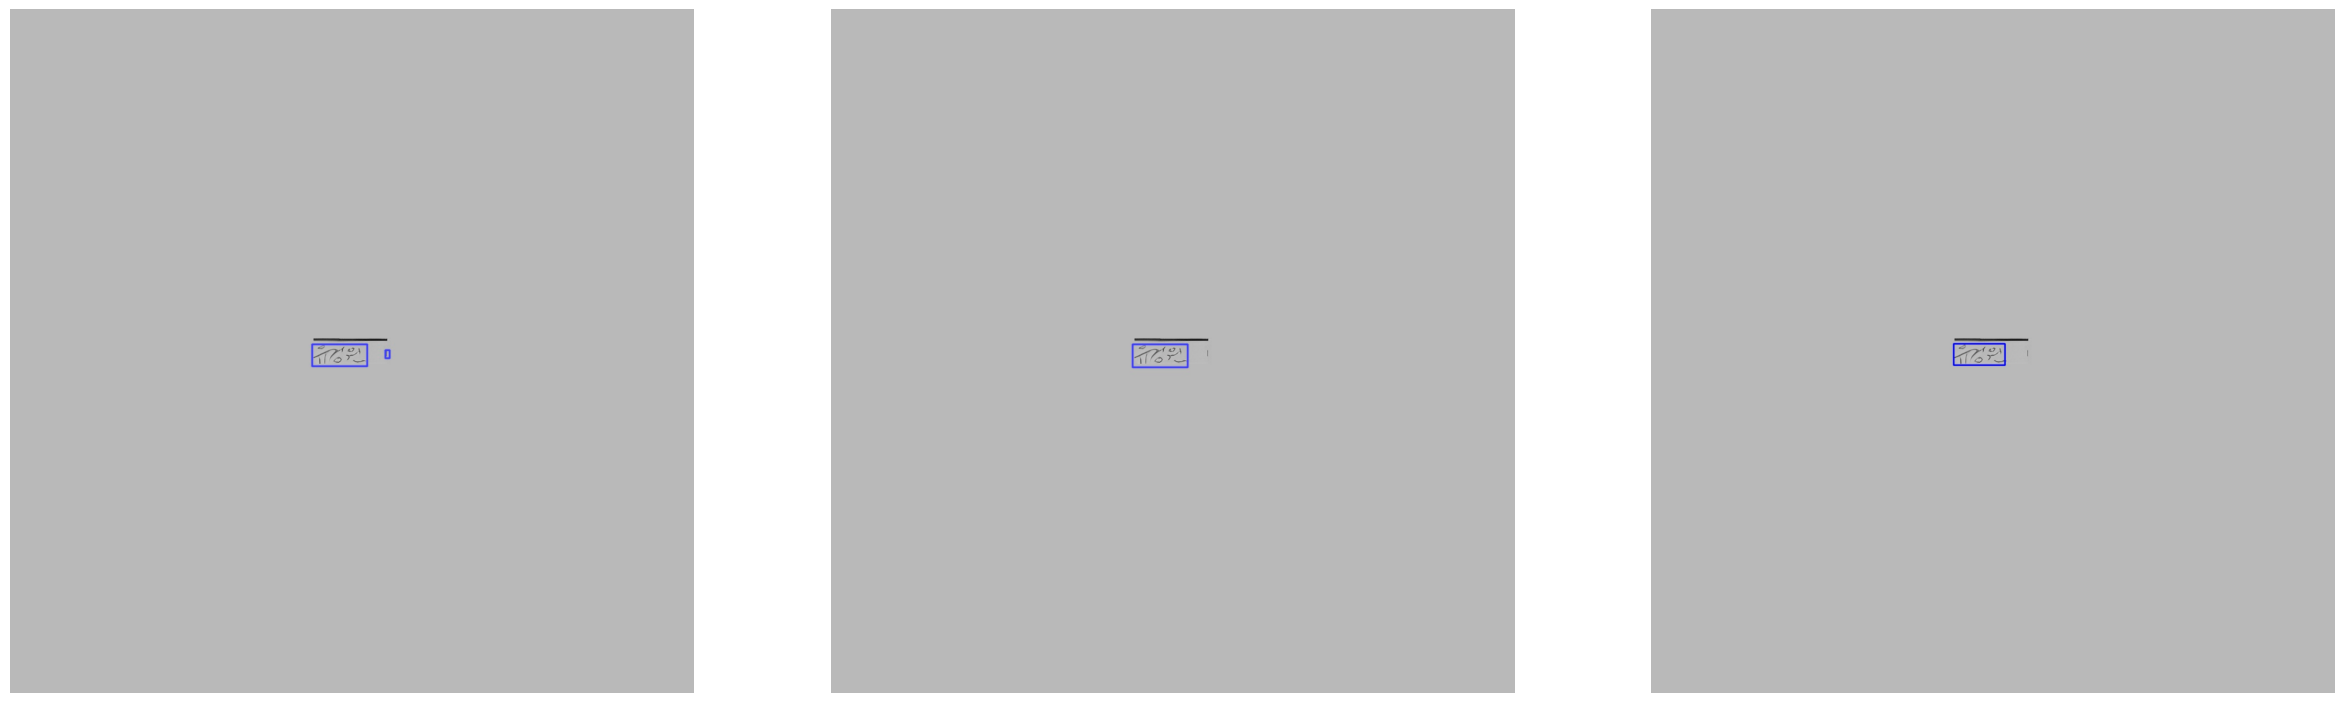

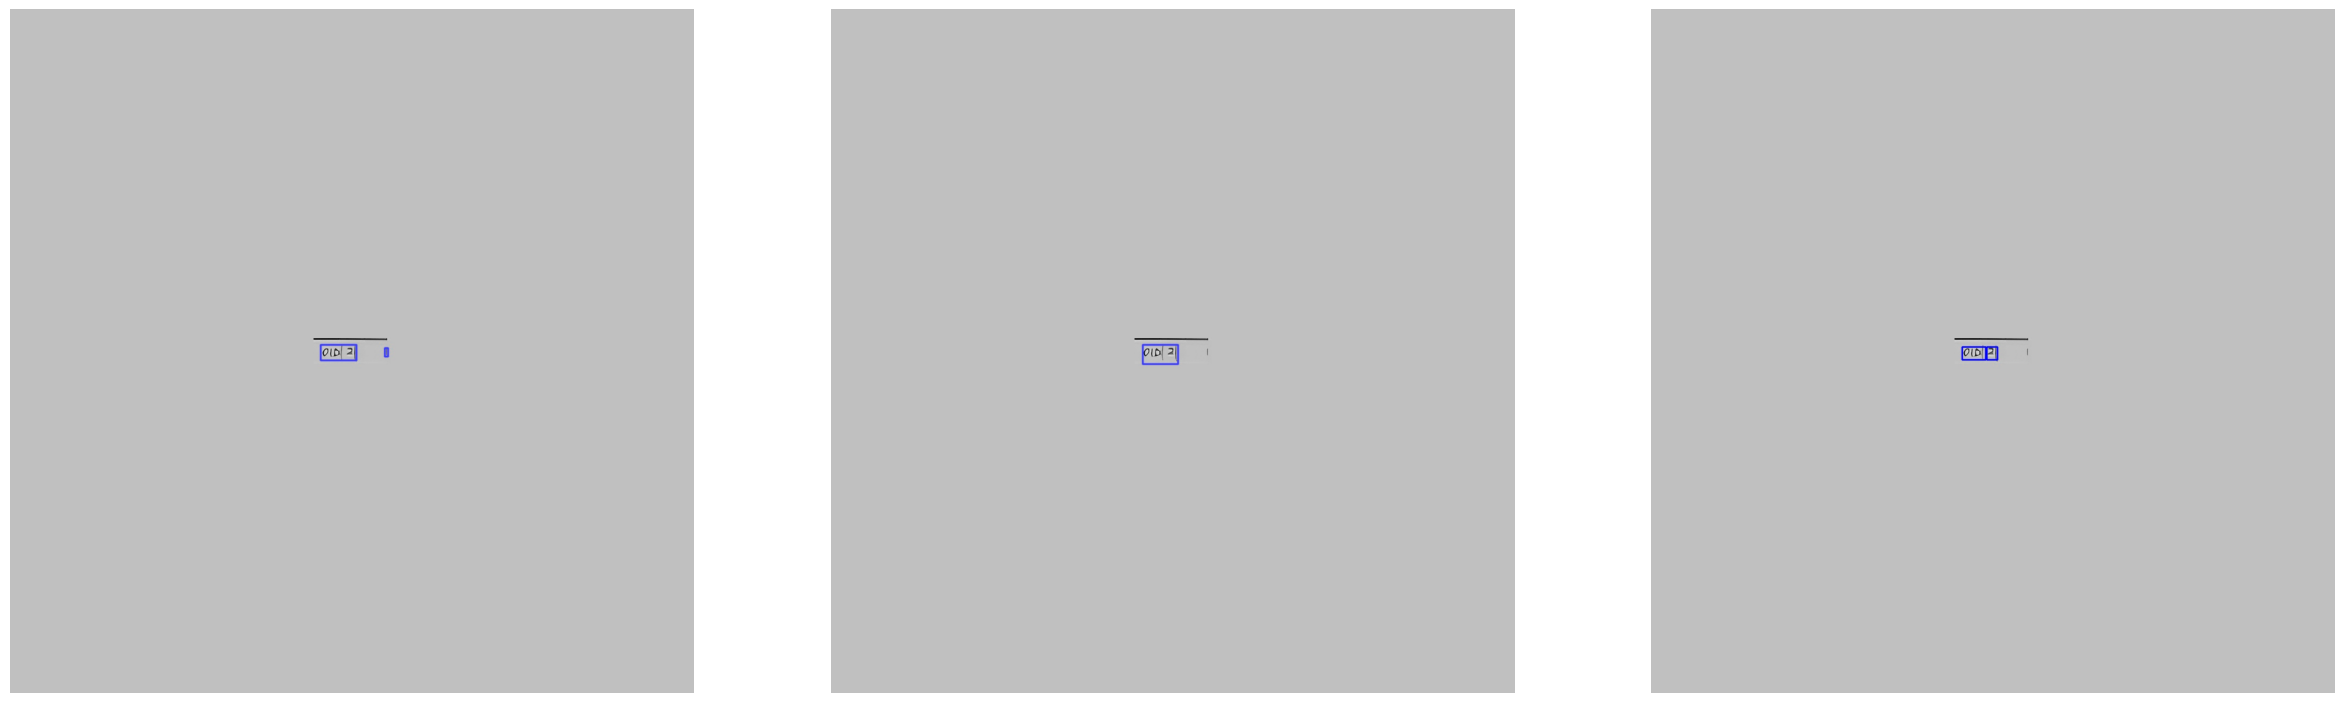

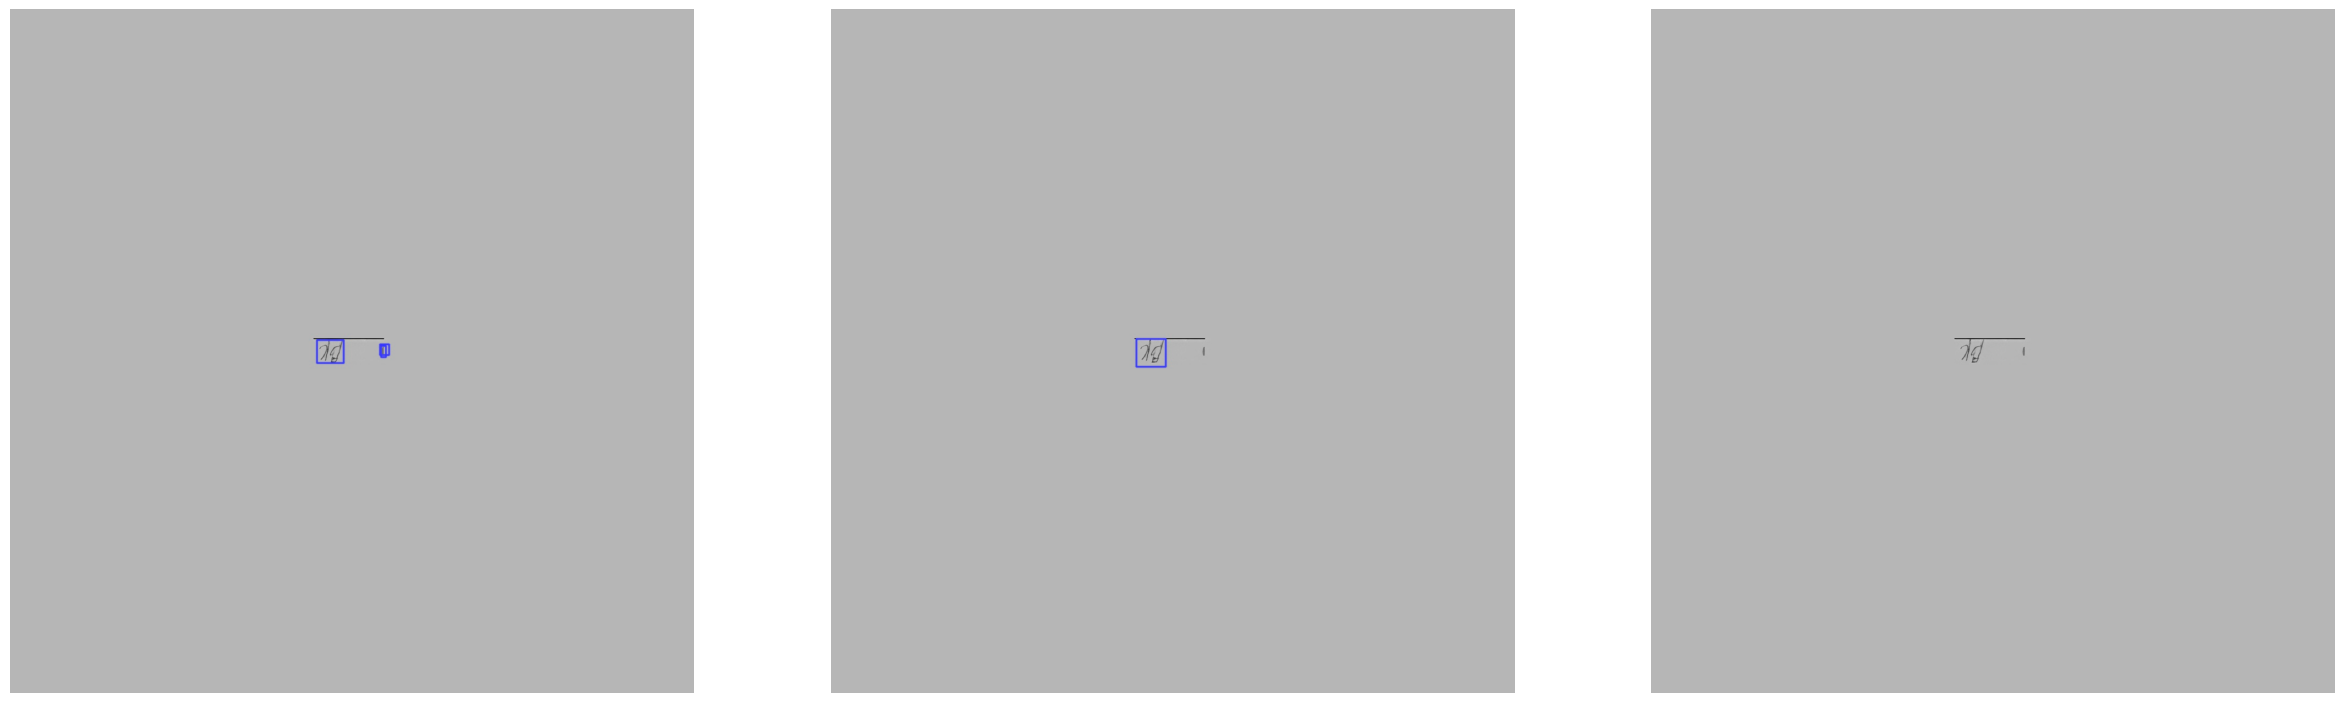

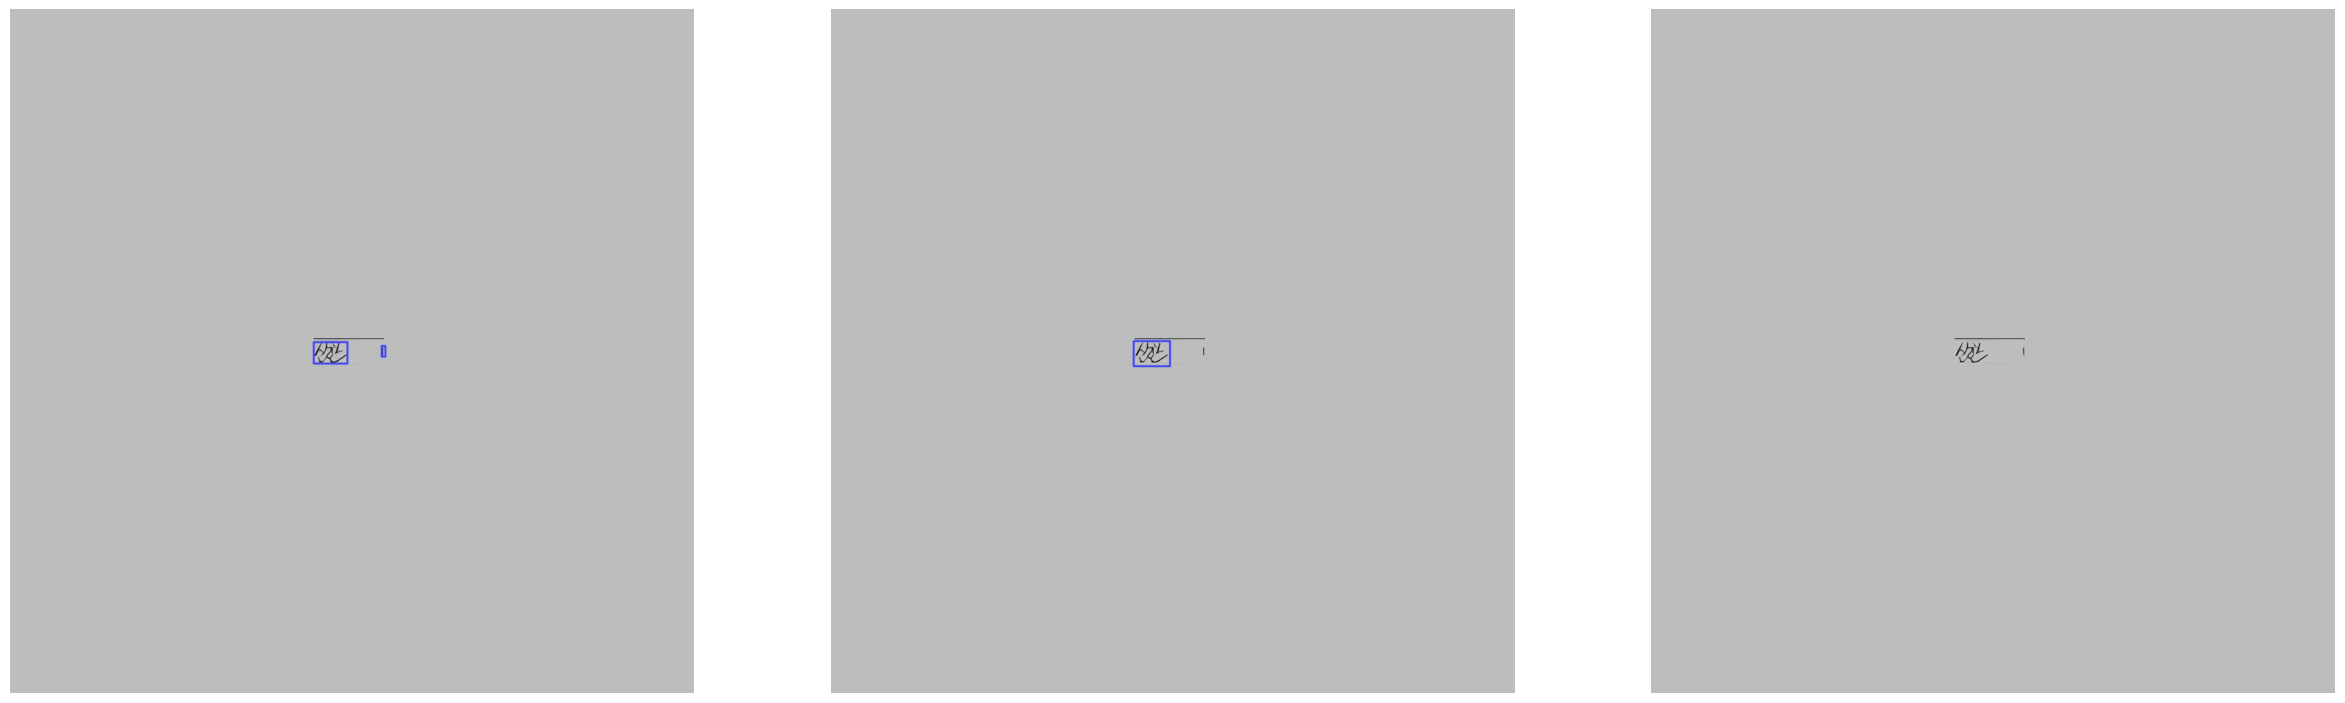

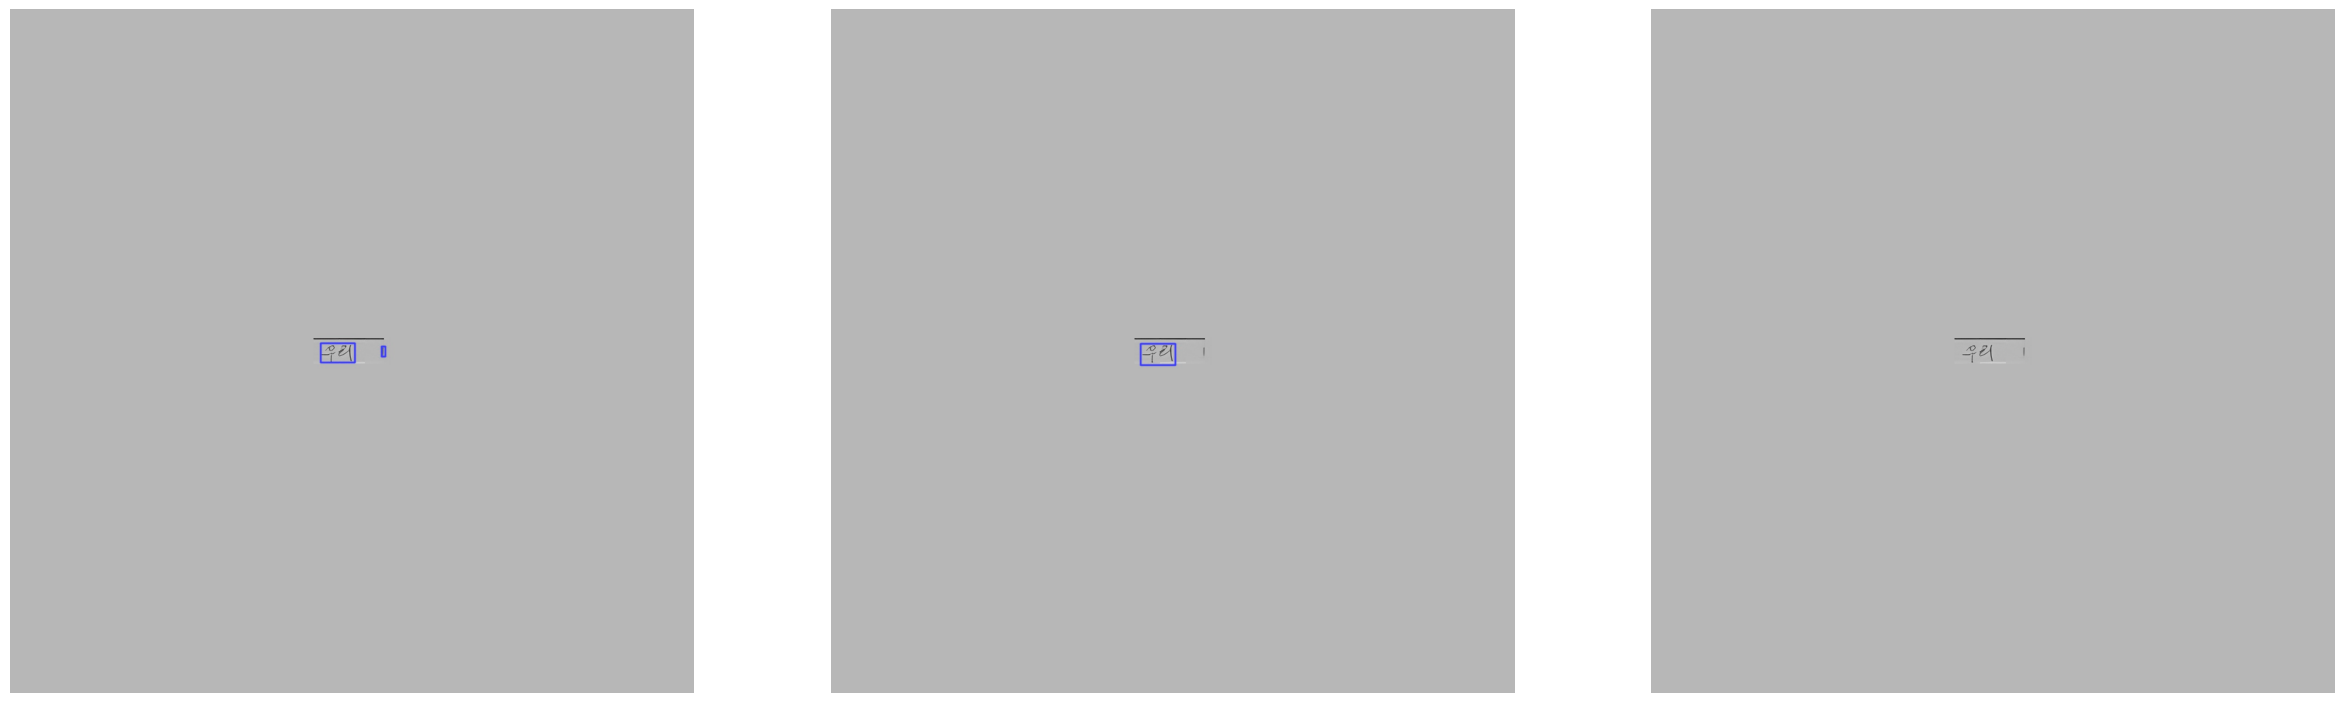

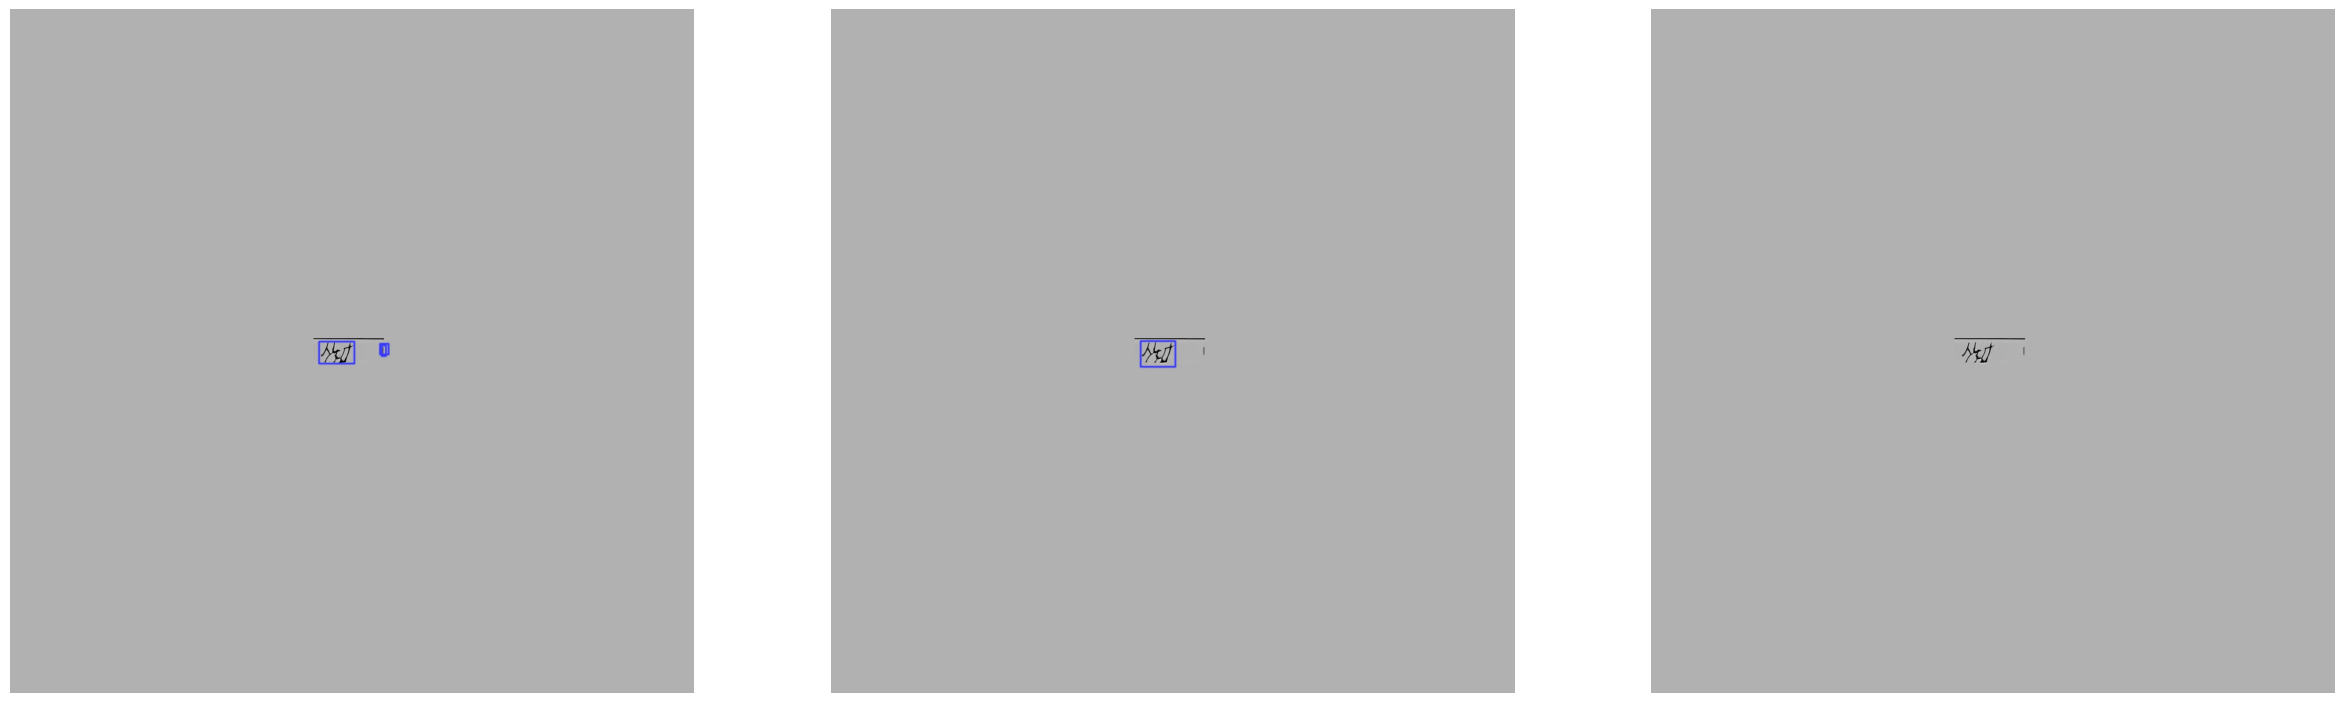

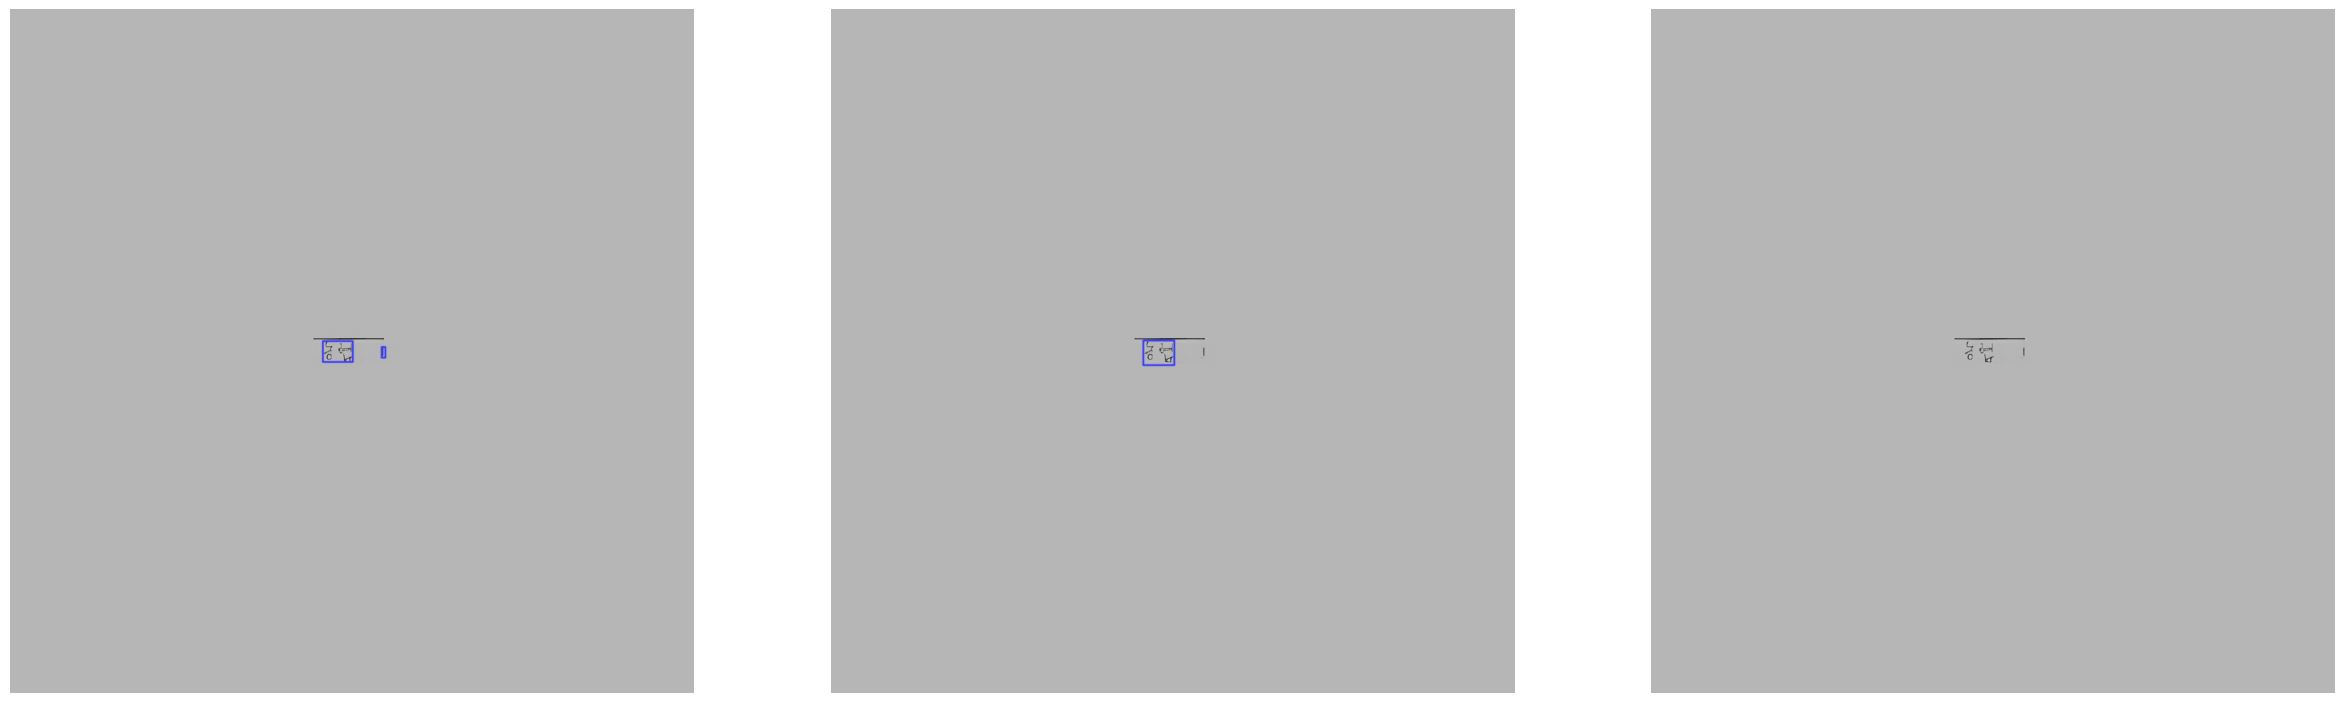

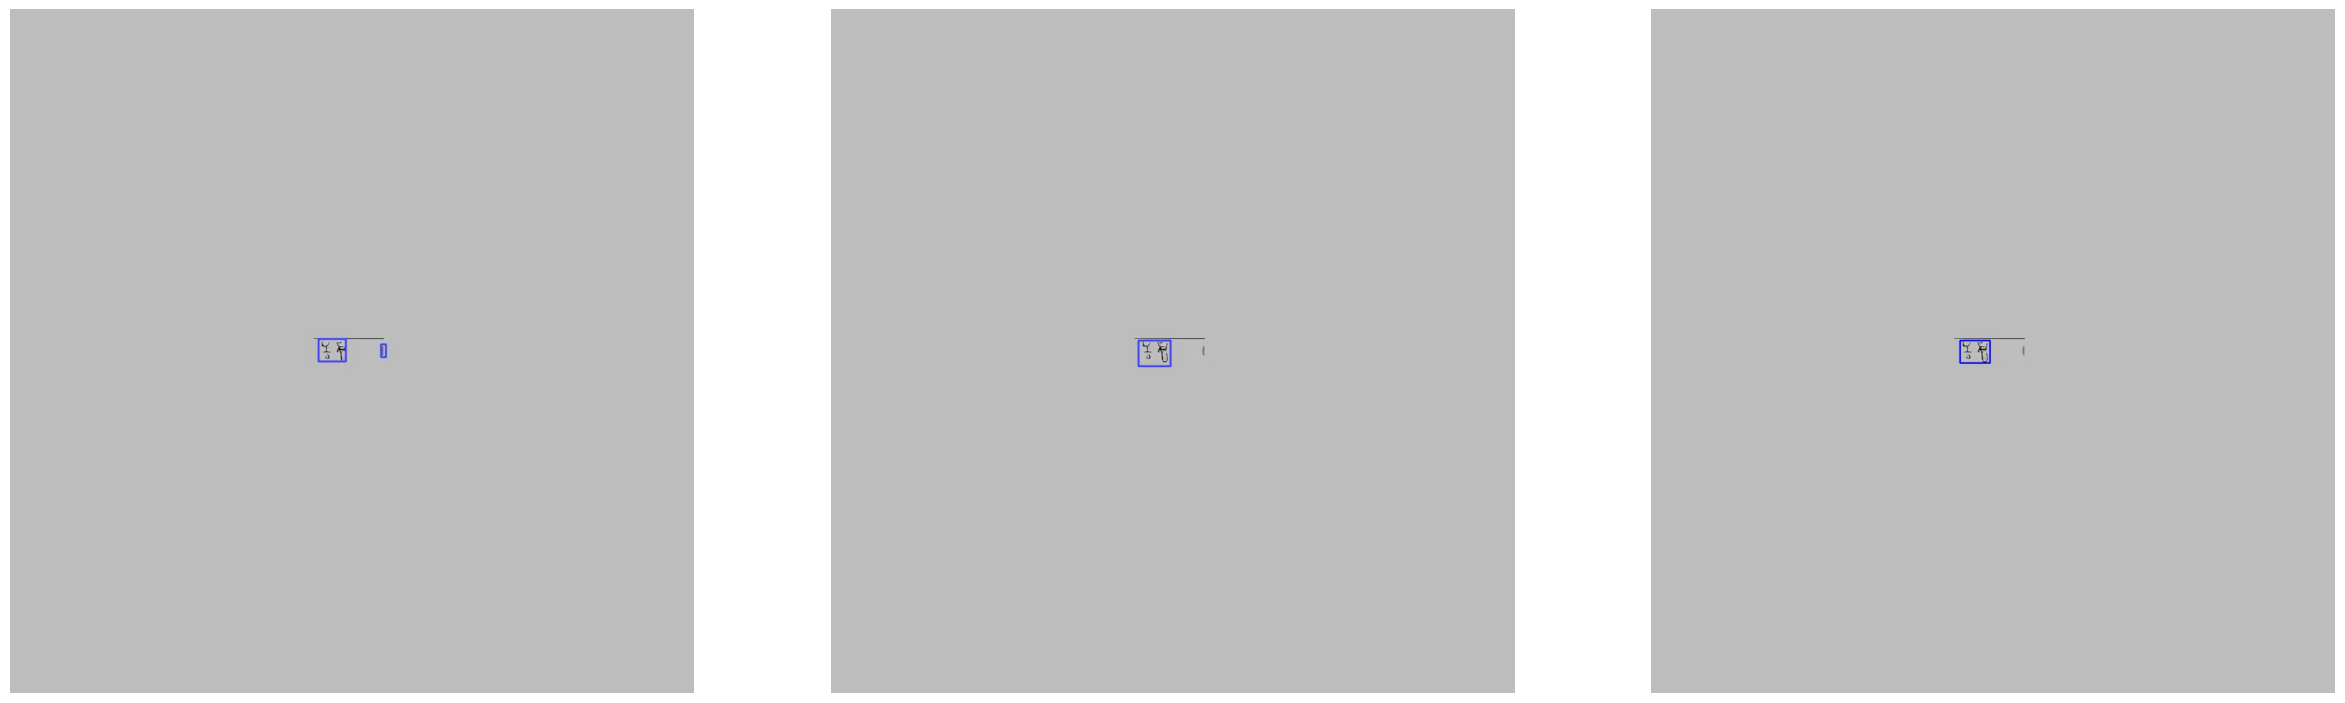

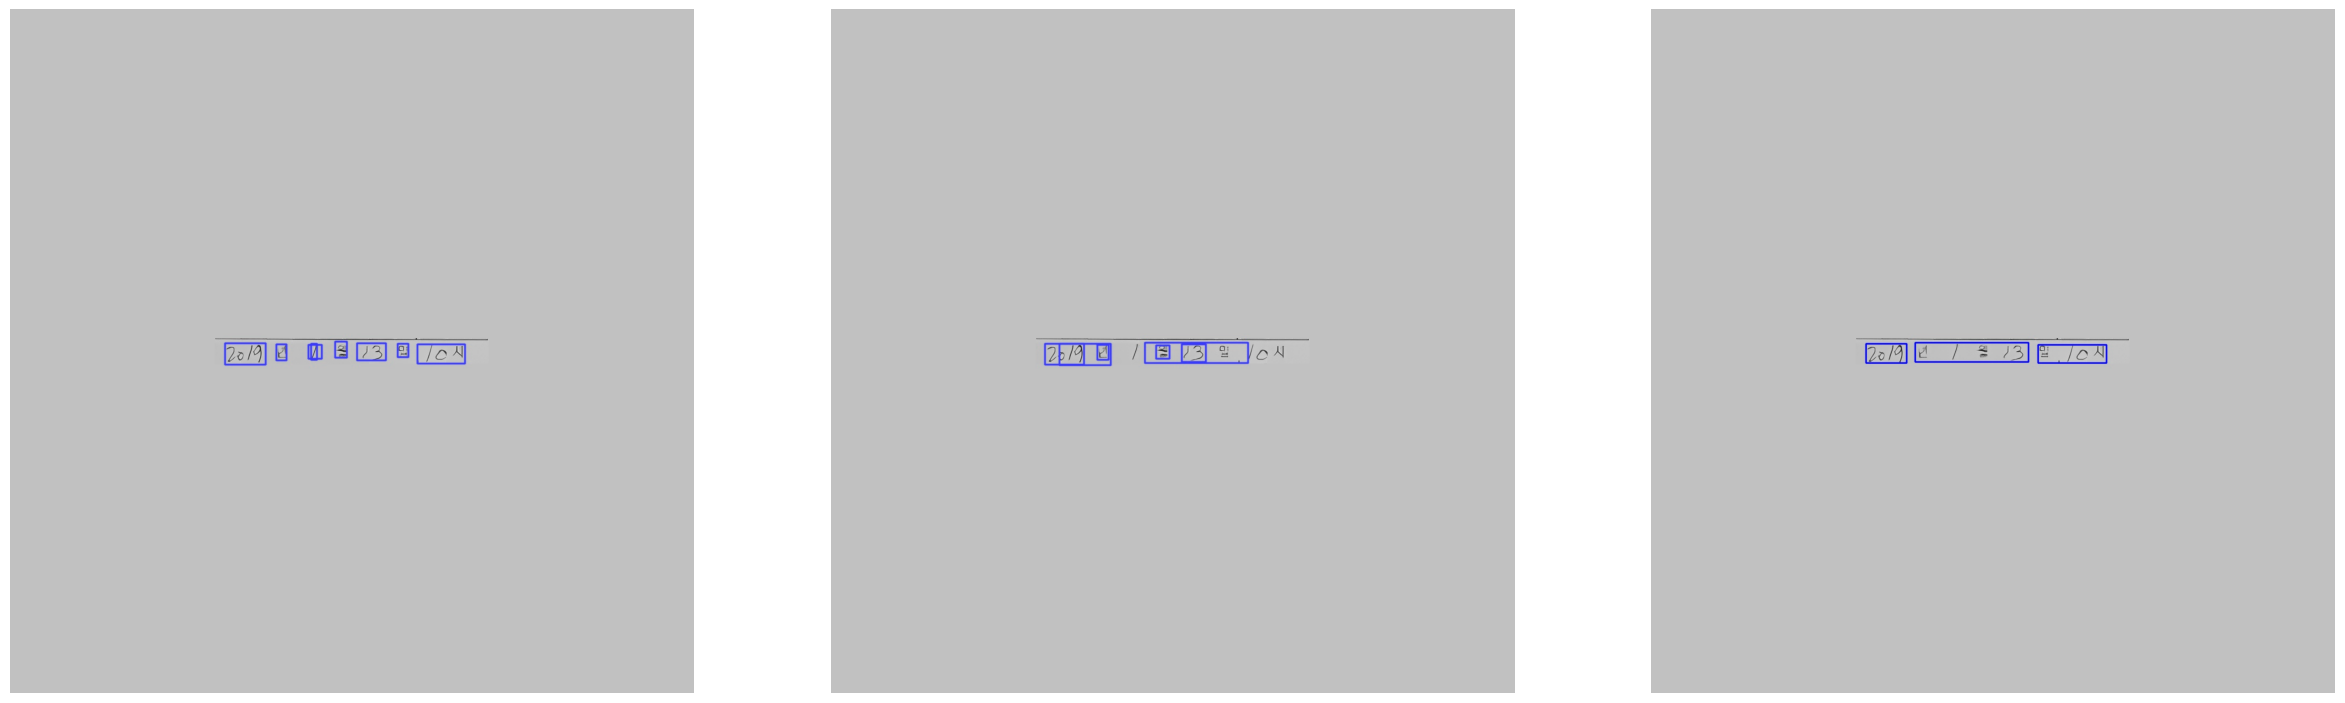

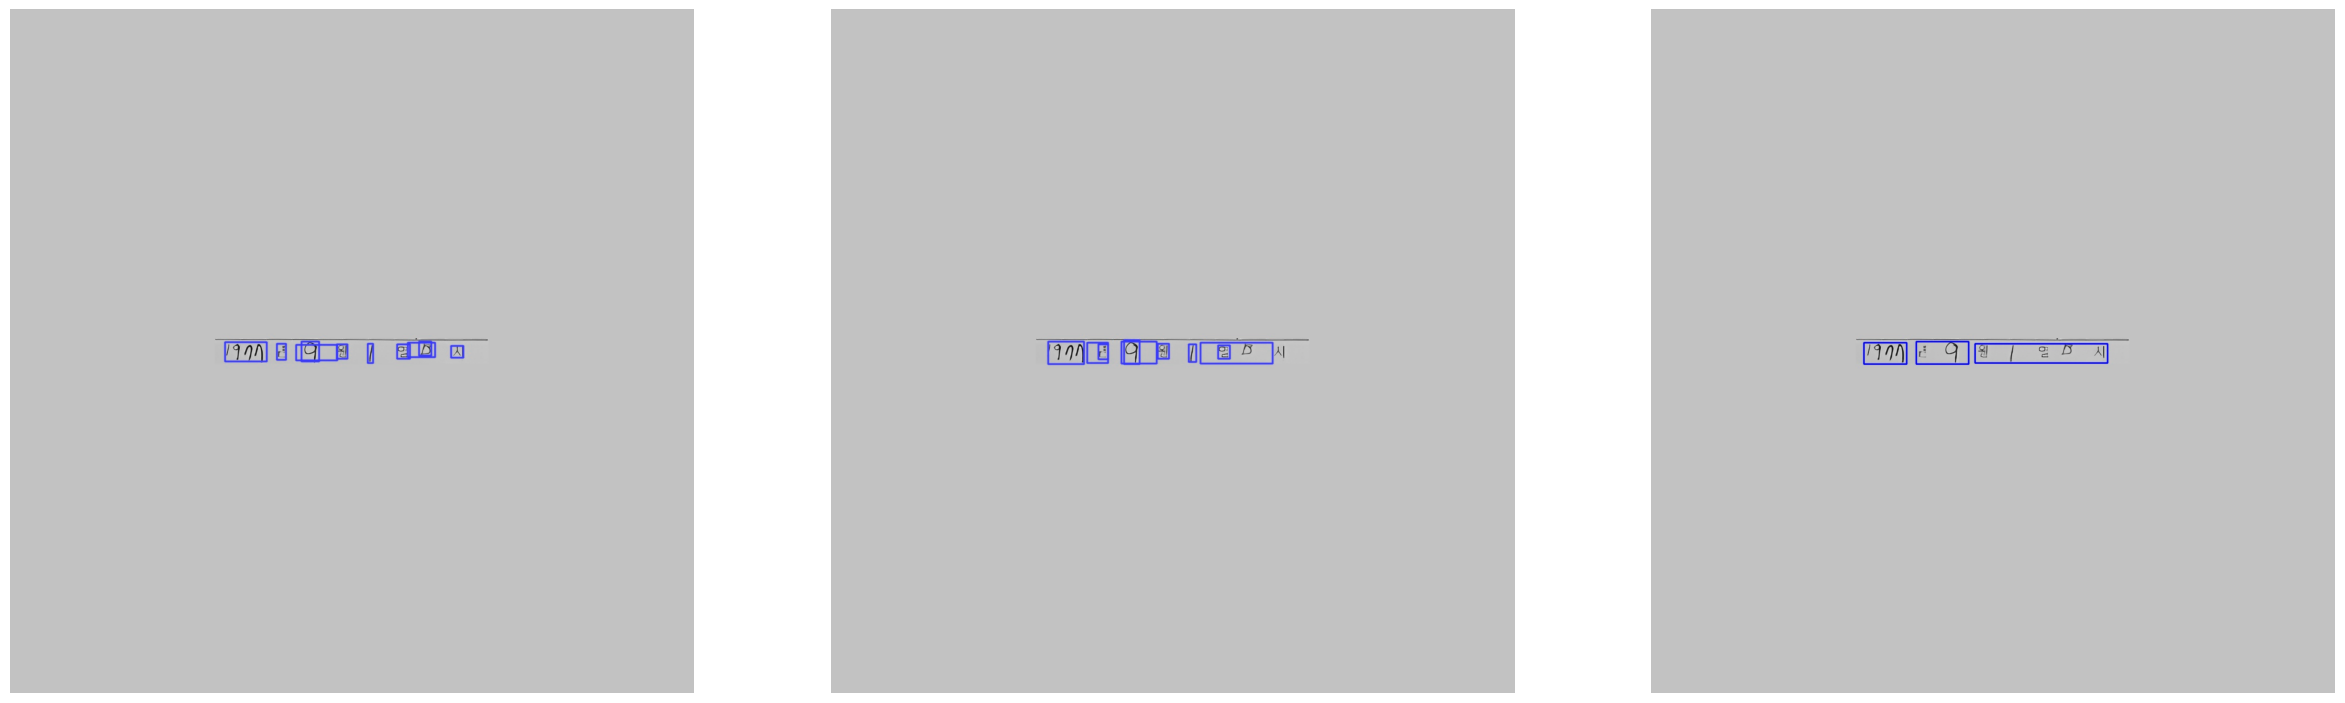

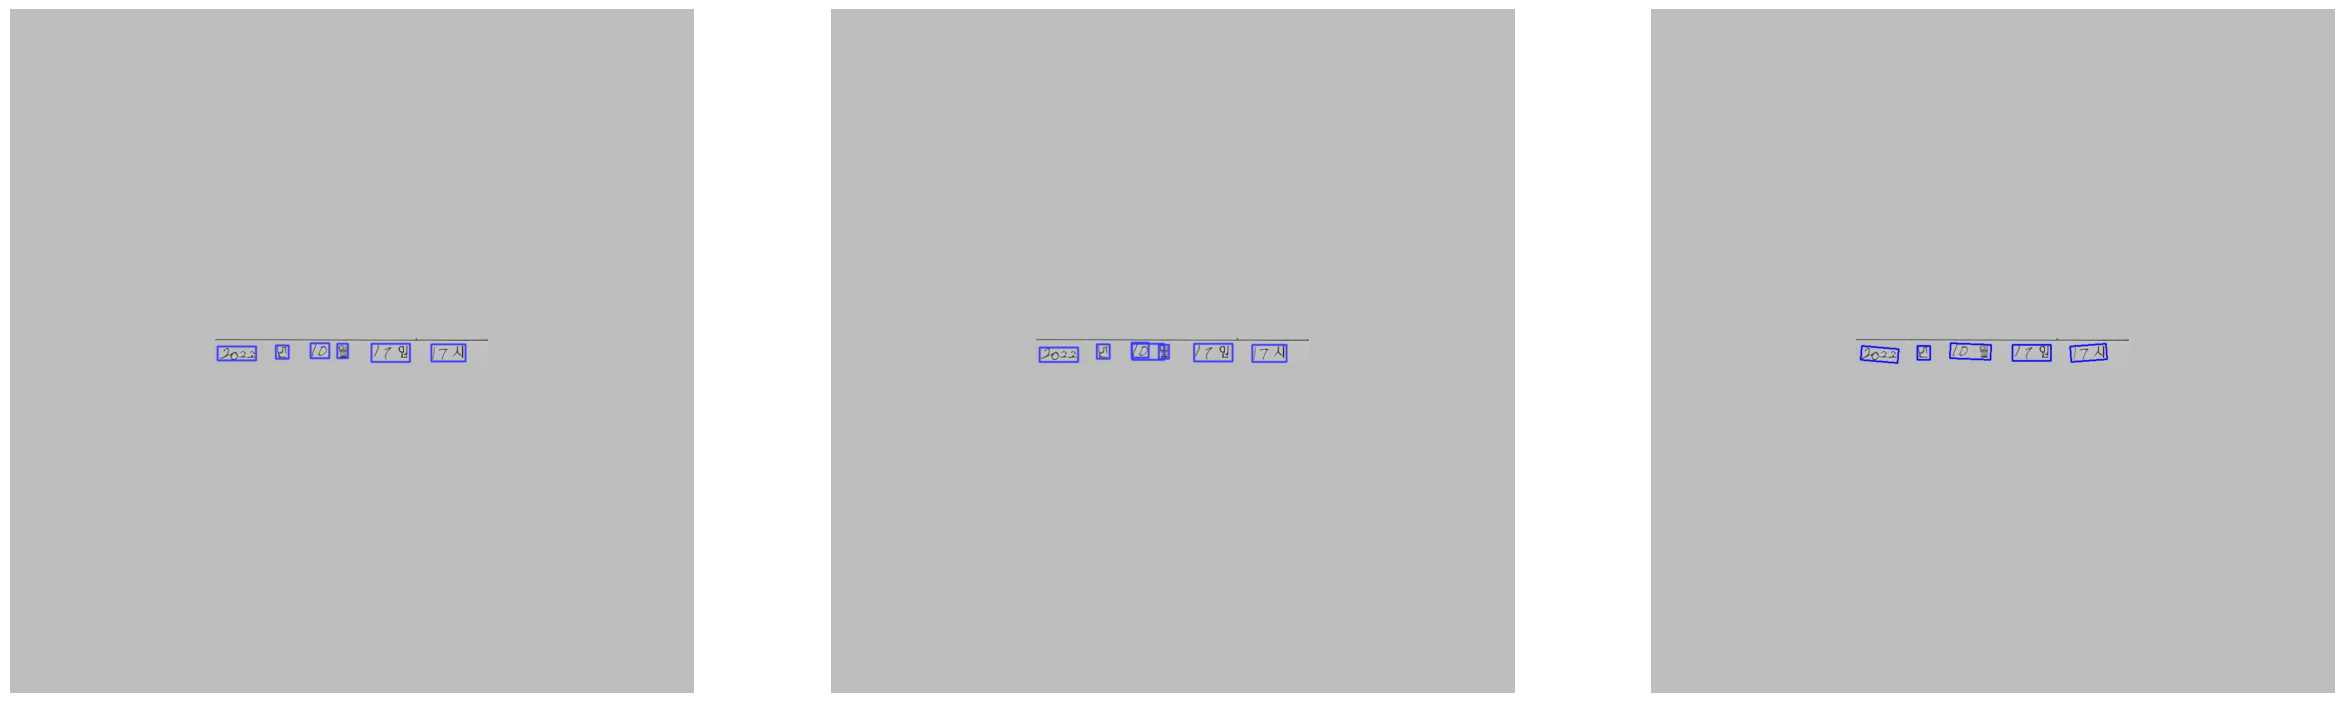

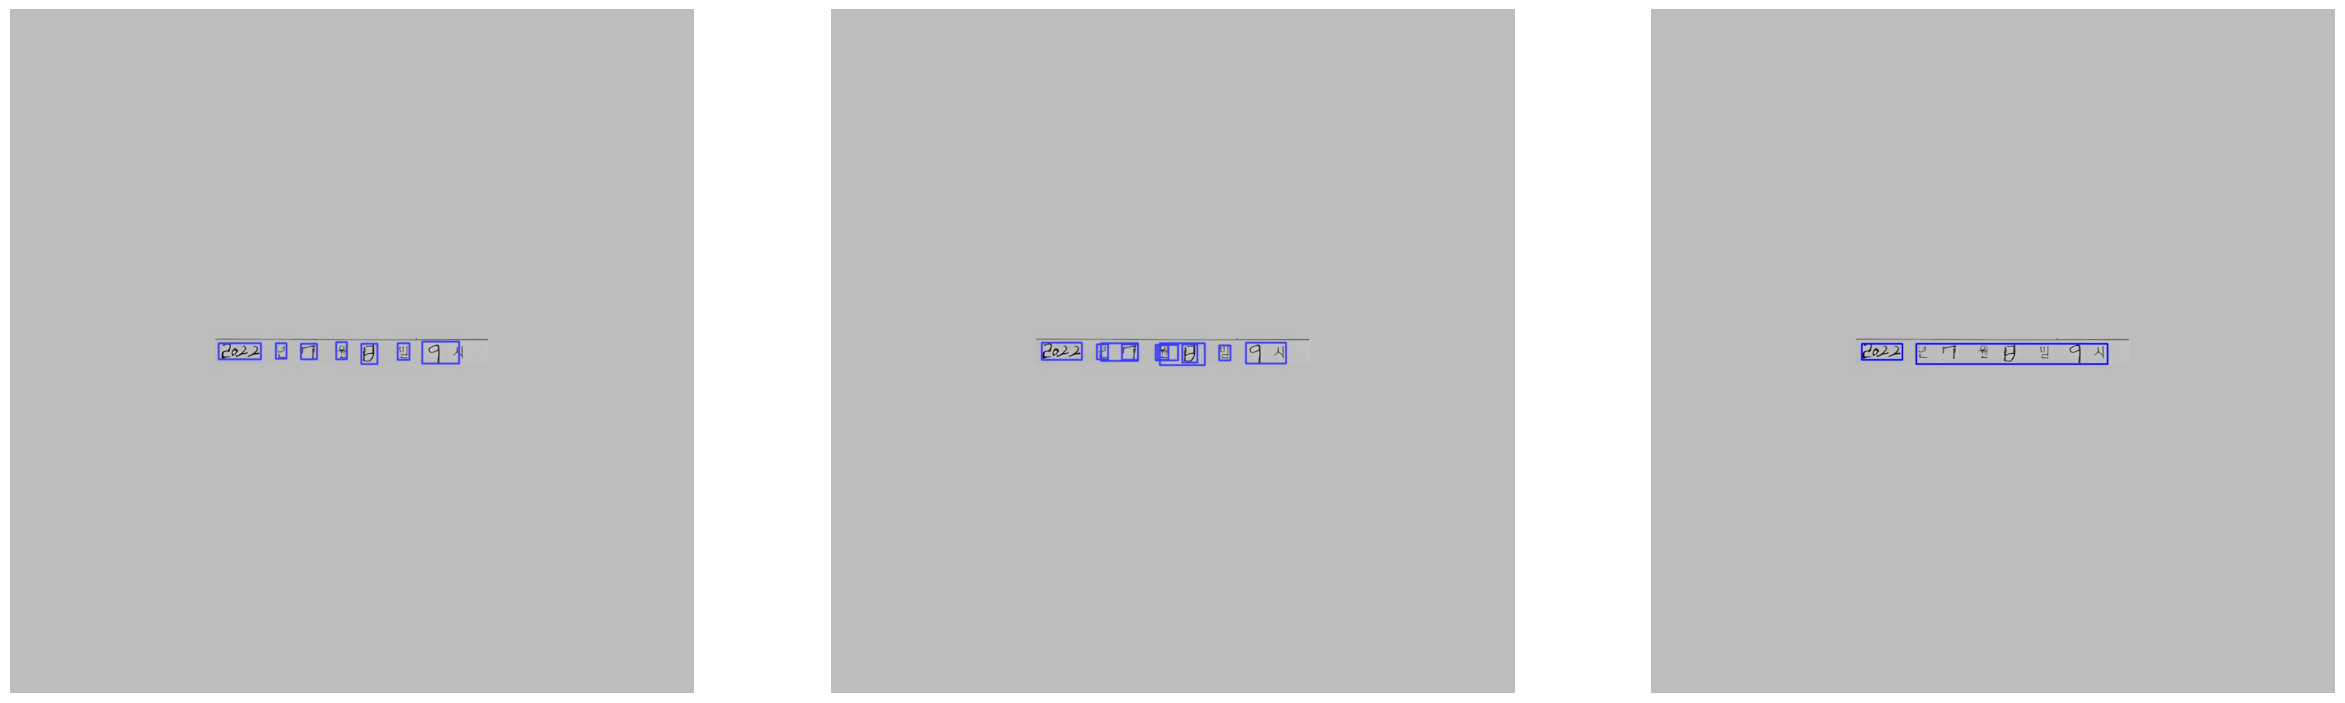

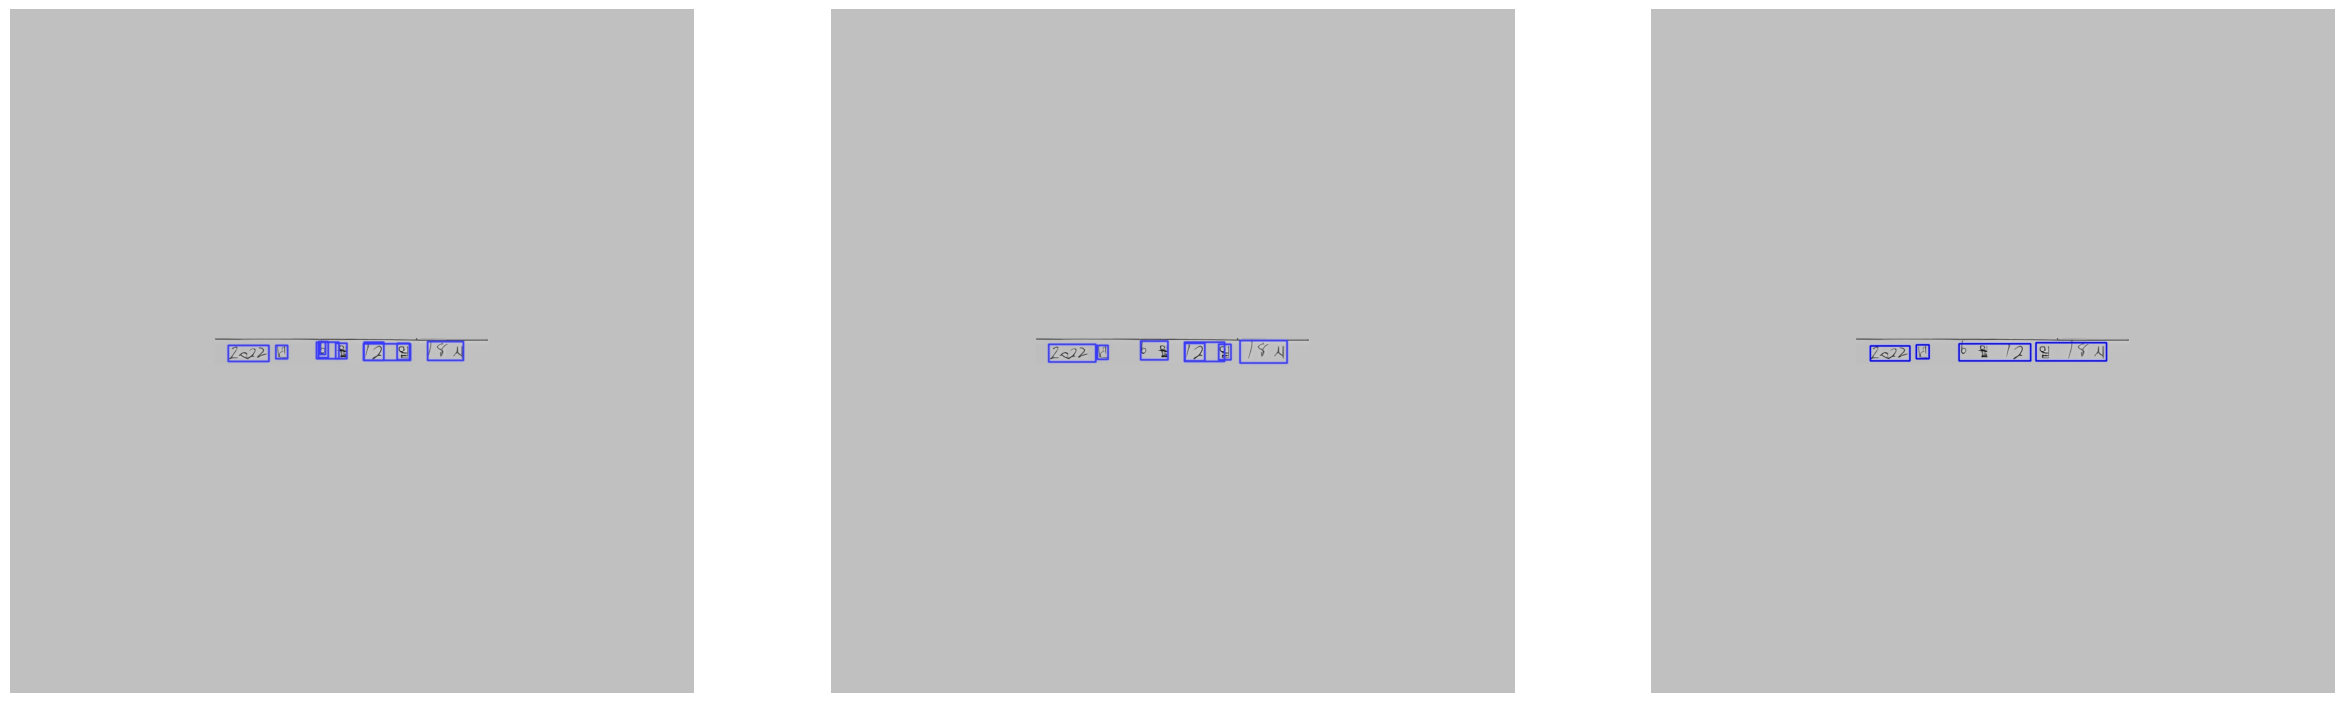

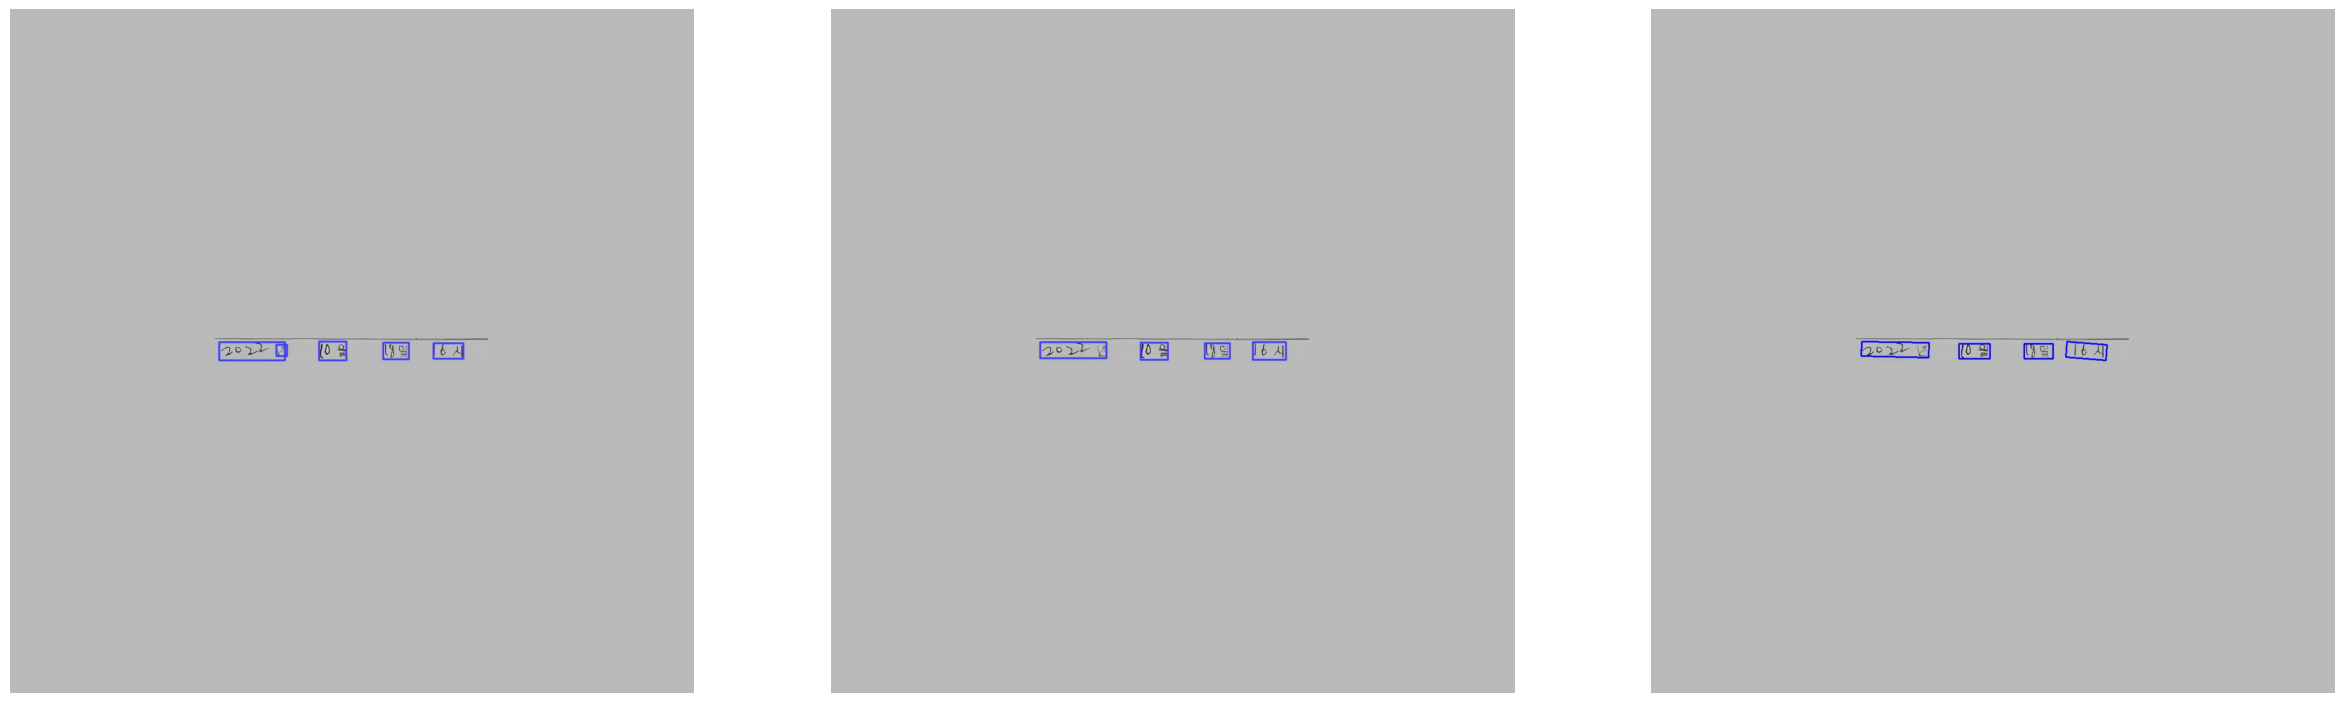

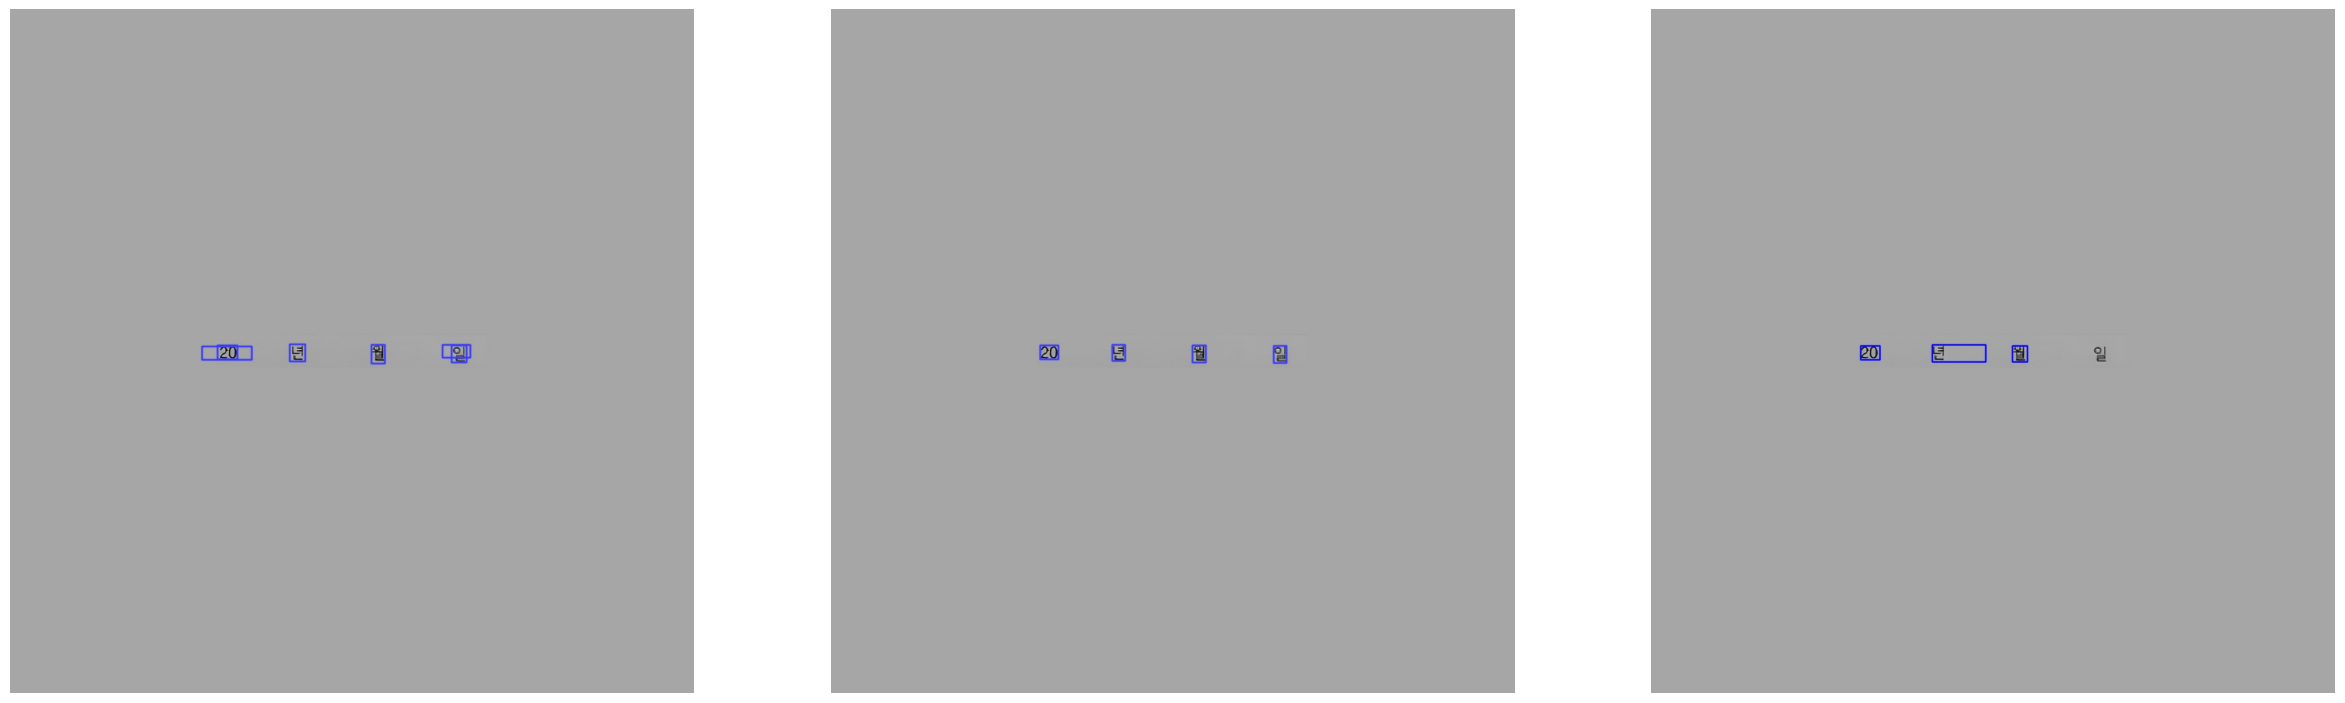

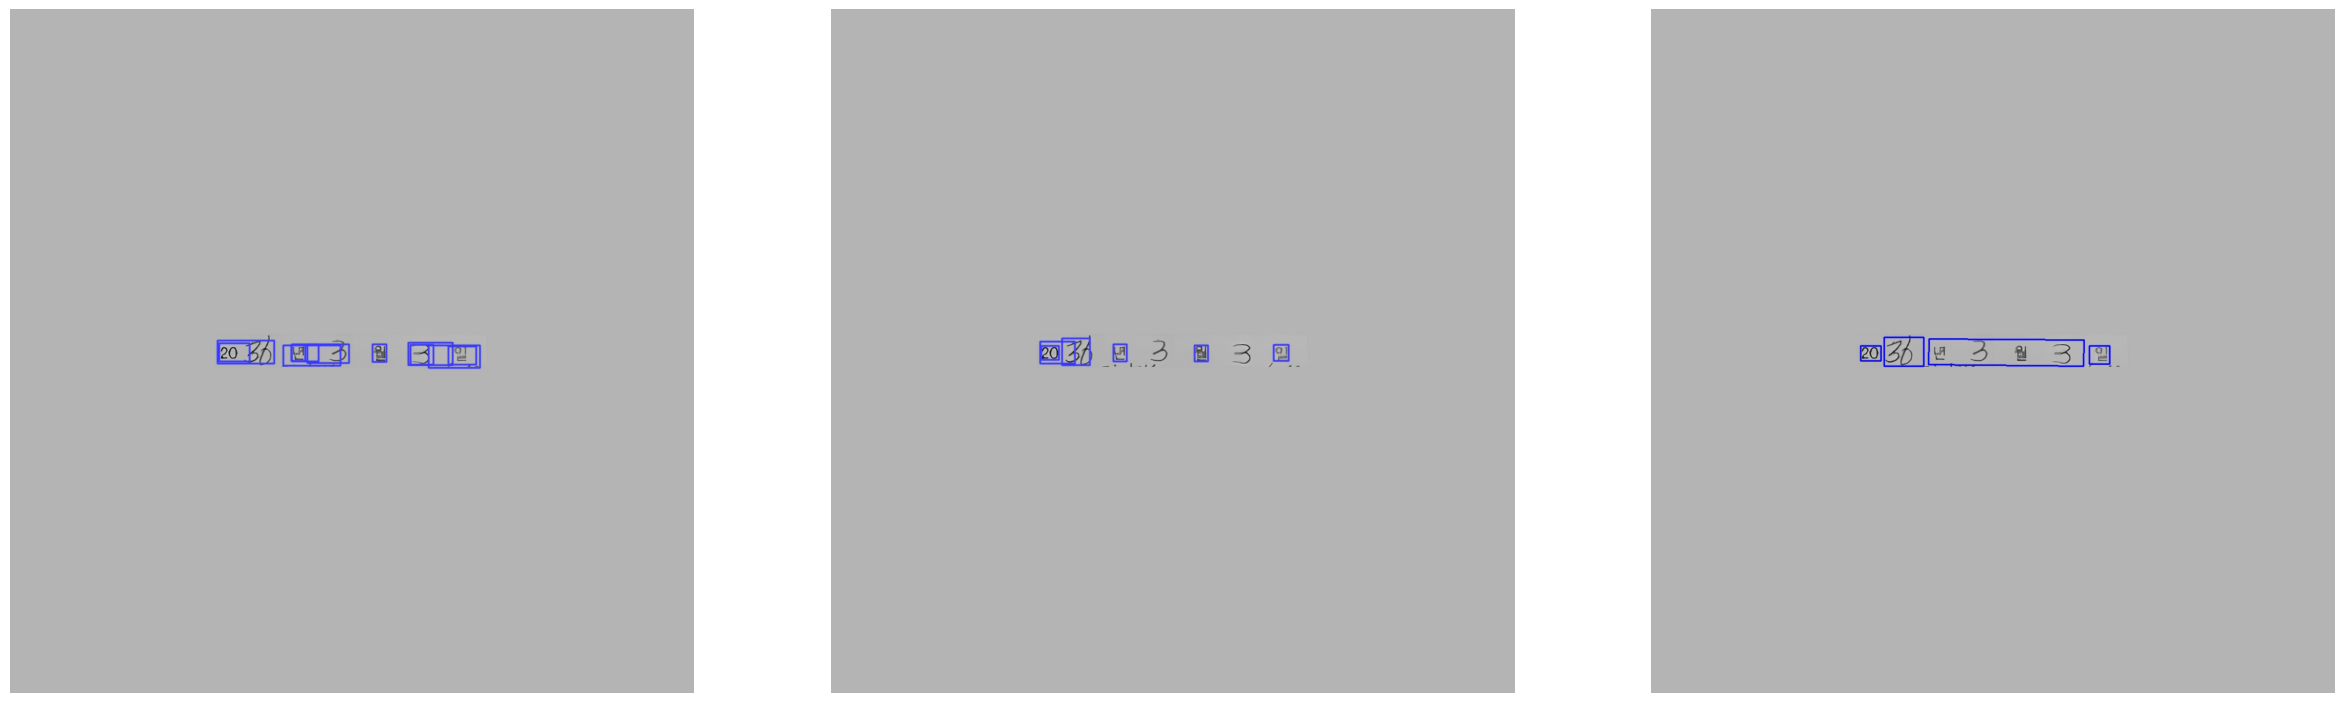

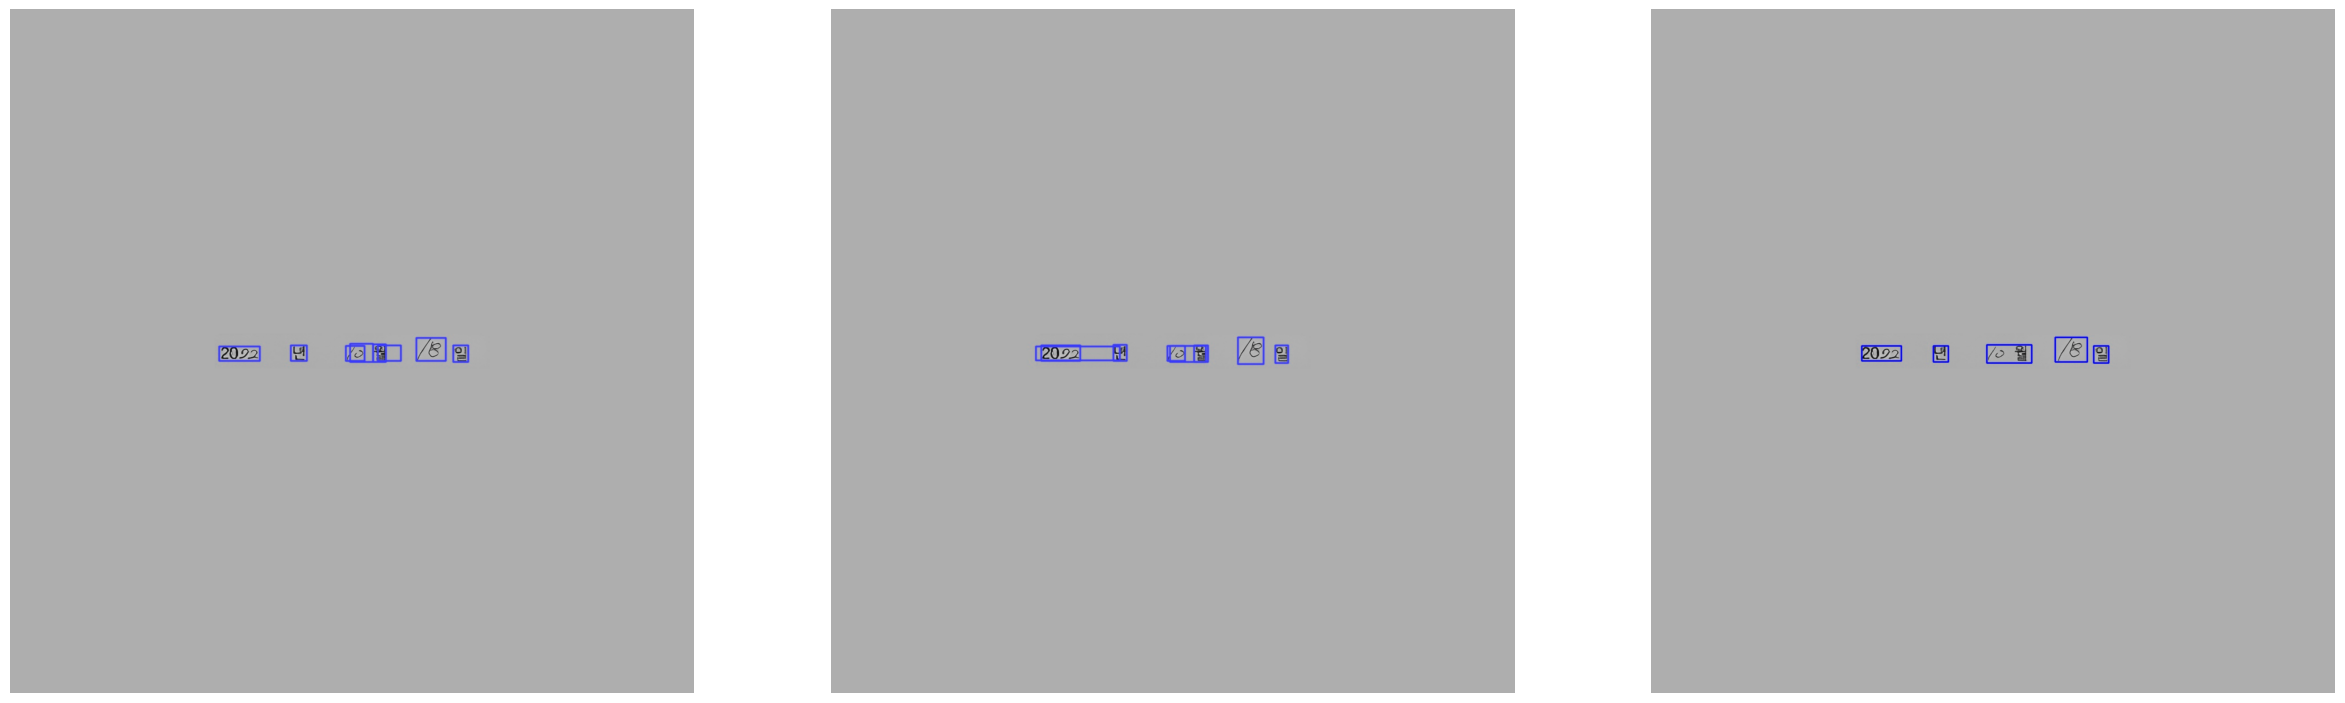

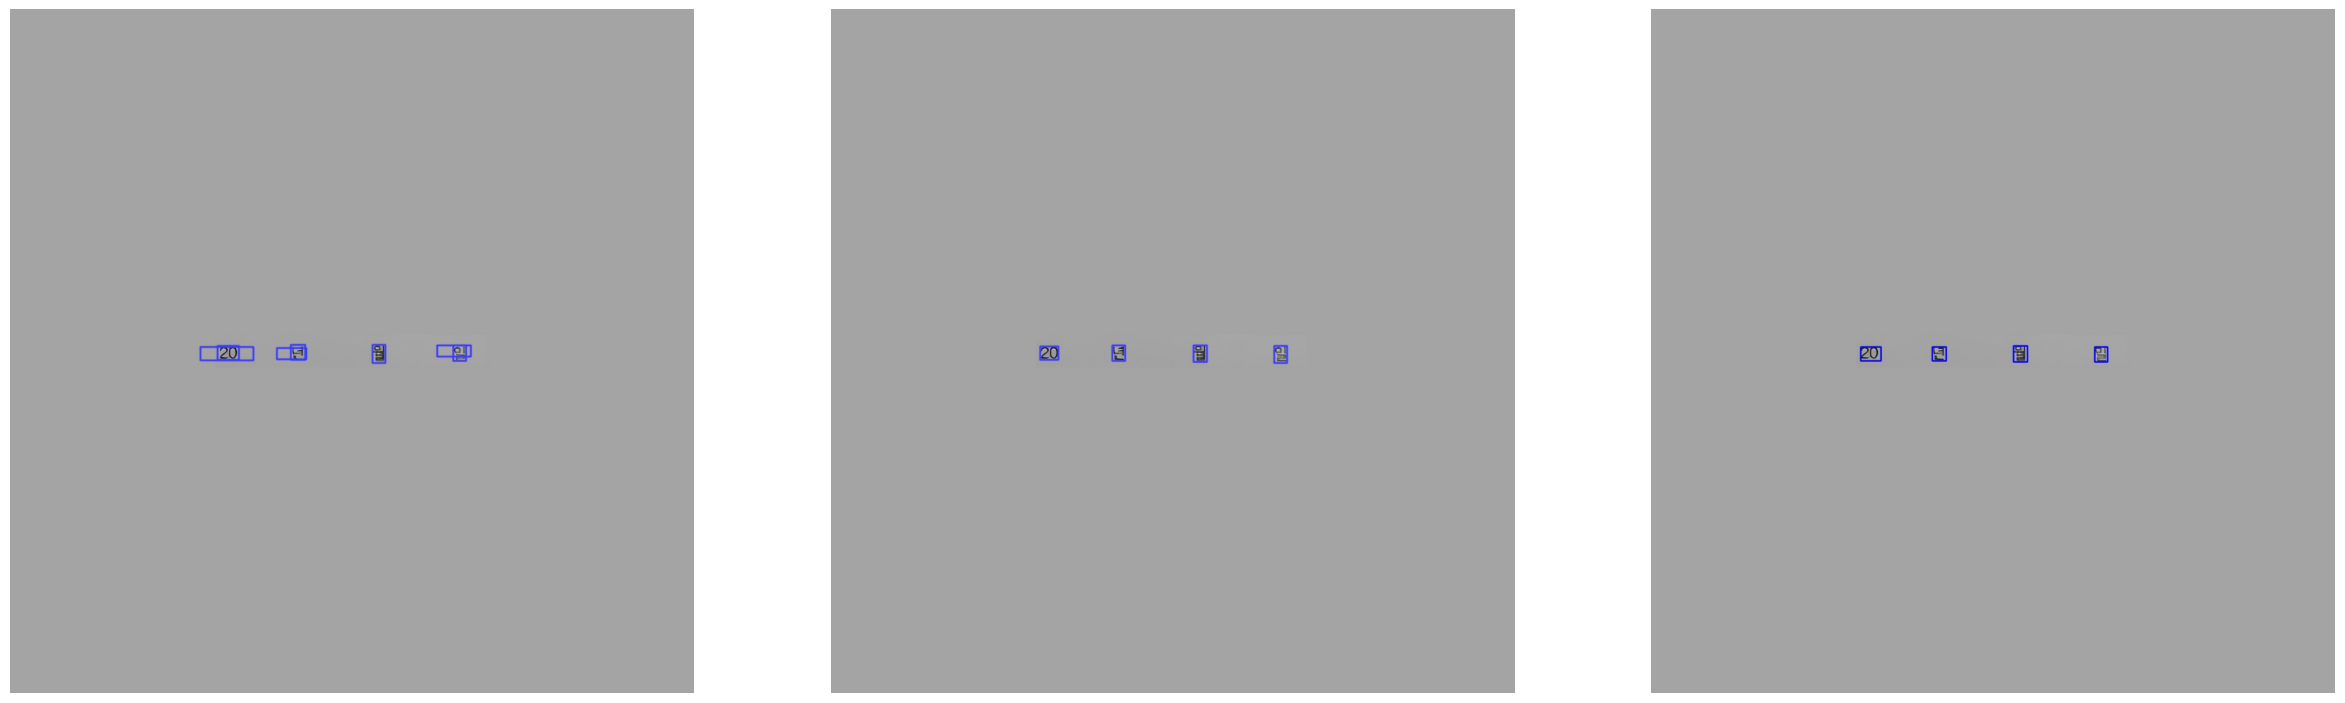

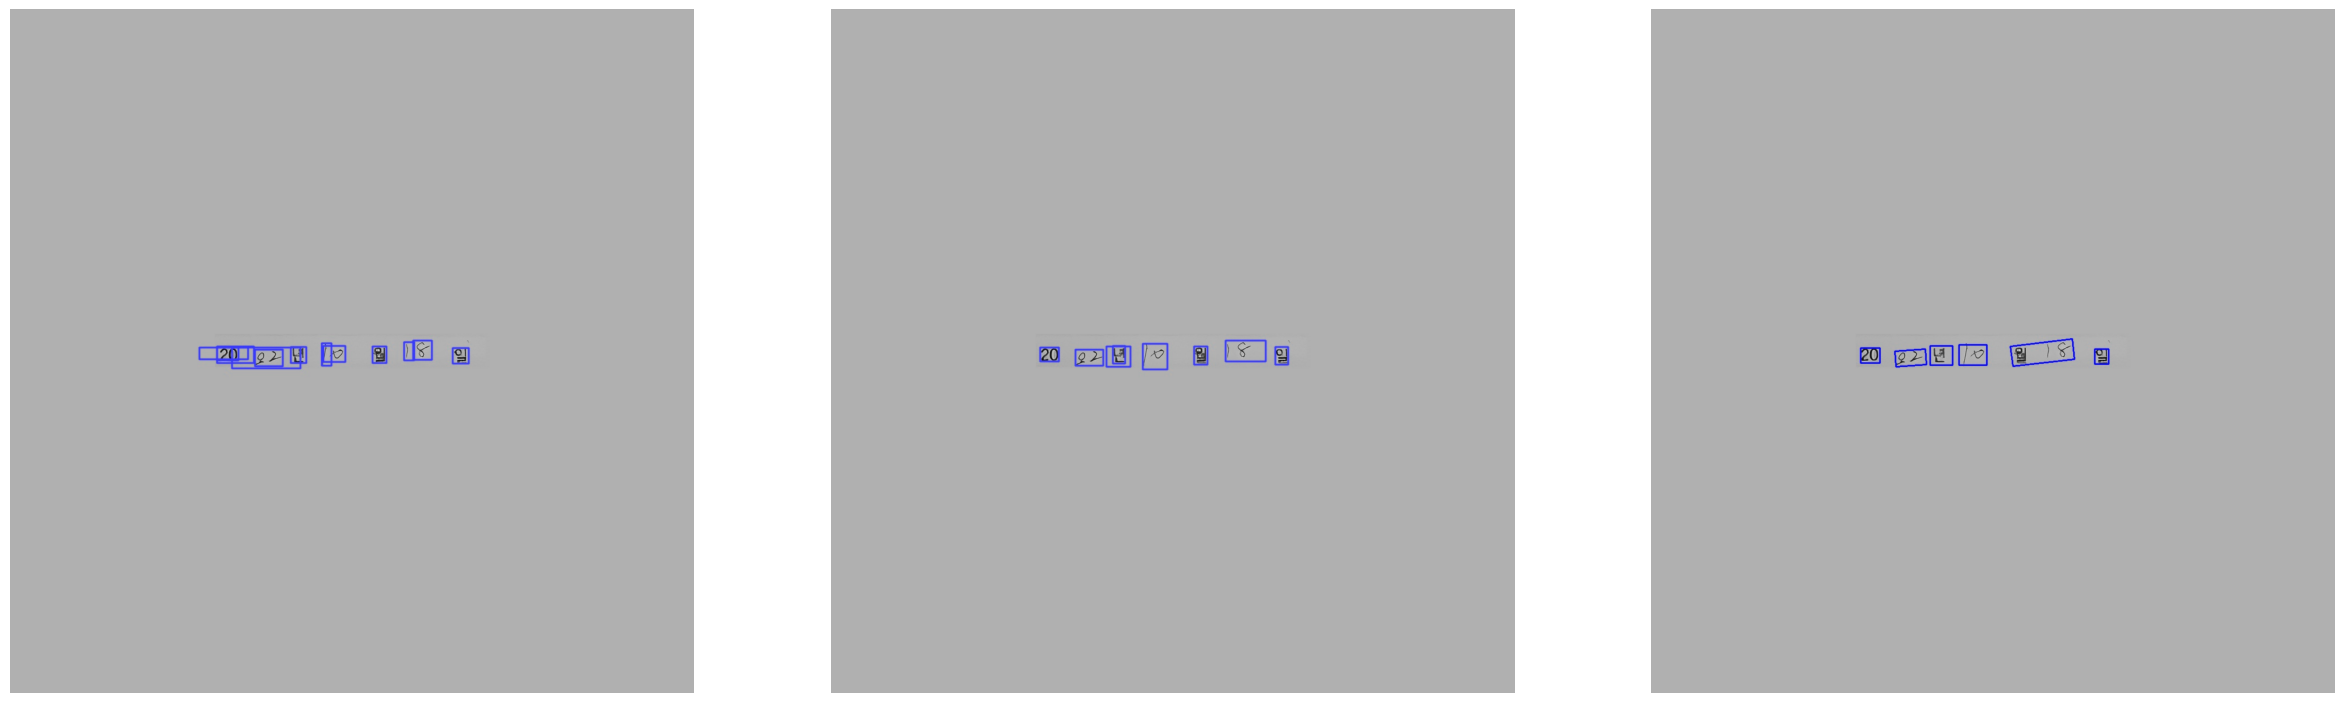

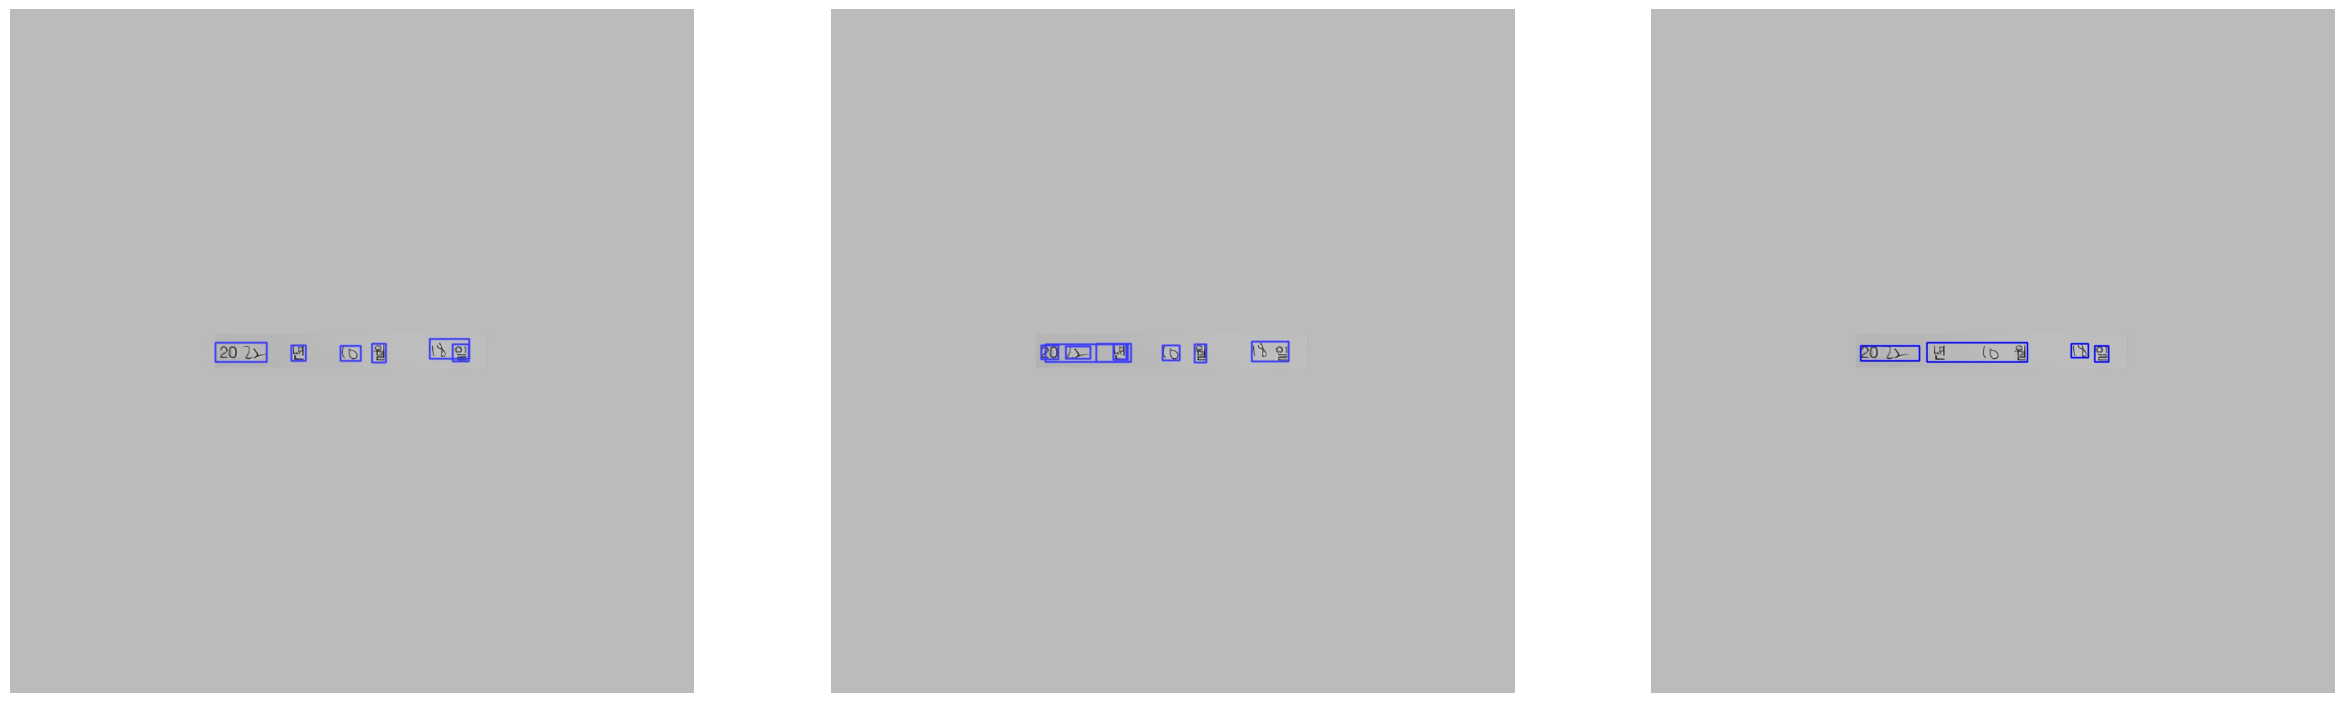

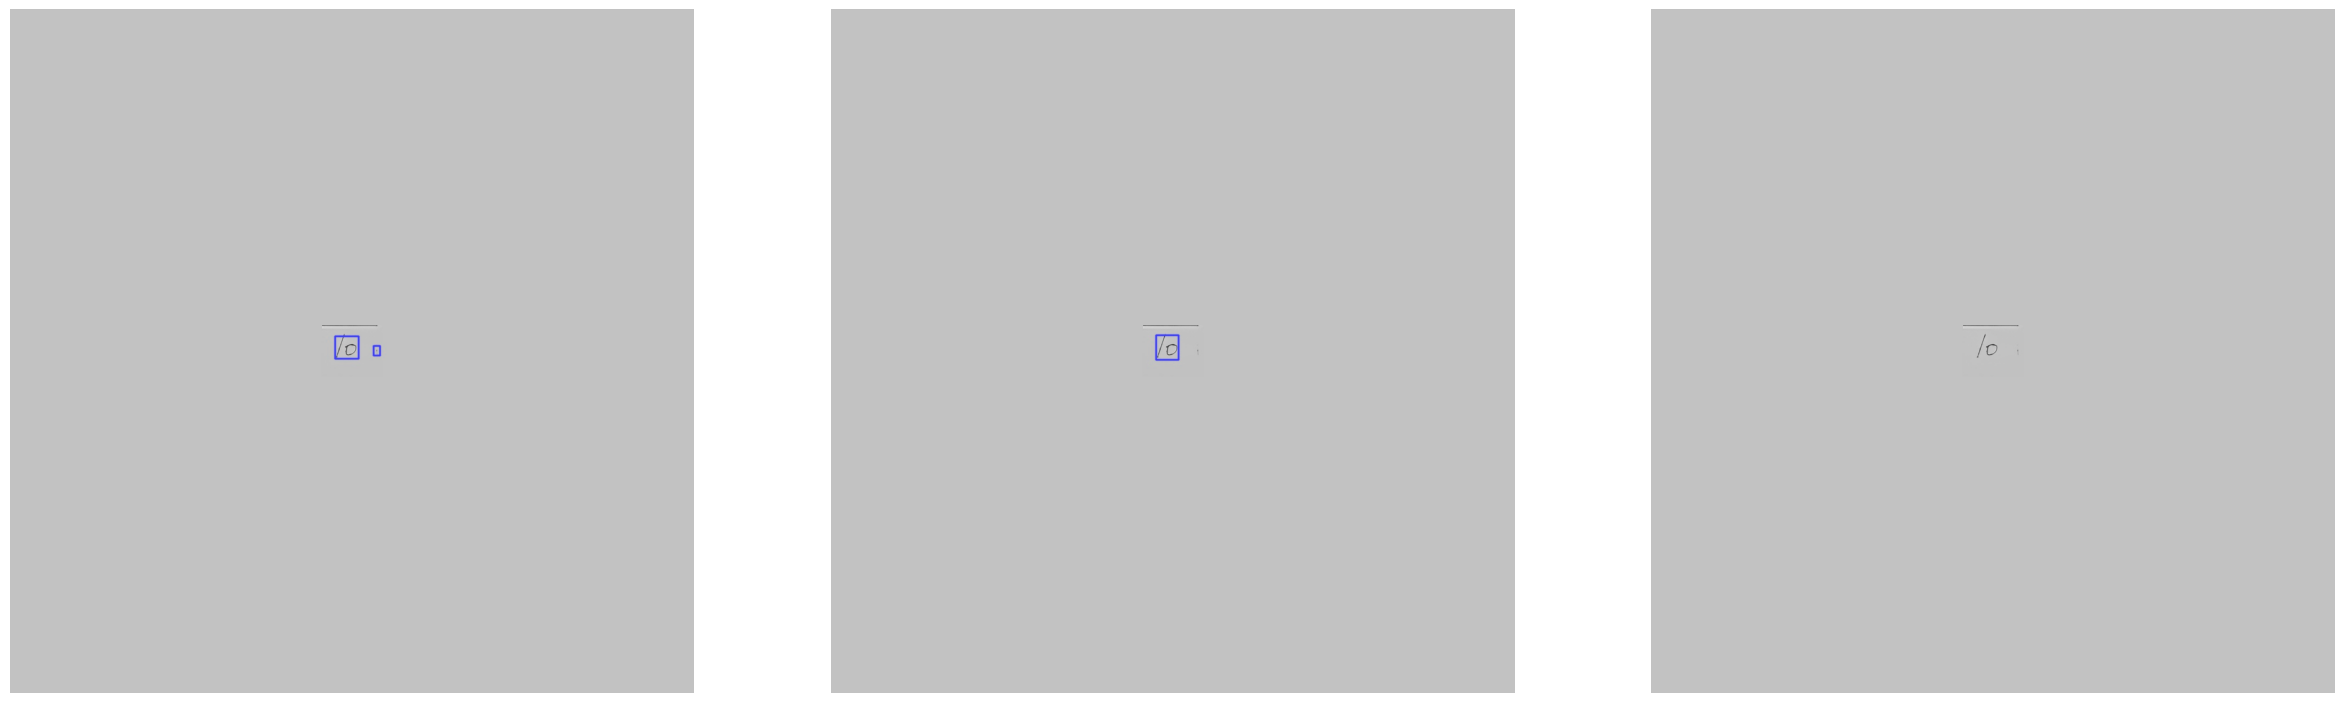

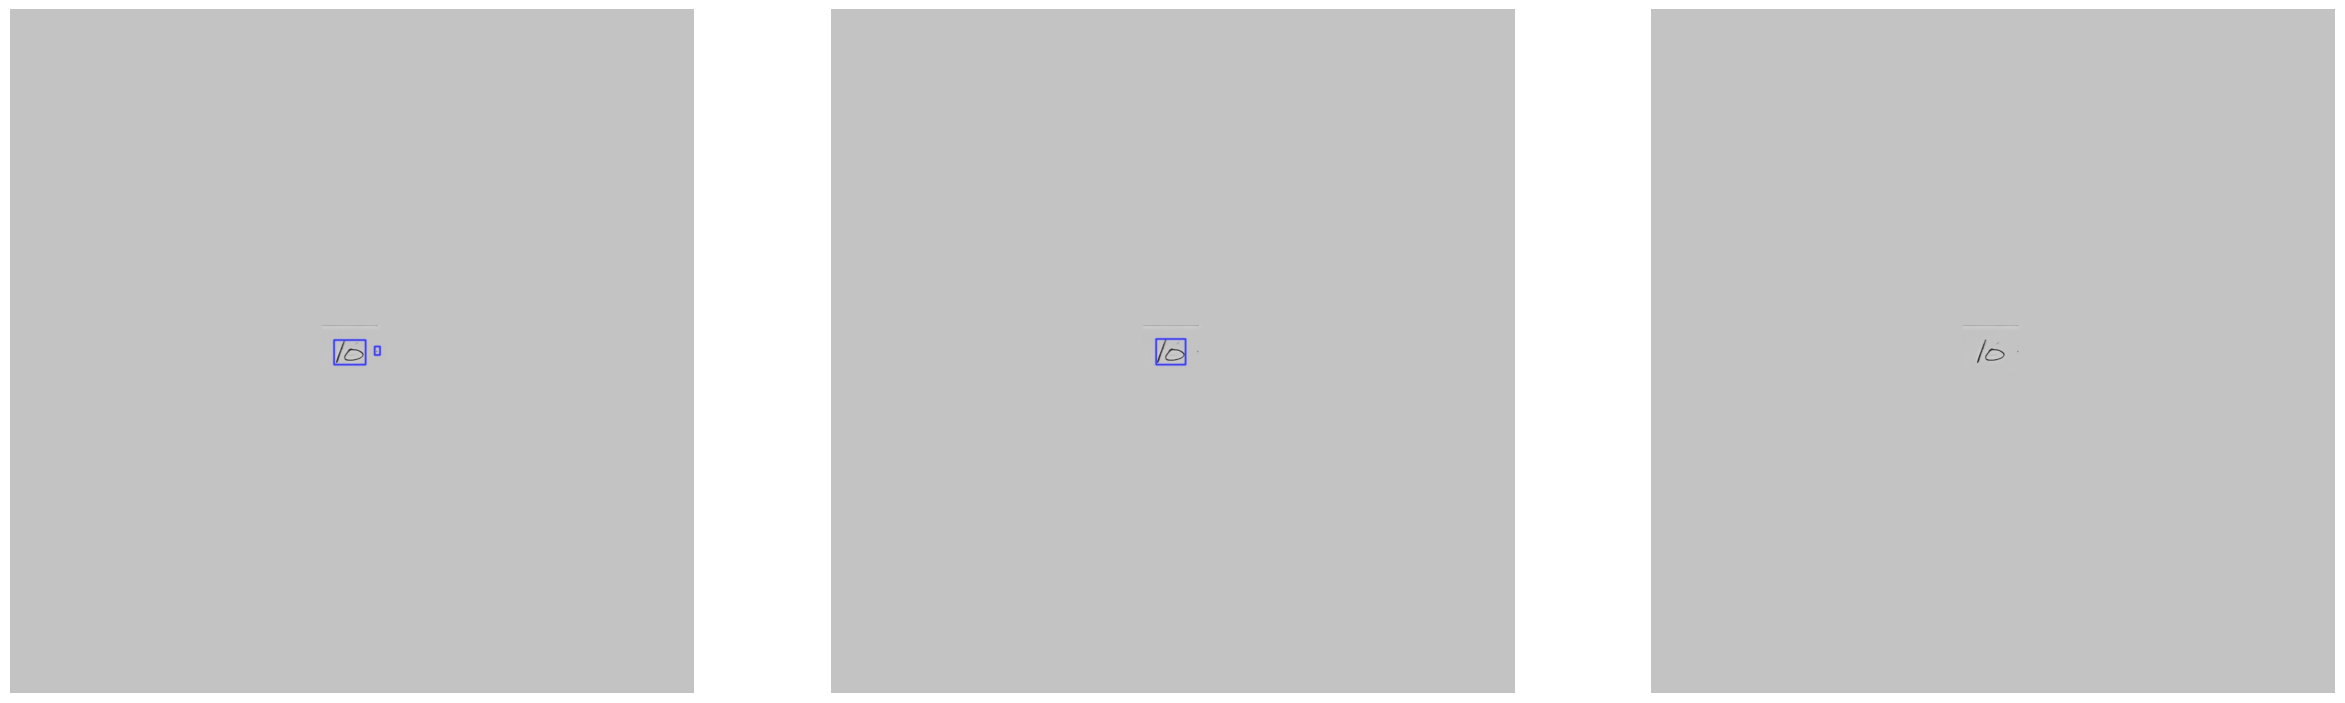

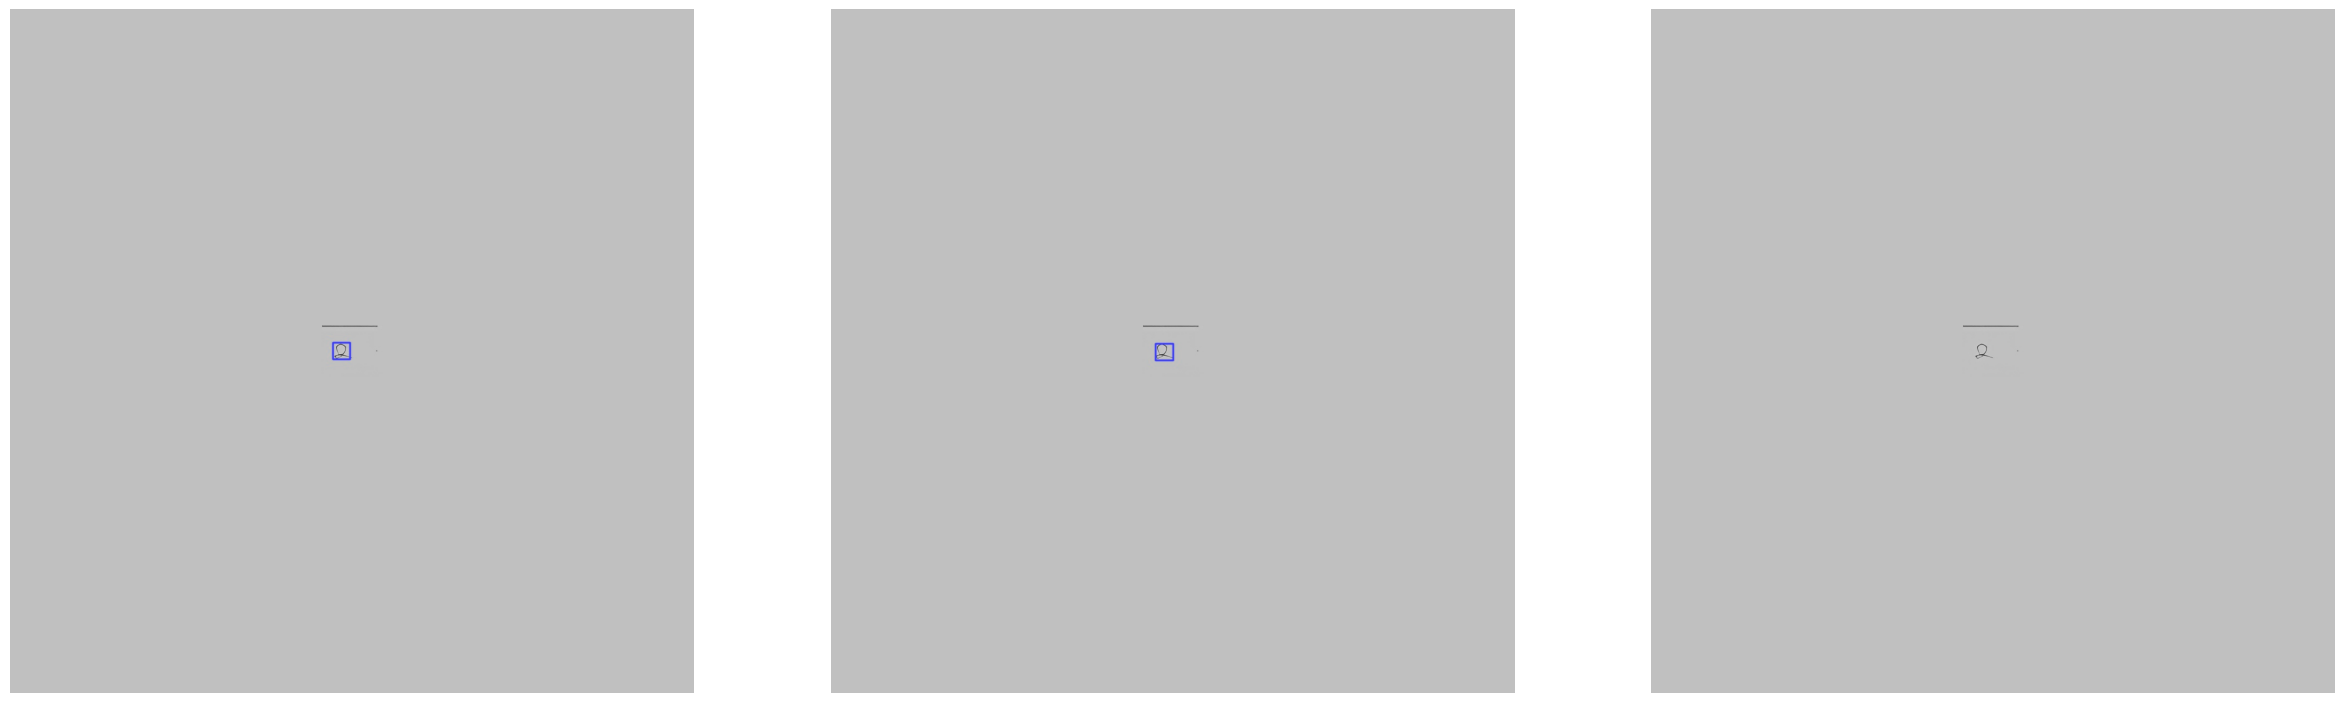

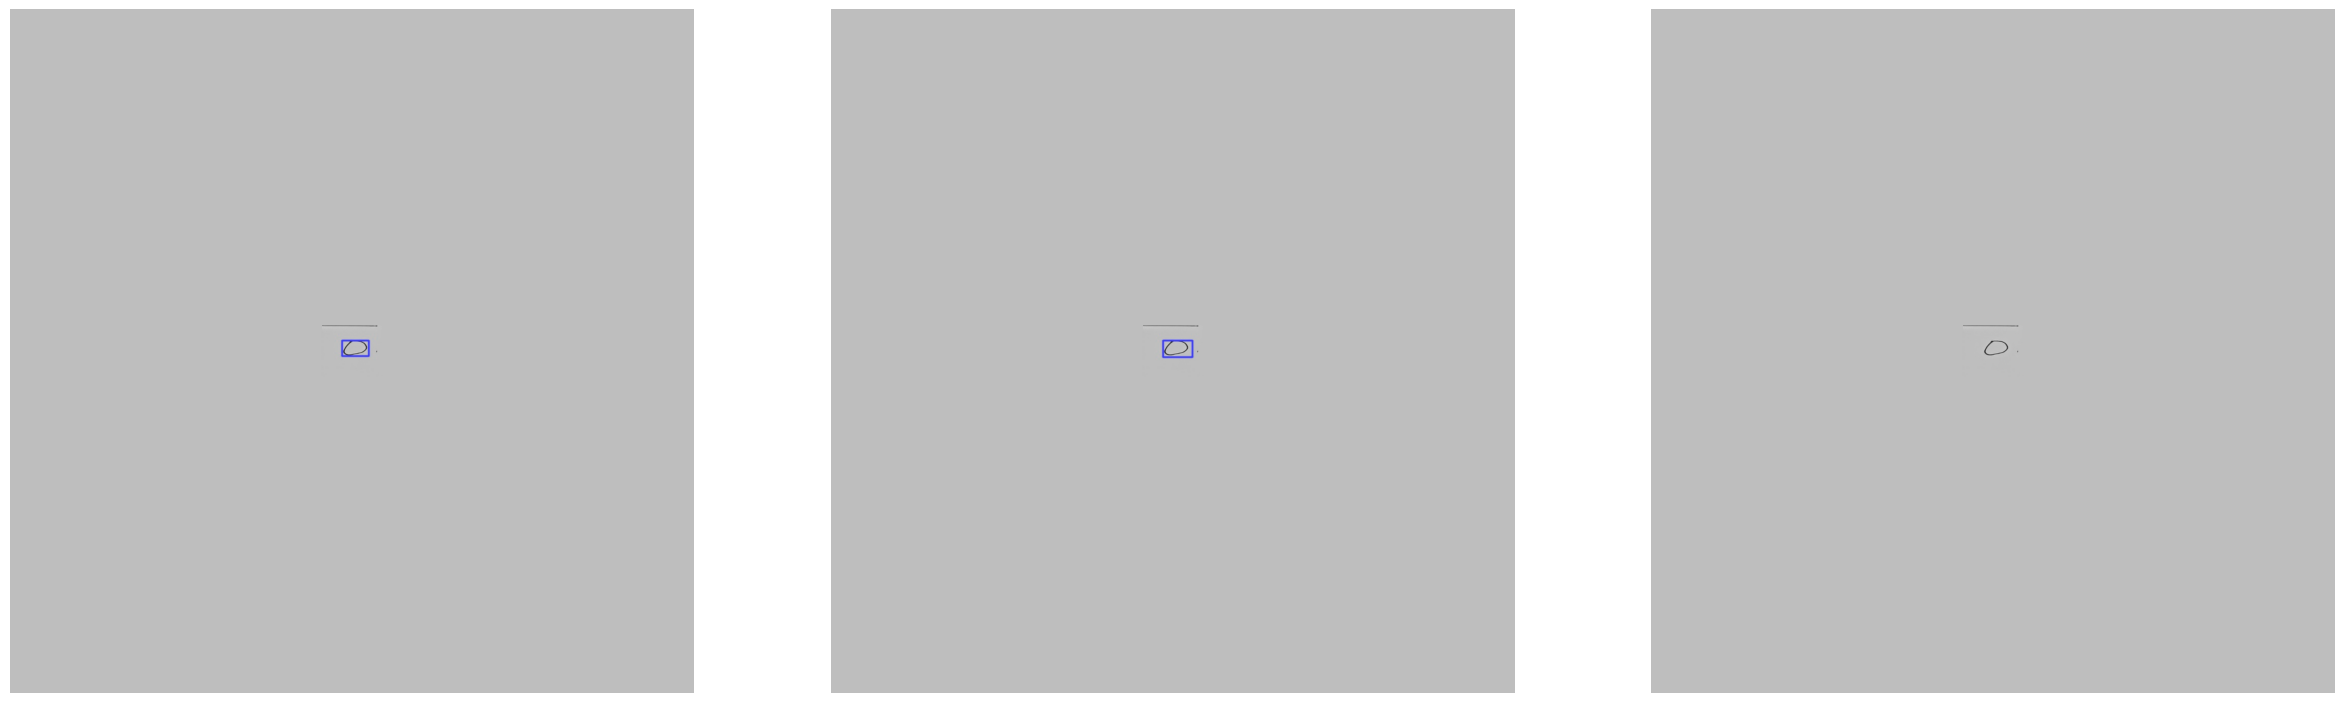

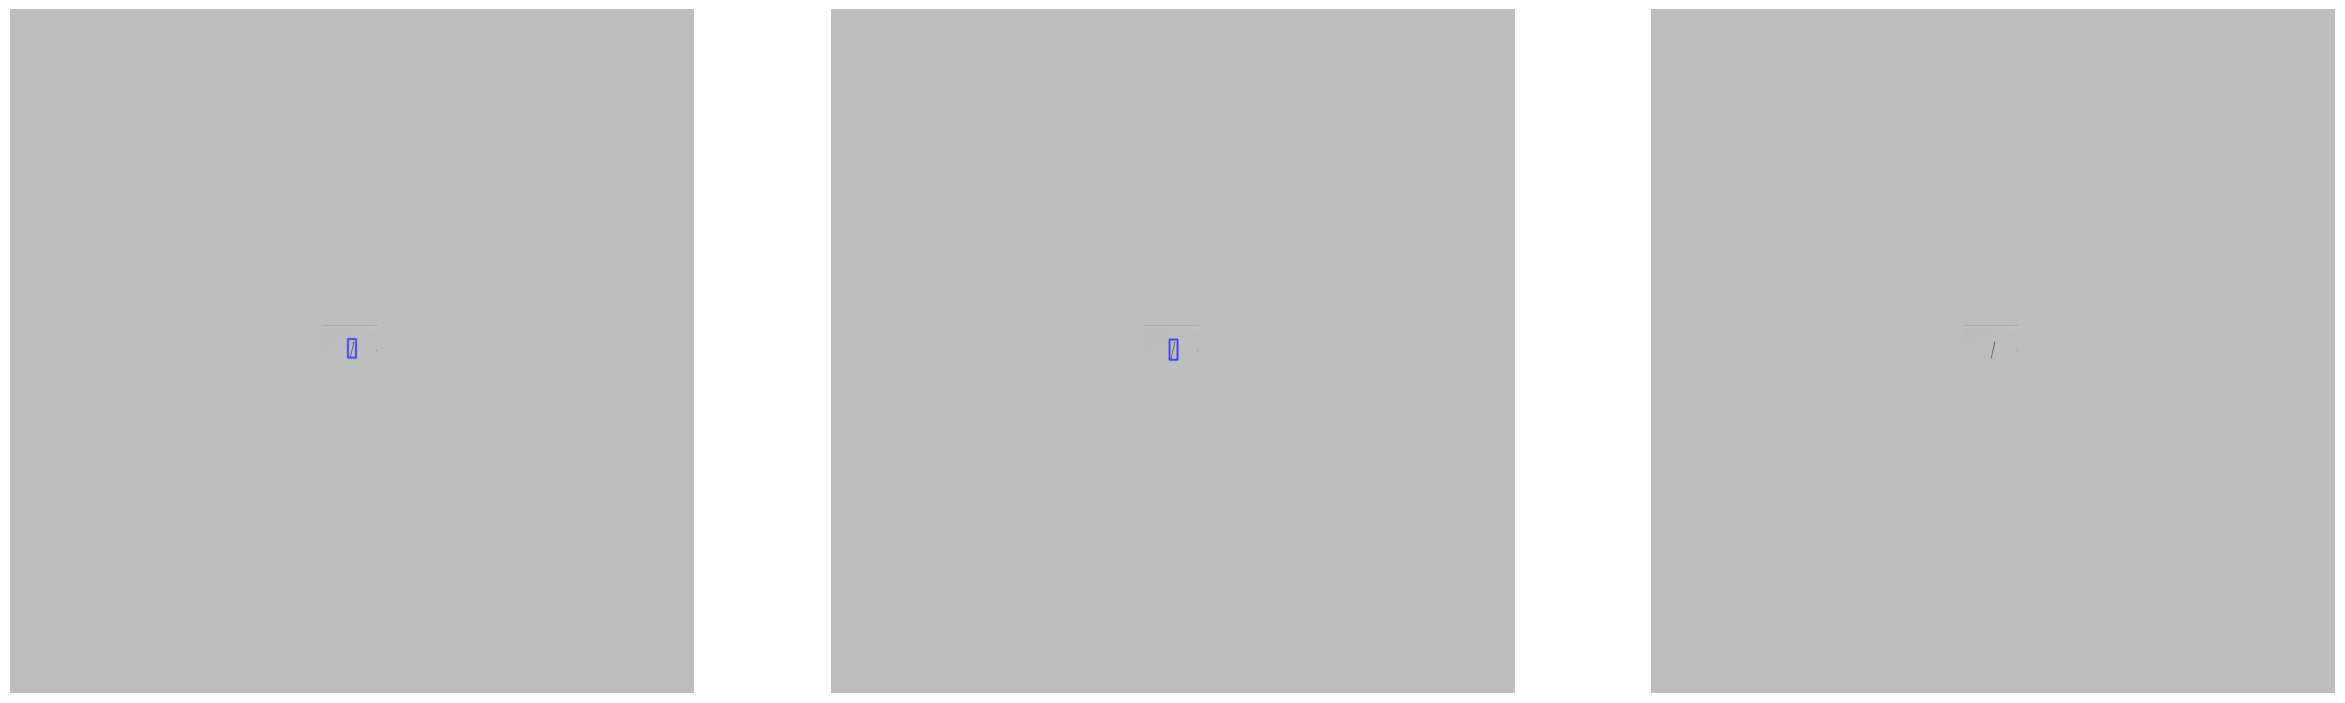

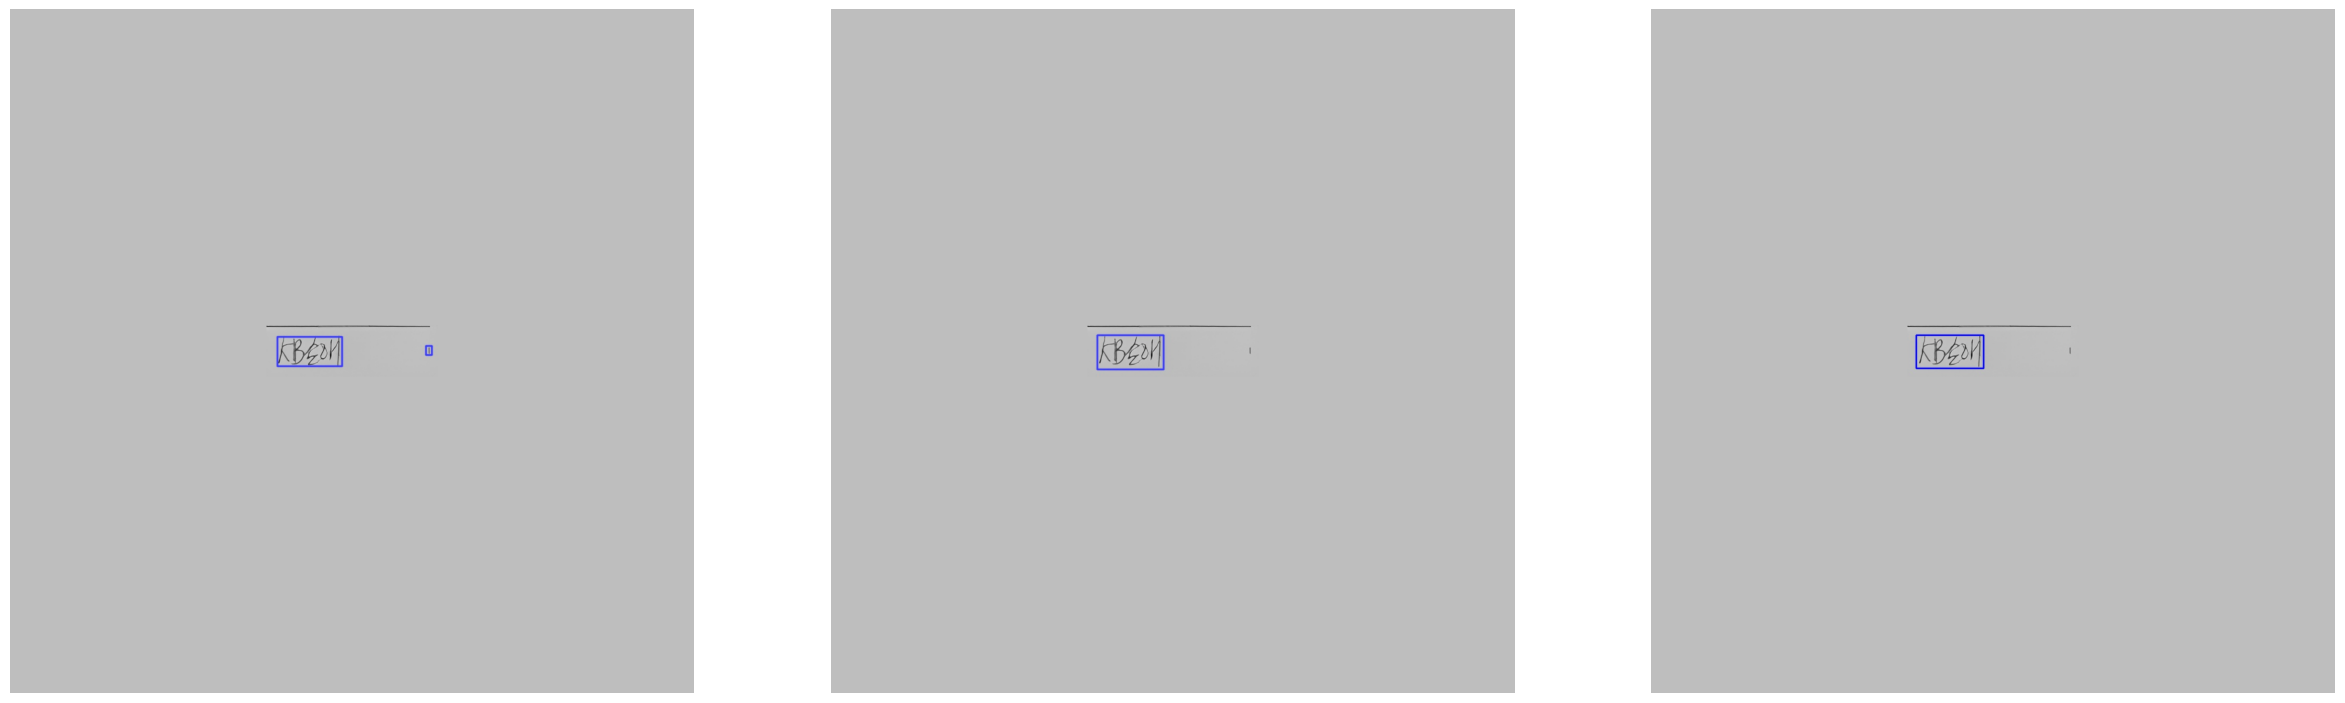

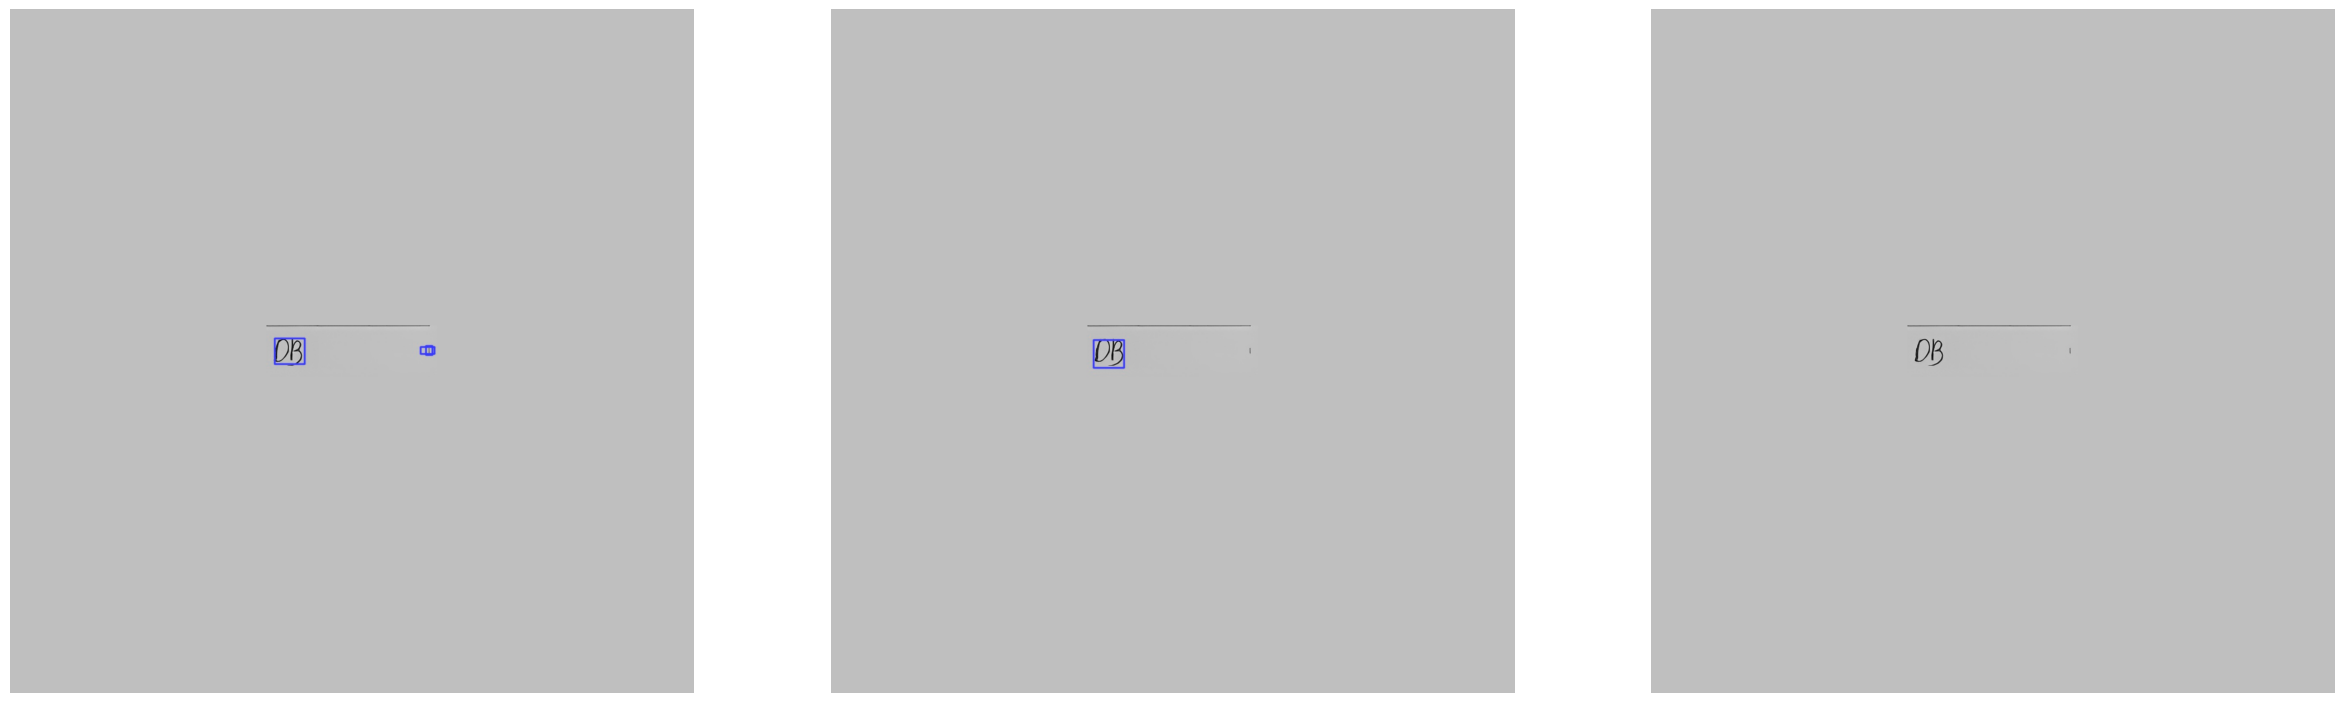

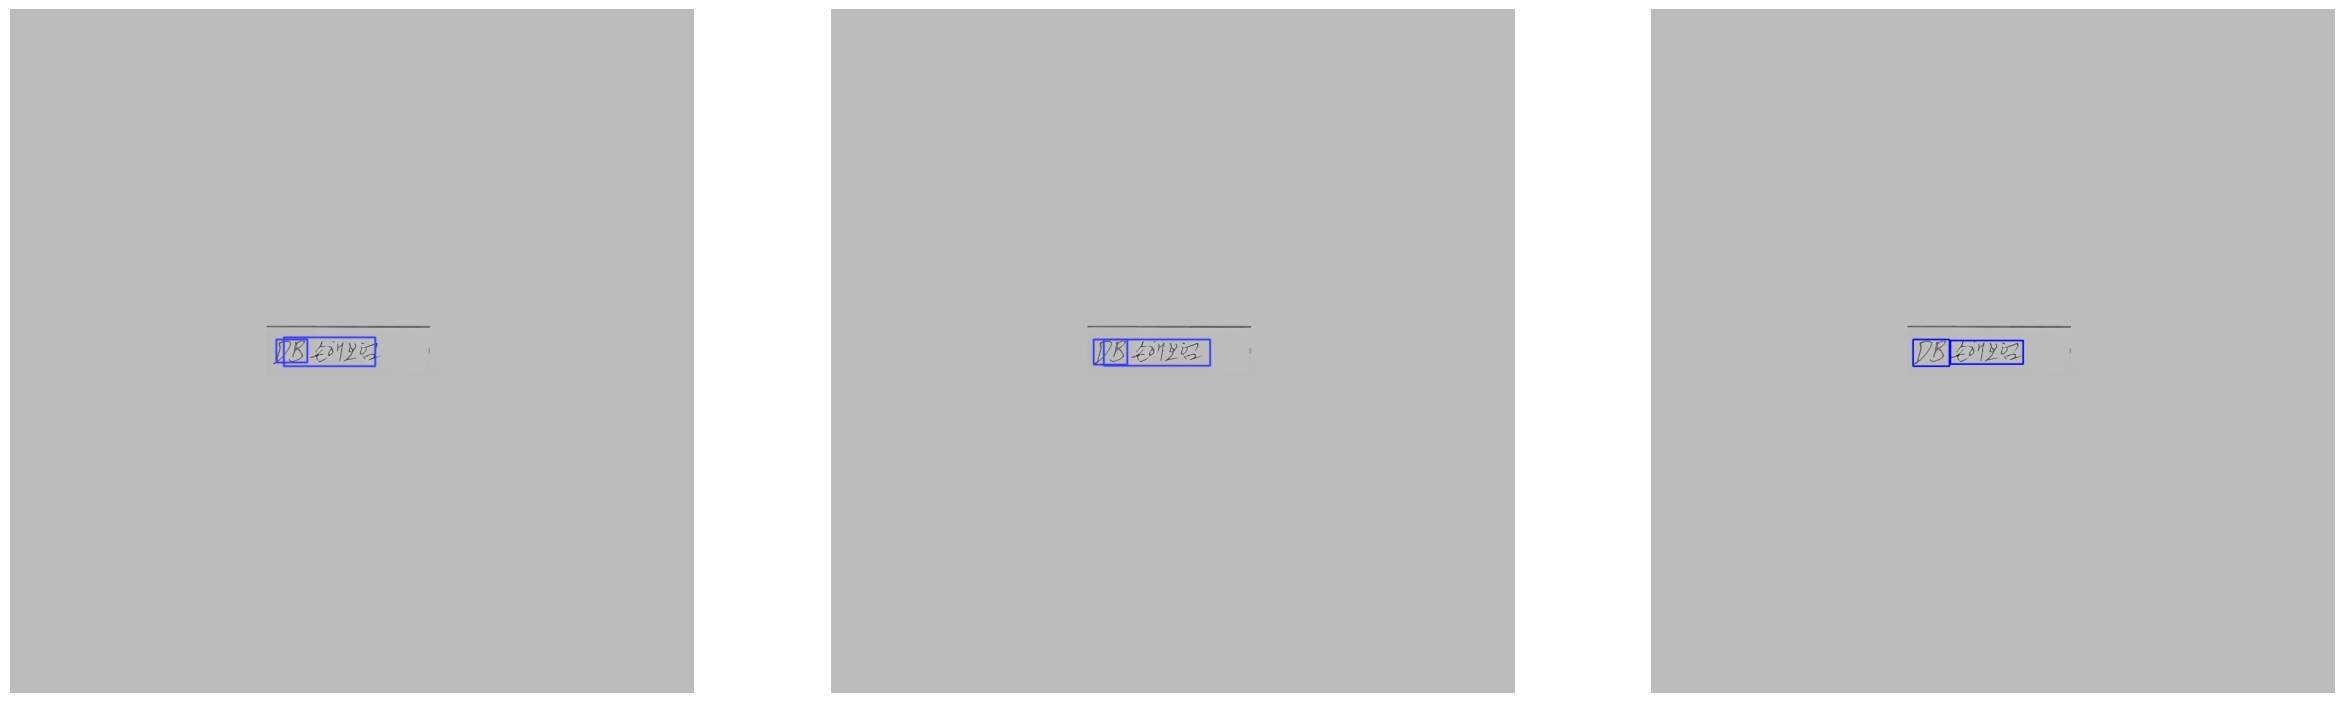

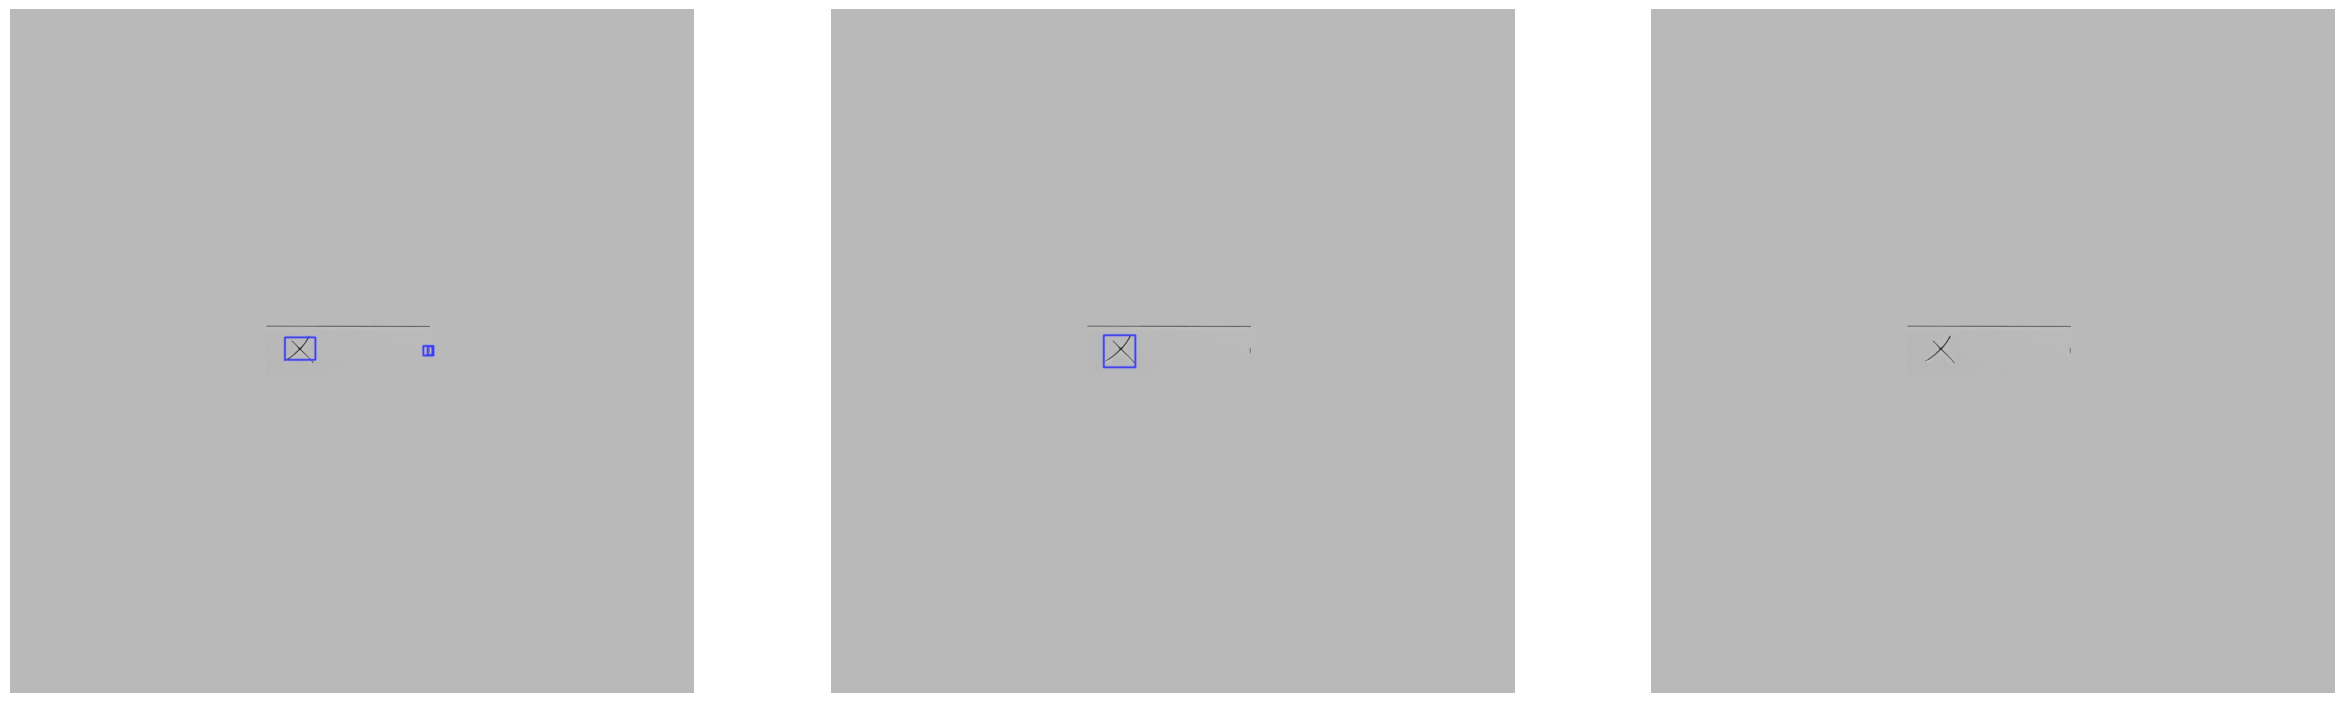

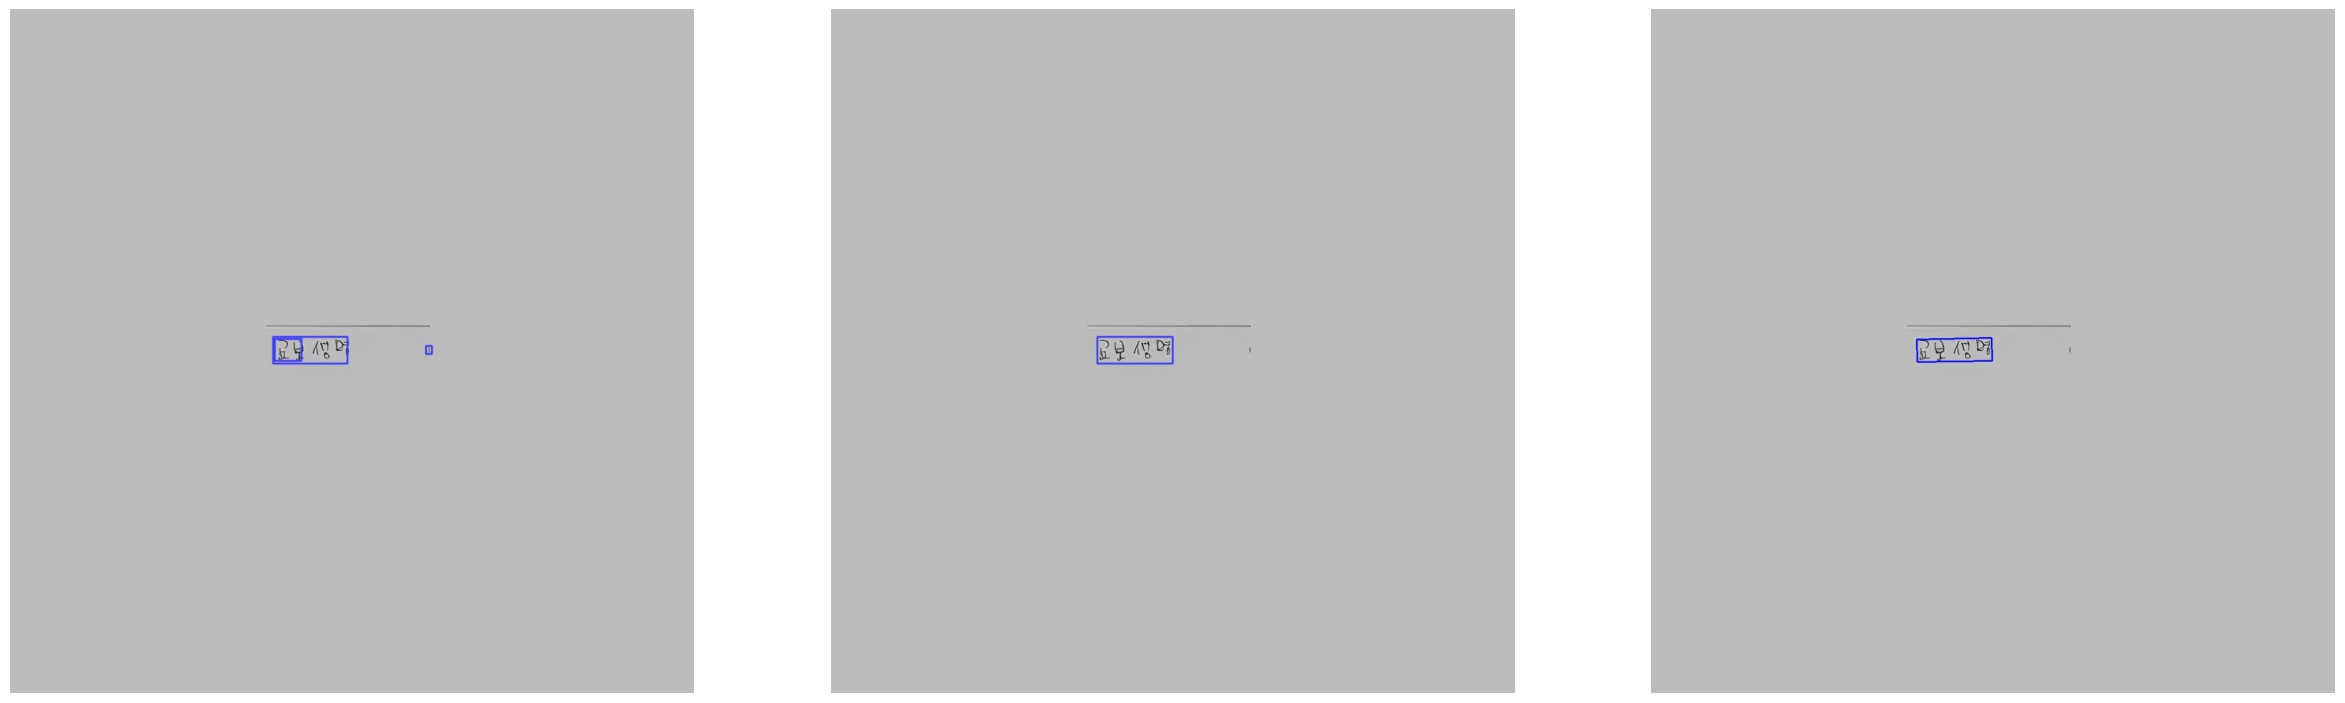

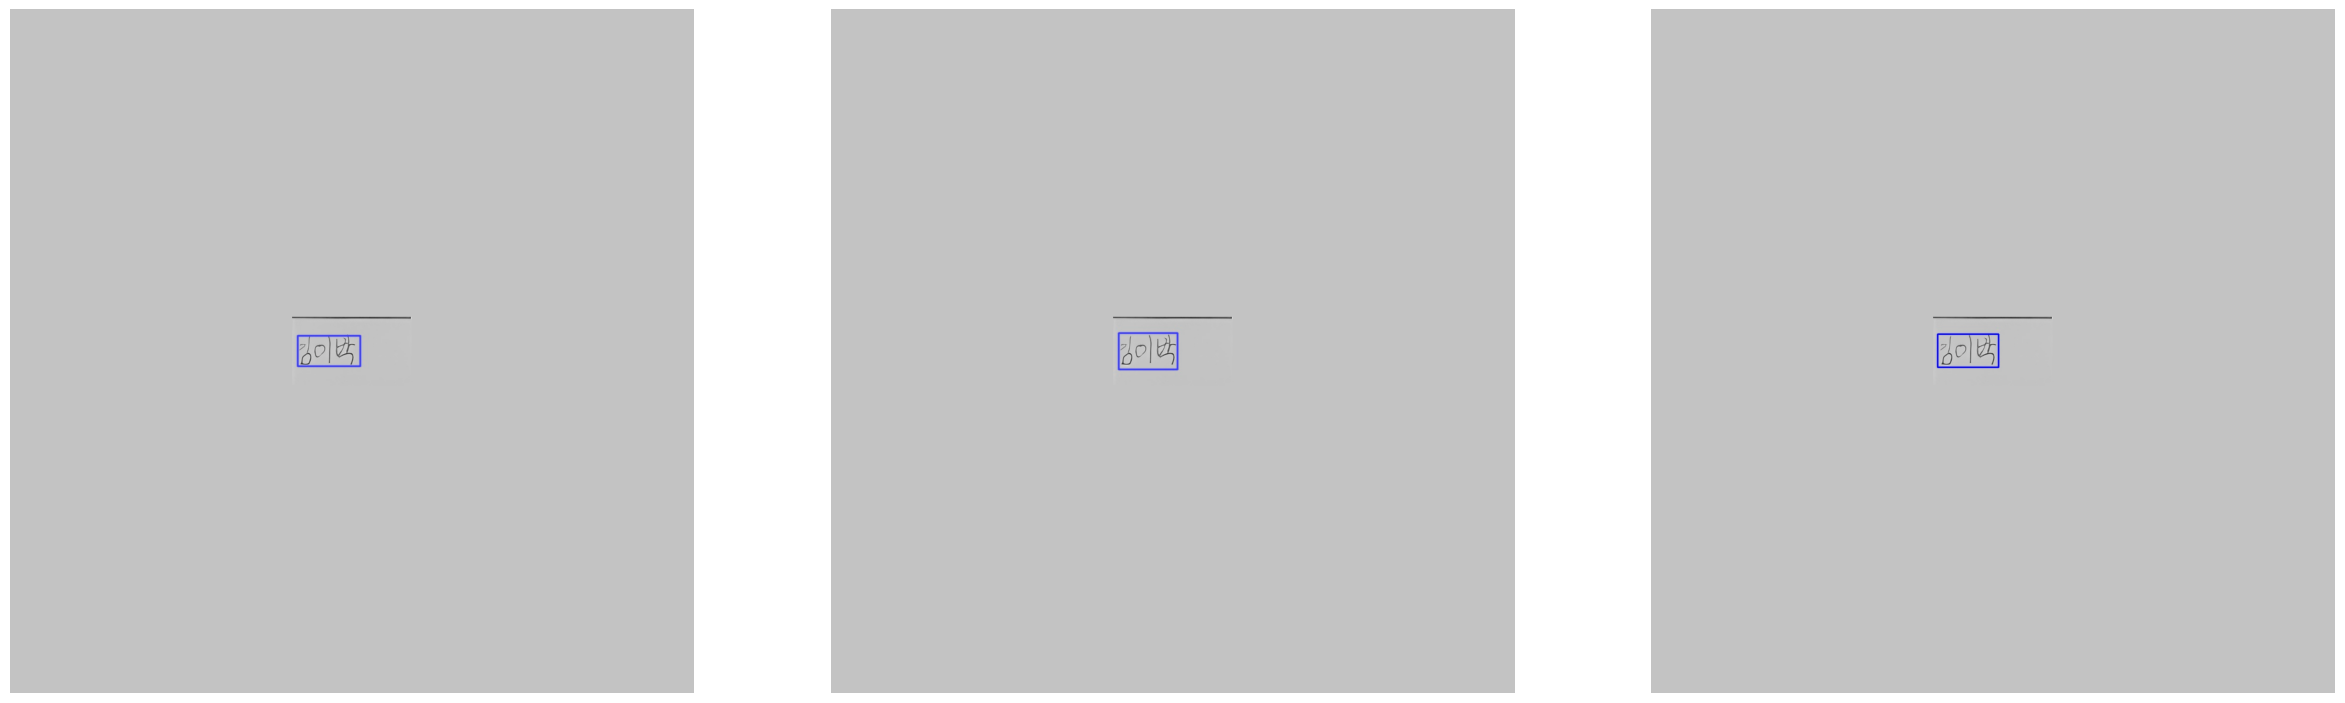

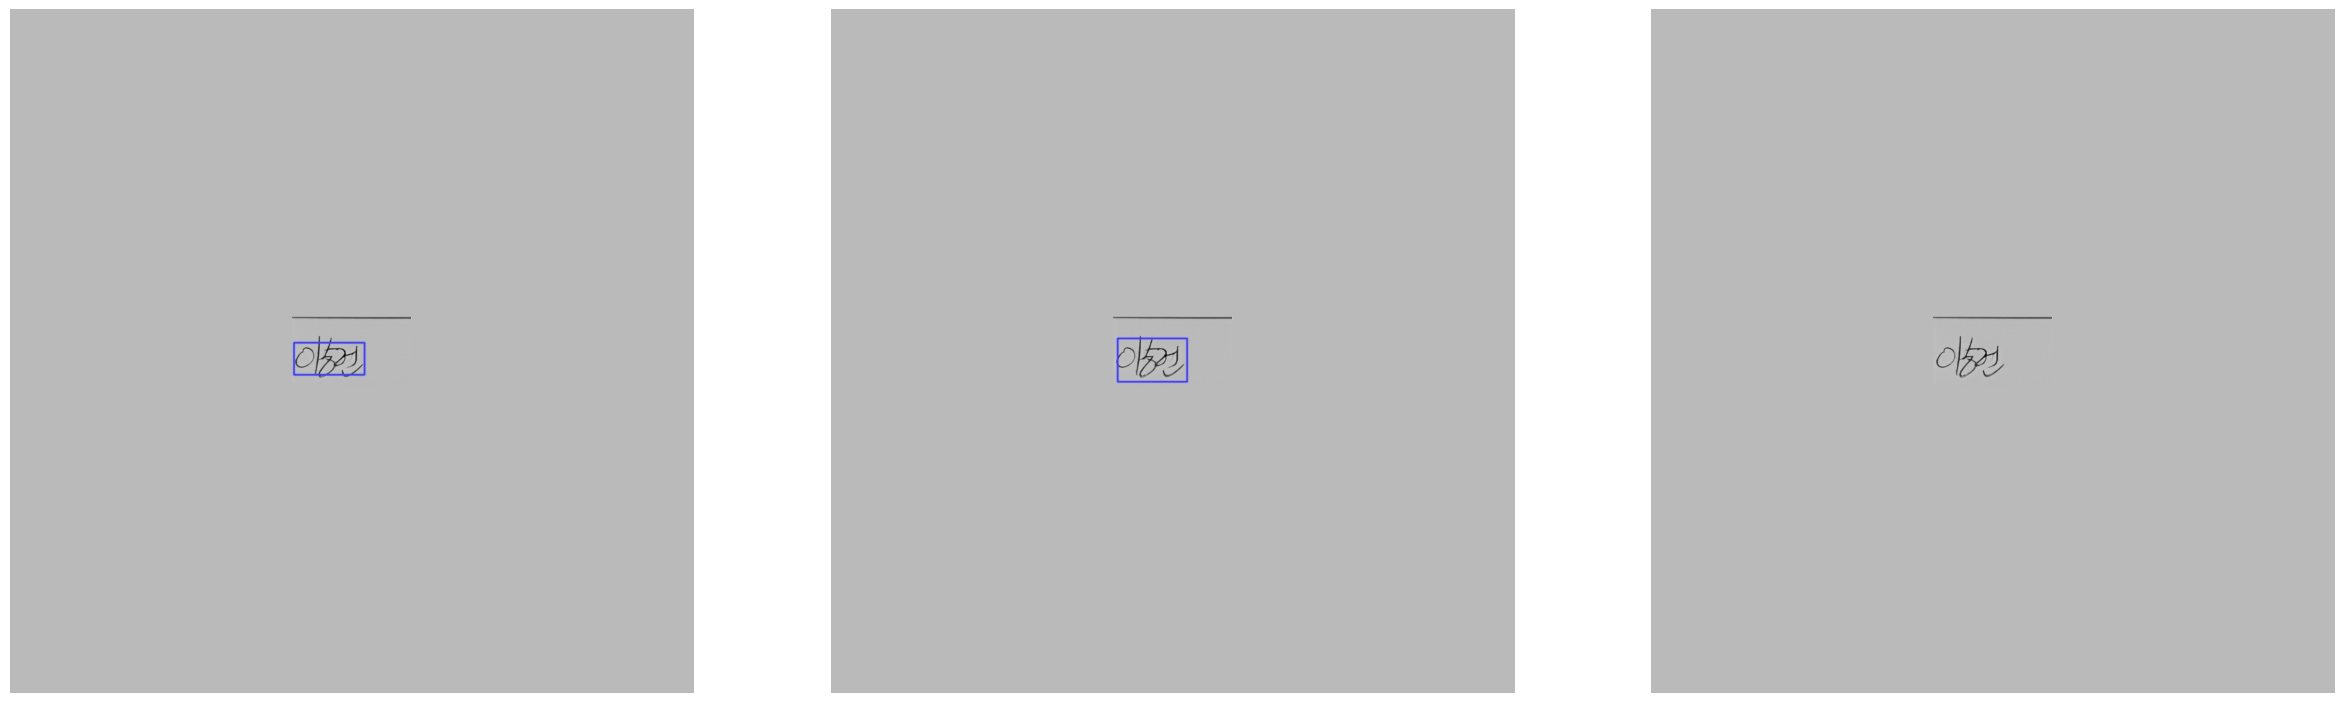

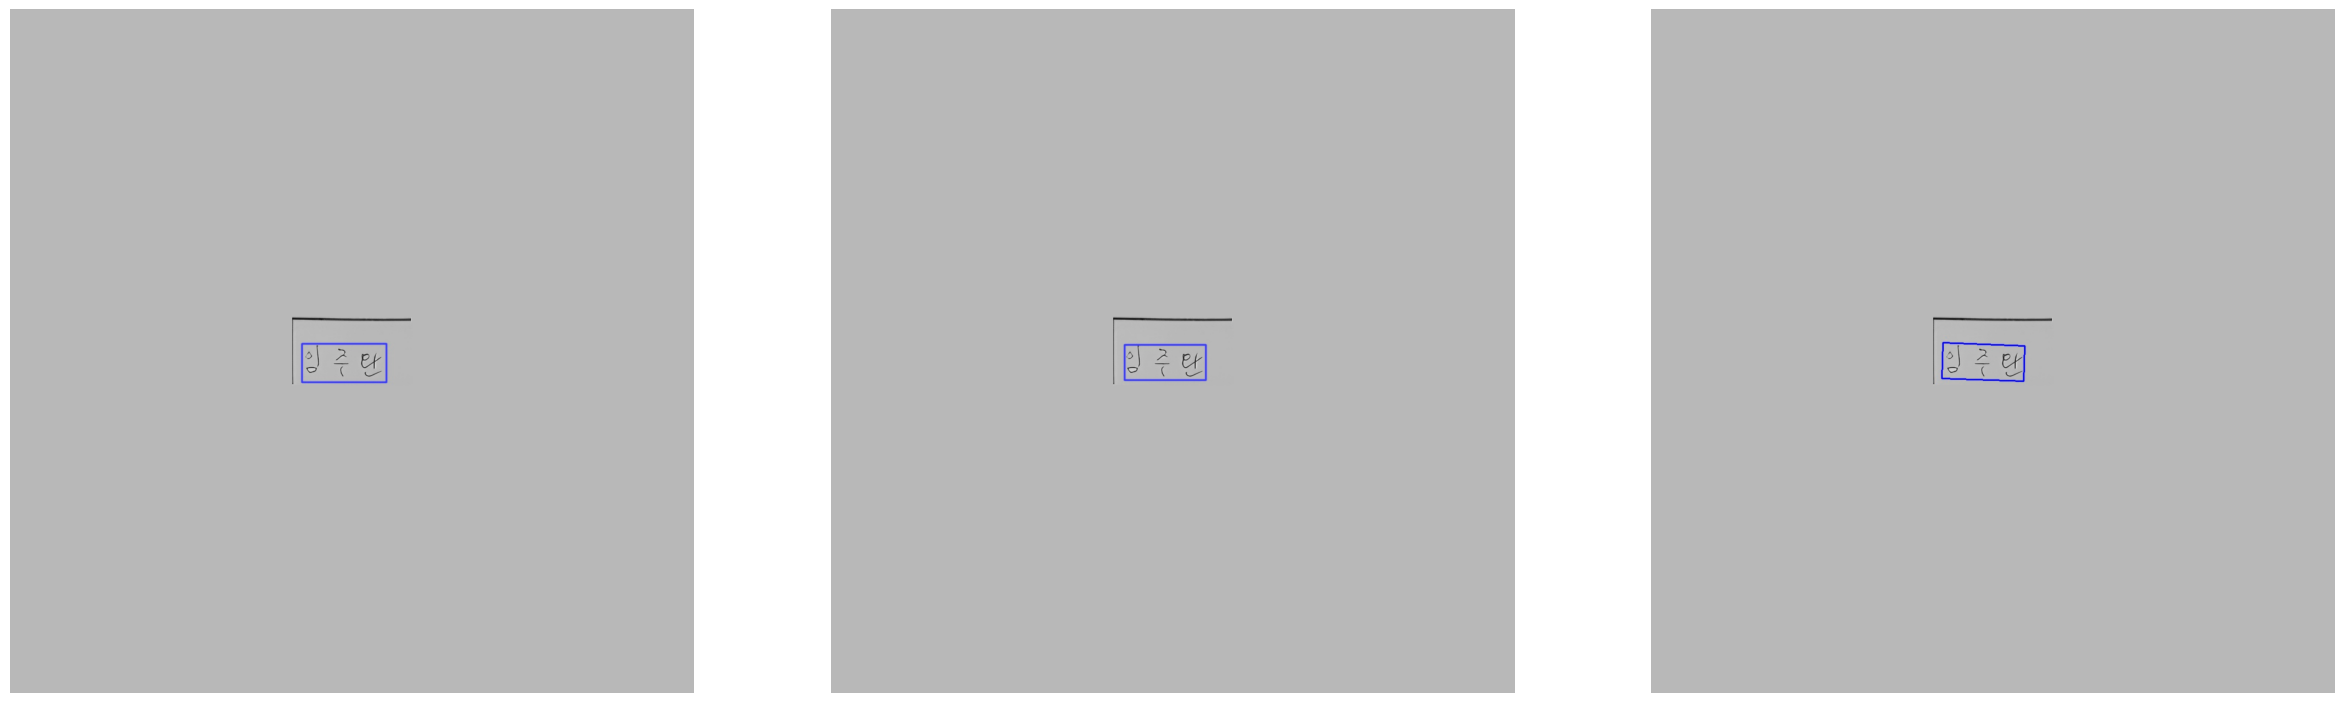

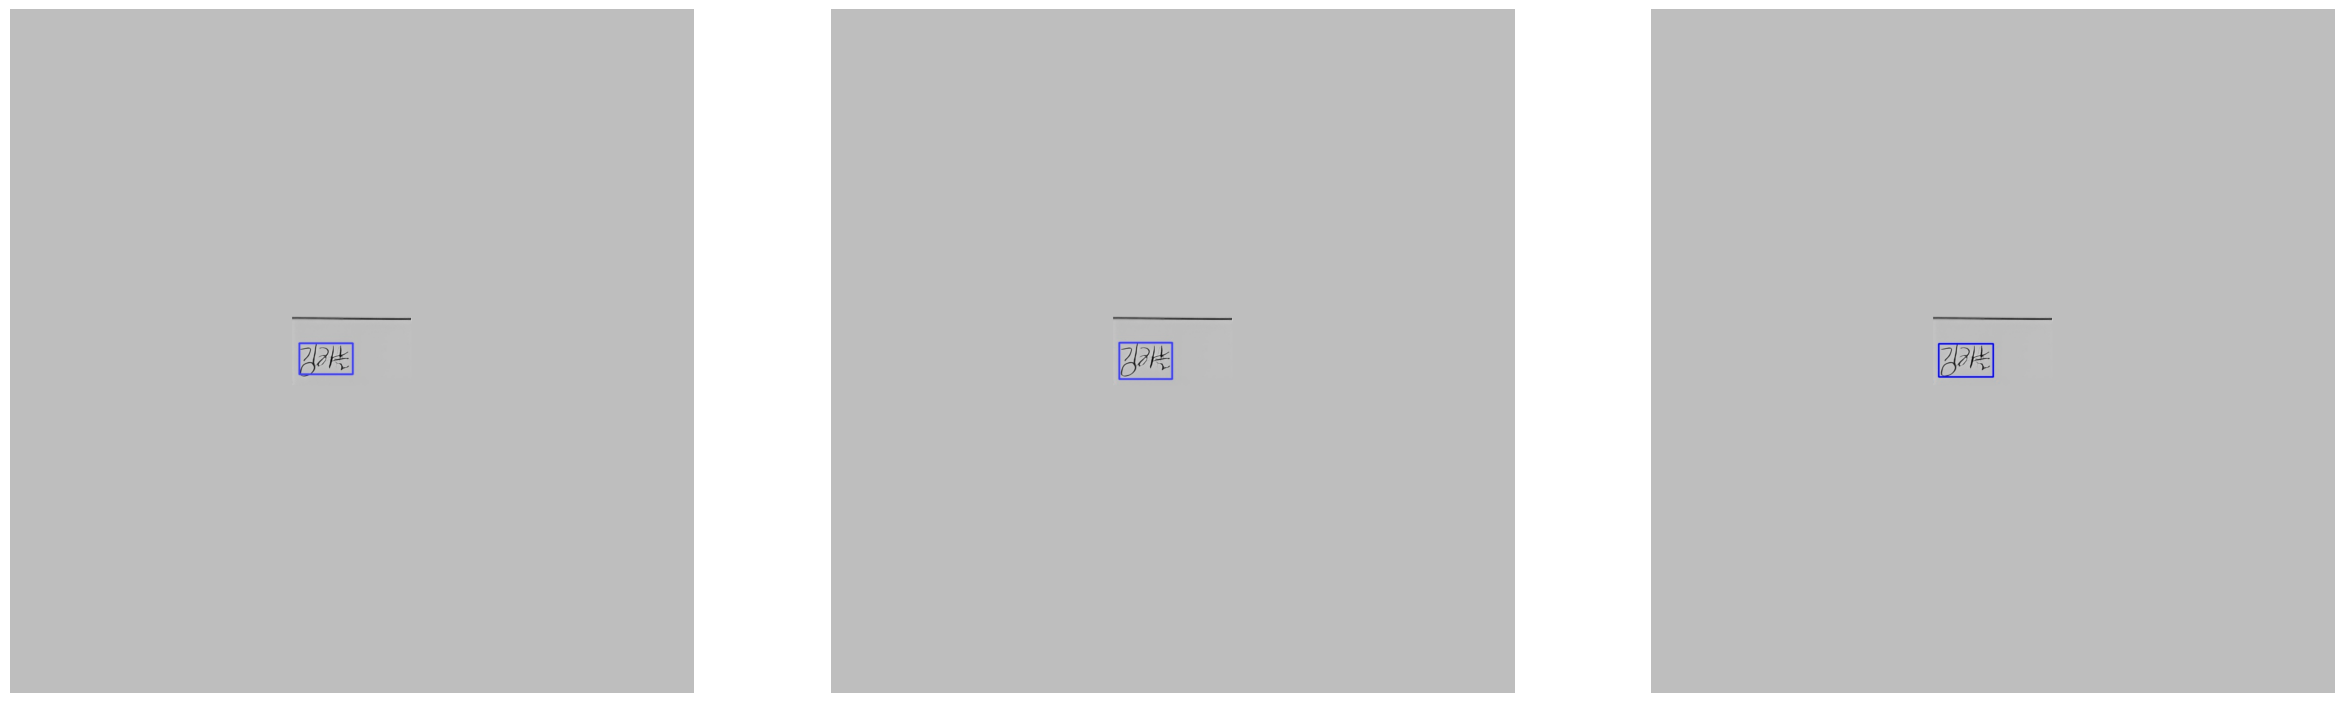

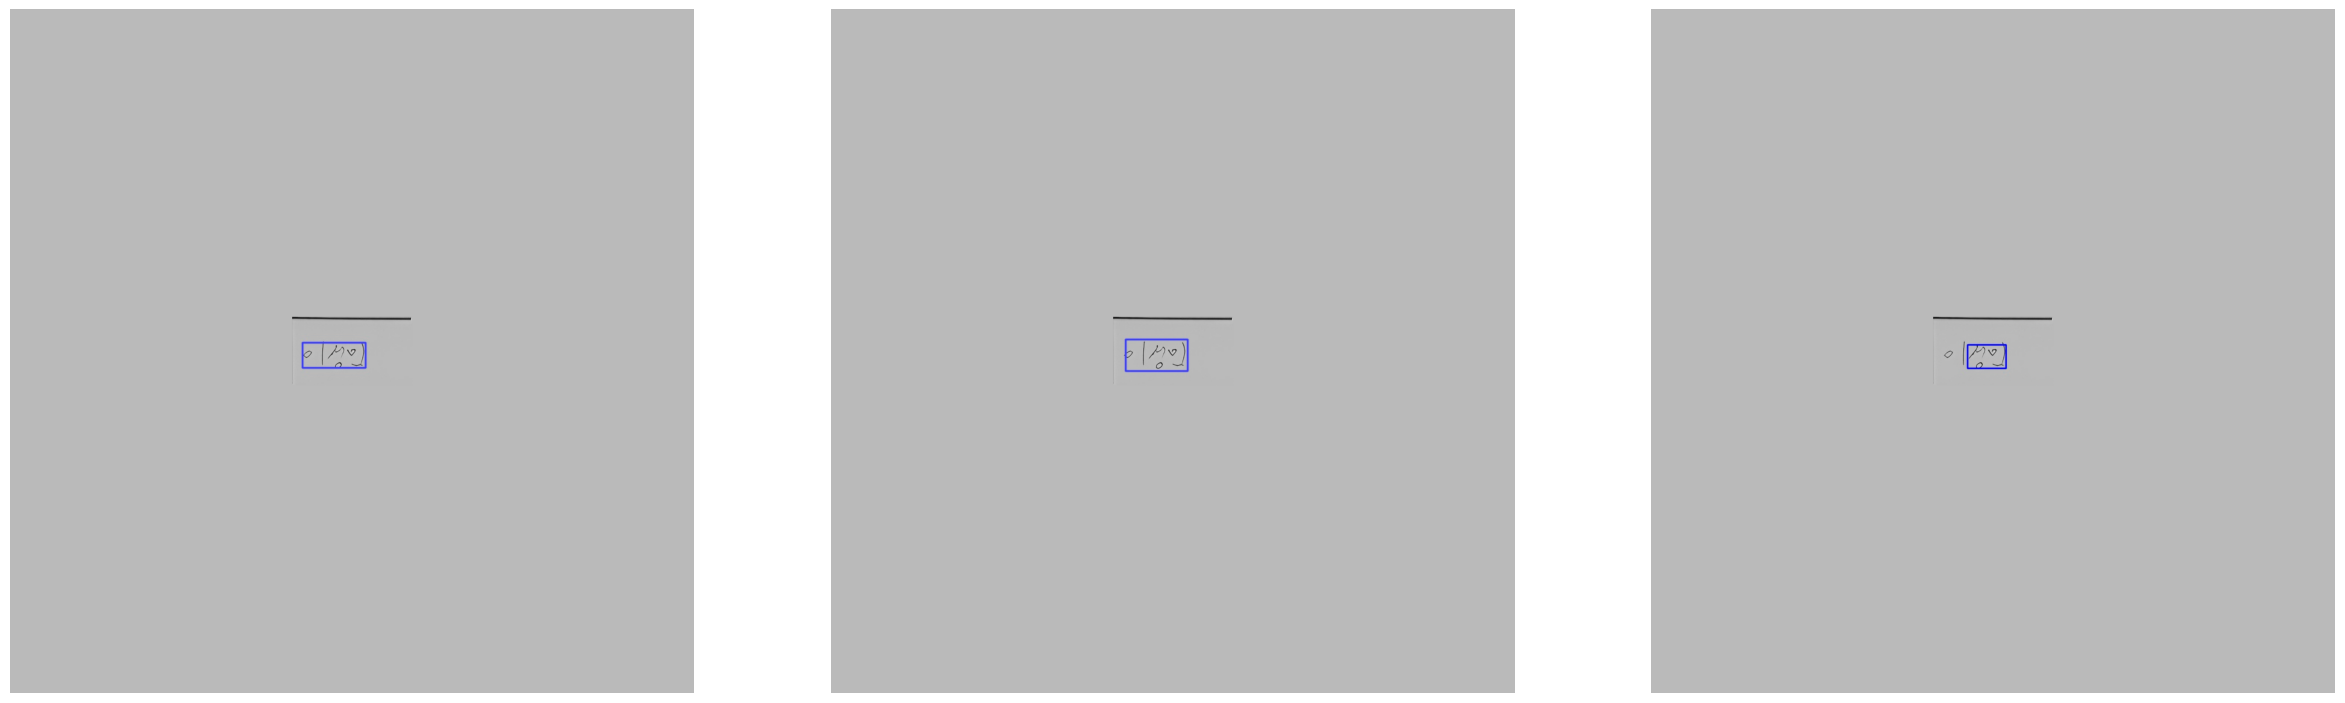

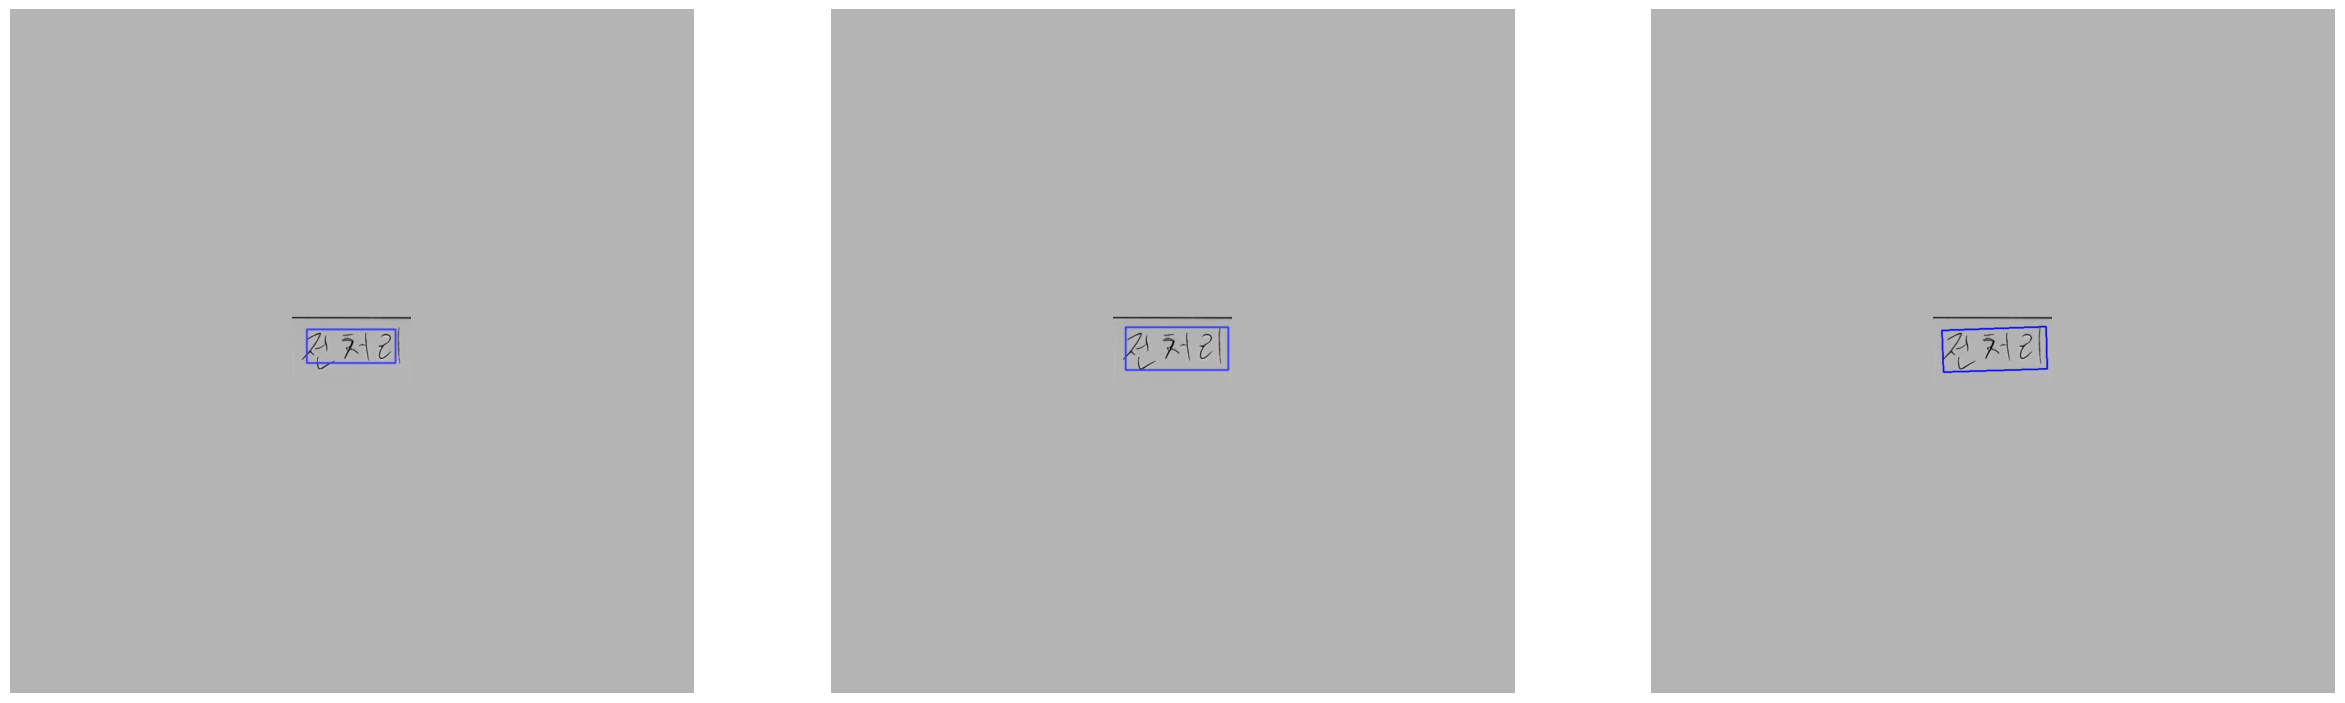

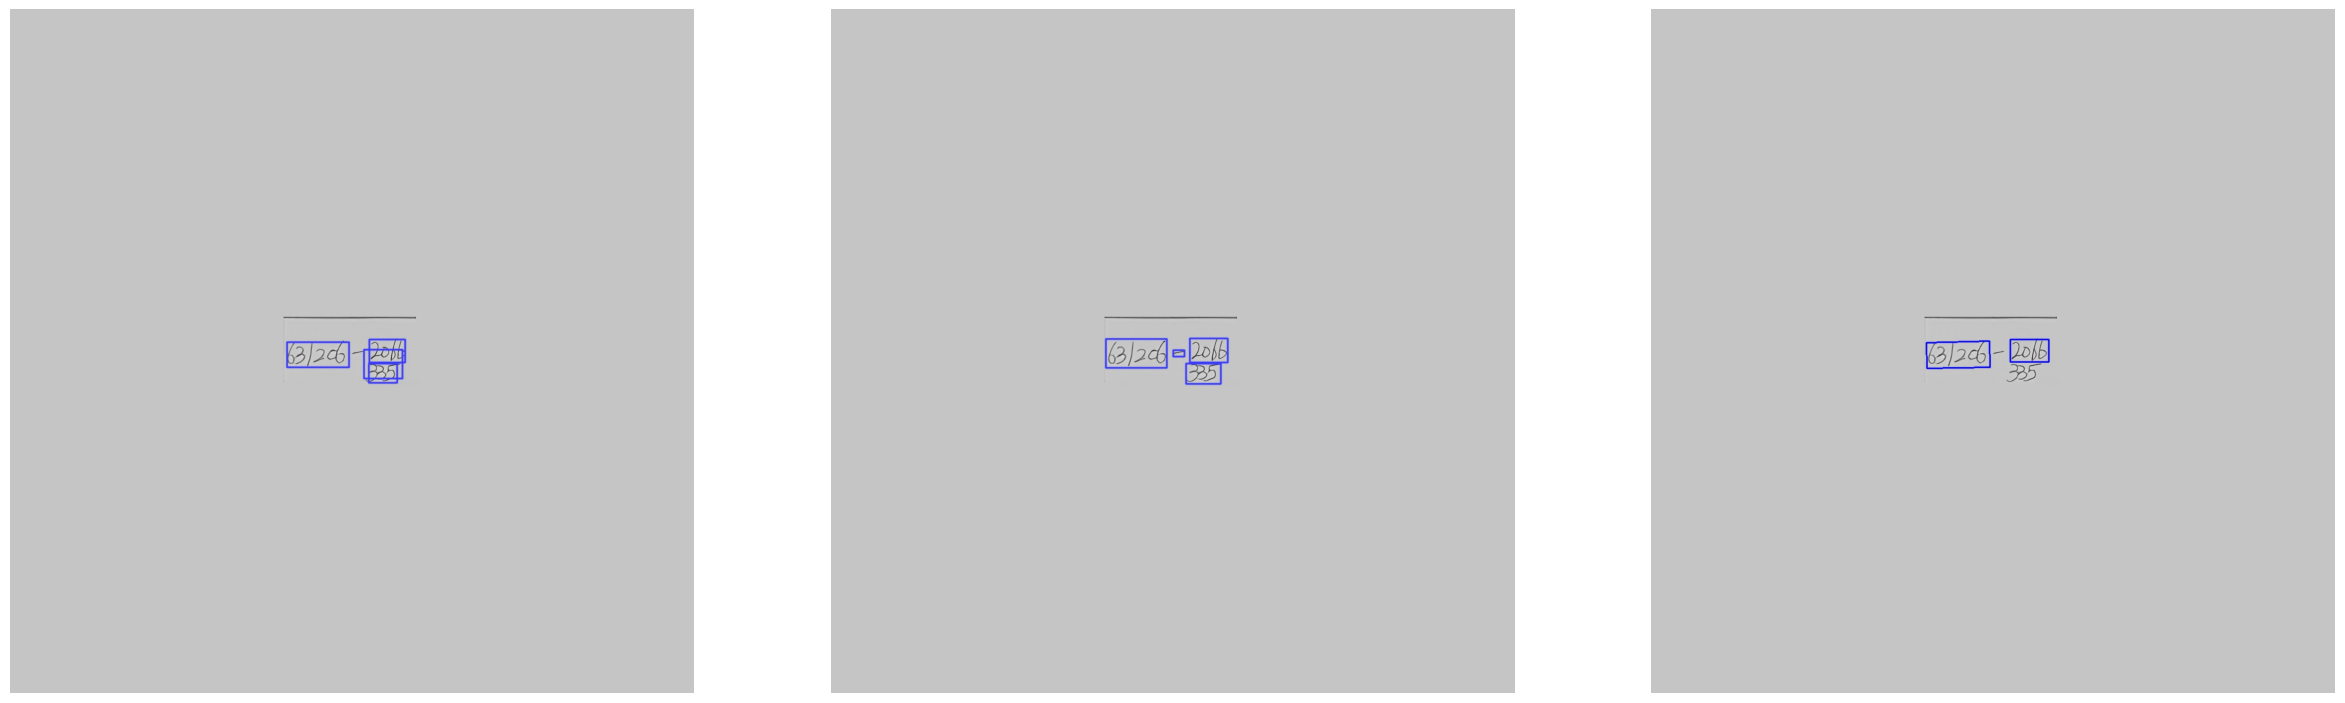

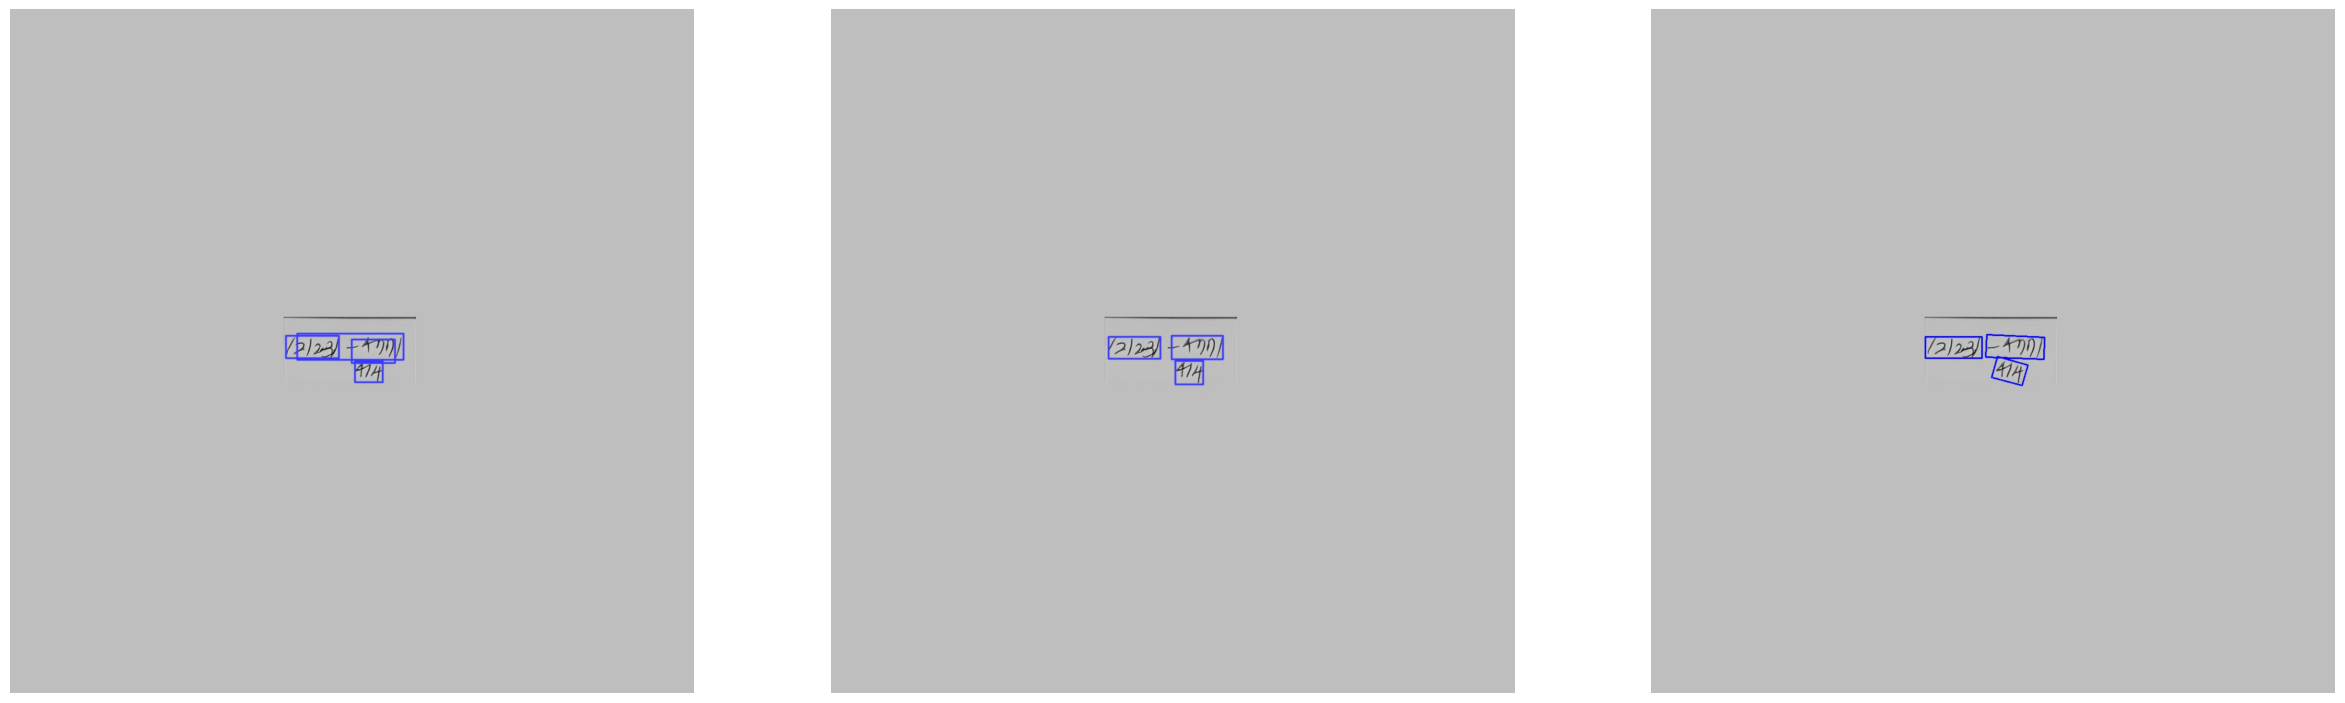

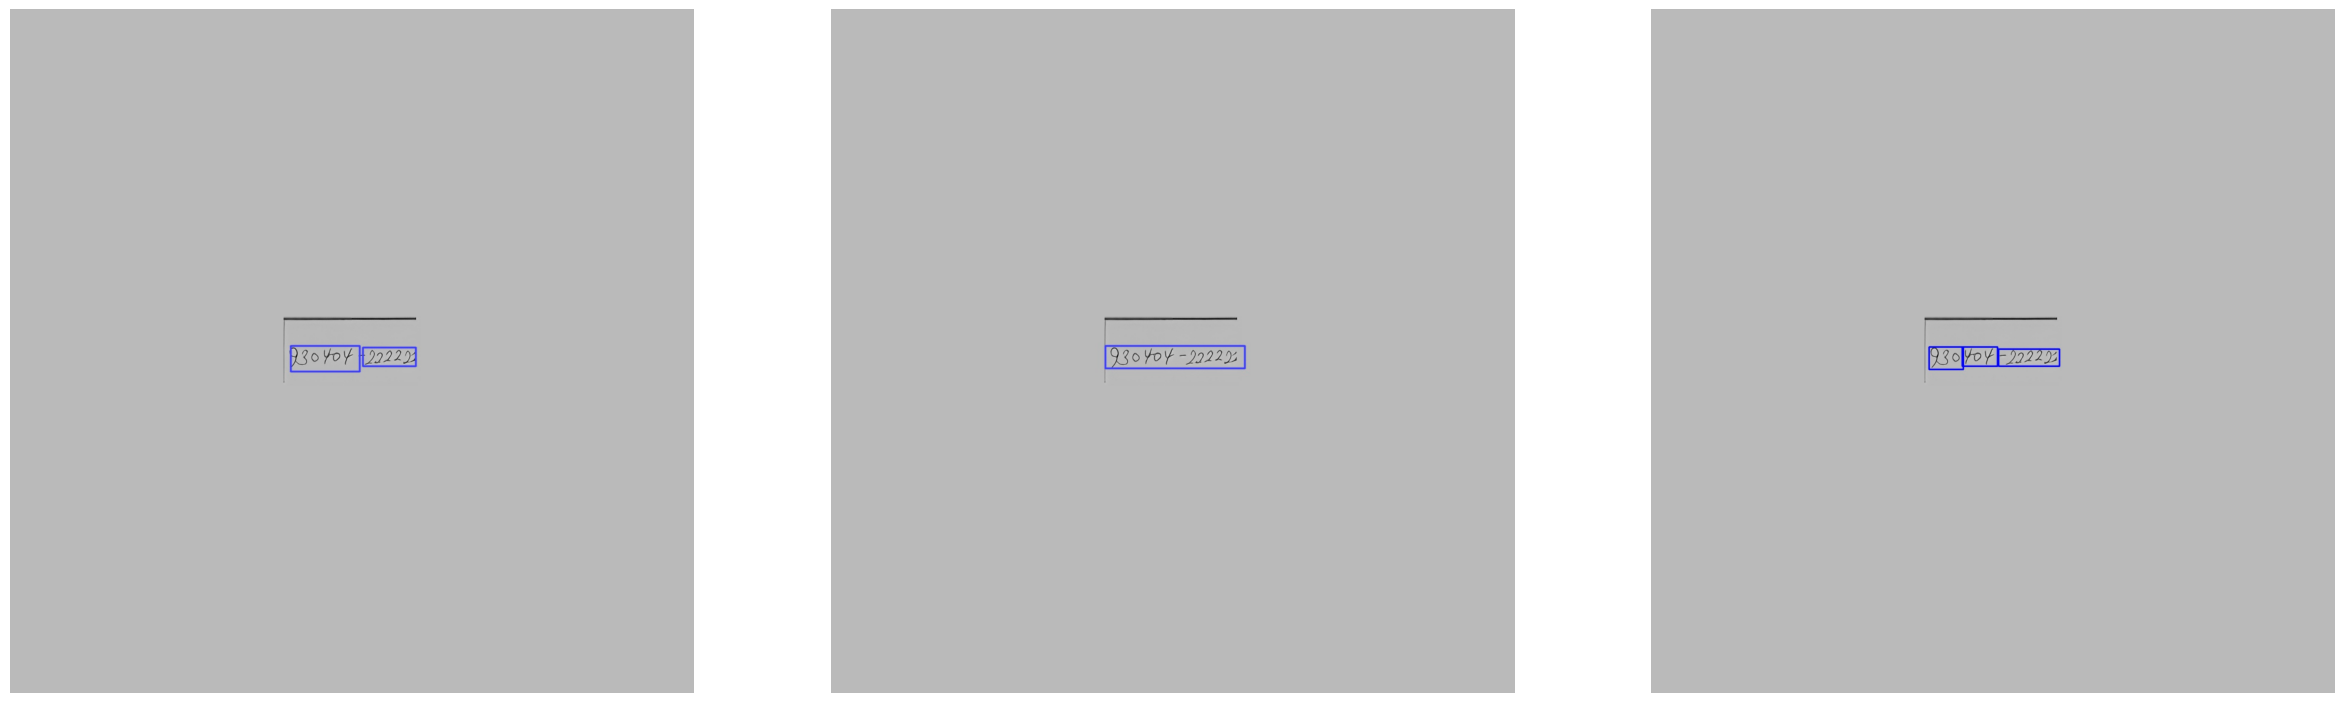

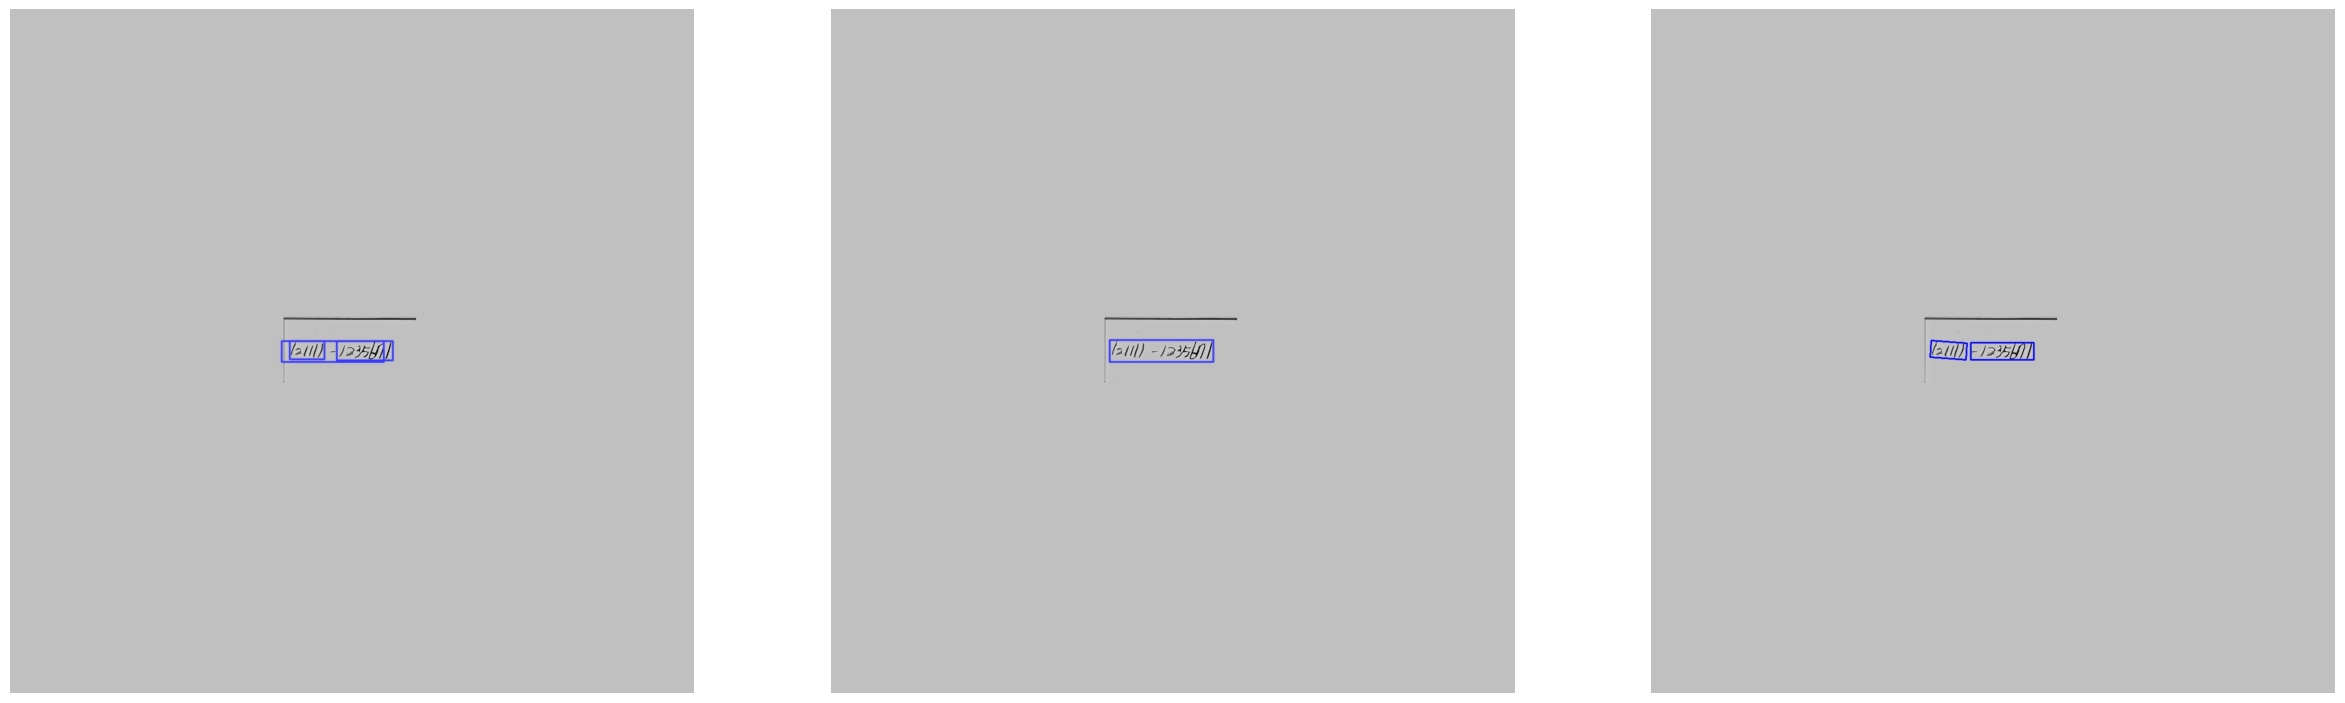

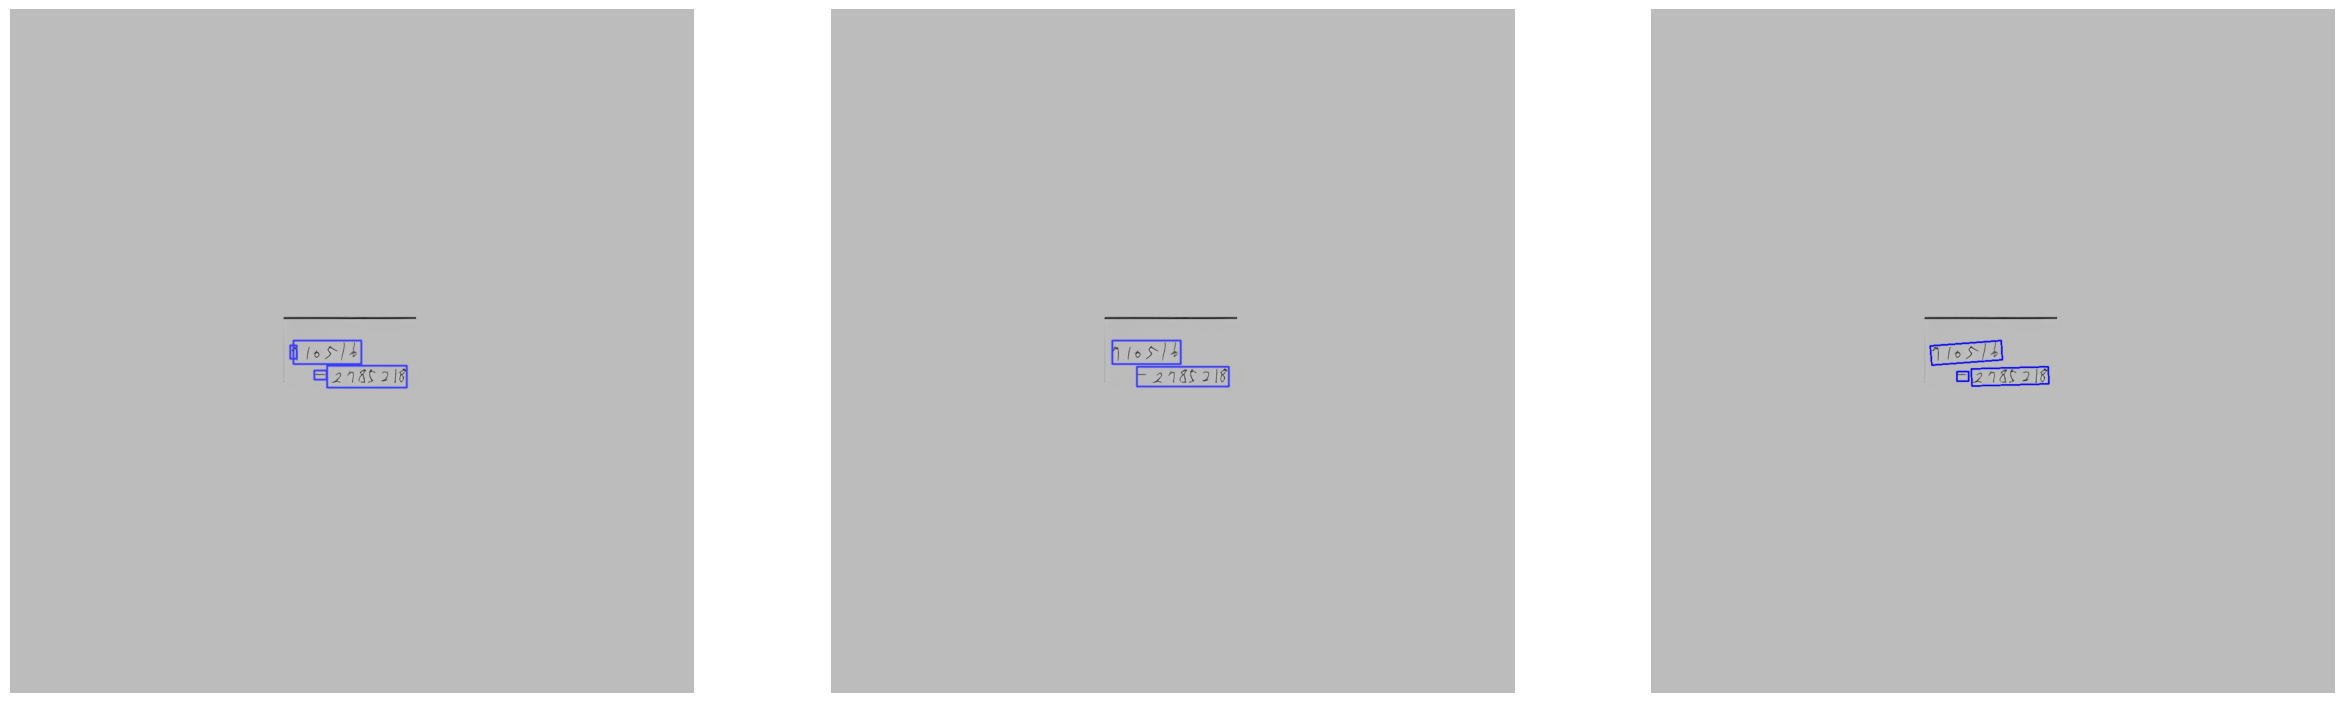

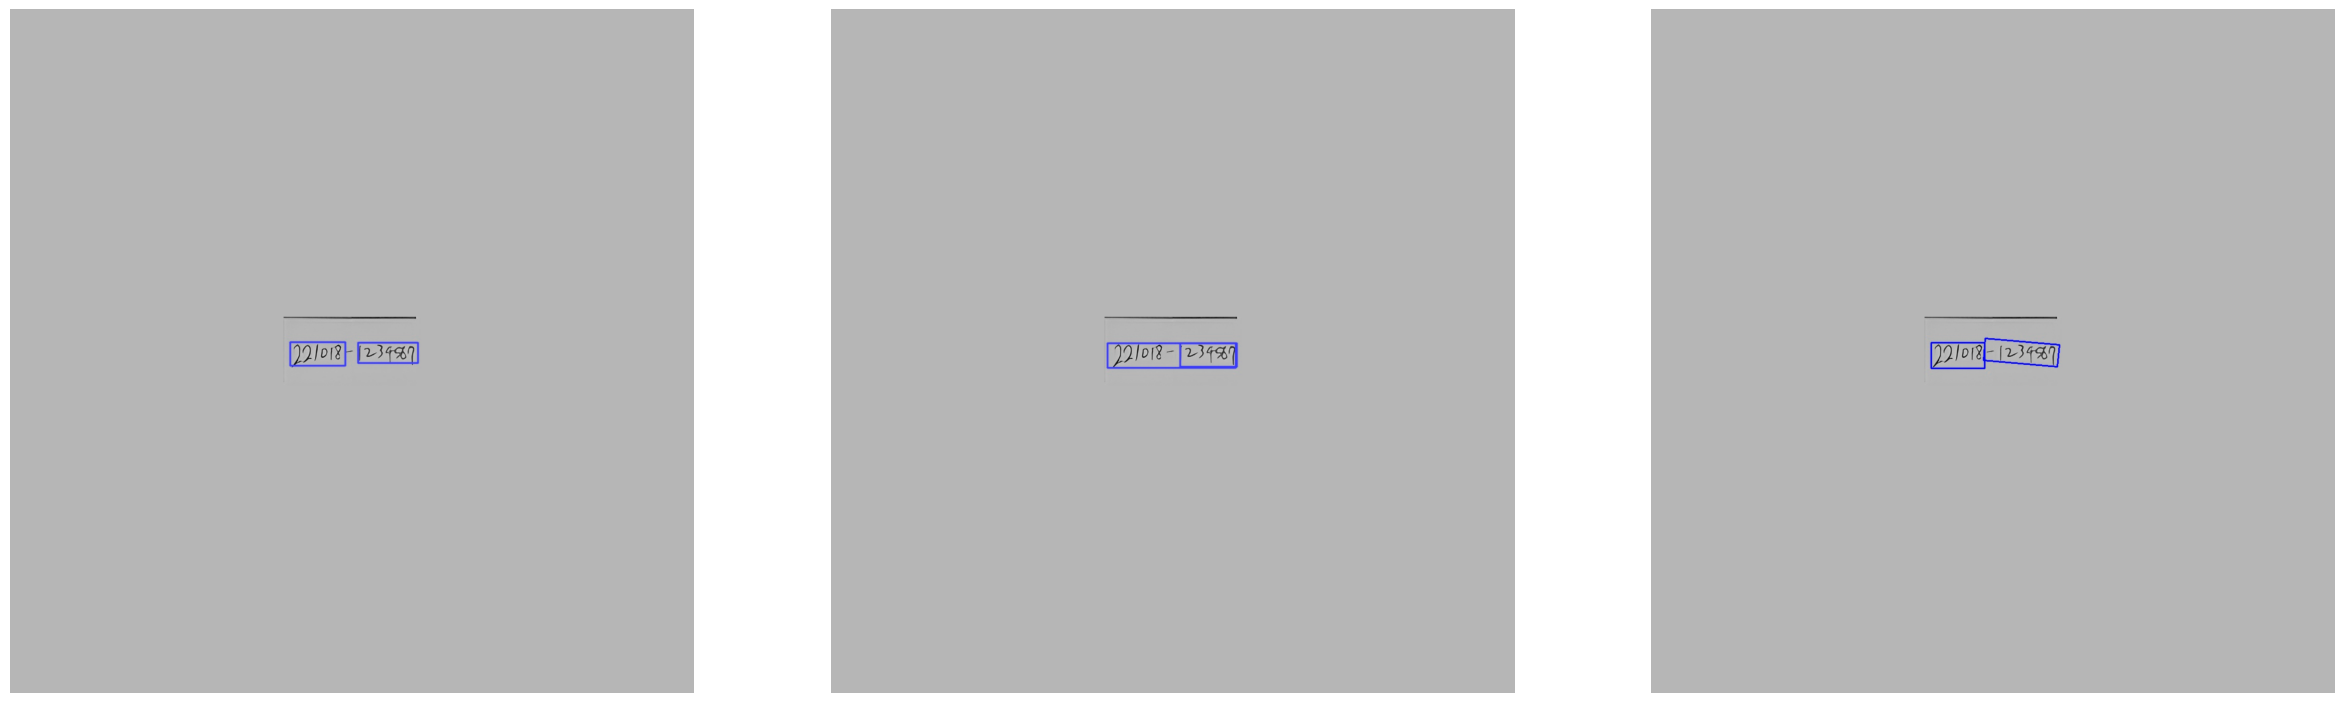

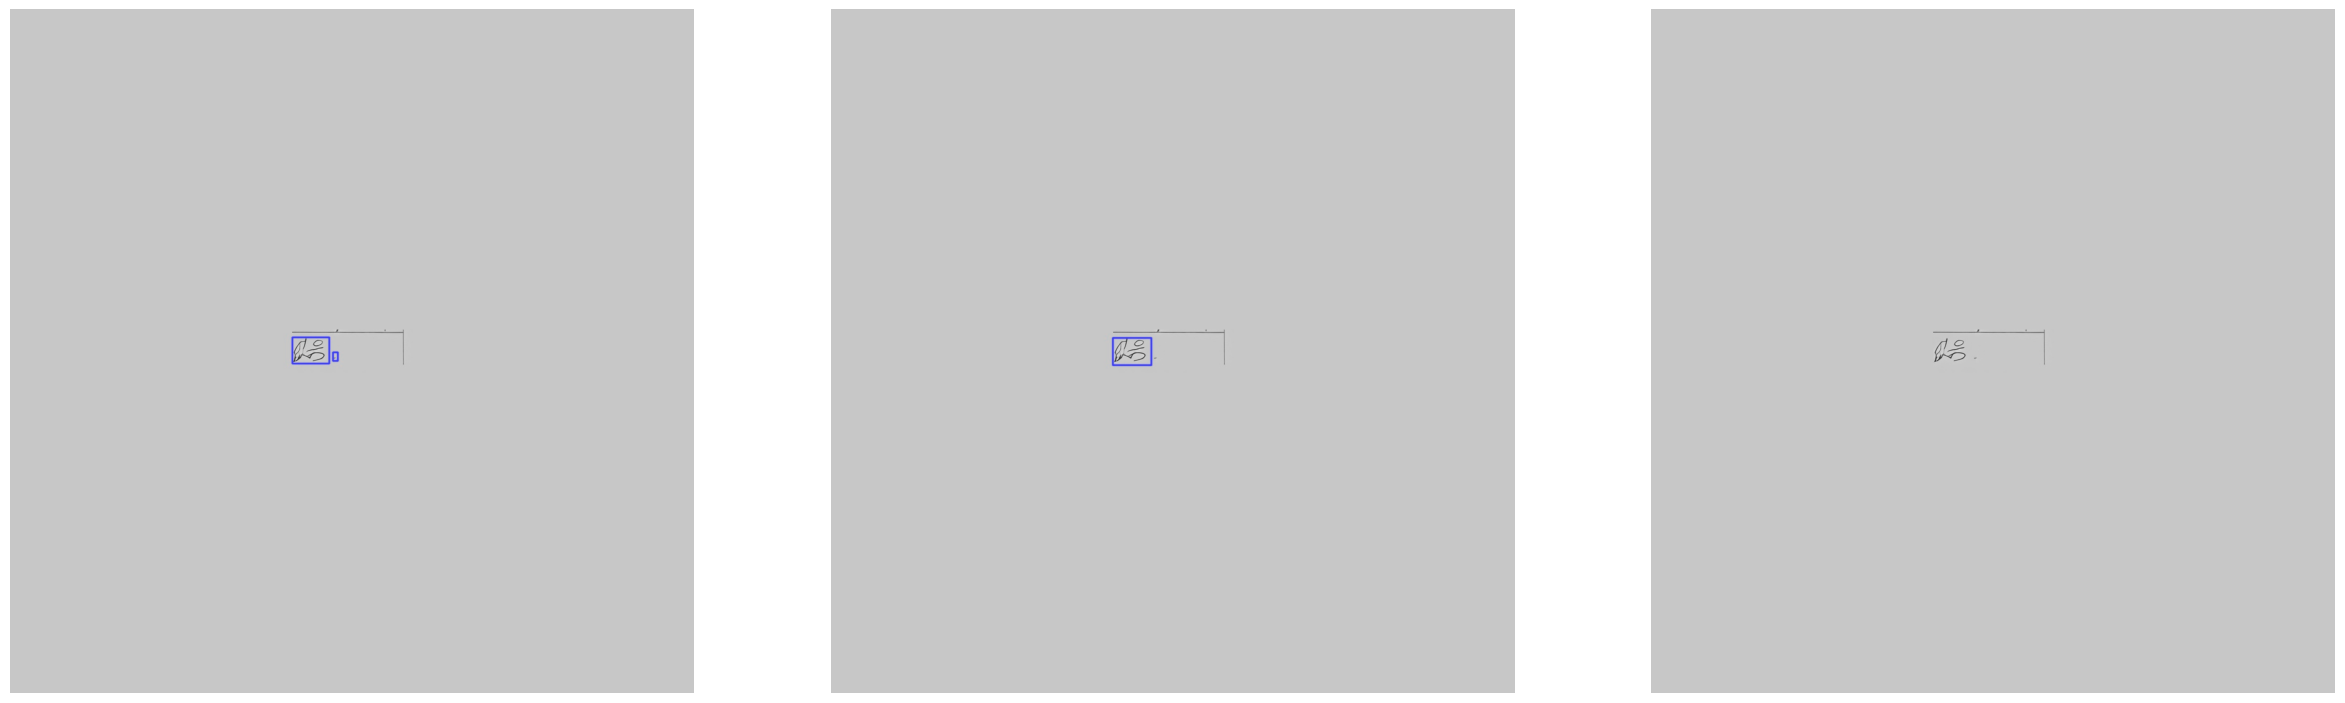

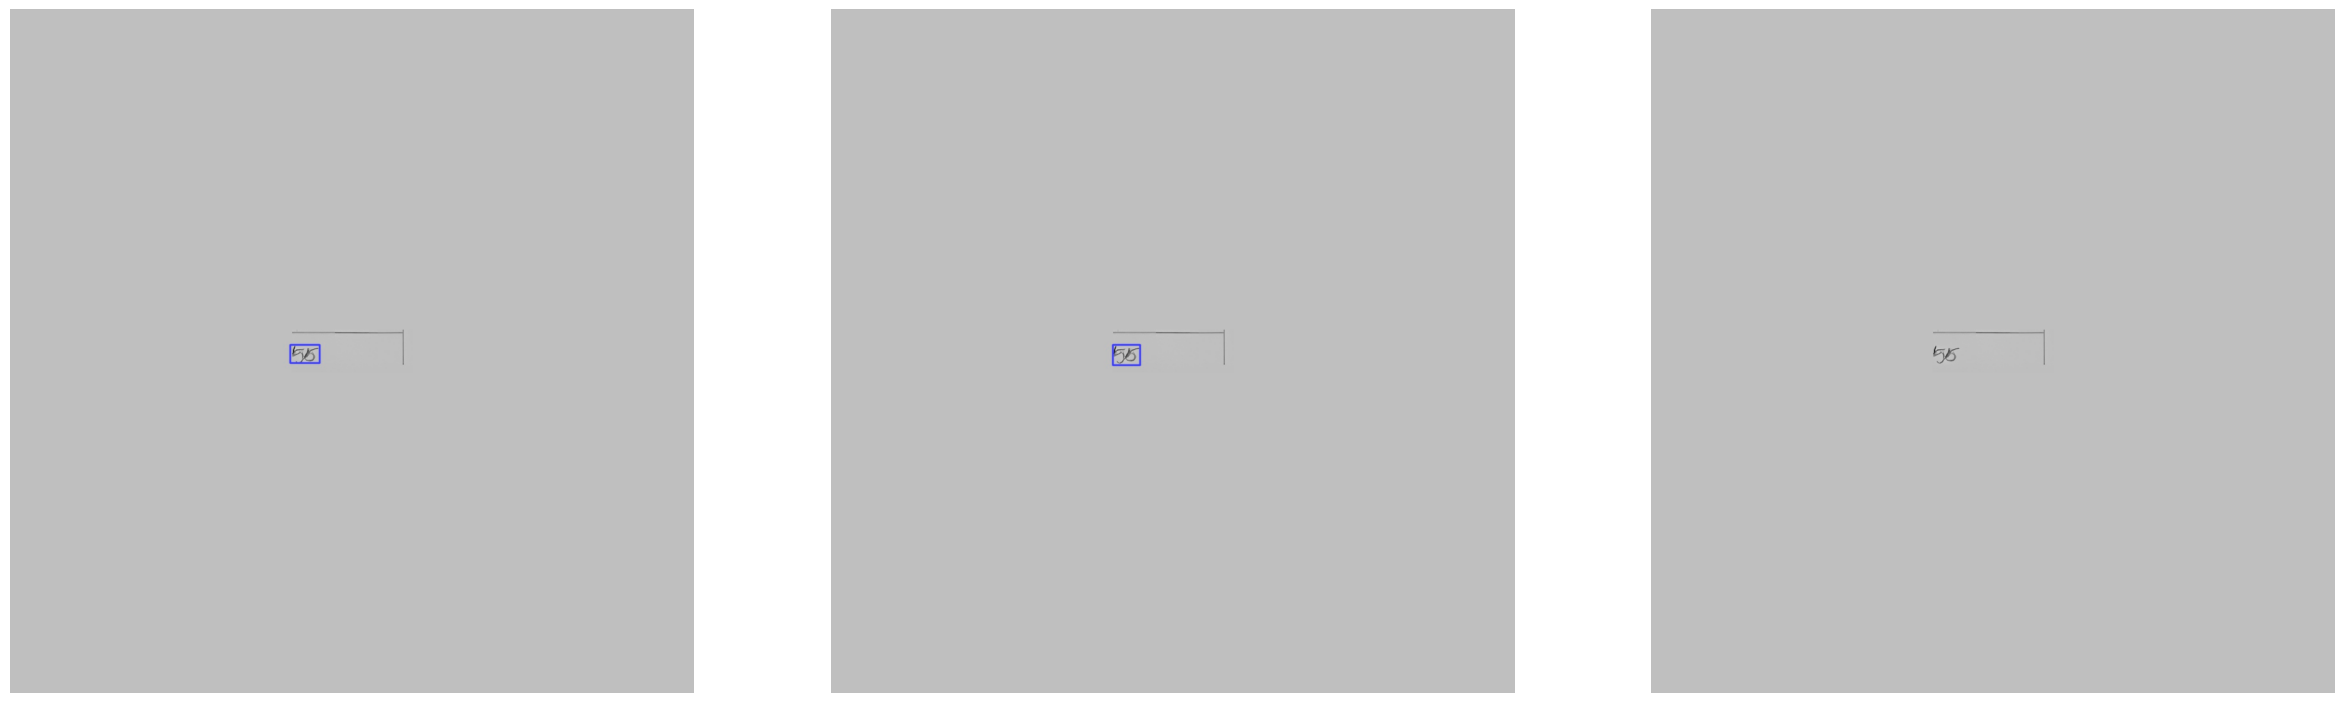

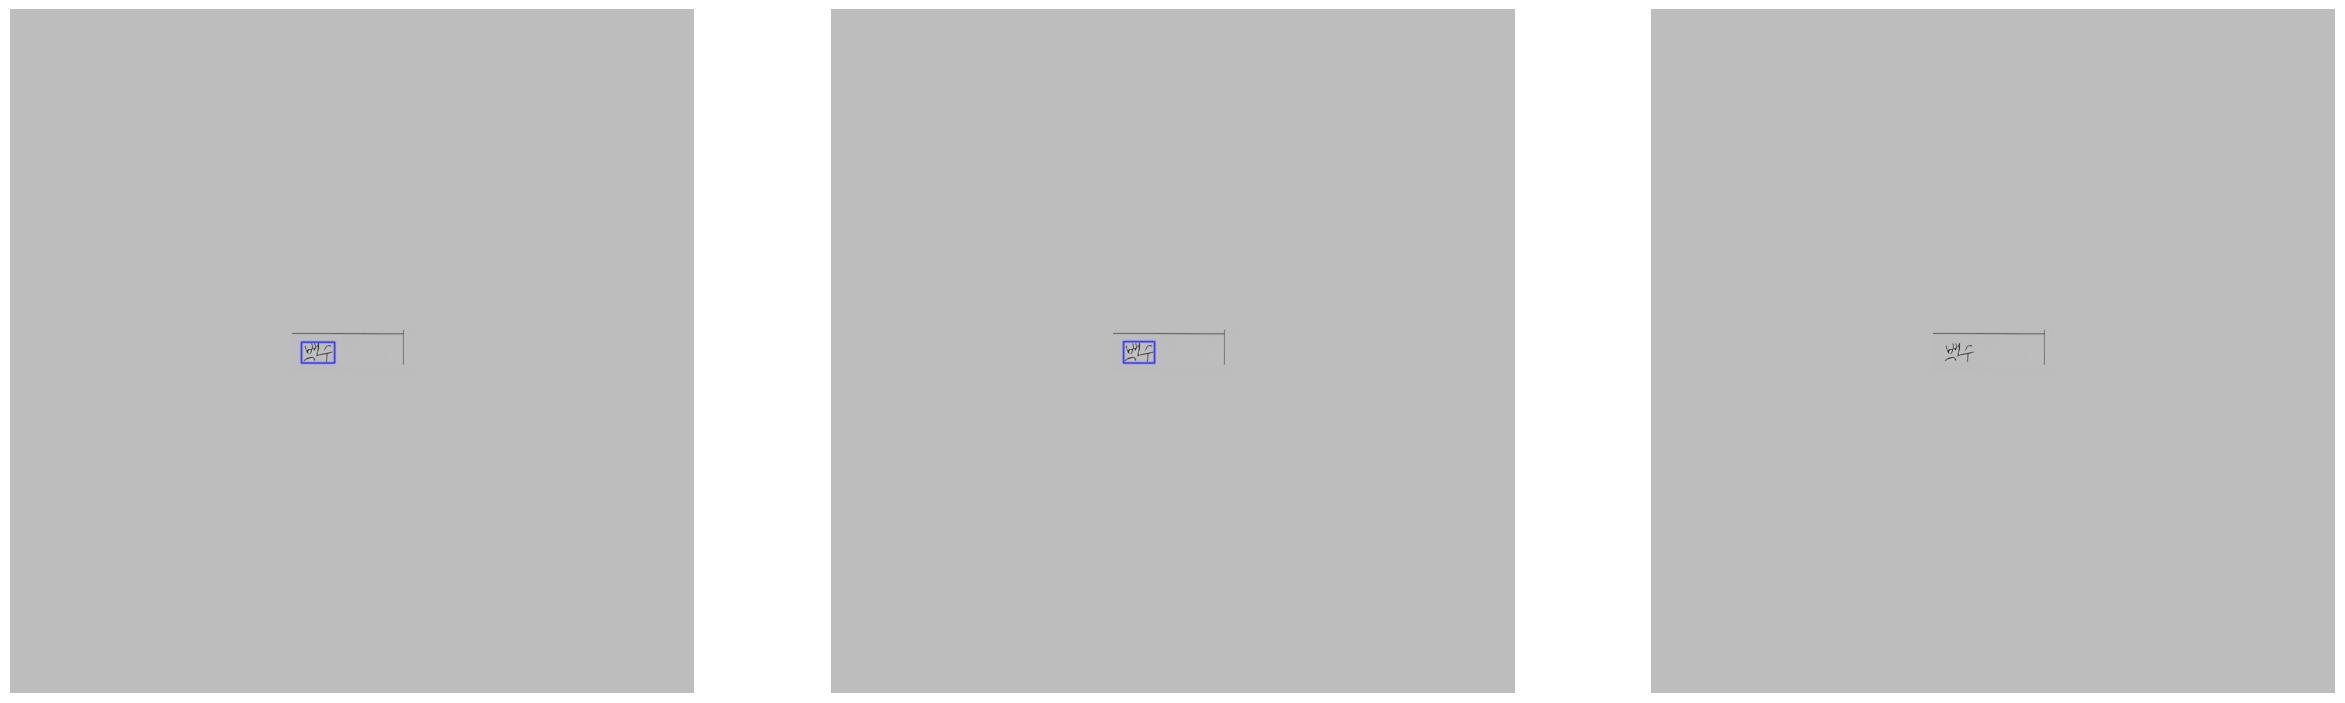

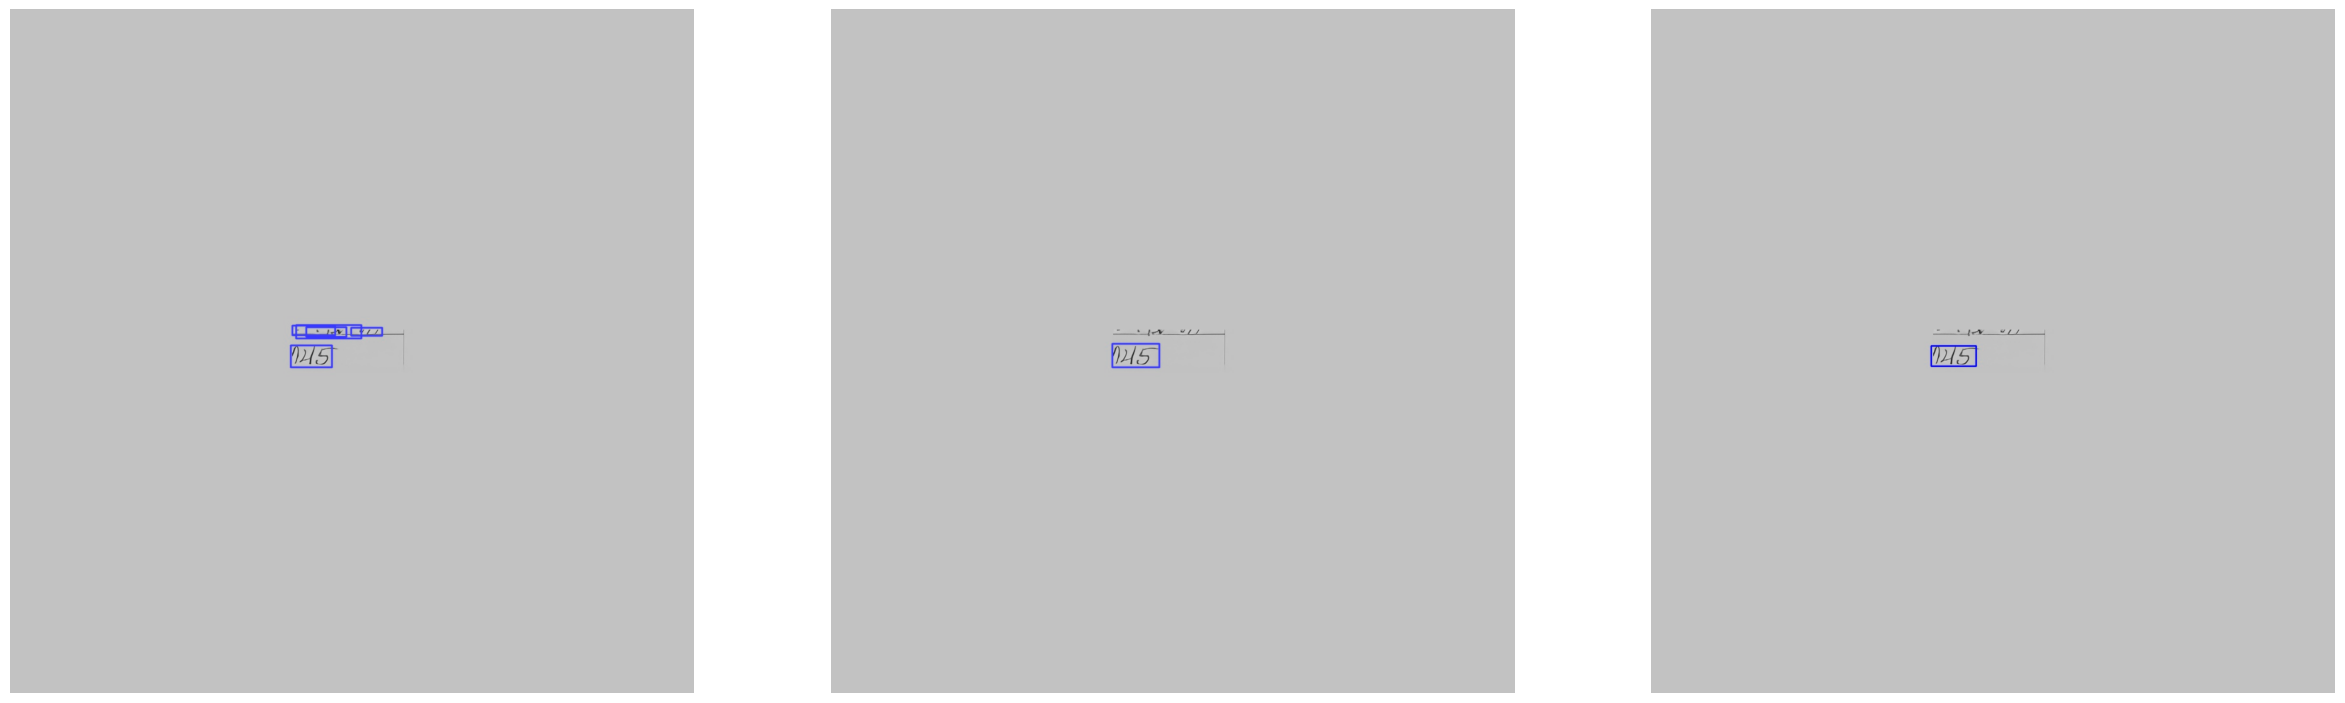

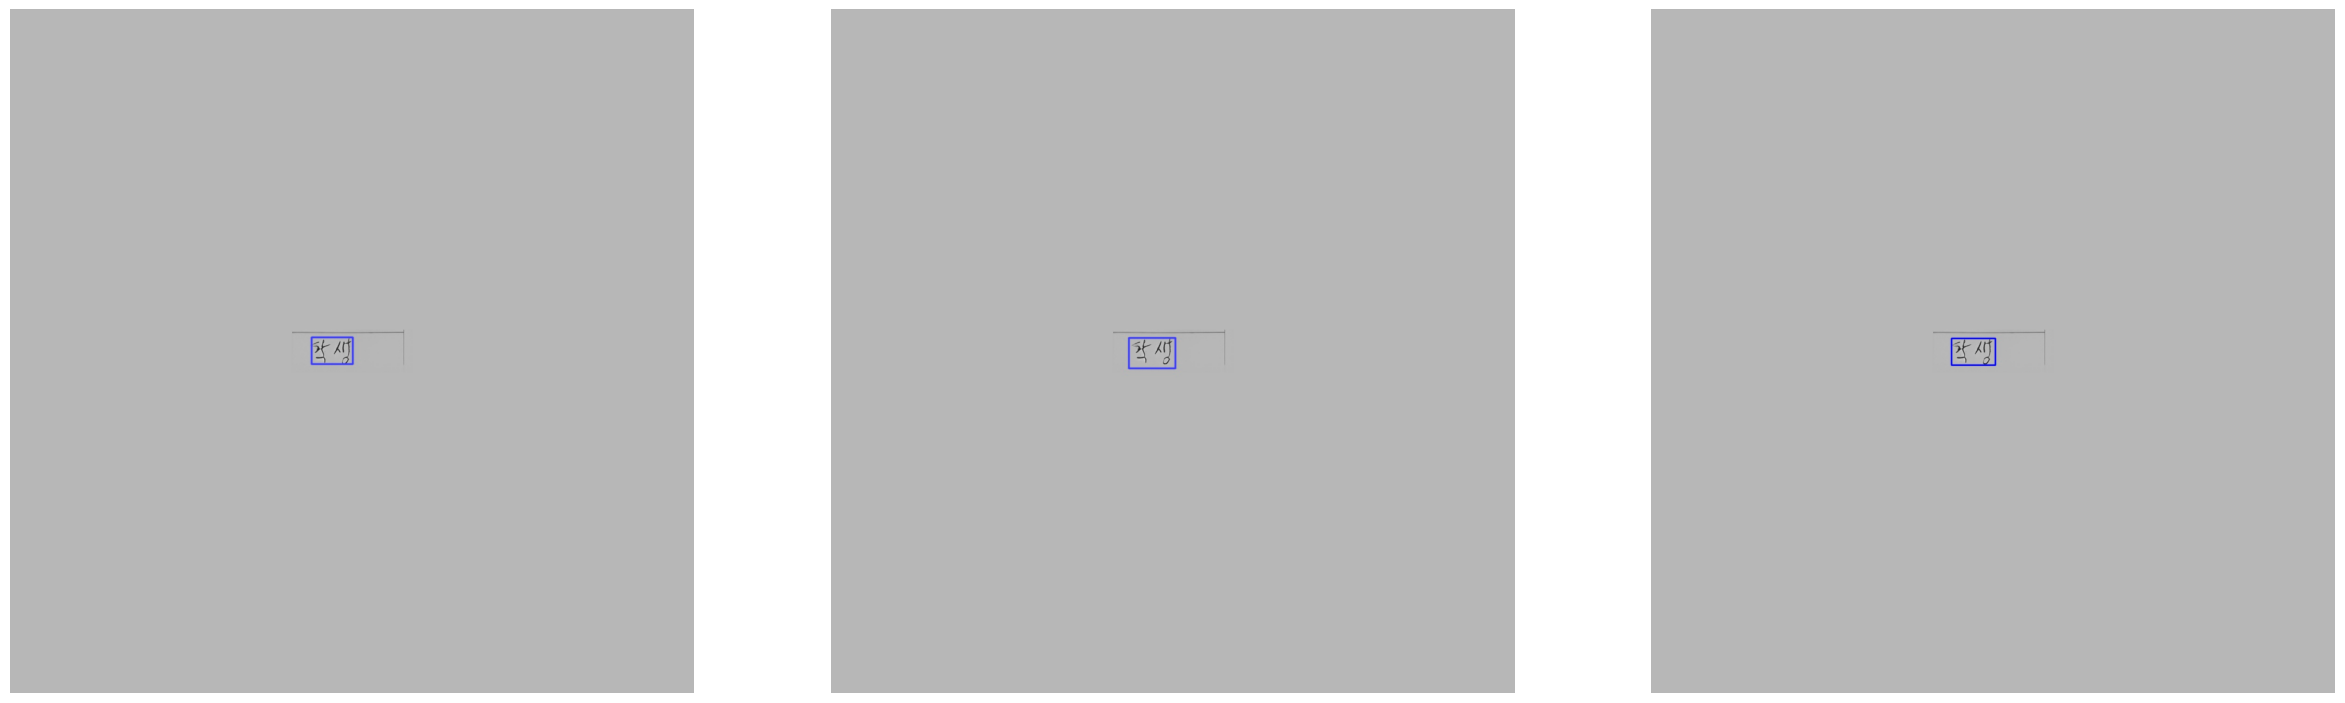

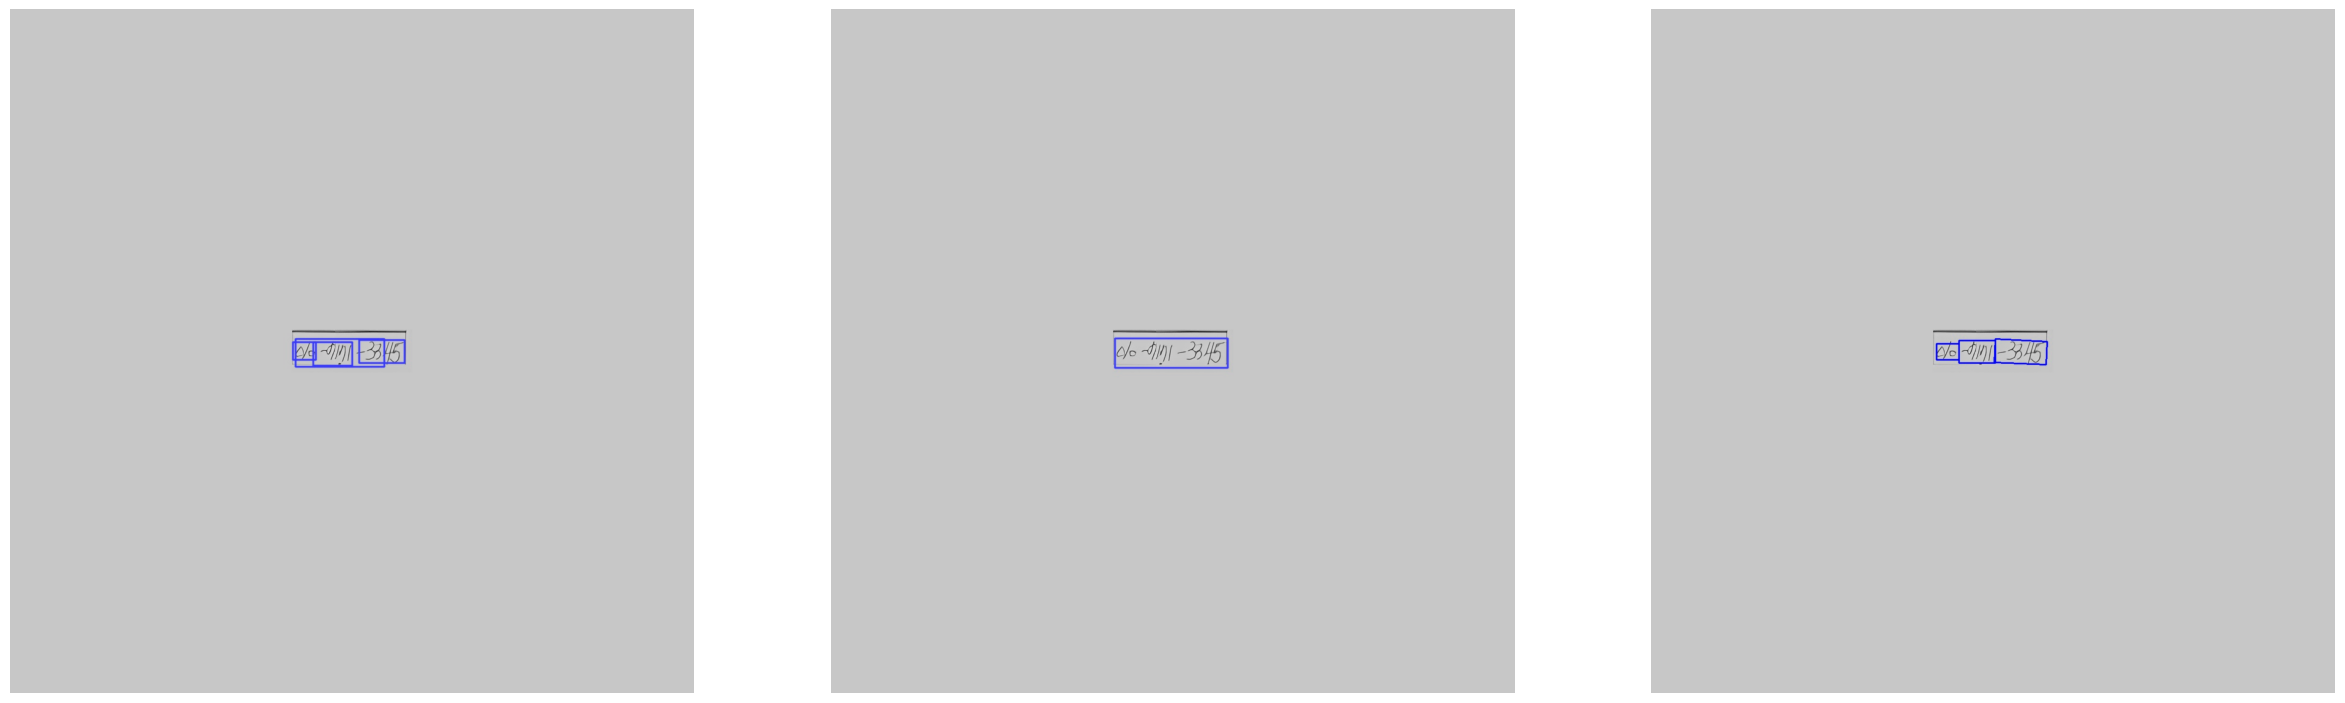

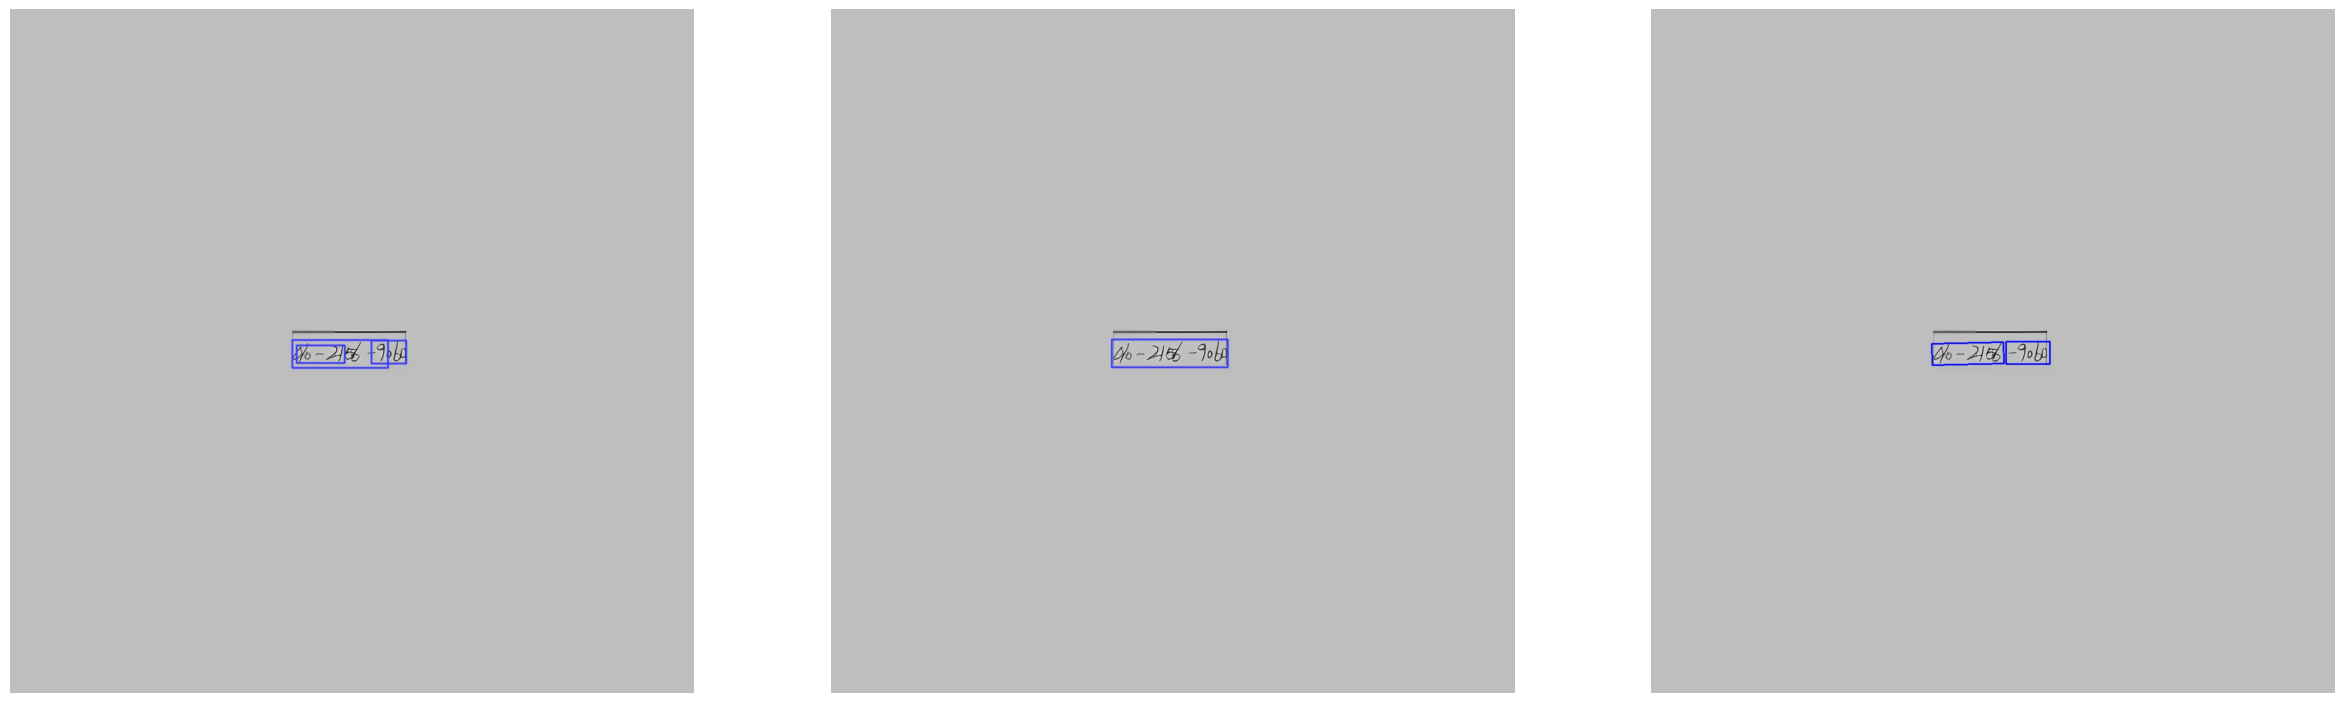

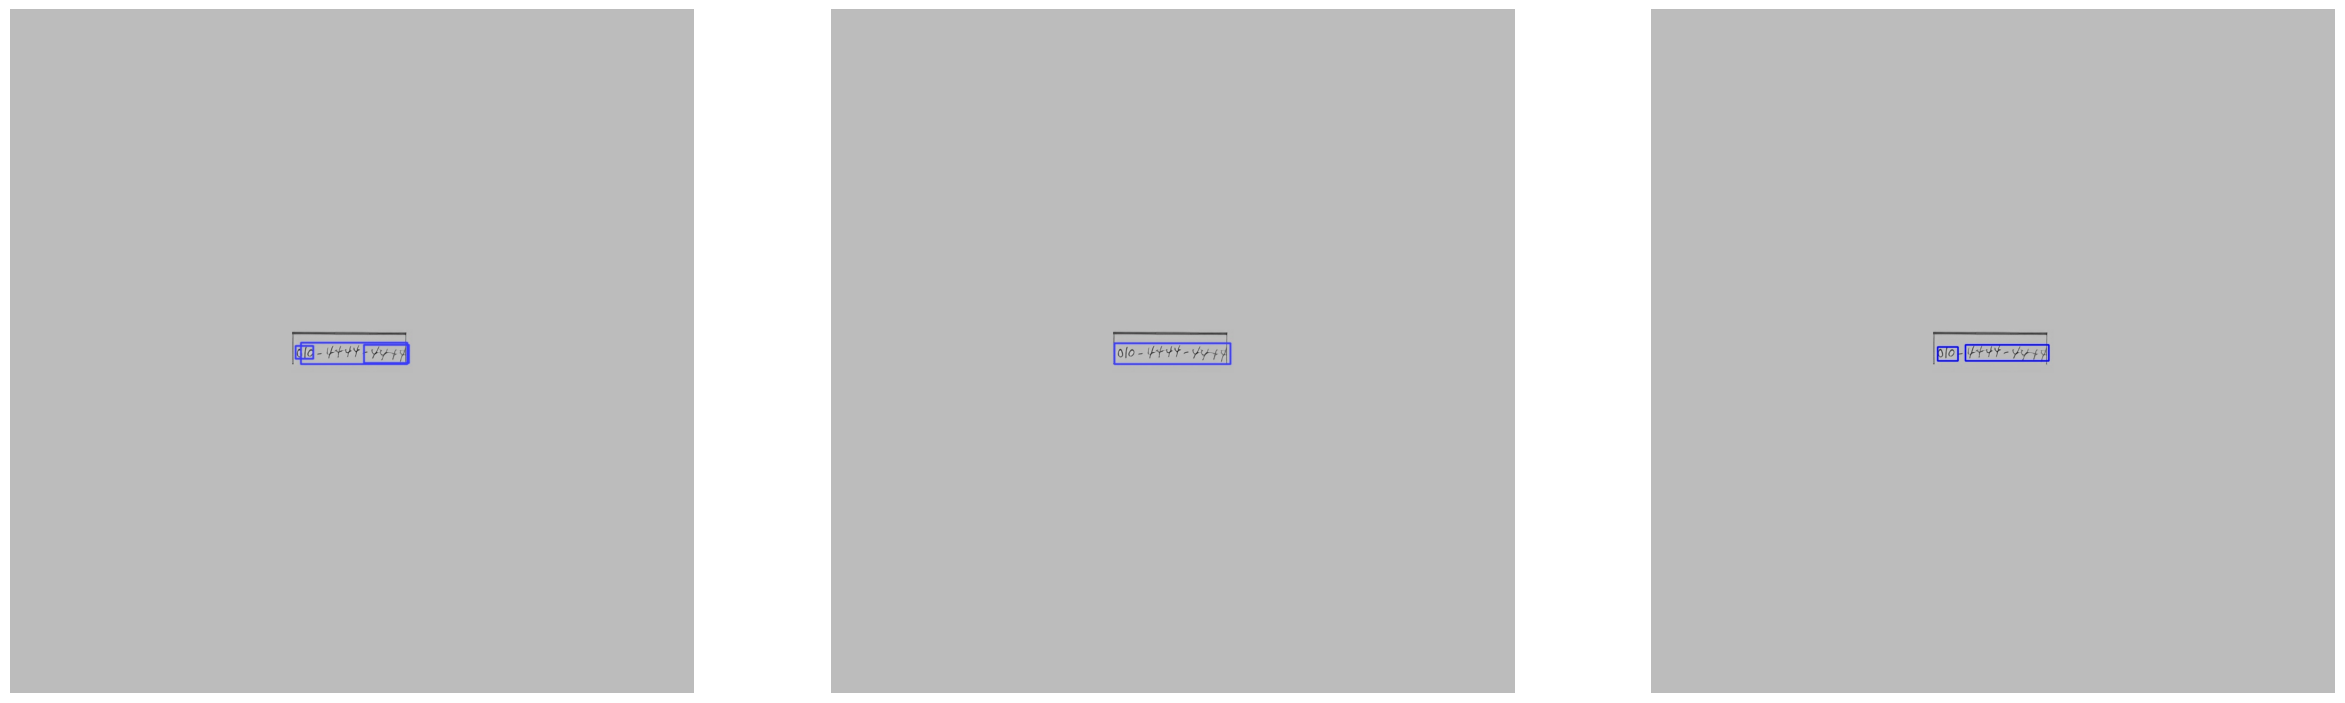

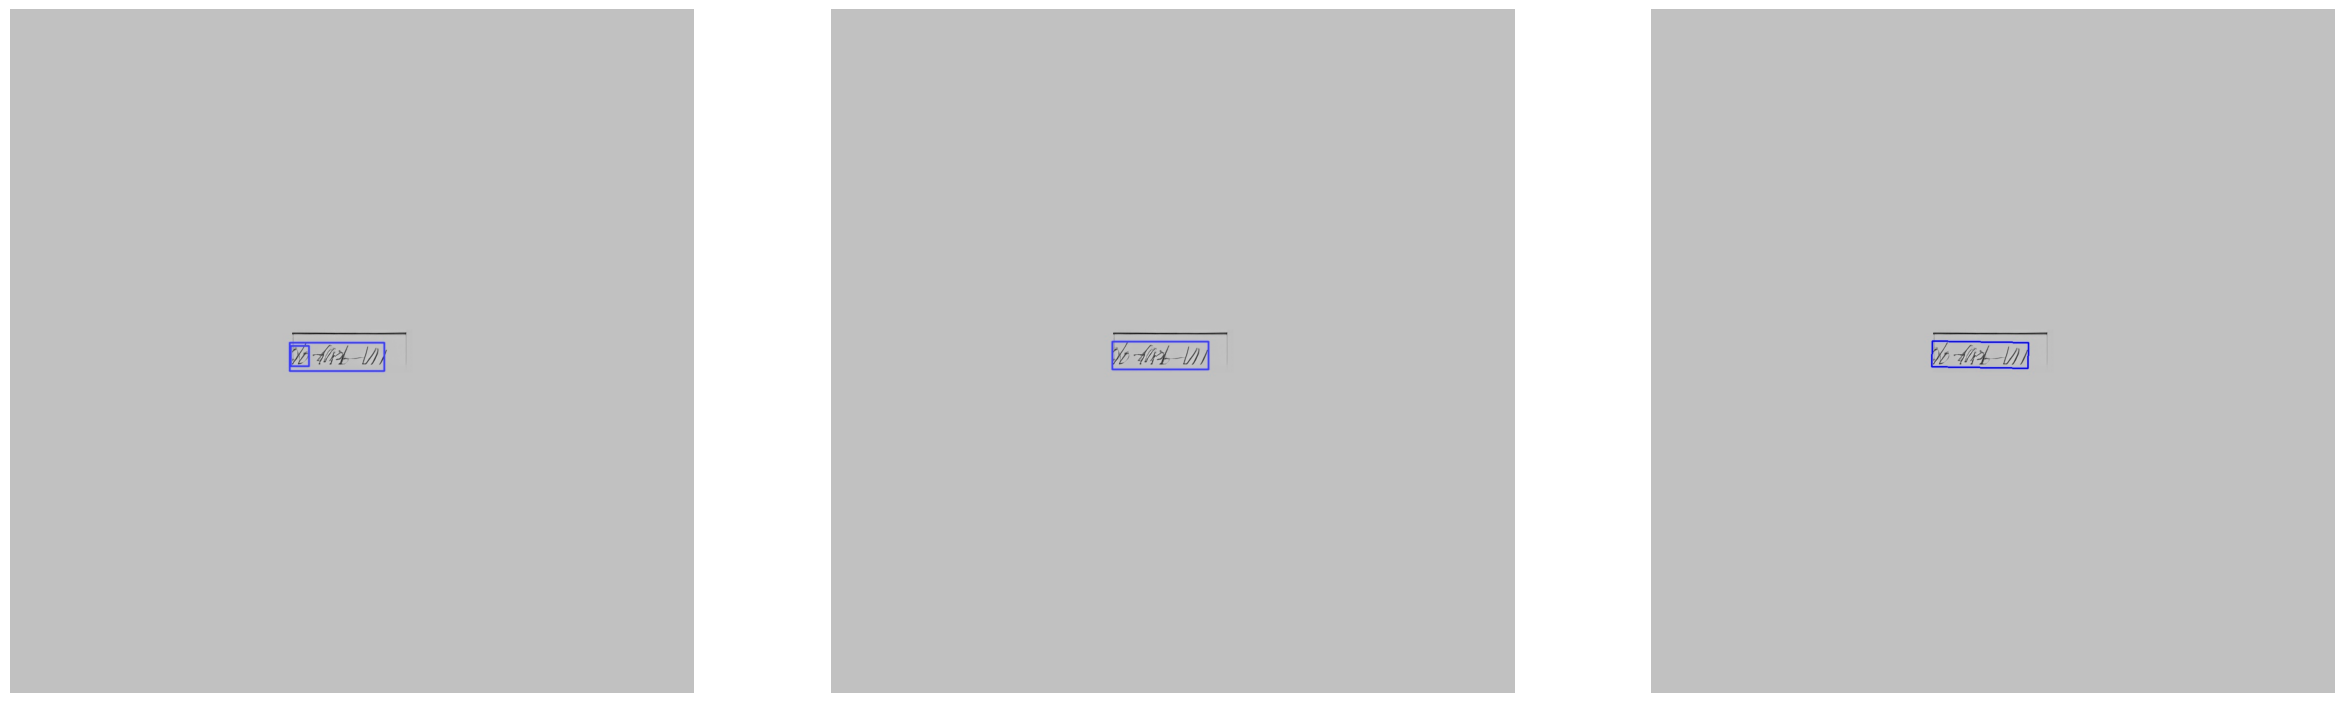

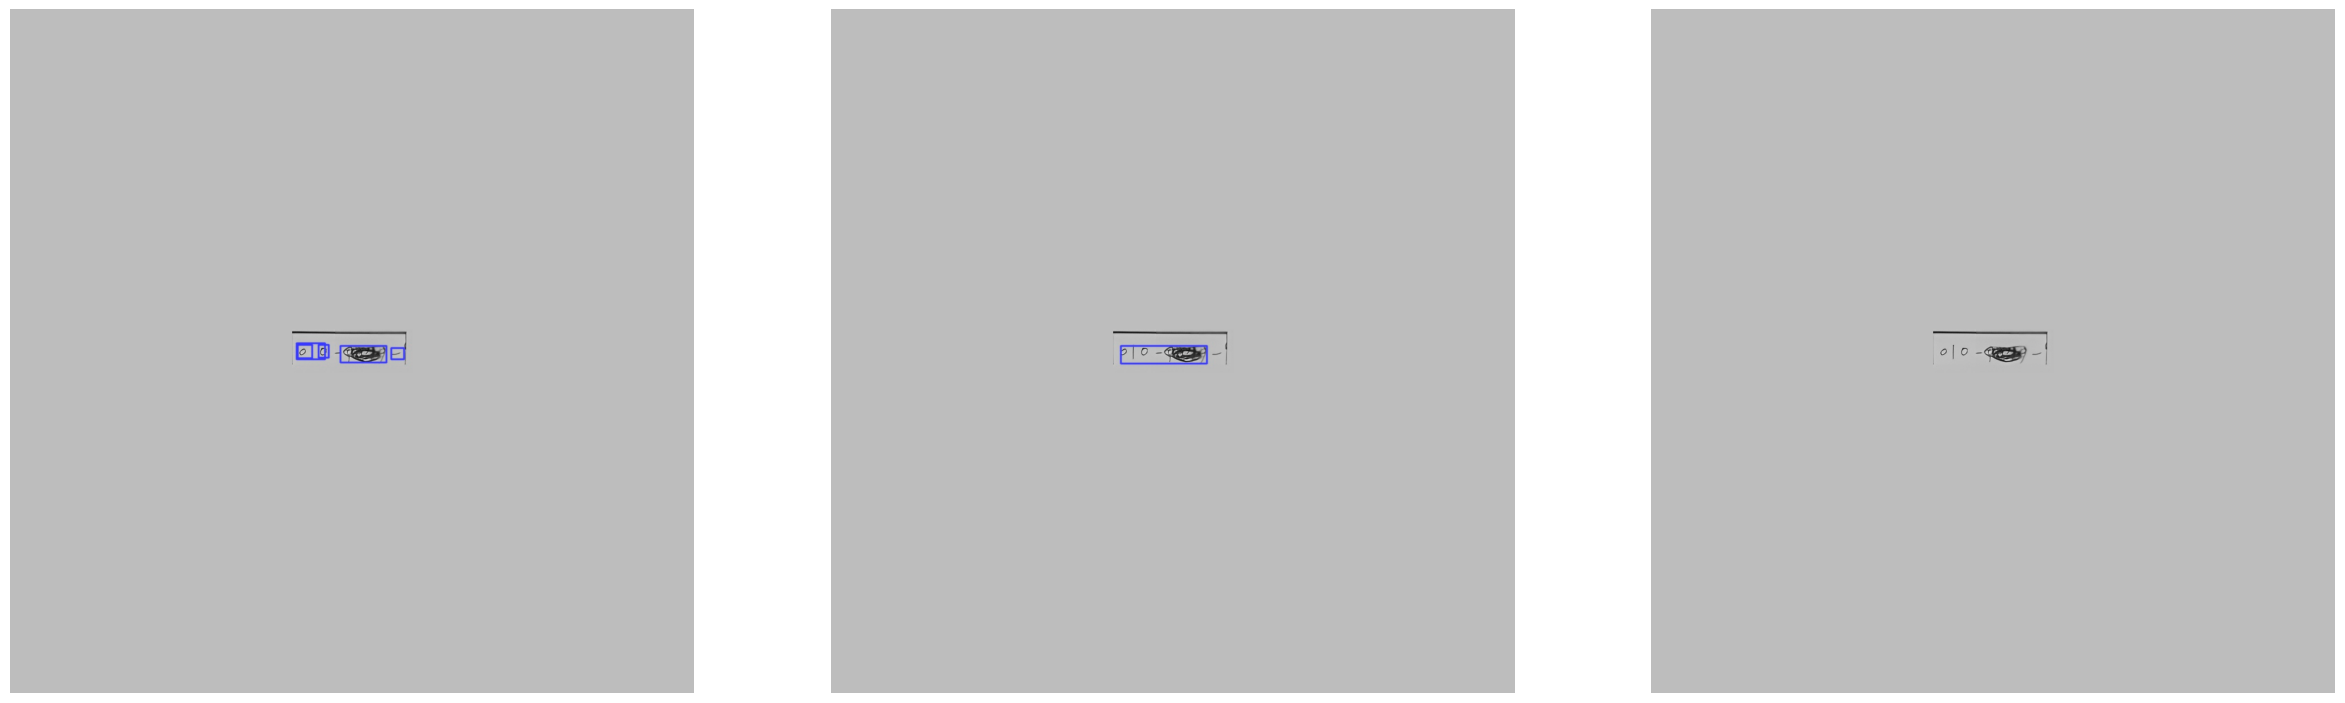

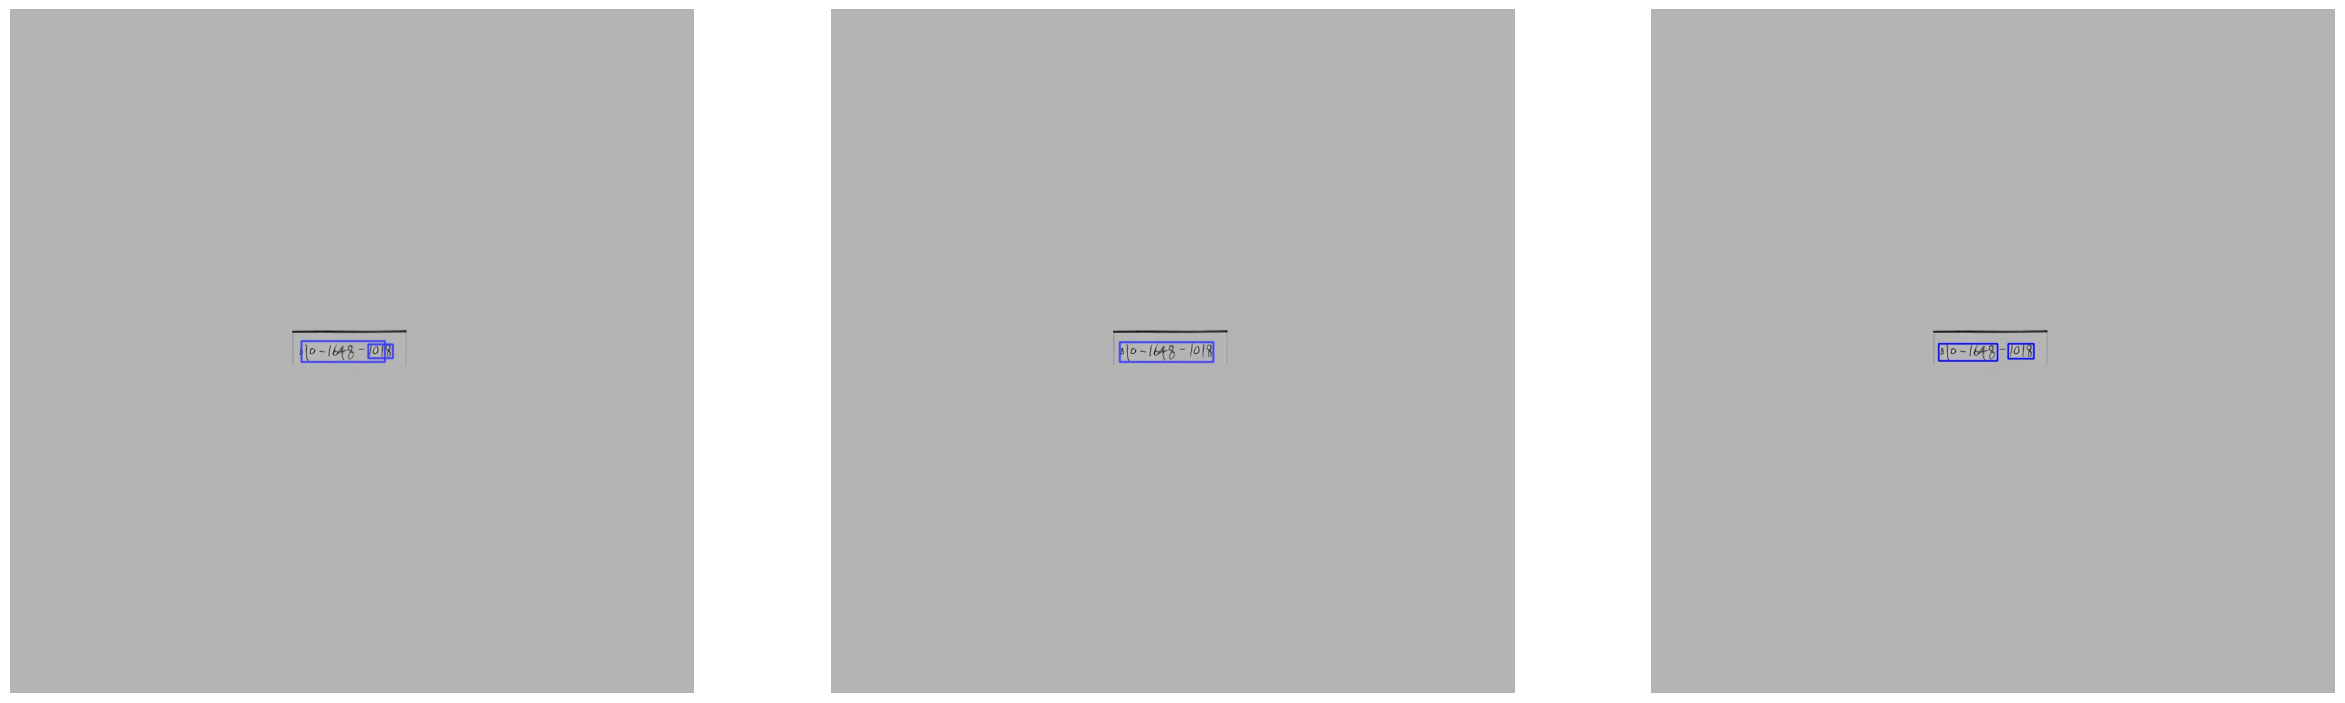

In [6]:
### 단순 전후 plot

for image in os.listdir('padding_1280_1'):
    plt.figure(figsize=(30,10))
    image1 = cv2.imread(f'padding_1280_1/{image}')
    image2 = cv2.imread(f'padding_1280_2/{image}')
    image3 = cv2.imread(f'padding_1280_3/res_{image}')
    plt.subplot(1,3,1)
    plt.imshow(image1)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(image2)
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(image3)
    plt.axis('off')
    plt.savefig(f'plt/{image}')